In [1]:
import warnings

warnings.filterwarnings("ignore")
import sys  
sys.path.insert(0, 'C://Users//Adminn//Downloads')
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from scipy.misc import derivative
from sklearn.ensemble import RandomForestClassifier
import time
from tqdm import tqdm
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV
from itertools import islice
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.metrics import log_loss



In [2]:
data = pd.read_csv('C://Users//Adminn//Downloads//raw_df.csv')
df =pd.read_csv('C://Users//Adminn//Downloads//modified_df.csv')

In [3]:
data.rank_team_1.fillna(40.0,inplace = True)
data.rank_team_2.fillna(40.0,inplace = True)
data["rank-points_team_1"].replace(0.0,40.0,inplace=True)
data['rank-points_team_2'].replace(0.0,40.0,inplace=True)

In [4]:
df.rank_team_1.fillna(40.0,inplace = True)
df.rank_team_2.fillna(40.0,inplace = True)
df["rank-points_team_1"].replace(0.0,40.0,inplace=True)
df['rank-points_team_2'].replace(0.0,40.0,inplace=True)
df['team_2_rating'] = df['team_1_rating'] - df['team_rating_diff'] 

In [76]:
df.to_csv('C:/Users/Adminn/Downloads/modified_df.csv',index=False)

In [395]:
#xuynya
mdf=df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0)]
alo =((df['rank-points_team_1'] - df['rank-points_team_2'])<0)
team1score = mdf['team1score']
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team1score']=mdf.team2score
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team2score']= team1score
team1 = mdf['team1']
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team1']=mdf.team2
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team2']= team1  
rank_team_1 = mdf['rank_team_1']
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'rank_team_1']=mdf.rank_team_2
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'rank_team_2']= rank_team_1
team_1_rating = mdf['team_1_rating']
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team_1_rating']=mdf.team_2_rating
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team_2_rating']= team_1_rating



df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team_1_won']= mdf['team_1_won'].map({1: 0, 0: 1})

rank_points_team_1 = mdf['rank-points_team_1']

df.loc[alo,'rank-points_team_1']=mdf['rank-points_team_2']
df.loc[alo,'rank-points_team_2']= rank_points_team_1

In [90]:
X = df[['rank_team_2','rank_team_1','rank-points_team_2','rank-points_team_1']]
y = df.team_1_won
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [85]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [58]:
df['rank_points_diff'] = df['rank-points_team_1'] - df['rank-points_team_2']

In [87]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)
Accuracy = metrics.accuracy_score(y_test.to_list(), log_reg.predict(X_test))
Precision = metrics.precision_score(y_test.to_list(), log_reg.predict(X_test))
Sensitivity_recall = metrics.recall_score(y_test.to_list(), log_reg.predict(X_test))
Specificity  = metrics.recall_score(y_test.to_list(), log_reg.predict(X_test), pos_label=0)
mean_absolute_error(y_test, log_reg.predict_proba(X_test)[:,1])


0.4379127329015074

In [336]:
Accuracy,Precision, Sensitivity_recall

(0.664179104477612, 0.6978021978021978, 0.7839506172839507)

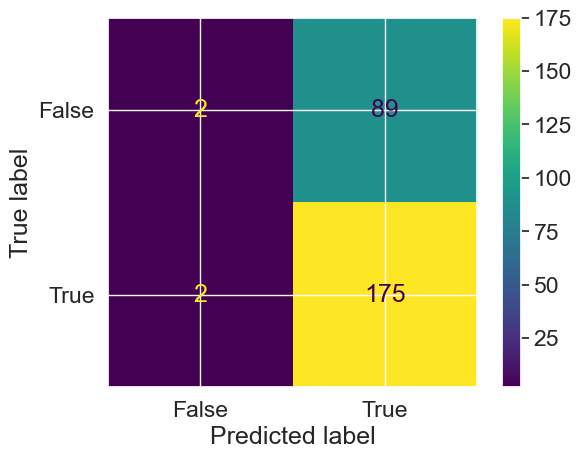

In [286]:
confusion_matrix= confusion_matrix(y_test.to_list(), log_reg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [274]:
log_reg.predict(X_test)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1], dtype=int64)

In [88]:
rnd_for = RandomForestClassifier(random_state=0)
rnd_for.fit(X_train_scaled,y_train)


Accuracy_rnd = metrics.accuracy_score(y_test.to_list(), rnd_for.predict(X_test))
Precision_rnd = metrics.precision_score(y_test.to_list(), rnd_for.predict(X_test))
Sensitivity_recall_rnd = metrics.recall_score(y_test.to_list(), rnd_for.predict(X_test))
Specificity_rnd  = metrics.recall_score(y_test.to_list(), rnd_for.predict(X_test), pos_label=0)
mean_absolute_error(y_test, rnd_for.predict_proba(X_test_scaled)[:,1])

0.43756126025715575

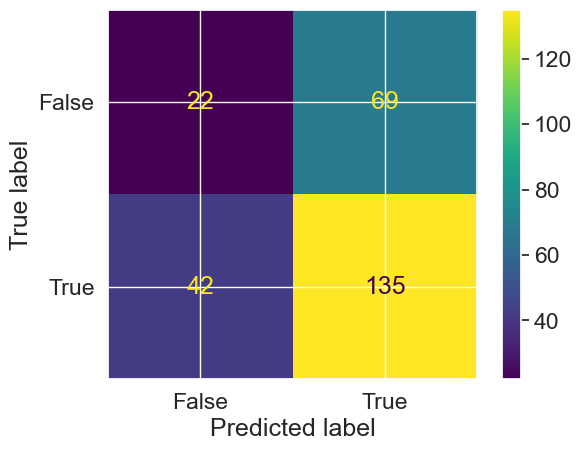

In [343]:
confusion_matrix2= confusion_matrix(y_test.to_list(), rnd_for.predict(X_test).tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()

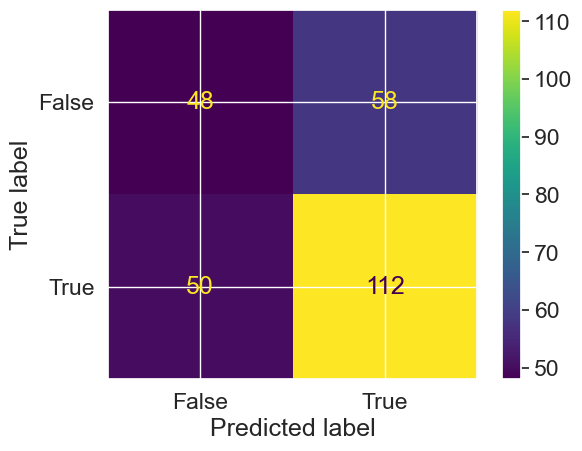

In [338]:
confusion_matrix2= confusion_matrix(y_test.to_list(), rnd_for.predict(X_test).tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()

In [7]:
X_test.rank_team_2.mean(), X_test.rank_team_1.mean()

(21.167910447761194, 15.652985074626866)

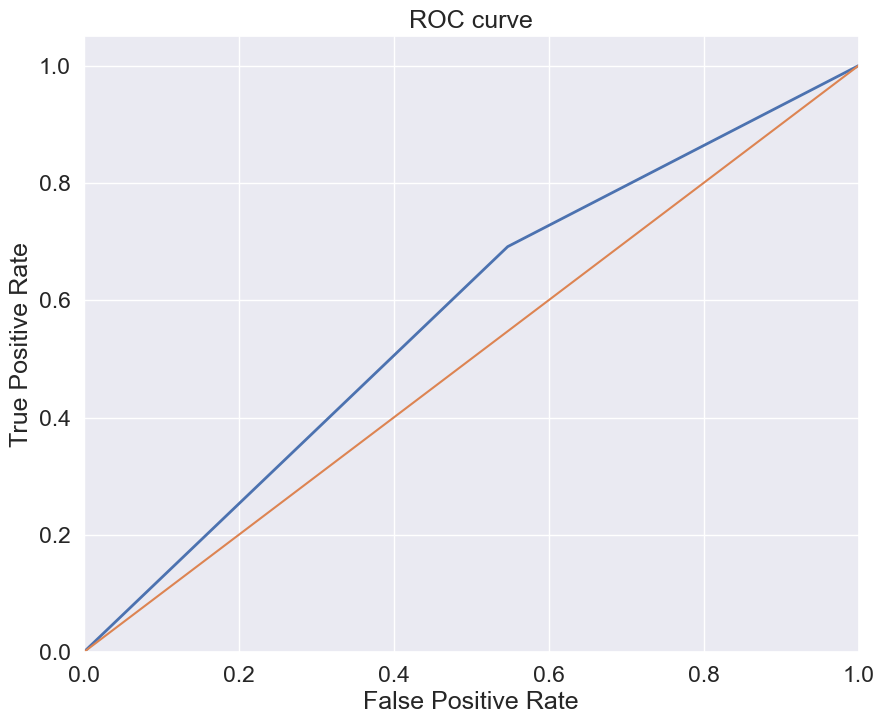

In [339]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_list(), rnd_for.predict(X_test), pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [41]:
np.arange(3,23,5)

array([ 3,  8, 13, 18])

In [6]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:

params = {
    # Параметры, которые мы будем тюнить
    'max_depth':np.arange(3,13,2),
    'min_child_weight': [1],
    'eta':[0.1,.03],
    'subsample': [0.5,0.7,1],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.3,0.7,1],
    # Другие необходимые параметры
    
}

In [28]:

xgbc = XGBClassifier(seed = 0,objective='binary:logistic',
    n_jobs=-1)

In [29]:
clf = GridSearchCV(estimator=xgbc, 
                   param_grid=params,
                    
                   verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)
print(clf.best_params_)
best = clf.best_estimator_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.7, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num

In [56]:
clf.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 1,
 'subsample': 0.5}

In [57]:
best = clf.best_estimator_

In [49]:
log_loss(best.predict(X_test),y_test), mean_absolute_error(best.predict(X_test),y_test)

(11.856705274017537, 0.34328358208955223)

In [58]:
log_loss(best.predict(X_test),y_test), mean_absolute_error(best.predict(X_test),y_test)

(11.598938293506446, 0.3358208955223881)

In [13]:
%%time
num_boost_round = 2000
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=30
)


XGBoostError: Invalid Parameter format for learning_rate expect float but value='[0.1, 0.03]'

In [59]:
Accuracy_xgb,Sensitivity_recall_xgb

(0.6567164179104478, 0.7716049382716049)

In [48]:
Accuracy_xgb = metrics.accuracy_score(y_test.to_list(), best.predict(X_test)>0.5)
Precision_xgb = metrics.precision_score(y_test.to_list(), best.predict(X_test)>0.5)
Sensitivity_recall_xgb = metrics.recall_score(y_test.to_list(), best.predict(X_test)>0.5)
Specificity_xgb  = metrics.recall_score(y_test.to_list(), best.predict(X_test)>0.5, pos_label=0)
mean_absolute_error(best.predict(X_test),y_test )

0.34328358208955223

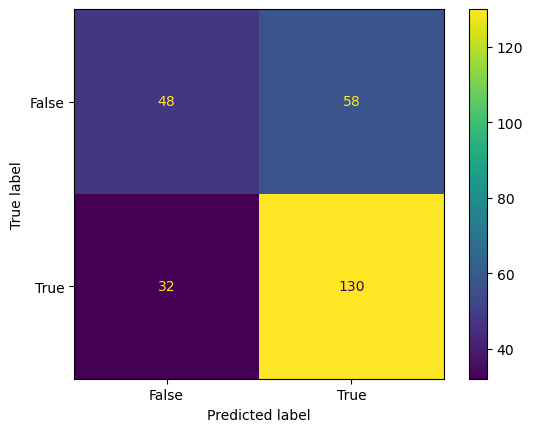

In [75]:
confusion_matrix3= confusion_matrix(y_test.to_list(), (best.predict(X_test)>0.5).tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()

<AxesSubplot:xlabel='rank_team_1', ylabel='rank_team_2'>

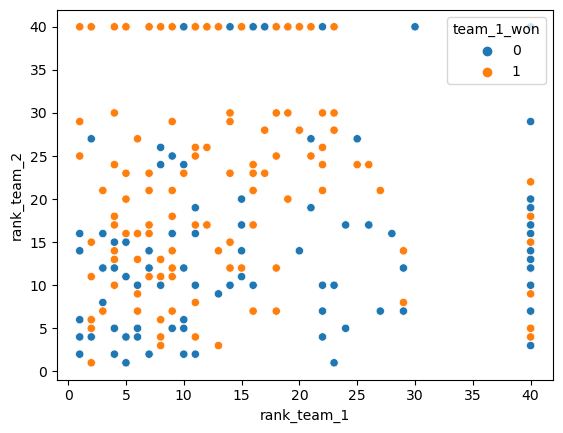

In [63]:
sns.scatterplot(x=X_test['rank_team_1'],y=X_test['rank_team_2'],hue=y_test)

In [79]:
df['team_1_fav'] = 1
df.loc[(df['rank_team_1'] - df['rank_team_2'])>0,'team_1_fav'] = 0

In [82]:
(25+42)/893

0.07502799552071669

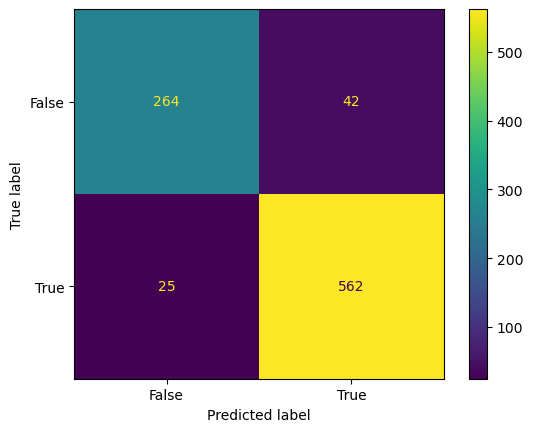

In [80]:
confusion_matrix2= confusion_matrix(df.team_1_fav, (best.predict(X)>0.5).tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()

In [204]:
cat = CatBoostClassifier(iterations=1000,
                           
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True)
cat.fit(X_train, y_train)


0:	learn: 0.6750802	total: 1.82ms	remaining: 1.82s
1:	learn: 0.6606596	total: 3.45ms	remaining: 1.72s
2:	learn: 0.6495532	total: 4.87ms	remaining: 1.62s
3:	learn: 0.6373092	total: 6.52ms	remaining: 1.62s
4:	learn: 0.6306450	total: 8.23ms	remaining: 1.64s
5:	learn: 0.6220454	total: 9.74ms	remaining: 1.61s
6:	learn: 0.6169903	total: 11.2ms	remaining: 1.58s
7:	learn: 0.6089610	total: 12.7ms	remaining: 1.58s
8:	learn: 0.6033881	total: 14.3ms	remaining: 1.57s
9:	learn: 0.6010249	total: 15.6ms	remaining: 1.54s
10:	learn: 0.5948740	total: 17.2ms	remaining: 1.54s
11:	learn: 0.5911568	total: 18.7ms	remaining: 1.54s
12:	learn: 0.5864680	total: 20.4ms	remaining: 1.54s
13:	learn: 0.5823262	total: 22ms	remaining: 1.55s
14:	learn: 0.5797182	total: 23.8ms	remaining: 1.56s
15:	learn: 0.5766119	total: 25.5ms	remaining: 1.57s
16:	learn: 0.5763062	total: 26.6ms	remaining: 1.54s
17:	learn: 0.5718487	total: 28.1ms	remaining: 1.53s
18:	learn: 0.5680712	total: 29.6ms	remaining: 1.53s
19:	learn: 0.5646020	tot

297:	learn: 0.2393911	total: 393ms	remaining: 926ms
298:	learn: 0.2386677	total: 395ms	remaining: 925ms
299:	learn: 0.2384985	total: 396ms	remaining: 924ms
300:	learn: 0.2381353	total: 397ms	remaining: 922ms
301:	learn: 0.2378854	total: 398ms	remaining: 921ms
302:	learn: 0.2372610	total: 400ms	remaining: 919ms
303:	learn: 0.2369418	total: 401ms	remaining: 918ms
304:	learn: 0.2368138	total: 402ms	remaining: 916ms
305:	learn: 0.2365544	total: 403ms	remaining: 915ms
306:	learn: 0.2361862	total: 405ms	remaining: 913ms
307:	learn: 0.2359798	total: 406ms	remaining: 912ms
308:	learn: 0.2354284	total: 407ms	remaining: 911ms
309:	learn: 0.2347387	total: 408ms	remaining: 909ms
310:	learn: 0.2344154	total: 410ms	remaining: 908ms
311:	learn: 0.2341221	total: 411ms	remaining: 907ms
312:	learn: 0.2338658	total: 413ms	remaining: 906ms
313:	learn: 0.2334438	total: 414ms	remaining: 904ms
314:	learn: 0.2327227	total: 415ms	remaining: 903ms
315:	learn: 0.2323048	total: 416ms	remaining: 901ms
316:	learn: 

466:	learn: 0.1872068	total: 591ms	remaining: 675ms
467:	learn: 0.1870885	total: 593ms	remaining: 674ms
468:	learn: 0.1868466	total: 594ms	remaining: 673ms
469:	learn: 0.1864350	total: 595ms	remaining: 671ms
470:	learn: 0.1863309	total: 597ms	remaining: 670ms
471:	learn: 0.1861543	total: 598ms	remaining: 669ms
472:	learn: 0.1859138	total: 599ms	remaining: 667ms
473:	learn: 0.1856357	total: 600ms	remaining: 666ms
474:	learn: 0.1852728	total: 602ms	remaining: 665ms
475:	learn: 0.1850282	total: 603ms	remaining: 664ms
476:	learn: 0.1848525	total: 605ms	remaining: 663ms
477:	learn: 0.1847641	total: 606ms	remaining: 662ms
478:	learn: 0.1845443	total: 607ms	remaining: 661ms
479:	learn: 0.1843912	total: 609ms	remaining: 659ms
480:	learn: 0.1842310	total: 610ms	remaining: 658ms
481:	learn: 0.1840736	total: 611ms	remaining: 657ms
482:	learn: 0.1837041	total: 612ms	remaining: 655ms
483:	learn: 0.1835869	total: 613ms	remaining: 654ms
484:	learn: 0.1835238	total: 615ms	remaining: 653ms
485:	learn: 

624:	learn: 0.1588477	total: 785ms	remaining: 471ms
625:	learn: 0.1587028	total: 787ms	remaining: 470ms
626:	learn: 0.1585727	total: 788ms	remaining: 469ms
627:	learn: 0.1584971	total: 789ms	remaining: 467ms
628:	learn: 0.1584387	total: 790ms	remaining: 466ms
629:	learn: 0.1582601	total: 791ms	remaining: 465ms
630:	learn: 0.1580084	total: 792ms	remaining: 463ms
631:	learn: 0.1579223	total: 794ms	remaining: 462ms
632:	learn: 0.1578402	total: 795ms	remaining: 461ms
633:	learn: 0.1577051	total: 796ms	remaining: 460ms
634:	learn: 0.1573774	total: 797ms	remaining: 458ms
635:	learn: 0.1571591	total: 799ms	remaining: 457ms
636:	learn: 0.1570158	total: 800ms	remaining: 456ms
637:	learn: 0.1568084	total: 801ms	remaining: 455ms
638:	learn: 0.1567061	total: 802ms	remaining: 453ms
639:	learn: 0.1566342	total: 804ms	remaining: 452ms
640:	learn: 0.1566186	total: 805ms	remaining: 451ms
641:	learn: 0.1564866	total: 806ms	remaining: 450ms
642:	learn: 0.1562650	total: 808ms	remaining: 448ms
643:	learn: 

787:	learn: 0.1434884	total: 980ms	remaining: 264ms
788:	learn: 0.1434086	total: 982ms	remaining: 263ms
789:	learn: 0.1433284	total: 983ms	remaining: 261ms
790:	learn: 0.1432901	total: 984ms	remaining: 260ms
791:	learn: 0.1431205	total: 985ms	remaining: 259ms
792:	learn: 0.1430416	total: 987ms	remaining: 258ms
793:	learn: 0.1429281	total: 988ms	remaining: 256ms
794:	learn: 0.1428406	total: 989ms	remaining: 255ms
795:	learn: 0.1427606	total: 990ms	remaining: 254ms
796:	learn: 0.1427019	total: 992ms	remaining: 253ms
797:	learn: 0.1425867	total: 993ms	remaining: 251ms
798:	learn: 0.1424926	total: 995ms	remaining: 250ms
799:	learn: 0.1423999	total: 996ms	remaining: 249ms
800:	learn: 0.1423366	total: 997ms	remaining: 248ms
801:	learn: 0.1423145	total: 998ms	remaining: 246ms
802:	learn: 0.1422742	total: 1000ms	remaining: 245ms
803:	learn: 0.1421953	total: 1s	remaining: 244ms
804:	learn: 0.1421087	total: 1s	remaining: 243ms
805:	learn: 0.1420536	total: 1s	remaining: 241ms
806:	learn: 0.141950

In [402]:
log_loss(cat.predict(X_test),y_test)

14.563152652560214

In [401]:
Accuracy_cat = metrics.accuracy_score(y_test.to_list(), cat.predict(X_test))
Precision_cat = metrics.precision_score(y_test.to_list(), cat.predict(X_test))
Sensitivity_recall_cat = metrics.recall_score(y_test.to_list(), cat.predict(X_test))
Specificity_cat  = metrics.recall_score(y_test.to_list(), cat.predict(X_test), pos_label=0)
mean_absolute_error(cat.predict_proba(X_test)[:,1],y_test)

0.43210712415728486

In [403]:
cat.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [8]:
teams=[]
astr = df[(df["team2"] == 'Astralis') | (df["team1"] == 'Astralis')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
mouz = df[(df["team2"] == 'MOUZ') | (df["team1"] == 'MOUZ')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
big  = df[(df["team2"] == 'BIG') | (df["team1"] == 'BIG')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
ence = df[(df["team2"] == 'ENCE') | (df["team1"] == 'ENCE')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
faze = df[(df["team2"] == 'FaZe') | (df["team1"] == 'FaZe')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
heroic= df[(df["team2"] == 'Heroic') | (df["team1"] == 'Heroic')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
vital= df[(df["team2"] == 'Vitality') | (df["team1"] == 'Vitality')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
nip= df[(df["team2"] == 'Ninjas in Pyjamas') | (df["team1"] == 'Ninjas in Pyjamas')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
navi= df[(df["team2"] == 'Natus Vincere') | (df["team1"] == 'Natus Vincere')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
outsiders= df[(df["team2"] == 'Outsiders') | (df["team1"] == 'Outsiders')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
g2= df[(df["team2"] == 'G2') | (df["team1"] == 'G2')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
og= df[(df["team2"] == 'OG') | (df["team1"] == 'OG')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
cw= df[(df["team2"] == 'Copenhagen Flames') | (df["team1"] == 'Copenhagen Flames')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
furia= df[(df["team2"] == 'FURIA') | (df["team1"] == 'FURIA')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]
liquid= df[(df["team2"] == 'Liquid') | (df["team1"] == 'Liquid')][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_2_rating','team_1_won']]


teams=[astr,mouz,big,ence,faze,heroic,vital,nip,navi,outsiders,g2,og,cw,furia,liquid]

In [75]:
df.groupby('team1').team_1_rating.mean()

team1
00NATION        1.123810
1WIN            1.037500
1shot           0.840000
9z              1.129405
AGO             0.810000
                  ...   
Wisla Krakow    0.570000
fnatic          1.092500
forZe           1.131522
los kogutos     0.923333
paiN            0.947857
Name: team_1_rating, Length: 83, dtype: float64

In [125]:
teamas={}
for new_team in (df.team1.value_counts()+df.team2.value_counts()).sort_values(ascending=False).head(30).reset_index()['index']:
    team = df[(df["team1"] == new_team) | (df["team2"] == new_team)][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_rating','team_1_won']]
    team['team_2_rating'] = df[(df["team2"] == new_team)]['team_2_rating']
    
    teamas[new_team]=team
    team =[] 
for name,value in teamas.items():
    
    value.loc[value['team_2_rating'].notna(),'team_1_rating'] = 0
    value.fillna(0,inplace=True)
    value['team_true_rating'] = value.team_1_rating + value.team_2_rating  
for team in teamas.values():
    team['mean_10_rating']=1
    team.mean_10_rating.iloc[1]=team.iloc[0].team_true_rating
    n=0
    j=0
    for x in range(2,len(team.mean_10_rating)):
        
        if n<=9:
            team.mean_10_rating.iloc[x] = team.iloc[0:x].team_true_rating.mean()
        n+=1
        if n>9:
            j+=1
            team.mean_10_rating.iloc[x] = team.iloc[j:x].team_true_rating.mean()
            
for team in teamas.values():
    team['mean_5_rating']=1
    team.mean_5_rating.iloc[1]=team.iloc[0].team_true_rating
    n=0
    j=0
    for x in range(2,len(team.mean_5_rating)):
        
        if n<=4:
            team.mean_5_rating.iloc[x] = team.iloc[0:x].team_true_rating.mean()
        n+=1
        if n>4:
            j+=1
            team.mean_5_rating.iloc[x] = team.iloc[j:x].team_true_rating.mean() 
for team in teamas.values():
    team['mean_3_rating']=1
    team.mean_3_rating.iloc[1]=team.iloc[0].team_true_rating
    
    n=0
    j=0
    for x in range(2,len(team.mean_3_rating)):
        
        if n<1:
            team.mean_3_rating.iloc[x] = team.iloc[n:x].team_true_rating.mean()
        n+=1
        if n>=2:
            
            team.mean_3_rating.iloc[x] = team.iloc[j:x].team_true_rating.mean() 
            j+=1

In [126]:
for team in teamas.values():
    team['team_1_wins_in_3']=0.5
    team.team_1_wins_in_3.iloc[1]=team.iloc[0].team_1_won/2
    
    n=0
    j=0
    for x in range(2,len(team.team_1_wins_in_3)):
        
        if n<1:
            team.team_1_wins_in_3.iloc[x] = team.iloc[n:x].team_1_won.mean()
        n+=1
        if n>=2:
            
            team.team_1_wins_in_3.iloc[x] = team.iloc[j:x].team_1_won.mean() 
            j+=1
for team in teamas.values():
    team['team_1_wins_in_5']=0.5
    team.team_1_wins_in_5.iloc[1]=team.iloc[0].team_1_won/2
    
    n=0
    j=0
    for x in range(2,len(team.team_1_wins_in_5)):
        
        if n<=4:
            team.team_1_wins_in_5.iloc[x] = team.iloc[0:x].team_1_won.mean()
        n+=1
        if n>4:
            j+=1
            team.team_1_wins_in_5.iloc[x] = team.iloc[j:x].team_1_won.mean() 
            
for team in teamas.values():
    team['team_1_wins_in_10']=0.5
    team.team_1_wins_in_10.iloc[1]=team.iloc[0].team_1_won/2
    
    n=0
    j=0
    for x in range(1,len(team.team_1_wins_in_10)):
        
        if n<=10:
            team.team_1_wins_in_10.iloc[x] = team.iloc[0:x].team_1_won.mean()
        n+=1
        if n>10:
            j+=1
            team.team_1_wins_in_10.iloc[x] = team.iloc[j:x].team_1_won.mean() 
            
for team in teamas.values():
    team['team_points_diff'] = team['rank-points_team_1'] - team['rank-points_team_2']


In [79]:
for team in teamas.values():
    pca = PCA(n_components=10)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

Index(['rank_team_2', 'rank_team_1', 'rank-points_team_1',
       'rank-points_team_2', 'team_1_rating', 'team_1_won', 'team_2_rating',
       'team_true_rating', 'mean_10_rating', 'mean_5_rating', 'mean_3_rating',
       'team_1_wins_in_3', 'team_1_wins_in_5', 'team_1_wins_in_10',
       'team_points_diff'],
      dtype='object')

In [118]:
(df.team1.value_counts()+df.team2.value_counts()).sort_values(ascending=False).head(71)

ENCE        74.0
MOUZ        72.0
Astralis    66.0
BIG         66.0
Vitality    64.0
            ... 
ORDER        2.0
O PLANO      2.0
WinX         2.0
Encore       2.0
1shot        2.0
Length: 71, dtype: float64

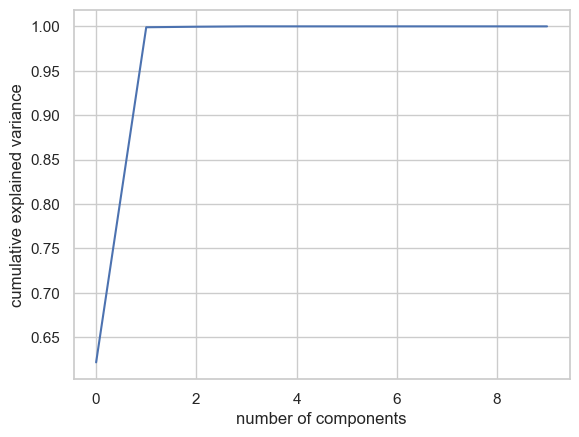

None

Cumulative Variance Ratio  Explained Variance Ratio
0                   0.621562              6.215621e-01
1                   0.999008              3.774463e-01
2                   0.999600              5.912672e-04
3                   0.999998              3.983838e-04
4                   0.999999              1.384541e-06
5                   1.000000              2.482287e-07
6                   1.000000              1.924869e-07
7                   1.000000              7.731905e-08
8                   1.000000              2.512541e-08
9                   1.000000              8.751533e-09

In [138]:
wins = merged_df[['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_wins_in_3','team_1_wins_in_5','team_1_wins_in_10','mean_10_rating','mean_5_rating','mean_3_rating']]
pca_test = PCA(n_components=10)
pca_test.fit(wins)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [139]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=teamas['Vitality'][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_wins_in_3','team_1_wins_in_5','team_1_wins_in_10','mean_10_rating','mean_5_rating','mean_3_rating']].columns, index=pca_dims)
pca_test_df.head(10).T

PCA Component 0  PCA Component 1  PCA Component 2  \
rank_team_2               -0.024275    -3.926148e-02        -0.906829   
rank_team_1               -0.029685     2.020048e-02         0.419073   
rank-points_team_1         0.844977    -5.335965e-01         0.015448   
rank-points_team_2         0.533425     8.445858e-01        -0.042418   
team_1_wins_in_3           0.000019     5.607760e-05         0.000130   
team_1_wins_in_5          -0.000001    -7.105257e-07        -0.000288   
team_1_wins_in_10          0.000003     1.367736e-05        -0.000392   
mean_10_rating             0.000030     4.398968e-07        -0.000392   
mean_5_rating              0.000028     2.557849e-07        -0.000437   
mean_3_rating              0.000021     1.404021e-05        -0.000675   

                    PCA Component 3  PCA Component 4  PCA Component 5  \
rank_team_2                0.418963        -0.000307         0.000654   
rank_team_1                0.907241        -0.001215        -0.000195   
rank-points_team_1         0.032392        -0.000056         0.000021   
rank-points_team_2         0.018242         0.000033         0.000068   
team_1_wins_in_3          -0.000816        -0.715721        -0.195135   
team_1_wins_in_5          -0.000607        -0.577806         0.056387   
team_1_wins_in_10         -0.000769        -0.392180         0.287451   
mean_10_rating            -0.000642         0.001213        -0.418537   
mean_5_rating              0.000054        -0.001207        -0.541488   
mean_3_rating              0.000380        -0.008623        -0.638538   

                    PCA Component 6  PCA Component 7  PCA Component 8  \
rank_team_2                0.000571         0.000079         0.000366   
rank_team_1               -0.000496         0.000161         0.000603   
rank-points_team_1        -0.000002         0.000012         0.000006   
rank-points_team_2         0.000013        -0.000025         0.000014   
team_1_wins_in_3           0.584344         0.327063         0.031983   
team_1_wins_in_5          -0.253806        -0.772159        -0.044509   
team_1_wins_in_10         -0.687381         0.539002         0.023370   
mean_10_rating            -0.158457        -0.005539         0.687570   
mean_5_rating             -0.215317        -0.001045         0.260816   
mean_3_rating             -0.223970         0.079024        -0.675034   

                    PCA Component 9  
rank_team_2               -0.000048  
rank_team_1               -0.000307  
rank-points_team_1        -0.000011  
rank-points_team_2         0.000002  
team_1_wins_in_3           0.014671  
team_1_wins_in_5          -0.018204  
team_1_wins_in_10          0.002133  
mean_10_rating            -0.571780  
mean_5_rating              0.769676  
mean_3_rating             -0.283046

In [141]:
df

index  team1score  team2score  team1score_t_on_map_1  \
0        0           2           1                    6.0   
1        1           2           1                    6.0   
2        2           2           1                    7.0   
3        3           0           2                    5.0   
4        4           2           1                    6.0   
..     ...         ...         ...                    ...   
888    895           1           2                    3.0   
889    896           2           1                    7.0   
890    897           0           1                    5.0   
891    898           0           1                    8.0   
892    899           2           1                    5.0   

     team1score_ct_on_map_1  team2score_t_on_map_1  team2score_ct_on_map_1  \
0                       0.0                    7.0                     9.0   
1                      10.0                    5.0                     5.0   
2                       7.0                    8.0                     8.0   
3                       3.0                    6.0                    10.0   
4                       5.0                    7.0                     9.0   
..                      ...                    ...                     ...   
888                    13.0                    2.0                     7.0   
889                     1.0                    8.0                     8.0   
890                    10.0                    5.0                    10.0   
891                     5.0                   10.0                     6.0   
892                     6.0                    9.0                     7.0   

     team1score_t_on_map_2  team1score_ct_on_map_2  team2score_t_on_map_2  \
0                      5.0                    10.0                    5.0   
1                      6.0                     8.0                    7.0   
2                     10.0                     6.0                    5.0   
3                      9.0                     5.0                   10.0   
4                      6.0                    10.0                    5.0   
..                     ...                     ...                    ...   
888                    6.0                     9.0                    6.0   
889                    8.0                     8.0                    7.0   
890                    0.0                     0.0                    0.0   
891                    0.0                     0.0                    0.0   
892                    8.0                     8.0                    4.0   

     ...  team_1_rating  team_rating_diff  team_1_clutches  \
0    ...       1.060000          0.040000         2.000000   
1    ...       1.190000          0.340000         2.000000   
2    ...       1.140000          0.163333         2.000000   
3    ...       0.985000         -0.140000         2.000000   
4    ...       1.086667          0.083333         1.000000   
..   ...            ...               ...              ...   
888  ...       1.073333          0.020000         1.666667   
889  ...       1.086667          0.070000         1.333333   
890  ...       0.940000         -0.230000         1.000000   
891  ...       1.000000         -0.080000         2.000000   
892  ...       1.120000          0.143333         1.333333   

     team_clutches_diff  team_1_fb  team_fb_diff        team1          team2  \
0              1.000000  14.666667      3.000000       Heroic          FURIA   
1              1.000000  15.666667      5.333333    Outsiders           MOUZ   
2              0.000000  13.333333     -0.333333        FURIA  Natus Vincere   
3             -1.500000  13.000000     -1.000000       Spirit         Heroic   
4              0.000000  14.000000      1.333333         MOUZ         Cloud9   
..                  ...        ...           ...          ...            ...   
888            0.333333  15.000000      1.333333       Sprout       Dignitas   
889            0.000000  

In [156]:
grouped_df = df.groupby(['team1']).team_1_rating.rolling(window=3).mean().reset_index() 

In [159]:
mer_df = df.merge(grouped_df, on=['team1'], how='left')

In [160]:
mer_df

index  team1score  team2score  team1score_t_on_map_1  \
0          0           2           1                    6.0   
1          0           2           1                    6.0   
2          0           2           1                    6.0   
3          0           2           1                    6.0   
4          0           2           1                    6.0   
...      ...         ...         ...                    ...   
23122    899           2           1                    5.0   
23123    899           2           1                    5.0   
23124    899           2           1                    5.0   
23125    899           2           1                    5.0   
23126    899           2           1                    5.0   

       team1score_ct_on_map_1  team2score_t_on_map_1  team2score_ct_on_map_1  \
0                         0.0                    7.0                     9.0   
1                         0.0                    7.0                     9.0   
2                         0.0                    7.0                     9.0   
3                         0.0                    7.0                     9.0   
4                         0.0                    7.0                     9.0   
...                       ...                    ...                     ...   
23122                     6.0                    9.0                     7.0   
23123                     6.0                    9.0                     7.0   
23124                     6.0                    9.0                     7.0   
23125                     6.0                    9.0                     7.0   
23126                     6.0                    9.0                     7.0   

       team1score_t_on_map_2  team1score_ct_on_map_2  team2score_t_on_map_2  \
0                        5.0                    10.0                    5.0   
1                        5.0                    10.0                    5.0   
2                        5.0                    10.0                    5.0   
3                        5.0                    10.0                    5.0   
4                        5.0                    10.0                    5.0   
...                      ...                     ...                    ...   
23122                    8.0                     8.0                    4.0   
23123                    8.0                     8.0                    4.0   
23124                    8.0                     8.0                    4.0   
23125                    8.0                     8.0                    4.0   
23126                    8.0                     8.0                    4.0   

       ...  team_1_clutches  team_clutches_diff  team_1_fb  team_fb_diff  \
0      ...         2.000000            1.000000  14.666667      3.000000   
1      ...         2.000000            1.000000  14.666667      3.000000   
2      ...         2.000000            1.000000  14.666667      3.000000   
3      ...         2.000000            1.000000  14.666667      3.000000   
4      ...         2.000000            1.000000  14.666667      3.000000   
...    ...              ...                 ...        ...           ...   
23122  ...         1.333333            0.666667  14.666667      1.666667   
23123  ...         1.333333            0.666667  14.666667      1.666667   
23124  ...         1.333333            0.666667  14.666667      1.666667   
23125  ...         1.333333            0.666667  14.666667      1.666667   
23126  ...         1.333333            0.666667  14.666667      1.666667   

        team1   team2  team_2_rating  rank_points_diff  level_1  \
0      Heroic   FURIA       1.020000             -19.0        0   
1      Heroic   FURIA       1.020000             -19.0        9   
2      Heroic   FURIA       1.020000             -19.0       18   
3      Heroic   FURIA       1.020000             -19.0       24   
4      Heroic   FURIA       1.020000             -19.0       77   
...       ...     ...    

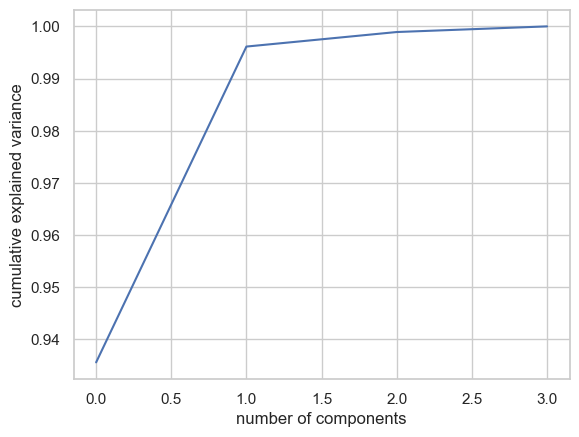

None

Cumulative Variance Ratio  Explained Variance Ratio
0                   0.935559                  0.935559
1                   0.996127                  0.060568
2                   0.998915                  0.002788
3                   1.000000                  0.001085

In [119]:
pca_test = PCA(n_components=4)
pca_test.fit(X_team)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [144]:
teamas['Vitality'][['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_wins_in_3','team_1_wins_in_5','team_1_wins_in_10','mean_10_rating','mean_5_rating','mean_3_rating']]

rank_team_2  rank_team_1  rank-points_team_1  rank-points_team_2  \
11           1.0         11.0               306.0               780.0   
21           1.0          7.0               475.0               780.0   
28           1.0          2.0               726.0               780.0   
33           4.0          1.0               780.0               653.0   
41           1.0         15.0               251.0               780.0   
..           ...          ...                 ...                 ...   
789         40.0          5.0               419.0                40.0   
792          4.0          5.0               419.0               534.0   
802         14.0          5.0               419.0               132.0   
810         15.0          5.0               419.0               131.0   
816         23.0          5.0               419.0                60.0   

     team_1_wins_in_3  team_1_wins_in_5  team_1_wins_in_10  mean_10_rating  \
11           0.500000          0.500000           0.500000        1.000000   
21           0.500000          0.500000           1.000000        0.930000   
28           1.000000          1.000000           1.000000        0.975000   
33           0.666667          0.666667           0.666667        1.080000   
41           0.333333          0.500000           0.500000        1.055000   
..                ...               ...                ...             ...   
789          0.333333          0.600000           0.700000        1.113833   
792          0.666667          0.600000           0.700000        1.177833   
802          0.333333          0.400000           0.600000        1.131833   
810          0.333333          0.400000           0.600000        1.098167   
816          0.000000          0.200000           0.500000        1.024667   

     mean_5_rating  mean_3_rating  
11        1.000000       1.000000  
21        0.930000       0.930000  
28        0.975000       0.975000  
33        1.080000       1.080000  
41        1.055000       1.096667  
..             ...            ...  
789       1.093000       1.131667  
792       1.155000       1.205000  
802       1.055000       0.945000  
810       1.025667       0.921111  
816       0.930667       0.816111  

[64 rows x 10 columns]

In [135]:
n=0
mean=0
seed=0
testers = []
final_label = []
for te in teamas.values():
    rnd_for = RandomForestClassifier(random_state=seed)
    y_team=te.team_1_won
    X_team=te[['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2','team_1_wins_in_3','team_1_wins_in_5','team_1_wins_in_10','mean_10_rating','mean_5_rating','mean_3_rating']]
    
    
    df_train, df_test, y_dtrain, y_dtest = train_test_split(X_team, y_team, test_size = 0.3, random_state = 0)
    
    
    
    pca = PCA(n_components=2)
    pca.fit(df_train)
    X_train_pca = pca.transform(df_train)
    X_test_pca = pca.transform(df_test)
    
    
    rnd_for.fit(X_train_pca,y_dtrain)
    
    mean+=(mean_absolute_error(y_dtest, rnd_for.predict_proba(X_test_pca)[:,1]))*(len(te))
    testers.append(y_dtest)
    final_label.append(rnd_for.predict(X_test_pca))
    
print(mean/1376)    

0.4042783041247282


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', ...)

<AxesSubplot:>

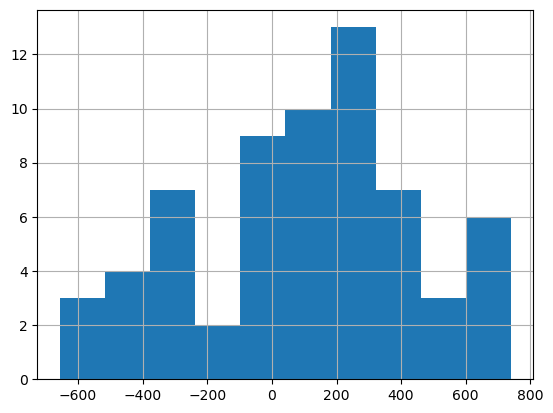

In [52]:
teamas['Vitality'].team_points_diff.hist()

In [31]:
teamas['Vitality'].team_1_wins_in_10.value_counts()

0.500000    15
0.700000    14
0.400000    11
0.600000    11
0.800000     4
0.300000     3
1.000000     2
0.666667     1
0.428571     1
0.375000     1
0.444444     1
Name: team_1_wins_in_10, dtype: int64

In [413]:
n=0
mean=0
seed=0
testers = []
final_label = []
for te in teamas.values():
    cat_te = CatBoostClassifier(random_state=seed,iterations=1000, learning_rate=0.1, eval_metric='Logloss')
    y_team=te.team_1_won
    X_team=te[['rank-points_team_1','rank-points_team_2','rank_team_1','rank_team_2']]
    
    
    df_train, df_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.3, random_state = 0)
    cat_te.fit(df_train,y_train)
    
    mean+=(mean_absolute_error(y_test, cat_te.predict_proba(df_test)[:,1]))*(len(te))
    testers.append(y_test)
    final_label.append(cat_te.predict(df_test))
    
print(mean/1376)    

0:	learn: 0.6585491	total: 1.19ms	remaining: 1.19s
1:	learn: 0.6375790	total: 2.39ms	remaining: 1.19s
2:	learn: 0.6238961	total: 3.24ms	remaining: 1.08s
3:	learn: 0.5848023	total: 4.14ms	remaining: 1.03s
4:	learn: 0.5696682	total: 4.97ms	remaining: 990ms
5:	learn: 0.5651656	total: 5.87ms	remaining: 973ms
6:	learn: 0.5448366	total: 6.88ms	remaining: 976ms
7:	learn: 0.5304686	total: 7.9ms	remaining: 980ms
8:	learn: 0.5232530	total: 8.99ms	remaining: 990ms
9:	learn: 0.5022748	total: 9.98ms	remaining: 988ms
10:	learn: 0.4861788	total: 10.9ms	remaining: 981ms
11:	learn: 0.4772937	total: 11.9ms	remaining: 978ms
12:	learn: 0.4678097	total: 12.9ms	remaining: 983ms
13:	learn: 0.4575984	total: 14.1ms	remaining: 992ms
14:	learn: 0.4480833	total: 15.2ms	remaining: 995ms
15:	learn: 0.4413775	total: 16.3ms	remaining: 1s
16:	learn: 0.4404579	total: 17.2ms	remaining: 993ms
17:	learn: 0.4346653	total: 18.2ms	remaining: 995ms
18:	learn: 0.4276127	total: 19.2ms	remaining: 994ms
19:	learn: 0.4165652	total

212:	learn: 0.1319659	total: 197ms	remaining: 729ms
213:	learn: 0.1318080	total: 198ms	remaining: 729ms
214:	learn: 0.1317474	total: 199ms	remaining: 728ms
215:	learn: 0.1316752	total: 200ms	remaining: 727ms
216:	learn: 0.1315185	total: 201ms	remaining: 726ms
217:	learn: 0.1314612	total: 202ms	remaining: 725ms
218:	learn: 0.1313959	total: 203ms	remaining: 724ms
219:	learn: 0.1313328	total: 204ms	remaining: 723ms
220:	learn: 0.1312708	total: 205ms	remaining: 722ms
221:	learn: 0.1311469	total: 206ms	remaining: 721ms
222:	learn: 0.1309692	total: 207ms	remaining: 720ms
223:	learn: 0.1308362	total: 207ms	remaining: 718ms
224:	learn: 0.1307041	total: 208ms	remaining: 717ms
225:	learn: 0.1304714	total: 209ms	remaining: 716ms
226:	learn: 0.1302527	total: 210ms	remaining: 716ms
227:	learn: 0.1301605	total: 211ms	remaining: 715ms
228:	learn: 0.1300708	total: 212ms	remaining: 714ms
229:	learn: 0.1299801	total: 213ms	remaining: 713ms
230:	learn: 0.1298908	total: 214ms	remaining: 712ms
231:	learn: 

412:	learn: 0.1198176	total: 388ms	remaining: 551ms
413:	learn: 0.1197993	total: 389ms	remaining: 550ms
414:	learn: 0.1197252	total: 390ms	remaining: 550ms
415:	learn: 0.1196995	total: 391ms	remaining: 549ms
416:	learn: 0.1196736	total: 392ms	remaining: 548ms
417:	learn: 0.1196463	total: 393ms	remaining: 547ms
418:	learn: 0.1196202	total: 394ms	remaining: 546ms
419:	learn: 0.1195939	total: 394ms	remaining: 545ms
420:	learn: 0.1195689	total: 395ms	remaining: 544ms
421:	learn: 0.1195113	total: 396ms	remaining: 543ms
422:	learn: 0.1194426	total: 397ms	remaining: 542ms
423:	learn: 0.1194068	total: 398ms	remaining: 541ms
424:	learn: 0.1193807	total: 399ms	remaining: 540ms
425:	learn: 0.1193525	total: 400ms	remaining: 539ms
426:	learn: 0.1193281	total: 401ms	remaining: 537ms
427:	learn: 0.1192997	total: 401ms	remaining: 536ms
428:	learn: 0.1192757	total: 402ms	remaining: 536ms
429:	learn: 0.1192229	total: 403ms	remaining: 535ms
430:	learn: 0.1191697	total: 404ms	remaining: 534ms
431:	learn: 

645:	learn: 0.1147945	total: 582ms	remaining: 319ms
646:	learn: 0.1147872	total: 584ms	remaining: 319ms
647:	learn: 0.1147780	total: 585ms	remaining: 318ms
648:	learn: 0.1147699	total: 586ms	remaining: 317ms
649:	learn: 0.1147623	total: 587ms	remaining: 316ms
650:	learn: 0.1147554	total: 588ms	remaining: 315ms
651:	learn: 0.1147343	total: 589ms	remaining: 315ms
652:	learn: 0.1147181	total: 590ms	remaining: 314ms
653:	learn: 0.1147104	total: 591ms	remaining: 313ms
654:	learn: 0.1147020	total: 592ms	remaining: 312ms
655:	learn: 0.1146951	total: 593ms	remaining: 311ms
656:	learn: 0.1146878	total: 594ms	remaining: 310ms
657:	learn: 0.1146804	total: 595ms	remaining: 309ms
658:	learn: 0.1146741	total: 596ms	remaining: 308ms
659:	learn: 0.1146655	total: 597ms	remaining: 307ms
660:	learn: 0.1146520	total: 598ms	remaining: 307ms
661:	learn: 0.1146460	total: 599ms	remaining: 306ms
662:	learn: 0.1146305	total: 600ms	remaining: 305ms
663:	learn: 0.1146247	total: 601ms	remaining: 304ms
664:	learn: 

868:	learn: 0.1130163	total: 772ms	remaining: 116ms
869:	learn: 0.1130104	total: 773ms	remaining: 115ms
870:	learn: 0.1130027	total: 773ms	remaining: 115ms
871:	learn: 0.1129990	total: 774ms	remaining: 114ms
872:	learn: 0.1129934	total: 775ms	remaining: 113ms
873:	learn: 0.1129884	total: 776ms	remaining: 112ms
874:	learn: 0.1129801	total: 777ms	remaining: 111ms
875:	learn: 0.1129766	total: 777ms	remaining: 110ms
876:	learn: 0.1129724	total: 778ms	remaining: 109ms
877:	learn: 0.1129643	total: 779ms	remaining: 108ms
878:	learn: 0.1129603	total: 780ms	remaining: 107ms
879:	learn: 0.1129551	total: 781ms	remaining: 106ms
880:	learn: 0.1129472	total: 781ms	remaining: 106ms
881:	learn: 0.1129438	total: 782ms	remaining: 105ms
882:	learn: 0.1129398	total: 783ms	remaining: 104ms
883:	learn: 0.1129311	total: 784ms	remaining: 103ms
884:	learn: 0.1129277	total: 785ms	remaining: 102ms
885:	learn: 0.1129225	total: 786ms	remaining: 101ms
886:	learn: 0.1129187	total: 787ms	remaining: 100ms
887:	learn: 

38:	learn: 0.2481750	total: 38.6ms	remaining: 950ms
39:	learn: 0.2465162	total: 39.8ms	remaining: 955ms
40:	learn: 0.2448991	total: 40.8ms	remaining: 953ms
41:	learn: 0.2418966	total: 41.8ms	remaining: 952ms
42:	learn: 0.2393509	total: 42.7ms	remaining: 951ms
43:	learn: 0.2345531	total: 43.7ms	remaining: 949ms
44:	learn: 0.2325825	total: 44.8ms	remaining: 951ms
45:	learn: 0.2296559	total: 45.9ms	remaining: 952ms
46:	learn: 0.2271526	total: 46.9ms	remaining: 951ms
47:	learn: 0.2237990	total: 47.9ms	remaining: 951ms
48:	learn: 0.2201505	total: 49ms	remaining: 952ms
49:	learn: 0.2184091	total: 50.1ms	remaining: 952ms
50:	learn: 0.2164566	total: 51.4ms	remaining: 956ms
51:	learn: 0.2133669	total: 52.6ms	remaining: 959ms
52:	learn: 0.2115558	total: 53.6ms	remaining: 958ms
53:	learn: 0.2089709	total: 54.7ms	remaining: 958ms
54:	learn: 0.2059919	total: 55.7ms	remaining: 957ms
55:	learn: 0.2044567	total: 56.7ms	remaining: 956ms
56:	learn: 0.2033319	total: 57.7ms	remaining: 955ms
57:	learn: 0.2

255:	learn: 0.0979449	total: 225ms	remaining: 654ms
256:	learn: 0.0978648	total: 226ms	remaining: 654ms
257:	learn: 0.0977909	total: 227ms	remaining: 654ms
258:	learn: 0.0977224	total: 228ms	remaining: 653ms
259:	learn: 0.0976499	total: 229ms	remaining: 652ms
260:	learn: 0.0975902	total: 230ms	remaining: 651ms
261:	learn: 0.0974799	total: 231ms	remaining: 650ms
262:	learn: 0.0974093	total: 232ms	remaining: 649ms
263:	learn: 0.0973406	total: 233ms	remaining: 648ms
264:	learn: 0.0972743	total: 234ms	remaining: 648ms
265:	learn: 0.0971482	total: 234ms	remaining: 647ms
266:	learn: 0.0970568	total: 235ms	remaining: 646ms
267:	learn: 0.0969561	total: 236ms	remaining: 645ms
268:	learn: 0.0968731	total: 237ms	remaining: 645ms
269:	learn: 0.0968200	total: 238ms	remaining: 644ms
270:	learn: 0.0967697	total: 239ms	remaining: 643ms
271:	learn: 0.0966837	total: 240ms	remaining: 642ms
272:	learn: 0.0966012	total: 241ms	remaining: 641ms
273:	learn: 0.0965527	total: 242ms	remaining: 641ms
274:	learn: 

463:	learn: 0.0900502	total: 414ms	remaining: 478ms
464:	learn: 0.0900315	total: 415ms	remaining: 478ms
465:	learn: 0.0900132	total: 416ms	remaining: 477ms
466:	learn: 0.0899959	total: 417ms	remaining: 476ms
467:	learn: 0.0899747	total: 418ms	remaining: 475ms
468:	learn: 0.0899496	total: 419ms	remaining: 475ms
469:	learn: 0.0899401	total: 420ms	remaining: 474ms
470:	learn: 0.0899161	total: 421ms	remaining: 473ms
471:	learn: 0.0899029	total: 422ms	remaining: 472ms
472:	learn: 0.0898841	total: 423ms	remaining: 471ms
473:	learn: 0.0898663	total: 424ms	remaining: 470ms
474:	learn: 0.0898469	total: 425ms	remaining: 469ms
475:	learn: 0.0898374	total: 426ms	remaining: 469ms
476:	learn: 0.0898274	total: 427ms	remaining: 468ms
477:	learn: 0.0898044	total: 428ms	remaining: 467ms
478:	learn: 0.0897875	total: 428ms	remaining: 466ms
479:	learn: 0.0897709	total: 429ms	remaining: 465ms
480:	learn: 0.0897538	total: 430ms	remaining: 464ms
481:	learn: 0.0897351	total: 431ms	remaining: 464ms
482:	learn: 

682:	learn: 0.0873595	total: 602ms	remaining: 280ms
683:	learn: 0.0873525	total: 603ms	remaining: 279ms
684:	learn: 0.0873456	total: 604ms	remaining: 278ms
685:	learn: 0.0873374	total: 605ms	remaining: 277ms
686:	learn: 0.0873308	total: 606ms	remaining: 276ms
687:	learn: 0.0873235	total: 607ms	remaining: 275ms
688:	learn: 0.0873154	total: 608ms	remaining: 274ms
689:	learn: 0.0873085	total: 608ms	remaining: 273ms
690:	learn: 0.0873028	total: 609ms	remaining: 272ms
691:	learn: 0.0872943	total: 610ms	remaining: 272ms
692:	learn: 0.0872881	total: 611ms	remaining: 271ms
693:	learn: 0.0872817	total: 612ms	remaining: 270ms
694:	learn: 0.0872737	total: 612ms	remaining: 269ms
695:	learn: 0.0872674	total: 613ms	remaining: 268ms
696:	learn: 0.0872611	total: 614ms	remaining: 267ms
697:	learn: 0.0872516	total: 615ms	remaining: 266ms
698:	learn: 0.0872454	total: 616ms	remaining: 265ms
699:	learn: 0.0872394	total: 616ms	remaining: 264ms
700:	learn: 0.0872333	total: 617ms	remaining: 263ms
701:	learn: 

902:	learn: 0.0863352	total: 792ms	remaining: 85.1ms
903:	learn: 0.0863313	total: 793ms	remaining: 84.2ms
904:	learn: 0.0863298	total: 794ms	remaining: 83.4ms
905:	learn: 0.0863296	total: 795ms	remaining: 82.5ms
906:	learn: 0.0863258	total: 796ms	remaining: 81.6ms
907:	learn: 0.0863217	total: 796ms	remaining: 80.7ms
908:	learn: 0.0863212	total: 797ms	remaining: 79.8ms
909:	learn: 0.0863214	total: 798ms	remaining: 78.9ms
910:	learn: 0.0863199	total: 799ms	remaining: 78ms
911:	learn: 0.0863147	total: 799ms	remaining: 77.1ms
912:	learn: 0.0863149	total: 800ms	remaining: 76.2ms
913:	learn: 0.0863134	total: 801ms	remaining: 75.3ms
914:	learn: 0.0863096	total: 802ms	remaining: 74.5ms
915:	learn: 0.0863096	total: 802ms	remaining: 73.6ms
916:	learn: 0.0863064	total: 803ms	remaining: 72.7ms
917:	learn: 0.0863051	total: 804ms	remaining: 71.8ms
918:	learn: 0.0863018	total: 805ms	remaining: 70.9ms
919:	learn: 0.0862983	total: 806ms	remaining: 70.1ms
920:	learn: 0.0862953	total: 807ms	remaining: 69

74:	learn: 0.2178271	total: 65.2ms	remaining: 804ms
75:	learn: 0.2150853	total: 66.1ms	remaining: 804ms
76:	learn: 0.2132173	total: 67.1ms	remaining: 804ms
77:	learn: 0.2118846	total: 68ms	remaining: 804ms
78:	learn: 0.2106547	total: 69ms	remaining: 805ms
79:	learn: 0.2080705	total: 70ms	remaining: 805ms
80:	learn: 0.2065336	total: 71ms	remaining: 805ms
81:	learn: 0.2047281	total: 71.9ms	remaining: 804ms
82:	learn: 0.2023955	total: 72.7ms	remaining: 803ms
83:	learn: 0.2010798	total: 73.6ms	remaining: 802ms
84:	learn: 0.1999398	total: 74.4ms	remaining: 800ms
85:	learn: 0.1983238	total: 75.1ms	remaining: 798ms
86:	learn: 0.1974143	total: 75.9ms	remaining: 796ms
87:	learn: 0.1959808	total: 76.7ms	remaining: 795ms
88:	learn: 0.1942325	total: 77.6ms	remaining: 794ms
89:	learn: 0.1924235	total: 78.4ms	remaining: 793ms
90:	learn: 0.1916142	total: 79.4ms	remaining: 793ms
91:	learn: 0.1908818	total: 80.3ms	remaining: 793ms
92:	learn: 0.1895984	total: 81.2ms	remaining: 792ms
93:	learn: 0.1879703

302:	learn: 0.1298014	total: 252ms	remaining: 579ms
303:	learn: 0.1297111	total: 253ms	remaining: 579ms
304:	learn: 0.1297001	total: 254ms	remaining: 578ms
305:	learn: 0.1296586	total: 254ms	remaining: 577ms
306:	learn: 0.1295738	total: 255ms	remaining: 576ms
307:	learn: 0.1294930	total: 256ms	remaining: 575ms
308:	learn: 0.1294564	total: 257ms	remaining: 574ms
309:	learn: 0.1294285	total: 257ms	remaining: 573ms
310:	learn: 0.1294186	total: 258ms	remaining: 572ms
311:	learn: 0.1293910	total: 259ms	remaining: 571ms
312:	learn: 0.1293330	total: 260ms	remaining: 570ms
313:	learn: 0.1293067	total: 260ms	remaining: 569ms
314:	learn: 0.1292492	total: 261ms	remaining: 568ms
315:	learn: 0.1292170	total: 262ms	remaining: 567ms
316:	learn: 0.1292075	total: 263ms	remaining: 566ms
317:	learn: 0.1291070	total: 264ms	remaining: 566ms
318:	learn: 0.1290503	total: 265ms	remaining: 565ms
319:	learn: 0.1290184	total: 266ms	remaining: 564ms
320:	learn: 0.1289935	total: 267ms	remaining: 564ms
321:	learn: 

523:	learn: 0.1223624	total: 443ms	remaining: 403ms
524:	learn: 0.1223545	total: 444ms	remaining: 402ms
525:	learn: 0.1223461	total: 445ms	remaining: 401ms
526:	learn: 0.1223318	total: 447ms	remaining: 401ms
527:	learn: 0.1223011	total: 447ms	remaining: 400ms
528:	learn: 0.1222631	total: 448ms	remaining: 399ms
529:	learn: 0.1222494	total: 449ms	remaining: 399ms
530:	learn: 0.1222353	total: 450ms	remaining: 398ms
531:	learn: 0.1222051	total: 451ms	remaining: 397ms
532:	learn: 0.1221694	total: 452ms	remaining: 396ms
533:	learn: 0.1221370	total: 453ms	remaining: 396ms
534:	learn: 0.1221045	total: 454ms	remaining: 395ms
535:	learn: 0.1220736	total: 455ms	remaining: 394ms
536:	learn: 0.1220589	total: 456ms	remaining: 394ms
537:	learn: 0.1220452	total: 458ms	remaining: 393ms
538:	learn: 0.1220316	total: 459ms	remaining: 392ms
539:	learn: 0.1220034	total: 460ms	remaining: 392ms
540:	learn: 0.1219720	total: 461ms	remaining: 391ms
541:	learn: 0.1219581	total: 462ms	remaining: 390ms
542:	learn: 

749:	learn: 0.1194185	total: 633ms	remaining: 211ms
750:	learn: 0.1194127	total: 634ms	remaining: 210ms
751:	learn: 0.1194069	total: 635ms	remaining: 209ms
752:	learn: 0.1194016	total: 635ms	remaining: 208ms
753:	learn: 0.1193878	total: 636ms	remaining: 208ms
754:	learn: 0.1193701	total: 637ms	remaining: 207ms
755:	learn: 0.1193639	total: 638ms	remaining: 206ms
756:	learn: 0.1193608	total: 639ms	remaining: 205ms
757:	learn: 0.1193567	total: 640ms	remaining: 204ms
758:	learn: 0.1193542	total: 641ms	remaining: 203ms
759:	learn: 0.1193479	total: 641ms	remaining: 203ms
760:	learn: 0.1193421	total: 642ms	remaining: 202ms
761:	learn: 0.1193375	total: 643ms	remaining: 201ms
762:	learn: 0.1193201	total: 644ms	remaining: 200ms
763:	learn: 0.1193148	total: 645ms	remaining: 199ms
764:	learn: 0.1192982	total: 646ms	remaining: 198ms
765:	learn: 0.1192921	total: 647ms	remaining: 198ms
766:	learn: 0.1192874	total: 648ms	remaining: 197ms
767:	learn: 0.1192705	total: 648ms	remaining: 196ms
768:	learn: 

985:	learn: 0.1183839	total: 819ms	remaining: 11.6ms
986:	learn: 0.1183839	total: 821ms	remaining: 10.8ms
987:	learn: 0.1183839	total: 822ms	remaining: 9.98ms
988:	learn: 0.1183839	total: 822ms	remaining: 9.15ms
989:	learn: 0.1183839	total: 823ms	remaining: 8.31ms
990:	learn: 0.1183839	total: 824ms	remaining: 7.48ms
991:	learn: 0.1183839	total: 825ms	remaining: 6.65ms
992:	learn: 0.1183839	total: 826ms	remaining: 5.82ms
993:	learn: 0.1183839	total: 827ms	remaining: 4.99ms
994:	learn: 0.1183839	total: 827ms	remaining: 4.16ms
995:	learn: 0.1183839	total: 828ms	remaining: 3.33ms
996:	learn: 0.1183839	total: 829ms	remaining: 2.49ms
997:	learn: 0.1183839	total: 829ms	remaining: 1.66ms
998:	learn: 0.1183839	total: 830ms	remaining: 831us
999:	learn: 0.1183839	total: 831ms	remaining: 0us
0:	learn: 0.6512811	total: 3.68ms	remaining: 3.68s
1:	learn: 0.6160120	total: 7.31ms	remaining: 3.65s
2:	learn: 0.5791349	total: 10.1ms	remaining: 3.36s
3:	learn: 0.5630845	total: 13.2ms	remaining: 3.29s
4:	le

147:	learn: 0.1501644	total: 150ms	remaining: 862ms
148:	learn: 0.1500047	total: 151ms	remaining: 863ms
149:	learn: 0.1497858	total: 152ms	remaining: 862ms
150:	learn: 0.1494433	total: 153ms	remaining: 861ms
151:	learn: 0.1492930	total: 154ms	remaining: 859ms
152:	learn: 0.1491482	total: 155ms	remaining: 857ms
153:	learn: 0.1488248	total: 156ms	remaining: 855ms
154:	learn: 0.1487195	total: 157ms	remaining: 853ms
155:	learn: 0.1485791	total: 157ms	remaining: 852ms
156:	learn: 0.1484226	total: 158ms	remaining: 850ms
157:	learn: 0.1481136	total: 159ms	remaining: 848ms
158:	learn: 0.1479807	total: 160ms	remaining: 847ms
159:	learn: 0.1476914	total: 161ms	remaining: 845ms
160:	learn: 0.1473142	total: 162ms	remaining: 843ms
161:	learn: 0.1468608	total: 163ms	remaining: 842ms
162:	learn: 0.1464380	total: 164ms	remaining: 840ms
163:	learn: 0.1460387	total: 165ms	remaining: 839ms
164:	learn: 0.1456651	total: 166ms	remaining: 839ms
165:	learn: 0.1452667	total: 167ms	remaining: 839ms
166:	learn: 

372:	learn: 0.1287807	total: 339ms	remaining: 569ms
373:	learn: 0.1287454	total: 340ms	remaining: 569ms
374:	learn: 0.1287109	total: 341ms	remaining: 568ms
375:	learn: 0.1286724	total: 342ms	remaining: 567ms
376:	learn: 0.1286493	total: 342ms	remaining: 566ms
377:	learn: 0.1286317	total: 343ms	remaining: 565ms
378:	learn: 0.1285994	total: 344ms	remaining: 564ms
379:	learn: 0.1285784	total: 345ms	remaining: 563ms
380:	learn: 0.1285403	total: 346ms	remaining: 562ms
381:	learn: 0.1285095	total: 347ms	remaining: 561ms
382:	learn: 0.1284738	total: 348ms	remaining: 560ms
383:	learn: 0.1284526	total: 348ms	remaining: 559ms
384:	learn: 0.1284236	total: 349ms	remaining: 558ms
385:	learn: 0.1283879	total: 350ms	remaining: 557ms
386:	learn: 0.1283663	total: 351ms	remaining: 556ms
387:	learn: 0.1283315	total: 352ms	remaining: 555ms
388:	learn: 0.1283032	total: 353ms	remaining: 555ms
389:	learn: 0.1282702	total: 354ms	remaining: 554ms
390:	learn: 0.1282429	total: 355ms	remaining: 553ms
391:	learn: 

605:	learn: 0.1255554	total: 530ms	remaining: 345ms
606:	learn: 0.1255554	total: 531ms	remaining: 344ms
607:	learn: 0.1255554	total: 532ms	remaining: 343ms
608:	learn: 0.1255554	total: 533ms	remaining: 342ms
609:	learn: 0.1255554	total: 534ms	remaining: 341ms
610:	learn: 0.1255554	total: 534ms	remaining: 340ms
611:	learn: 0.1255554	total: 535ms	remaining: 339ms
612:	learn: 0.1255554	total: 536ms	remaining: 338ms
613:	learn: 0.1255554	total: 537ms	remaining: 337ms
614:	learn: 0.1255554	total: 537ms	remaining: 336ms
615:	learn: 0.1255554	total: 538ms	remaining: 336ms
616:	learn: 0.1255554	total: 539ms	remaining: 335ms
617:	learn: 0.1255554	total: 540ms	remaining: 334ms
618:	learn: 0.1255554	total: 540ms	remaining: 333ms
619:	learn: 0.1255554	total: 541ms	remaining: 332ms
620:	learn: 0.1255554	total: 542ms	remaining: 331ms
621:	learn: 0.1255554	total: 543ms	remaining: 330ms
622:	learn: 0.1255554	total: 544ms	remaining: 329ms
623:	learn: 0.1255554	total: 544ms	remaining: 328ms
624:	learn: 

858:	learn: 0.1255554	total: 717ms	remaining: 118ms
859:	learn: 0.1255554	total: 719ms	remaining: 117ms
860:	learn: 0.1255554	total: 720ms	remaining: 116ms
861:	learn: 0.1255554	total: 720ms	remaining: 115ms
862:	learn: 0.1255554	total: 721ms	remaining: 114ms
863:	learn: 0.1255554	total: 722ms	remaining: 114ms
864:	learn: 0.1255554	total: 723ms	remaining: 113ms
865:	learn: 0.1255554	total: 723ms	remaining: 112ms
866:	learn: 0.1255554	total: 724ms	remaining: 111ms
867:	learn: 0.1255554	total: 725ms	remaining: 110ms
868:	learn: 0.1255554	total: 726ms	remaining: 109ms
869:	learn: 0.1255554	total: 727ms	remaining: 109ms
870:	learn: 0.1255554	total: 728ms	remaining: 108ms
871:	learn: 0.1255554	total: 729ms	remaining: 107ms
872:	learn: 0.1255554	total: 729ms	remaining: 106ms
873:	learn: 0.1255554	total: 730ms	remaining: 105ms
874:	learn: 0.1255554	total: 731ms	remaining: 104ms
875:	learn: 0.1255554	total: 731ms	remaining: 104ms
876:	learn: 0.1255554	total: 732ms	remaining: 103ms
877:	learn: 

46:	learn: 0.1938373	total: 39.9ms	remaining: 809ms
47:	learn: 0.1931928	total: 40.8ms	remaining: 809ms
48:	learn: 0.1881201	total: 41.7ms	remaining: 810ms
49:	learn: 0.1848910	total: 42.6ms	remaining: 810ms
50:	learn: 0.1825644	total: 43.4ms	remaining: 807ms
51:	learn: 0.1780562	total: 44.2ms	remaining: 806ms
52:	learn: 0.1776166	total: 44.8ms	remaining: 801ms
53:	learn: 0.1740501	total: 45.6ms	remaining: 799ms
54:	learn: 0.1719629	total: 46.3ms	remaining: 796ms
55:	learn: 0.1700527	total: 47.1ms	remaining: 794ms
56:	learn: 0.1681122	total: 47.9ms	remaining: 792ms
57:	learn: 0.1661949	total: 48.6ms	remaining: 790ms
58:	learn: 0.1628411	total: 49.4ms	remaining: 787ms
59:	learn: 0.1607744	total: 50.1ms	remaining: 785ms
60:	learn: 0.1592593	total: 50.8ms	remaining: 782ms
61:	learn: 0.1549985	total: 51.6ms	remaining: 781ms
62:	learn: 0.1531893	total: 52.4ms	remaining: 779ms
63:	learn: 0.1525187	total: 53.2ms	remaining: 778ms
64:	learn: 0.1457757	total: 54ms	remaining: 776ms
65:	learn: 0.1

285:	learn: 0.0187208	total: 230ms	remaining: 573ms
286:	learn: 0.0186287	total: 231ms	remaining: 573ms
287:	learn: 0.0185895	total: 232ms	remaining: 573ms
288:	learn: 0.0185512	total: 233ms	remaining: 572ms
289:	learn: 0.0184505	total: 233ms	remaining: 572ms
290:	learn: 0.0184127	total: 234ms	remaining: 571ms
291:	learn: 0.0183239	total: 235ms	remaining: 571ms
292:	learn: 0.0182217	total: 236ms	remaining: 570ms
293:	learn: 0.0181278	total: 237ms	remaining: 570ms
294:	learn: 0.0180913	total: 238ms	remaining: 569ms
295:	learn: 0.0180050	total: 239ms	remaining: 569ms
296:	learn: 0.0179520	total: 240ms	remaining: 568ms
297:	learn: 0.0179162	total: 241ms	remaining: 568ms
298:	learn: 0.0178814	total: 242ms	remaining: 567ms
299:	learn: 0.0178477	total: 243ms	remaining: 566ms
300:	learn: 0.0177649	total: 244ms	remaining: 566ms
301:	learn: 0.0177147	total: 245ms	remaining: 565ms
302:	learn: 0.0176802	total: 245ms	remaining: 565ms
303:	learn: 0.0176473	total: 246ms	remaining: 564ms
304:	learn: 

531:	learn: 0.0089810	total: 420ms	remaining: 370ms
532:	learn: 0.0089616	total: 421ms	remaining: 369ms
533:	learn: 0.0089450	total: 422ms	remaining: 368ms
534:	learn: 0.0089261	total: 423ms	remaining: 367ms
535:	learn: 0.0088807	total: 424ms	remaining: 367ms
536:	learn: 0.0088367	total: 424ms	remaining: 366ms
537:	learn: 0.0087935	total: 425ms	remaining: 365ms
538:	learn: 0.0087522	total: 426ms	remaining: 364ms
539:	learn: 0.0087116	total: 427ms	remaining: 363ms
540:	learn: 0.0086724	total: 427ms	remaining: 363ms
541:	learn: 0.0086332	total: 428ms	remaining: 362ms
542:	learn: 0.0086079	total: 429ms	remaining: 361ms
543:	learn: 0.0085912	total: 430ms	remaining: 360ms
544:	learn: 0.0085537	total: 431ms	remaining: 360ms
545:	learn: 0.0085293	total: 431ms	remaining: 359ms
546:	learn: 0.0084984	total: 432ms	remaining: 358ms
547:	learn: 0.0084825	total: 433ms	remaining: 357ms
548:	learn: 0.0084569	total: 434ms	remaining: 357ms
549:	learn: 0.0084328	total: 435ms	remaining: 356ms
550:	learn: 

773:	learn: 0.0059717	total: 611ms	remaining: 179ms
774:	learn: 0.0059620	total: 612ms	remaining: 178ms
775:	learn: 0.0059537	total: 613ms	remaining: 177ms
776:	learn: 0.0059467	total: 614ms	remaining: 176ms
777:	learn: 0.0059341	total: 615ms	remaining: 175ms
778:	learn: 0.0059273	total: 616ms	remaining: 175ms
779:	learn: 0.0059194	total: 617ms	remaining: 174ms
780:	learn: 0.0059114	total: 618ms	remaining: 173ms
781:	learn: 0.0058999	total: 619ms	remaining: 172ms
782:	learn: 0.0058886	total: 619ms	remaining: 172ms
783:	learn: 0.0058813	total: 620ms	remaining: 171ms
784:	learn: 0.0058699	total: 621ms	remaining: 170ms
785:	learn: 0.0058598	total: 622ms	remaining: 169ms
786:	learn: 0.0058519	total: 623ms	remaining: 169ms
787:	learn: 0.0058412	total: 624ms	remaining: 168ms
788:	learn: 0.0058339	total: 625ms	remaining: 167ms
789:	learn: 0.0058210	total: 626ms	remaining: 166ms
790:	learn: 0.0058105	total: 627ms	remaining: 166ms
791:	learn: 0.0057978	total: 627ms	remaining: 165ms
792:	learn: 

0:	learn: 0.6756615	total: 694us	remaining: 694ms
1:	learn: 0.6355117	total: 1.62ms	remaining: 809ms
2:	learn: 0.6132600	total: 2.37ms	remaining: 789ms
3:	learn: 0.5860846	total: 3.12ms	remaining: 778ms
4:	learn: 0.5513391	total: 3.86ms	remaining: 768ms
5:	learn: 0.5277854	total: 4.54ms	remaining: 753ms
6:	learn: 0.5045693	total: 5.28ms	remaining: 749ms
7:	learn: 0.4839301	total: 6.02ms	remaining: 746ms
8:	learn: 0.4682942	total: 6.77ms	remaining: 746ms
9:	learn: 0.4528963	total: 7.56ms	remaining: 749ms
10:	learn: 0.4396755	total: 8.64ms	remaining: 777ms
11:	learn: 0.4165508	total: 9.55ms	remaining: 786ms
12:	learn: 0.4004976	total: 10.5ms	remaining: 796ms
13:	learn: 0.3855664	total: 11.4ms	remaining: 802ms
14:	learn: 0.3762337	total: 12.3ms	remaining: 808ms
15:	learn: 0.3656264	total: 13.2ms	remaining: 814ms
16:	learn: 0.3563177	total: 14.1ms	remaining: 815ms
17:	learn: 0.3447073	total: 14.9ms	remaining: 815ms
18:	learn: 0.3362878	total: 15.8ms	remaining: 813ms
19:	learn: 0.3250055	to

259:	learn: 0.0490746	total: 201ms	remaining: 571ms
260:	learn: 0.0490334	total: 202ms	remaining: 571ms
261:	learn: 0.0489929	total: 202ms	remaining: 570ms
262:	learn: 0.0489111	total: 203ms	remaining: 570ms
263:	learn: 0.0487897	total: 204ms	remaining: 569ms
264:	learn: 0.0486881	total: 205ms	remaining: 568ms
265:	learn: 0.0486491	total: 206ms	remaining: 567ms
266:	learn: 0.0486109	total: 206ms	remaining: 566ms
267:	learn: 0.0485330	total: 207ms	remaining: 566ms
268:	learn: 0.0484841	total: 208ms	remaining: 565ms
269:	learn: 0.0483859	total: 209ms	remaining: 564ms
270:	learn: 0.0483118	total: 210ms	remaining: 564ms
271:	learn: 0.0482750	total: 210ms	remaining: 563ms
272:	learn: 0.0482017	total: 211ms	remaining: 563ms
273:	learn: 0.0480901	total: 212ms	remaining: 562ms
274:	learn: 0.0480201	total: 213ms	remaining: 561ms
275:	learn: 0.0479842	total: 214ms	remaining: 561ms
276:	learn: 0.0479498	total: 215ms	remaining: 560ms
277:	learn: 0.0478788	total: 215ms	remaining: 560ms
278:	learn: 

492:	learn: 0.0408212	total: 392ms	remaining: 403ms
493:	learn: 0.0407959	total: 393ms	remaining: 403ms
494:	learn: 0.0407739	total: 394ms	remaining: 402ms
495:	learn: 0.0407563	total: 395ms	remaining: 401ms
496:	learn: 0.0407420	total: 396ms	remaining: 400ms
497:	learn: 0.0407343	total: 397ms	remaining: 400ms
498:	learn: 0.0407270	total: 398ms	remaining: 399ms
499:	learn: 0.0407150	total: 398ms	remaining: 398ms
500:	learn: 0.0407012	total: 399ms	remaining: 398ms
501:	learn: 0.0406810	total: 400ms	remaining: 397ms
502:	learn: 0.0406692	total: 401ms	remaining: 396ms
503:	learn: 0.0406456	total: 402ms	remaining: 396ms
504:	learn: 0.0406342	total: 403ms	remaining: 395ms
505:	learn: 0.0406134	total: 404ms	remaining: 394ms
506:	learn: 0.0406004	total: 404ms	remaining: 393ms
507:	learn: 0.0405805	total: 405ms	remaining: 393ms
508:	learn: 0.0405694	total: 406ms	remaining: 392ms
509:	learn: 0.0405526	total: 407ms	remaining: 391ms
510:	learn: 0.0405460	total: 408ms	remaining: 390ms
511:	learn: 

700:	learn: 0.0385491	total: 579ms	remaining: 247ms
701:	learn: 0.0385460	total: 581ms	remaining: 246ms
702:	learn: 0.0385424	total: 581ms	remaining: 246ms
703:	learn: 0.0385385	total: 583ms	remaining: 245ms
704:	learn: 0.0385288	total: 584ms	remaining: 244ms
705:	learn: 0.0385167	total: 585ms	remaining: 243ms
706:	learn: 0.0385063	total: 586ms	remaining: 243ms
707:	learn: 0.0384992	total: 587ms	remaining: 242ms
708:	learn: 0.0384898	total: 587ms	remaining: 241ms
709:	learn: 0.0384852	total: 588ms	remaining: 240ms
710:	learn: 0.0384746	total: 589ms	remaining: 239ms
711:	learn: 0.0384714	total: 590ms	remaining: 239ms
712:	learn: 0.0384621	total: 590ms	remaining: 238ms
713:	learn: 0.0384572	total: 591ms	remaining: 237ms
714:	learn: 0.0384496	total: 592ms	remaining: 236ms
715:	learn: 0.0384462	total: 593ms	remaining: 235ms
716:	learn: 0.0384430	total: 594ms	remaining: 234ms
717:	learn: 0.0384383	total: 594ms	remaining: 233ms
718:	learn: 0.0384278	total: 596ms	remaining: 233ms
719:	learn: 

940:	learn: 0.0377935	total: 765ms	remaining: 47.9ms
941:	learn: 0.0377935	total: 766ms	remaining: 47.1ms
942:	learn: 0.0377935	total: 767ms	remaining: 46.3ms
943:	learn: 0.0377935	total: 767ms	remaining: 45.5ms
944:	learn: 0.0377935	total: 768ms	remaining: 44.7ms
945:	learn: 0.0377935	total: 769ms	remaining: 43.9ms
946:	learn: 0.0377935	total: 769ms	remaining: 43.1ms
947:	learn: 0.0377935	total: 770ms	remaining: 42.2ms
948:	learn: 0.0377935	total: 771ms	remaining: 41.4ms
949:	learn: 0.0377935	total: 771ms	remaining: 40.6ms
950:	learn: 0.0377935	total: 772ms	remaining: 39.8ms
951:	learn: 0.0377935	total: 772ms	remaining: 38.9ms
952:	learn: 0.0377935	total: 773ms	remaining: 38.1ms
953:	learn: 0.0377935	total: 774ms	remaining: 37.3ms
954:	learn: 0.0377935	total: 774ms	remaining: 36.5ms
955:	learn: 0.0377935	total: 775ms	remaining: 35.7ms
956:	learn: 0.0377935	total: 775ms	remaining: 34.8ms
957:	learn: 0.0377935	total: 776ms	remaining: 34ms
958:	learn: 0.0377935	total: 776ms	remaining: 33

283:	learn: 0.0435786	total: 287ms	remaining: 723ms
284:	learn: 0.0435049	total: 288ms	remaining: 722ms
285:	learn: 0.0434335	total: 289ms	remaining: 721ms
286:	learn: 0.0433931	total: 290ms	remaining: 719ms
287:	learn: 0.0433233	total: 290ms	remaining: 718ms
288:	learn: 0.0432566	total: 291ms	remaining: 716ms
289:	learn: 0.0432193	total: 292ms	remaining: 715ms
290:	learn: 0.0431530	total: 293ms	remaining: 713ms
291:	learn: 0.0430894	total: 293ms	remaining: 711ms
292:	learn: 0.0430543	total: 294ms	remaining: 710ms
293:	learn: 0.0429919	total: 295ms	remaining: 709ms
294:	learn: 0.0429298	total: 297ms	remaining: 709ms
295:	learn: 0.0428913	total: 298ms	remaining: 708ms
296:	learn: 0.0428581	total: 299ms	remaining: 707ms
297:	learn: 0.0427994	total: 300ms	remaining: 706ms
298:	learn: 0.0427412	total: 300ms	remaining: 704ms
299:	learn: 0.0427095	total: 301ms	remaining: 703ms
300:	learn: 0.0426530	total: 302ms	remaining: 702ms
301:	learn: 0.0425978	total: 303ms	remaining: 700ms
302:	learn: 

490:	learn: 0.0391920	total: 472ms	remaining: 489ms
491:	learn: 0.0391791	total: 473ms	remaining: 488ms
492:	learn: 0.0391678	total: 474ms	remaining: 487ms
493:	learn: 0.0391552	total: 475ms	remaining: 486ms
494:	learn: 0.0391441	total: 475ms	remaining: 485ms
495:	learn: 0.0391368	total: 476ms	remaining: 484ms
496:	learn: 0.0391299	total: 477ms	remaining: 483ms
497:	learn: 0.0391225	total: 478ms	remaining: 481ms
498:	learn: 0.0391157	total: 478ms	remaining: 480ms
499:	learn: 0.0391088	total: 479ms	remaining: 479ms
500:	learn: 0.0390963	total: 480ms	remaining: 478ms
501:	learn: 0.0390855	total: 481ms	remaining: 477ms
502:	learn: 0.0390787	total: 482ms	remaining: 476ms
503:	learn: 0.0390719	total: 483ms	remaining: 475ms
504:	learn: 0.0390651	total: 484ms	remaining: 474ms
505:	learn: 0.0390525	total: 485ms	remaining: 473ms
506:	learn: 0.0390407	total: 486ms	remaining: 472ms
507:	learn: 0.0390296	total: 487ms	remaining: 471ms
508:	learn: 0.0390183	total: 487ms	remaining: 470ms
509:	learn: 

675:	learn: 0.0379098	total: 659ms	remaining: 316ms
676:	learn: 0.0379043	total: 660ms	remaining: 315ms
677:	learn: 0.0379003	total: 662ms	remaining: 314ms
678:	learn: 0.0378966	total: 663ms	remaining: 313ms
679:	learn: 0.0378928	total: 664ms	remaining: 312ms
680:	learn: 0.0378860	total: 665ms	remaining: 311ms
681:	learn: 0.0378860	total: 666ms	remaining: 311ms
682:	learn: 0.0378860	total: 667ms	remaining: 310ms
683:	learn: 0.0378860	total: 668ms	remaining: 309ms
684:	learn: 0.0378860	total: 669ms	remaining: 307ms
685:	learn: 0.0378860	total: 669ms	remaining: 306ms
686:	learn: 0.0378860	total: 670ms	remaining: 305ms
687:	learn: 0.0378860	total: 671ms	remaining: 304ms
688:	learn: 0.0378860	total: 672ms	remaining: 303ms
689:	learn: 0.0378860	total: 673ms	remaining: 302ms
690:	learn: 0.0378860	total: 673ms	remaining: 301ms
691:	learn: 0.0378860	total: 674ms	remaining: 300ms
692:	learn: 0.0378860	total: 675ms	remaining: 299ms
693:	learn: 0.0378860	total: 676ms	remaining: 298ms
694:	learn: 

925:	learn: 0.0378860	total: 846ms	remaining: 67.6ms
926:	learn: 0.0378860	total: 848ms	remaining: 66.8ms
927:	learn: 0.0378860	total: 848ms	remaining: 65.8ms
928:	learn: 0.0378860	total: 849ms	remaining: 64.9ms
929:	learn: 0.0378860	total: 850ms	remaining: 64ms
930:	learn: 0.0378860	total: 851ms	remaining: 63.1ms
931:	learn: 0.0378860	total: 852ms	remaining: 62.1ms
932:	learn: 0.0378860	total: 852ms	remaining: 61.2ms
933:	learn: 0.0378860	total: 853ms	remaining: 60.3ms
934:	learn: 0.0378860	total: 854ms	remaining: 59.3ms
935:	learn: 0.0378860	total: 854ms	remaining: 58.4ms
936:	learn: 0.0378860	total: 855ms	remaining: 57.5ms
937:	learn: 0.0378860	total: 855ms	remaining: 56.5ms
938:	learn: 0.0378860	total: 856ms	remaining: 55.6ms
939:	learn: 0.0378860	total: 857ms	remaining: 54.7ms
940:	learn: 0.0378860	total: 857ms	remaining: 53.8ms
941:	learn: 0.0378860	total: 858ms	remaining: 52.8ms
942:	learn: 0.0378860	total: 859ms	remaining: 51.9ms
943:	learn: 0.0378860	total: 859ms	remaining: 51

121:	learn: 0.0808961	total: 101ms	remaining: 730ms
122:	learn: 0.0806498	total: 103ms	remaining: 732ms
123:	learn: 0.0803741	total: 104ms	remaining: 733ms
124:	learn: 0.0801389	total: 105ms	remaining: 733ms
125:	learn: 0.0798736	total: 106ms	remaining: 733ms
126:	learn: 0.0796192	total: 107ms	remaining: 733ms
127:	learn: 0.0791974	total: 108ms	remaining: 733ms
128:	learn: 0.0787829	total: 108ms	remaining: 732ms
129:	learn: 0.0783020	total: 110ms	remaining: 734ms
130:	learn: 0.0780922	total: 111ms	remaining: 733ms
131:	learn: 0.0778914	total: 111ms	remaining: 732ms
132:	learn: 0.0776570	total: 112ms	remaining: 732ms
133:	learn: 0.0774343	total: 113ms	remaining: 732ms
134:	learn: 0.0772394	total: 115ms	remaining: 736ms
135:	learn: 0.0768103	total: 116ms	remaining: 736ms
136:	learn: 0.0764534	total: 117ms	remaining: 735ms
137:	learn: 0.0762703	total: 118ms	remaining: 734ms
138:	learn: 0.0760948	total: 118ms	remaining: 733ms
139:	learn: 0.0759251	total: 119ms	remaining: 732ms
140:	learn: 

340:	learn: 0.0582852	total: 291ms	remaining: 562ms
341:	learn: 0.0582591	total: 291ms	remaining: 561ms
342:	learn: 0.0581953	total: 293ms	remaining: 560ms
343:	learn: 0.0581709	total: 293ms	remaining: 559ms
344:	learn: 0.0581515	total: 294ms	remaining: 558ms
345:	learn: 0.0581277	total: 295ms	remaining: 557ms
346:	learn: 0.0581045	total: 295ms	remaining: 556ms
347:	learn: 0.0580587	total: 296ms	remaining: 555ms
348:	learn: 0.0580361	total: 297ms	remaining: 554ms
349:	learn: 0.0579923	total: 298ms	remaining: 553ms
350:	learn: 0.0579695	total: 298ms	remaining: 552ms
351:	learn: 0.0579268	total: 299ms	remaining: 551ms
352:	learn: 0.0579069	total: 300ms	remaining: 550ms
353:	learn: 0.0578659	total: 301ms	remaining: 549ms
354:	learn: 0.0578465	total: 302ms	remaining: 548ms
355:	learn: 0.0578274	total: 302ms	remaining: 547ms
356:	learn: 0.0578026	total: 303ms	remaining: 546ms
357:	learn: 0.0577539	total: 304ms	remaining: 545ms
358:	learn: 0.0577356	total: 305ms	remaining: 544ms
359:	learn: 

570:	learn: 0.0542366	total: 479ms	remaining: 360ms
571:	learn: 0.0542300	total: 480ms	remaining: 359ms
572:	learn: 0.0542219	total: 481ms	remaining: 358ms
573:	learn: 0.0542075	total: 482ms	remaining: 358ms
574:	learn: 0.0541992	total: 482ms	remaining: 357ms
575:	learn: 0.0541932	total: 483ms	remaining: 356ms
576:	learn: 0.0541851	total: 484ms	remaining: 355ms
577:	learn: 0.0541786	total: 485ms	remaining: 354ms
578:	learn: 0.0541718	total: 486ms	remaining: 353ms
579:	learn: 0.0541638	total: 487ms	remaining: 353ms
580:	learn: 0.0541570	total: 488ms	remaining: 352ms
581:	learn: 0.0541496	total: 489ms	remaining: 351ms
582:	learn: 0.0541350	total: 490ms	remaining: 350ms
583:	learn: 0.0541276	total: 490ms	remaining: 349ms
584:	learn: 0.0541215	total: 491ms	remaining: 349ms
585:	learn: 0.0541135	total: 492ms	remaining: 348ms
586:	learn: 0.0541075	total: 493ms	remaining: 347ms
587:	learn: 0.0541000	total: 494ms	remaining: 346ms
588:	learn: 0.0540936	total: 495ms	remaining: 345ms
589:	learn: 

804:	learn: 0.0525484	total: 668ms	remaining: 162ms
805:	learn: 0.0525383	total: 669ms	remaining: 161ms
806:	learn: 0.0525353	total: 670ms	remaining: 160ms
807:	learn: 0.0525319	total: 671ms	remaining: 159ms
808:	learn: 0.0525291	total: 672ms	remaining: 159ms
809:	learn: 0.0525194	total: 672ms	remaining: 158ms
810:	learn: 0.0525097	total: 673ms	remaining: 157ms
811:	learn: 0.0525021	total: 674ms	remaining: 156ms
812:	learn: 0.0524997	total: 675ms	remaining: 155ms
813:	learn: 0.0524997	total: 675ms	remaining: 154ms
814:	learn: 0.0524997	total: 676ms	remaining: 153ms
815:	learn: 0.0524997	total: 676ms	remaining: 153ms
816:	learn: 0.0524997	total: 677ms	remaining: 152ms
817:	learn: 0.0524997	total: 678ms	remaining: 151ms
818:	learn: 0.0524997	total: 678ms	remaining: 150ms
819:	learn: 0.0524997	total: 679ms	remaining: 149ms
820:	learn: 0.0524997	total: 679ms	remaining: 148ms
821:	learn: 0.0524997	total: 680ms	remaining: 147ms
822:	learn: 0.0524997	total: 680ms	remaining: 146ms
823:	learn: 

0:	learn: 0.6672842	total: 3.5ms	remaining: 3.5s
1:	learn: 0.6373957	total: 7.3ms	remaining: 3.64s
2:	learn: 0.6050952	total: 10ms	remaining: 3.34s
3:	learn: 0.5618359	total: 13ms	remaining: 3.24s
4:	learn: 0.5517624	total: 15.3ms	remaining: 3.05s
5:	learn: 0.5357278	total: 17.1ms	remaining: 2.84s
6:	learn: 0.5203488	total: 19.1ms	remaining: 2.7s
7:	learn: 0.5021071	total: 20.9ms	remaining: 2.6s
8:	learn: 0.4861146	total: 22.6ms	remaining: 2.48s
9:	learn: 0.4639901	total: 24.1ms	remaining: 2.38s
10:	learn: 0.4417515	total: 25.5ms	remaining: 2.29s
11:	learn: 0.4337964	total: 27.4ms	remaining: 2.25s
12:	learn: 0.4257251	total: 29.1ms	remaining: 2.21s
13:	learn: 0.4114800	total: 31ms	remaining: 2.18s
14:	learn: 0.4029052	total: 32.6ms	remaining: 2.14s
15:	learn: 0.3957618	total: 33.8ms	remaining: 2.08s
16:	learn: 0.3813280	total: 35.4ms	remaining: 2.05s
17:	learn: 0.3708308	total: 37.2ms	remaining: 2.03s
18:	learn: 0.3564341	total: 38.3ms	remaining: 1.98s
19:	learn: 0.3460435	total: 39.5m

223:	learn: 0.0258053	total: 200ms	remaining: 694ms
224:	learn: 0.0256298	total: 201ms	remaining: 694ms
225:	learn: 0.0254618	total: 202ms	remaining: 693ms
226:	learn: 0.0253555	total: 203ms	remaining: 692ms
227:	learn: 0.0252134	total: 204ms	remaining: 691ms
228:	learn: 0.0250799	total: 205ms	remaining: 689ms
229:	learn: 0.0249521	total: 206ms	remaining: 689ms
230:	learn: 0.0248286	total: 206ms	remaining: 687ms
231:	learn: 0.0246986	total: 207ms	remaining: 686ms
232:	learn: 0.0245808	total: 208ms	remaining: 685ms
233:	learn: 0.0244540	total: 209ms	remaining: 683ms
234:	learn: 0.0243307	total: 209ms	remaining: 682ms
235:	learn: 0.0242167	total: 210ms	remaining: 680ms
236:	learn: 0.0240965	total: 211ms	remaining: 679ms
237:	learn: 0.0239854	total: 212ms	remaining: 677ms
238:	learn: 0.0238028	total: 212ms	remaining: 676ms
239:	learn: 0.0236286	total: 213ms	remaining: 676ms
240:	learn: 0.0234719	total: 214ms	remaining: 675ms
241:	learn: 0.0233087	total: 215ms	remaining: 675ms
242:	learn: 

435:	learn: 0.0116603	total: 389ms	remaining: 503ms
436:	learn: 0.0116369	total: 390ms	remaining: 503ms
437:	learn: 0.0115946	total: 391ms	remaining: 502ms
438:	learn: 0.0115468	total: 392ms	remaining: 501ms
439:	learn: 0.0114877	total: 393ms	remaining: 500ms
440:	learn: 0.0114384	total: 393ms	remaining: 499ms
441:	learn: 0.0113980	total: 394ms	remaining: 498ms
442:	learn: 0.0113587	total: 395ms	remaining: 496ms
443:	learn: 0.0113220	total: 396ms	remaining: 495ms
444:	learn: 0.0113003	total: 396ms	remaining: 494ms
445:	learn: 0.0112788	total: 397ms	remaining: 493ms
446:	learn: 0.0112430	total: 398ms	remaining: 493ms
447:	learn: 0.0111981	total: 399ms	remaining: 492ms
448:	learn: 0.0111769	total: 400ms	remaining: 491ms
449:	learn: 0.0111558	total: 401ms	remaining: 490ms
450:	learn: 0.0111211	total: 402ms	remaining: 489ms
451:	learn: 0.0110996	total: 403ms	remaining: 488ms
452:	learn: 0.0110786	total: 403ms	remaining: 487ms
453:	learn: 0.0110515	total: 404ms	remaining: 486ms
454:	learn: 

672:	learn: 0.0071046	total: 580ms	remaining: 282ms
673:	learn: 0.0070941	total: 582ms	remaining: 281ms
674:	learn: 0.0070733	total: 582ms	remaining: 280ms
675:	learn: 0.0070628	total: 584ms	remaining: 280ms
676:	learn: 0.0070415	total: 584ms	remaining: 279ms
677:	learn: 0.0070312	total: 585ms	remaining: 278ms
678:	learn: 0.0070175	total: 586ms	remaining: 277ms
679:	learn: 0.0070075	total: 587ms	remaining: 276ms
680:	learn: 0.0069874	total: 588ms	remaining: 275ms
681:	learn: 0.0069775	total: 589ms	remaining: 274ms
682:	learn: 0.0069440	total: 589ms	remaining: 274ms
683:	learn: 0.0069239	total: 590ms	remaining: 273ms
684:	learn: 0.0069034	total: 591ms	remaining: 272ms
685:	learn: 0.0068723	total: 592ms	remaining: 271ms
686:	learn: 0.0068561	total: 593ms	remaining: 270ms
687:	learn: 0.0068399	total: 594ms	remaining: 269ms
688:	learn: 0.0068241	total: 594ms	remaining: 268ms
689:	learn: 0.0068086	total: 595ms	remaining: 267ms
690:	learn: 0.0067930	total: 596ms	remaining: 267ms
691:	learn: 

902:	learn: 0.0051586	total: 773ms	remaining: 83ms
903:	learn: 0.0051533	total: 774ms	remaining: 82.2ms
904:	learn: 0.0051476	total: 774ms	remaining: 81.3ms
905:	learn: 0.0051397	total: 775ms	remaining: 80.4ms
906:	learn: 0.0051228	total: 776ms	remaining: 79.6ms
907:	learn: 0.0051174	total: 777ms	remaining: 78.7ms
908:	learn: 0.0051122	total: 777ms	remaining: 77.8ms
909:	learn: 0.0051068	total: 778ms	remaining: 77ms
910:	learn: 0.0051015	total: 779ms	remaining: 76.1ms
911:	learn: 0.0050962	total: 780ms	remaining: 75.2ms
912:	learn: 0.0050792	total: 780ms	remaining: 74.4ms
913:	learn: 0.0050740	total: 781ms	remaining: 73.5ms
914:	learn: 0.0050688	total: 782ms	remaining: 72.6ms
915:	learn: 0.0050636	total: 783ms	remaining: 71.8ms
916:	learn: 0.0050585	total: 783ms	remaining: 70.9ms
917:	learn: 0.0050420	total: 784ms	remaining: 70.1ms
918:	learn: 0.0050364	total: 785ms	remaining: 69.2ms
919:	learn: 0.0050316	total: 786ms	remaining: 68.3ms
920:	learn: 0.0050269	total: 787ms	remaining: 67.5

263:	learn: 0.1211569	total: 255ms	remaining: 710ms
264:	learn: 0.1211146	total: 256ms	remaining: 709ms
265:	learn: 0.1210651	total: 257ms	remaining: 709ms
266:	learn: 0.1210233	total: 258ms	remaining: 708ms
267:	learn: 0.1209705	total: 260ms	remaining: 709ms
268:	learn: 0.1209313	total: 261ms	remaining: 708ms
269:	learn: 0.1208814	total: 262ms	remaining: 707ms
270:	learn: 0.1208434	total: 262ms	remaining: 706ms
271:	learn: 0.1208049	total: 263ms	remaining: 705ms
272:	learn: 0.1207620	total: 264ms	remaining: 704ms
273:	learn: 0.1207154	total: 265ms	remaining: 703ms
274:	learn: 0.1206731	total: 266ms	remaining: 702ms
275:	learn: 0.1206283	total: 267ms	remaining: 701ms
276:	learn: 0.1205873	total: 268ms	remaining: 700ms
277:	learn: 0.1205439	total: 269ms	remaining: 698ms
278:	learn: 0.1205036	total: 270ms	remaining: 697ms
279:	learn: 0.1204605	total: 271ms	remaining: 696ms
280:	learn: 0.1204297	total: 271ms	remaining: 694ms
281:	learn: 0.1203814	total: 272ms	remaining: 693ms
282:	learn: 

475:	learn: 0.1160176	total: 443ms	remaining: 488ms
476:	learn: 0.1159975	total: 445ms	remaining: 487ms
477:	learn: 0.1159876	total: 445ms	remaining: 486ms
478:	learn: 0.1159729	total: 447ms	remaining: 486ms
479:	learn: 0.1159625	total: 447ms	remaining: 485ms
480:	learn: 0.1159507	total: 448ms	remaining: 484ms
481:	learn: 0.1159363	total: 449ms	remaining: 483ms
482:	learn: 0.1159271	total: 450ms	remaining: 482ms
483:	learn: 0.1159084	total: 451ms	remaining: 481ms
484:	learn: 0.1158990	total: 451ms	remaining: 479ms
485:	learn: 0.1158806	total: 452ms	remaining: 478ms
486:	learn: 0.1158710	total: 453ms	remaining: 477ms
487:	learn: 0.1158569	total: 454ms	remaining: 476ms
488:	learn: 0.1158476	total: 455ms	remaining: 475ms
489:	learn: 0.1158299	total: 455ms	remaining: 474ms
490:	learn: 0.1158201	total: 456ms	remaining: 473ms
491:	learn: 0.1158062	total: 457ms	remaining: 472ms
492:	learn: 0.1157969	total: 458ms	remaining: 471ms
493:	learn: 0.1157859	total: 459ms	remaining: 470ms
494:	learn: 

693:	learn: 0.1142575	total: 630ms	remaining: 278ms
694:	learn: 0.1142534	total: 631ms	remaining: 277ms
695:	learn: 0.1142471	total: 633ms	remaining: 276ms
696:	learn: 0.1142430	total: 634ms	remaining: 275ms
697:	learn: 0.1142392	total: 635ms	remaining: 275ms
698:	learn: 0.1142334	total: 635ms	remaining: 274ms
699:	learn: 0.1142292	total: 636ms	remaining: 273ms
700:	learn: 0.1142253	total: 637ms	remaining: 272ms
701:	learn: 0.1142209	total: 638ms	remaining: 271ms
702:	learn: 0.1142147	total: 638ms	remaining: 270ms
703:	learn: 0.1142109	total: 639ms	remaining: 269ms
704:	learn: 0.1142070	total: 640ms	remaining: 268ms
705:	learn: 0.1142013	total: 641ms	remaining: 267ms
706:	learn: 0.1141971	total: 641ms	remaining: 266ms
707:	learn: 0.1141929	total: 642ms	remaining: 265ms
708:	learn: 0.1141875	total: 643ms	remaining: 264ms
709:	learn: 0.1141834	total: 644ms	remaining: 263ms
710:	learn: 0.1141790	total: 645ms	remaining: 262ms
711:	learn: 0.1141742	total: 646ms	remaining: 261ms
712:	learn: 

912:	learn: 0.1134573	total: 818ms	remaining: 77.9ms
913:	learn: 0.1134564	total: 819ms	remaining: 77ms
914:	learn: 0.1134535	total: 819ms	remaining: 76.1ms
915:	learn: 0.1134528	total: 820ms	remaining: 75.2ms
916:	learn: 0.1134526	total: 821ms	remaining: 74.3ms
917:	learn: 0.1134507	total: 821ms	remaining: 73.4ms
918:	learn: 0.1134483	total: 822ms	remaining: 72.5ms
919:	learn: 0.1134483	total: 823ms	remaining: 71.5ms
920:	learn: 0.1134483	total: 823ms	remaining: 70.6ms
921:	learn: 0.1134483	total: 824ms	remaining: 69.7ms
922:	learn: 0.1134483	total: 825ms	remaining: 68.8ms
923:	learn: 0.1134483	total: 825ms	remaining: 67.9ms
924:	learn: 0.1134483	total: 826ms	remaining: 67ms
925:	learn: 0.1134483	total: 826ms	remaining: 66ms
926:	learn: 0.1134483	total: 827ms	remaining: 65.1ms
927:	learn: 0.1134483	total: 828ms	remaining: 64.2ms
928:	learn: 0.1134483	total: 828ms	remaining: 63.3ms
929:	learn: 0.1134483	total: 829ms	remaining: 62.4ms
930:	learn: 0.1134483	total: 830ms	remaining: 61.5ms

109:	learn: 0.1443346	total: 99.6ms	remaining: 806ms
110:	learn: 0.1435548	total: 101ms	remaining: 807ms
111:	learn: 0.1428290	total: 102ms	remaining: 806ms
112:	learn: 0.1422030	total: 102ms	remaining: 804ms
113:	learn: 0.1416239	total: 103ms	remaining: 802ms
114:	learn: 0.1406286	total: 104ms	remaining: 800ms
115:	learn: 0.1400889	total: 105ms	remaining: 798ms
116:	learn: 0.1395851	total: 105ms	remaining: 795ms
117:	learn: 0.1386637	total: 106ms	remaining: 793ms
118:	learn: 0.1381889	total: 107ms	remaining: 792ms
119:	learn: 0.1377438	total: 108ms	remaining: 792ms
120:	learn: 0.1370222	total: 109ms	remaining: 791ms
121:	learn: 0.1363456	total: 110ms	remaining: 790ms
122:	learn: 0.1355442	total: 111ms	remaining: 788ms
123:	learn: 0.1351236	total: 111ms	remaining: 787ms
124:	learn: 0.1347050	total: 112ms	remaining: 785ms
125:	learn: 0.1343130	total: 113ms	remaining: 784ms
126:	learn: 0.1337608	total: 114ms	remaining: 783ms
127:	learn: 0.1332478	total: 115ms	remaining: 781ms
128:	learn:

340:	learn: 0.1051977	total: 286ms	remaining: 553ms
341:	learn: 0.1051462	total: 287ms	remaining: 553ms
342:	learn: 0.1051099	total: 288ms	remaining: 552ms
343:	learn: 0.1050601	total: 289ms	remaining: 551ms
344:	learn: 0.1050230	total: 290ms	remaining: 550ms
345:	learn: 0.1049887	total: 290ms	remaining: 549ms
346:	learn: 0.1049394	total: 291ms	remaining: 548ms
347:	learn: 0.1049051	total: 292ms	remaining: 547ms
348:	learn: 0.1048578	total: 293ms	remaining: 546ms
349:	learn: 0.1048325	total: 294ms	remaining: 545ms
350:	learn: 0.1048013	total: 294ms	remaining: 544ms
351:	learn: 0.1047559	total: 295ms	remaining: 543ms
352:	learn: 0.1047311	total: 296ms	remaining: 542ms
353:	learn: 0.1047070	total: 296ms	remaining: 541ms
354:	learn: 0.1046638	total: 297ms	remaining: 540ms
355:	learn: 0.1046402	total: 298ms	remaining: 539ms
356:	learn: 0.1046084	total: 299ms	remaining: 538ms
357:	learn: 0.1045768	total: 300ms	remaining: 537ms
358:	learn: 0.1045461	total: 300ms	remaining: 536ms
359:	learn: 

614:	learn: 0.1027065	total: 472ms	remaining: 296ms
615:	learn: 0.1027065	total: 473ms	remaining: 295ms
616:	learn: 0.1027065	total: 489ms	remaining: 303ms
617:	learn: 0.1027065	total: 491ms	remaining: 304ms
618:	learn: 0.1027065	total: 493ms	remaining: 303ms
619:	learn: 0.1027065	total: 495ms	remaining: 303ms
620:	learn: 0.1027065	total: 497ms	remaining: 303ms
621:	learn: 0.1027065	total: 499ms	remaining: 303ms
622:	learn: 0.1027065	total: 500ms	remaining: 303ms
623:	learn: 0.1027065	total: 502ms	remaining: 303ms
624:	learn: 0.1027065	total: 504ms	remaining: 302ms
625:	learn: 0.1027065	total: 506ms	remaining: 302ms
626:	learn: 0.1027065	total: 508ms	remaining: 302ms
627:	learn: 0.1027065	total: 510ms	remaining: 302ms
628:	learn: 0.1027065	total: 512ms	remaining: 302ms
629:	learn: 0.1027065	total: 514ms	remaining: 302ms
630:	learn: 0.1027065	total: 516ms	remaining: 302ms
631:	learn: 0.1027065	total: 517ms	remaining: 301ms
632:	learn: 0.1027065	total: 518ms	remaining: 301ms
633:	learn: 

838:	learn: 0.1027065	total: 660ms	remaining: 127ms
839:	learn: 0.1027065	total: 661ms	remaining: 126ms
840:	learn: 0.1027065	total: 661ms	remaining: 125ms
841:	learn: 0.1027065	total: 662ms	remaining: 124ms
842:	learn: 0.1027065	total: 662ms	remaining: 123ms
843:	learn: 0.1027065	total: 663ms	remaining: 123ms
844:	learn: 0.1027065	total: 664ms	remaining: 122ms
845:	learn: 0.1027065	total: 664ms	remaining: 121ms
846:	learn: 0.1027065	total: 665ms	remaining: 120ms
847:	learn: 0.1027065	total: 665ms	remaining: 119ms
848:	learn: 0.1027065	total: 666ms	remaining: 118ms
849:	learn: 0.1027065	total: 666ms	remaining: 118ms
850:	learn: 0.1027065	total: 667ms	remaining: 117ms
851:	learn: 0.1027065	total: 667ms	remaining: 116ms
852:	learn: 0.1027065	total: 668ms	remaining: 115ms
853:	learn: 0.1027065	total: 668ms	remaining: 114ms
854:	learn: 0.1027065	total: 669ms	remaining: 113ms
855:	learn: 0.1027065	total: 669ms	remaining: 113ms
856:	learn: 0.1027065	total: 670ms	remaining: 112ms
857:	learn: 

70:	learn: 0.0809613	total: 63.4ms	remaining: 830ms
71:	learn: 0.0798752	total: 65ms	remaining: 838ms
72:	learn: 0.0788713	total: 66ms	remaining: 838ms
73:	learn: 0.0779413	total: 66.9ms	remaining: 837ms
74:	learn: 0.0770780	total: 67.7ms	remaining: 835ms
75:	learn: 0.0761438	total: 68.4ms	remaining: 832ms
76:	learn: 0.0752902	total: 69.2ms	remaining: 829ms
77:	learn: 0.0743600	total: 69.9ms	remaining: 826ms
78:	learn: 0.0736204	total: 70.6ms	remaining: 823ms
79:	learn: 0.0730073	total: 71.3ms	remaining: 820ms
80:	learn: 0.0723371	total: 72.1ms	remaining: 818ms
81:	learn: 0.0717744	total: 72.8ms	remaining: 815ms
82:	learn: 0.0711720	total: 73.6ms	remaining: 813ms
83:	learn: 0.0705569	total: 74.3ms	remaining: 810ms
84:	learn: 0.0699310	total: 75.1ms	remaining: 809ms
85:	learn: 0.0694359	total: 76.8ms	remaining: 816ms
86:	learn: 0.0689230	total: 77.7ms	remaining: 815ms
87:	learn: 0.0683574	total: 78.5ms	remaining: 814ms
88:	learn: 0.0677259	total: 79.4ms	remaining: 812ms
89:	learn: 0.067

308:	learn: 0.0454914	total: 255ms	remaining: 571ms
309:	learn: 0.0454702	total: 257ms	remaining: 571ms
310:	learn: 0.0454544	total: 257ms	remaining: 570ms
311:	learn: 0.0454383	total: 258ms	remaining: 569ms
312:	learn: 0.0454237	total: 259ms	remaining: 568ms
313:	learn: 0.0454078	total: 260ms	remaining: 567ms
314:	learn: 0.0453928	total: 261ms	remaining: 567ms
315:	learn: 0.0453784	total: 261ms	remaining: 566ms
316:	learn: 0.0453608	total: 262ms	remaining: 565ms
317:	learn: 0.0453438	total: 263ms	remaining: 564ms
318:	learn: 0.0453237	total: 264ms	remaining: 563ms
319:	learn: 0.0453082	total: 265ms	remaining: 562ms
320:	learn: 0.0452889	total: 265ms	remaining: 561ms
321:	learn: 0.0452742	total: 266ms	remaining: 561ms
322:	learn: 0.0452546	total: 267ms	remaining: 560ms
323:	learn: 0.0452401	total: 268ms	remaining: 560ms
324:	learn: 0.0452209	total: 269ms	remaining: 560ms
325:	learn: 0.0452071	total: 270ms	remaining: 559ms
326:	learn: 0.0451929	total: 271ms	remaining: 558ms
327:	learn: 

539:	learn: 0.0432642	total: 445ms	remaining: 379ms
540:	learn: 0.0432579	total: 446ms	remaining: 378ms
541:	learn: 0.0432536	total: 447ms	remaining: 378ms
542:	learn: 0.0432474	total: 448ms	remaining: 377ms
543:	learn: 0.0432429	total: 449ms	remaining: 376ms
544:	learn: 0.0432373	total: 449ms	remaining: 375ms
545:	learn: 0.0432309	total: 450ms	remaining: 374ms
546:	learn: 0.0432261	total: 451ms	remaining: 373ms
547:	learn: 0.0432204	total: 452ms	remaining: 373ms
548:	learn: 0.0432151	total: 453ms	remaining: 372ms
549:	learn: 0.0432091	total: 453ms	remaining: 371ms
550:	learn: 0.0432049	total: 454ms	remaining: 370ms
551:	learn: 0.0432000	total: 455ms	remaining: 369ms
552:	learn: 0.0431954	total: 456ms	remaining: 368ms
553:	learn: 0.0431903	total: 456ms	remaining: 367ms
554:	learn: 0.0431857	total: 457ms	remaining: 366ms
555:	learn: 0.0431797	total: 458ms	remaining: 366ms
556:	learn: 0.0431758	total: 459ms	remaining: 365ms
557:	learn: 0.0431699	total: 460ms	remaining: 364ms
558:	learn: 

792:	learn: 0.0427323	total: 637ms	remaining: 166ms
793:	learn: 0.0427323	total: 638ms	remaining: 166ms
794:	learn: 0.0427323	total: 639ms	remaining: 165ms
795:	learn: 0.0427323	total: 640ms	remaining: 164ms
796:	learn: 0.0427323	total: 641ms	remaining: 163ms
797:	learn: 0.0427323	total: 642ms	remaining: 162ms
798:	learn: 0.0427323	total: 643ms	remaining: 162ms
799:	learn: 0.0427323	total: 643ms	remaining: 161ms
800:	learn: 0.0427323	total: 644ms	remaining: 160ms
801:	learn: 0.0427323	total: 645ms	remaining: 159ms
802:	learn: 0.0427323	total: 646ms	remaining: 159ms
803:	learn: 0.0427323	total: 647ms	remaining: 158ms
804:	learn: 0.0427323	total: 648ms	remaining: 157ms
805:	learn: 0.0427323	total: 649ms	remaining: 156ms
806:	learn: 0.0427323	total: 650ms	remaining: 155ms
807:	learn: 0.0427323	total: 651ms	remaining: 155ms
808:	learn: 0.0427323	total: 651ms	remaining: 154ms
809:	learn: 0.0427323	total: 652ms	remaining: 153ms
810:	learn: 0.0427323	total: 653ms	remaining: 152ms
811:	learn: 

22:	learn: 0.3332203	total: 17.2ms	remaining: 731ms
23:	learn: 0.3257593	total: 18.2ms	remaining: 738ms
24:	learn: 0.3189967	total: 19.1ms	remaining: 743ms
25:	learn: 0.3139567	total: 19.9ms	remaining: 744ms
26:	learn: 0.3059766	total: 20.8ms	remaining: 749ms
27:	learn: 0.3018679	total: 21.8ms	remaining: 756ms
28:	learn: 0.2944962	total: 22.8ms	remaining: 762ms
29:	learn: 0.2888336	total: 23.7ms	remaining: 767ms
30:	learn: 0.2851434	total: 24.6ms	remaining: 770ms
31:	learn: 0.2807894	total: 25.4ms	remaining: 768ms
32:	learn: 0.2741709	total: 26.3ms	remaining: 771ms
33:	learn: 0.2703577	total: 27.2ms	remaining: 773ms
34:	learn: 0.2670430	total: 28.1ms	remaining: 774ms
35:	learn: 0.2622549	total: 28.9ms	remaining: 773ms
36:	learn: 0.2599935	total: 29.7ms	remaining: 773ms
37:	learn: 0.2555077	total: 30.5ms	remaining: 773ms
38:	learn: 0.2495370	total: 31.3ms	remaining: 771ms
39:	learn: 0.2474634	total: 32.2ms	remaining: 772ms
40:	learn: 0.2438365	total: 33ms	remaining: 772ms
41:	learn: 0.2

261:	learn: 0.0972996	total: 210ms	remaining: 592ms
262:	learn: 0.0971860	total: 212ms	remaining: 593ms
263:	learn: 0.0970774	total: 212ms	remaining: 592ms
264:	learn: 0.0969728	total: 213ms	remaining: 591ms
265:	learn: 0.0968716	total: 214ms	remaining: 591ms
266:	learn: 0.0967890	total: 215ms	remaining: 590ms
267:	learn: 0.0967247	total: 215ms	remaining: 589ms
268:	learn: 0.0966461	total: 216ms	remaining: 588ms
269:	learn: 0.0965829	total: 217ms	remaining: 587ms
270:	learn: 0.0965059	total: 218ms	remaining: 586ms
271:	learn: 0.0964458	total: 218ms	remaining: 585ms
272:	learn: 0.0963865	total: 219ms	remaining: 584ms
273:	learn: 0.0963130	total: 220ms	remaining: 583ms
274:	learn: 0.0962545	total: 221ms	remaining: 582ms
275:	learn: 0.0961839	total: 221ms	remaining: 581ms
276:	learn: 0.0961279	total: 222ms	remaining: 580ms
277:	learn: 0.0960736	total: 223ms	remaining: 579ms
278:	learn: 0.0960046	total: 224ms	remaining: 578ms
279:	learn: 0.0959505	total: 224ms	remaining: 577ms
280:	learn: 

490:	learn: 0.0902465	total: 389ms	remaining: 403ms
491:	learn: 0.0902406	total: 390ms	remaining: 403ms
492:	learn: 0.0902072	total: 391ms	remaining: 402ms
493:	learn: 0.0901985	total: 392ms	remaining: 401ms
494:	learn: 0.0901937	total: 392ms	remaining: 400ms
495:	learn: 0.0901874	total: 393ms	remaining: 400ms
496:	learn: 0.0901817	total: 394ms	remaining: 399ms
497:	learn: 0.0901624	total: 395ms	remaining: 398ms
498:	learn: 0.0901567	total: 396ms	remaining: 397ms
499:	learn: 0.0901333	total: 397ms	remaining: 397ms
500:	learn: 0.0901256	total: 397ms	remaining: 396ms
501:	learn: 0.0901023	total: 398ms	remaining: 395ms
502:	learn: 0.0900964	total: 399ms	remaining: 394ms
503:	learn: 0.0900765	total: 400ms	remaining: 394ms
504:	learn: 0.0900688	total: 401ms	remaining: 393ms
505:	learn: 0.0900537	total: 402ms	remaining: 392ms
506:	learn: 0.0900460	total: 402ms	remaining: 391ms
507:	learn: 0.0900275	total: 403ms	remaining: 391ms
508:	learn: 0.0900208	total: 404ms	remaining: 390ms
509:	learn: 

729:	learn: 0.0882645	total: 582ms	remaining: 215ms
730:	learn: 0.0882551	total: 583ms	remaining: 214ms
731:	learn: 0.0882467	total: 584ms	remaining: 214ms
732:	learn: 0.0882397	total: 585ms	remaining: 213ms
733:	learn: 0.0882318	total: 586ms	remaining: 212ms
734:	learn: 0.0882224	total: 587ms	remaining: 212ms
735:	learn: 0.0882224	total: 588ms	remaining: 211ms
736:	learn: 0.0882224	total: 589ms	remaining: 210ms
737:	learn: 0.0882224	total: 589ms	remaining: 209ms
738:	learn: 0.0882224	total: 590ms	remaining: 208ms
739:	learn: 0.0882224	total: 591ms	remaining: 208ms
740:	learn: 0.0882224	total: 592ms	remaining: 207ms
741:	learn: 0.0882224	total: 593ms	remaining: 206ms
742:	learn: 0.0882224	total: 594ms	remaining: 205ms
743:	learn: 0.0882224	total: 594ms	remaining: 205ms
744:	learn: 0.0882224	total: 595ms	remaining: 204ms
745:	learn: 0.0882224	total: 596ms	remaining: 203ms
746:	learn: 0.0882224	total: 597ms	remaining: 202ms
747:	learn: 0.0882224	total: 598ms	remaining: 201ms
748:	learn: 

0:	learn: 0.6425175	total: 907us	remaining: 906ms
1:	learn: 0.5944604	total: 2.64ms	remaining: 1.32s
2:	learn: 0.5579471	total: 3.88ms	remaining: 1.29s
3:	learn: 0.5289763	total: 4.82ms	remaining: 1.2s
4:	learn: 0.5086128	total: 5.91ms	remaining: 1.18s
5:	learn: 0.4935749	total: 6.75ms	remaining: 1.12s
6:	learn: 0.4752198	total: 7.76ms	remaining: 1.1s
7:	learn: 0.4583899	total: 8.84ms	remaining: 1.09s
8:	learn: 0.4405495	total: 9.9ms	remaining: 1.09s
9:	learn: 0.4249538	total: 10.9ms	remaining: 1.07s
10:	learn: 0.4110231	total: 11.6ms	remaining: 1.05s
11:	learn: 0.3968554	total: 12.6ms	remaining: 1.04s
12:	learn: 0.3891594	total: 13.6ms	remaining: 1.04s
13:	learn: 0.3787099	total: 14.7ms	remaining: 1.04s
14:	learn: 0.3677614	total: 15.6ms	remaining: 1.02s
15:	learn: 0.3601489	total: 17ms	remaining: 1.05s
16:	learn: 0.3568531	total: 17.9ms	remaining: 1.03s
17:	learn: 0.3542120	total: 18.7ms	remaining: 1.02s
18:	learn: 0.3504914	total: 19.6ms	remaining: 1.01s
19:	learn: 0.3470782	total: 

225:	learn: 0.1611608	total: 188ms	remaining: 644ms
226:	learn: 0.1611102	total: 189ms	remaining: 644ms
227:	learn: 0.1610572	total: 190ms	remaining: 643ms
228:	learn: 0.1610013	total: 191ms	remaining: 642ms
229:	learn: 0.1609748	total: 192ms	remaining: 641ms
230:	learn: 0.1609487	total: 192ms	remaining: 640ms
231:	learn: 0.1609004	total: 193ms	remaining: 639ms
232:	learn: 0.1608502	total: 194ms	remaining: 637ms
233:	learn: 0.1608021	total: 194ms	remaining: 636ms
234:	learn: 0.1607565	total: 195ms	remaining: 635ms
235:	learn: 0.1607075	total: 196ms	remaining: 634ms
236:	learn: 0.1606529	total: 197ms	remaining: 633ms
237:	learn: 0.1606294	total: 197ms	remaining: 632ms
238:	learn: 0.1606059	total: 198ms	remaining: 631ms
239:	learn: 0.1605622	total: 199ms	remaining: 629ms
240:	learn: 0.1605148	total: 199ms	remaining: 628ms
241:	learn: 0.1604704	total: 200ms	remaining: 627ms
242:	learn: 0.1604263	total: 201ms	remaining: 626ms
243:	learn: 0.1603822	total: 202ms	remaining: 625ms
244:	learn: 

465:	learn: 0.1561228	total: 376ms	remaining: 431ms
466:	learn: 0.1561157	total: 377ms	remaining: 430ms
467:	learn: 0.1561049	total: 378ms	remaining: 429ms
468:	learn: 0.1560948	total: 379ms	remaining: 429ms
469:	learn: 0.1560838	total: 379ms	remaining: 428ms
470:	learn: 0.1560747	total: 380ms	remaining: 427ms
471:	learn: 0.1560651	total: 381ms	remaining: 426ms
472:	learn: 0.1560549	total: 382ms	remaining: 426ms
473:	learn: 0.1560419	total: 383ms	remaining: 425ms
474:	learn: 0.1560331	total: 384ms	remaining: 424ms
475:	learn: 0.1560224	total: 384ms	remaining: 423ms
476:	learn: 0.1560133	total: 385ms	remaining: 422ms
477:	learn: 0.1560047	total: 386ms	remaining: 422ms
478:	learn: 0.1559877	total: 387ms	remaining: 421ms
479:	learn: 0.1559719	total: 388ms	remaining: 420ms
480:	learn: 0.1559632	total: 389ms	remaining: 419ms
481:	learn: 0.1559526	total: 390ms	remaining: 419ms
482:	learn: 0.1559473	total: 390ms	remaining: 418ms
483:	learn: 0.1559436	total: 391ms	remaining: 417ms
484:	learn: 

734:	learn: 0.1548924	total: 567ms	remaining: 205ms
735:	learn: 0.1548924	total: 568ms	remaining: 204ms
736:	learn: 0.1548924	total: 569ms	remaining: 203ms
737:	learn: 0.1548924	total: 569ms	remaining: 202ms
738:	learn: 0.1548924	total: 570ms	remaining: 201ms
739:	learn: 0.1548924	total: 571ms	remaining: 201ms
740:	learn: 0.1548924	total: 571ms	remaining: 200ms
741:	learn: 0.1548924	total: 572ms	remaining: 199ms
742:	learn: 0.1548924	total: 573ms	remaining: 198ms
743:	learn: 0.1548924	total: 573ms	remaining: 197ms
744:	learn: 0.1548924	total: 574ms	remaining: 197ms
745:	learn: 0.1548924	total: 575ms	remaining: 196ms
746:	learn: 0.1548924	total: 576ms	remaining: 195ms
747:	learn: 0.1548924	total: 577ms	remaining: 194ms
748:	learn: 0.1548924	total: 577ms	remaining: 193ms
749:	learn: 0.1548924	total: 578ms	remaining: 193ms
750:	learn: 0.1548924	total: 578ms	remaining: 192ms
751:	learn: 0.1548924	total: 579ms	remaining: 191ms
752:	learn: 0.1548924	total: 580ms	remaining: 190ms
753:	learn: 

0:	learn: 0.6711581	total: 1.09ms	remaining: 1.08s
1:	learn: 0.6463673	total: 2.03ms	remaining: 1.01s
2:	learn: 0.6252058	total: 2.76ms	remaining: 917ms
3:	learn: 0.6030308	total: 3.52ms	remaining: 876ms
4:	learn: 0.5782901	total: 4.37ms	remaining: 870ms
5:	learn: 0.5506271	total: 5.22ms	remaining: 864ms
6:	learn: 0.5330131	total: 6.02ms	remaining: 854ms
7:	learn: 0.5175388	total: 6.87ms	remaining: 852ms
8:	learn: 0.4995929	total: 7.71ms	remaining: 849ms
9:	learn: 0.4846517	total: 8.57ms	remaining: 848ms
10:	learn: 0.4724681	total: 9.36ms	remaining: 842ms
11:	learn: 0.4603849	total: 10.2ms	remaining: 840ms
12:	learn: 0.4478931	total: 11.1ms	remaining: 840ms
13:	learn: 0.4393532	total: 11.9ms	remaining: 835ms
14:	learn: 0.4283521	total: 12.7ms	remaining: 833ms
15:	learn: 0.4180035	total: 13.6ms	remaining: 838ms
16:	learn: 0.4122276	total: 14.8ms	remaining: 857ms
17:	learn: 0.4034823	total: 15.7ms	remaining: 857ms
18:	learn: 0.3957109	total: 16.5ms	remaining: 853ms
19:	learn: 0.3917061	t

228:	learn: 0.1429803	total: 190ms	remaining: 640ms
229:	learn: 0.1428997	total: 191ms	remaining: 640ms
230:	learn: 0.1427869	total: 192ms	remaining: 639ms
231:	learn: 0.1427387	total: 193ms	remaining: 638ms
232:	learn: 0.1426909	total: 194ms	remaining: 637ms
233:	learn: 0.1426128	total: 194ms	remaining: 636ms
234:	learn: 0.1425058	total: 195ms	remaining: 635ms
235:	learn: 0.1424446	total: 196ms	remaining: 634ms
236:	learn: 0.1423979	total: 197ms	remaining: 633ms
237:	learn: 0.1423536	total: 197ms	remaining: 632ms
238:	learn: 0.1422765	total: 198ms	remaining: 631ms
239:	learn: 0.1422330	total: 199ms	remaining: 630ms
240:	learn: 0.1421893	total: 200ms	remaining: 630ms
241:	learn: 0.1421036	total: 201ms	remaining: 629ms
242:	learn: 0.1420342	total: 202ms	remaining: 628ms
243:	learn: 0.1419338	total: 203ms	remaining: 628ms
244:	learn: 0.1418929	total: 203ms	remaining: 627ms
245:	learn: 0.1418265	total: 204ms	remaining: 626ms
246:	learn: 0.1417866	total: 205ms	remaining: 625ms
247:	learn: 

439:	learn: 0.1359465	total: 377ms	remaining: 479ms
440:	learn: 0.1359335	total: 378ms	remaining: 479ms
441:	learn: 0.1359131	total: 379ms	remaining: 478ms
442:	learn: 0.1358860	total: 379ms	remaining: 477ms
443:	learn: 0.1358733	total: 380ms	remaining: 476ms
444:	learn: 0.1358633	total: 381ms	remaining: 475ms
445:	learn: 0.1358530	total: 382ms	remaining: 474ms
446:	learn: 0.1358438	total: 382ms	remaining: 473ms
447:	learn: 0.1358337	total: 383ms	remaining: 472ms
448:	learn: 0.1358205	total: 384ms	remaining: 471ms
449:	learn: 0.1358010	total: 385ms	remaining: 471ms
450:	learn: 0.1357809	total: 386ms	remaining: 470ms
451:	learn: 0.1357557	total: 387ms	remaining: 469ms
452:	learn: 0.1357441	total: 388ms	remaining: 468ms
453:	learn: 0.1357340	total: 389ms	remaining: 468ms
454:	learn: 0.1357243	total: 390ms	remaining: 467ms
455:	learn: 0.1357143	total: 391ms	remaining: 466ms
456:	learn: 0.1357031	total: 392ms	remaining: 465ms
457:	learn: 0.1356839	total: 392ms	remaining: 464ms
458:	learn: 

633:	learn: 0.1339536	total: 564ms	remaining: 325ms
634:	learn: 0.1339444	total: 565ms	remaining: 325ms
635:	learn: 0.1339330	total: 566ms	remaining: 324ms
636:	learn: 0.1339239	total: 567ms	remaining: 323ms
637:	learn: 0.1339194	total: 569ms	remaining: 323ms
638:	learn: 0.1339097	total: 570ms	remaining: 322ms
639:	learn: 0.1339058	total: 571ms	remaining: 321ms
640:	learn: 0.1339011	total: 572ms	remaining: 320ms
641:	learn: 0.1338968	total: 573ms	remaining: 320ms
642:	learn: 0.1338916	total: 574ms	remaining: 319ms
643:	learn: 0.1338839	total: 575ms	remaining: 318ms
644:	learn: 0.1338735	total: 576ms	remaining: 317ms
645:	learn: 0.1338659	total: 576ms	remaining: 316ms
646:	learn: 0.1338600	total: 577ms	remaining: 315ms
647:	learn: 0.1338508	total: 578ms	remaining: 314ms
648:	learn: 0.1338423	total: 579ms	remaining: 313ms
649:	learn: 0.1338384	total: 580ms	remaining: 312ms
650:	learn: 0.1338337	total: 581ms	remaining: 311ms
651:	learn: 0.1338269	total: 581ms	remaining: 310ms
652:	learn: 

819:	learn: 0.1328631	total: 748ms	remaining: 164ms
820:	learn: 0.1328596	total: 749ms	remaining: 163ms
821:	learn: 0.1328546	total: 750ms	remaining: 162ms
822:	learn: 0.1328507	total: 751ms	remaining: 161ms
823:	learn: 0.1328468	total: 753ms	remaining: 161ms
824:	learn: 0.1328420	total: 754ms	remaining: 160ms
825:	learn: 0.1328360	total: 755ms	remaining: 159ms
826:	learn: 0.1328322	total: 756ms	remaining: 158ms
827:	learn: 0.1328282	total: 757ms	remaining: 157ms
828:	learn: 0.1328235	total: 758ms	remaining: 156ms
829:	learn: 0.1328178	total: 759ms	remaining: 155ms
830:	learn: 0.1328140	total: 759ms	remaining: 154ms
831:	learn: 0.1328107	total: 760ms	remaining: 154ms
832:	learn: 0.1328064	total: 761ms	remaining: 153ms
833:	learn: 0.1328019	total: 762ms	remaining: 152ms
834:	learn: 0.1327977	total: 763ms	remaining: 151ms
835:	learn: 0.1327932	total: 764ms	remaining: 150ms
836:	learn: 0.1327889	total: 764ms	remaining: 149ms
837:	learn: 0.1327861	total: 765ms	remaining: 148ms
838:	learn: 

4:	learn: 0.5857251	total: 3.93ms	remaining: 783ms
5:	learn: 0.5456777	total: 4.95ms	remaining: 821ms
6:	learn: 0.5272200	total: 5.72ms	remaining: 811ms
7:	learn: 0.5202136	total: 6.67ms	remaining: 827ms
8:	learn: 0.4891196	total: 7.6ms	remaining: 837ms
9:	learn: 0.4704193	total: 8.43ms	remaining: 835ms
10:	learn: 0.4509054	total: 9.24ms	remaining: 831ms
11:	learn: 0.4352282	total: 9.99ms	remaining: 822ms
12:	learn: 0.4202958	total: 10.7ms	remaining: 816ms
13:	learn: 0.4080529	total: 11.5ms	remaining: 812ms
14:	learn: 0.3941022	total: 12.2ms	remaining: 801ms
15:	learn: 0.3799244	total: 13ms	remaining: 797ms
16:	learn: 0.3716914	total: 13.7ms	remaining: 792ms
17:	learn: 0.3577348	total: 14.5ms	remaining: 792ms
18:	learn: 0.3458735	total: 15.4ms	remaining: 794ms
19:	learn: 0.3391751	total: 16.1ms	remaining: 789ms
20:	learn: 0.3362679	total: 16.9ms	remaining: 786ms
21:	learn: 0.3309116	total: 17.7ms	remaining: 785ms
22:	learn: 0.3278282	total: 18.6ms	remaining: 789ms
23:	learn: 0.3249178	

243:	learn: 0.0855442	total: 203ms	remaining: 628ms
244:	learn: 0.0854930	total: 204ms	remaining: 629ms
245:	learn: 0.0854407	total: 205ms	remaining: 629ms
246:	learn: 0.0853890	total: 206ms	remaining: 628ms
247:	learn: 0.0853454	total: 207ms	remaining: 627ms
248:	learn: 0.0852954	total: 208ms	remaining: 627ms
249:	learn: 0.0852456	total: 209ms	remaining: 626ms
250:	learn: 0.0851967	total: 209ms	remaining: 625ms
251:	learn: 0.0851543	total: 210ms	remaining: 624ms
252:	learn: 0.0851118	total: 211ms	remaining: 624ms
253:	learn: 0.0850653	total: 212ms	remaining: 623ms
254:	learn: 0.0850175	total: 213ms	remaining: 622ms
255:	learn: 0.0849705	total: 214ms	remaining: 622ms
256:	learn: 0.0849241	total: 215ms	remaining: 621ms
257:	learn: 0.0848832	total: 216ms	remaining: 620ms
258:	learn: 0.0848377	total: 217ms	remaining: 619ms
259:	learn: 0.0847946	total: 217ms	remaining: 619ms
260:	learn: 0.0847484	total: 218ms	remaining: 618ms
261:	learn: 0.0847046	total: 219ms	remaining: 618ms
262:	learn: 

473:	learn: 0.0797543	total: 402ms	remaining: 446ms
474:	learn: 0.0797399	total: 403ms	remaining: 445ms
475:	learn: 0.0797297	total: 404ms	remaining: 444ms
476:	learn: 0.0797152	total: 404ms	remaining: 444ms
477:	learn: 0.0797047	total: 405ms	remaining: 443ms
478:	learn: 0.0796935	total: 406ms	remaining: 442ms
479:	learn: 0.0796832	total: 407ms	remaining: 441ms
480:	learn: 0.0796723	total: 408ms	remaining: 440ms
481:	learn: 0.0796615	total: 408ms	remaining: 439ms
482:	learn: 0.0796520	total: 409ms	remaining: 438ms
483:	learn: 0.0796397	total: 410ms	remaining: 437ms
484:	learn: 0.0796285	total: 411ms	remaining: 436ms
485:	learn: 0.0796186	total: 411ms	remaining: 435ms
486:	learn: 0.0796079	total: 412ms	remaining: 434ms
487:	learn: 0.0795971	total: 413ms	remaining: 433ms
488:	learn: 0.0795870	total: 414ms	remaining: 432ms
489:	learn: 0.0795766	total: 414ms	remaining: 431ms
490:	learn: 0.0795677	total: 415ms	remaining: 430ms
491:	learn: 0.0795542	total: 416ms	remaining: 429ms
492:	learn: 

708:	learn: 0.0780164	total: 588ms	remaining: 241ms
709:	learn: 0.0780131	total: 591ms	remaining: 241ms
710:	learn: 0.0780074	total: 592ms	remaining: 241ms
711:	learn: 0.0780020	total: 593ms	remaining: 240ms
712:	learn: 0.0779972	total: 594ms	remaining: 239ms
713:	learn: 0.0779916	total: 595ms	remaining: 238ms
714:	learn: 0.0779881	total: 596ms	remaining: 237ms
715:	learn: 0.0779843	total: 597ms	remaining: 237ms
716:	learn: 0.0779804	total: 597ms	remaining: 236ms
717:	learn: 0.0779759	total: 598ms	remaining: 235ms
718:	learn: 0.0779714	total: 599ms	remaining: 234ms
719:	learn: 0.0779665	total: 600ms	remaining: 234ms
720:	learn: 0.0779639	total: 602ms	remaining: 233ms
721:	learn: 0.0779567	total: 602ms	remaining: 232ms
722:	learn: 0.0779528	total: 603ms	remaining: 231ms
723:	learn: 0.0779486	total: 605ms	remaining: 231ms
724:	learn: 0.0779431	total: 607ms	remaining: 230ms
725:	learn: 0.0779385	total: 607ms	remaining: 229ms
726:	learn: 0.0779333	total: 608ms	remaining: 228ms
727:	learn: 

931:	learn: 0.0778643	total: 781ms	remaining: 57ms
932:	learn: 0.0778643	total: 783ms	remaining: 56.3ms
933:	learn: 0.0778643	total: 785ms	remaining: 55.4ms
934:	learn: 0.0778643	total: 787ms	remaining: 54.7ms
935:	learn: 0.0778643	total: 788ms	remaining: 53.9ms
936:	learn: 0.0778643	total: 788ms	remaining: 53ms
937:	learn: 0.0778643	total: 789ms	remaining: 52.2ms
938:	learn: 0.0778643	total: 790ms	remaining: 51.3ms
939:	learn: 0.0778643	total: 791ms	remaining: 50.5ms
940:	learn: 0.0778643	total: 792ms	remaining: 49.6ms
941:	learn: 0.0778643	total: 792ms	remaining: 48.8ms
942:	learn: 0.0778643	total: 793ms	remaining: 47.9ms
943:	learn: 0.0778643	total: 794ms	remaining: 47.1ms
944:	learn: 0.0778643	total: 795ms	remaining: 46.2ms
945:	learn: 0.0778643	total: 795ms	remaining: 45.4ms
946:	learn: 0.0778643	total: 797ms	remaining: 44.6ms
947:	learn: 0.0778643	total: 798ms	remaining: 43.7ms
948:	learn: 0.0778643	total: 798ms	remaining: 42.9ms
949:	learn: 0.0778643	total: 799ms	remaining: 42ms

112:	learn: 0.1216392	total: 113ms	remaining: 884ms
113:	learn: 0.1213039	total: 114ms	remaining: 884ms
114:	learn: 0.1209856	total: 115ms	remaining: 884ms
115:	learn: 0.1206939	total: 116ms	remaining: 885ms
116:	learn: 0.1203448	total: 117ms	remaining: 883ms
117:	learn: 0.1200144	total: 118ms	remaining: 882ms
118:	learn: 0.1196982	total: 119ms	remaining: 880ms
119:	learn: 0.1193139	total: 120ms	remaining: 879ms
120:	learn: 0.1190506	total: 121ms	remaining: 877ms
121:	learn: 0.1187960	total: 122ms	remaining: 875ms
122:	learn: 0.1184378	total: 122ms	remaining: 873ms
123:	learn: 0.1180358	total: 123ms	remaining: 872ms
124:	learn: 0.1176836	total: 124ms	remaining: 871ms
125:	learn: 0.1173475	total: 125ms	remaining: 870ms
126:	learn: 0.1171268	total: 126ms	remaining: 869ms
127:	learn: 0.1168912	total: 127ms	remaining: 868ms
128:	learn: 0.1166723	total: 128ms	remaining: 867ms
129:	learn: 0.1164374	total: 129ms	remaining: 865ms
130:	learn: 0.1162150	total: 130ms	remaining: 865ms
131:	learn: 

329:	learn: 0.0995035	total: 301ms	remaining: 611ms
330:	learn: 0.0994728	total: 302ms	remaining: 611ms
331:	learn: 0.0994531	total: 303ms	remaining: 610ms
332:	learn: 0.0994262	total: 304ms	remaining: 609ms
333:	learn: 0.0993945	total: 305ms	remaining: 608ms
334:	learn: 0.0993651	total: 306ms	remaining: 608ms
335:	learn: 0.0993331	total: 307ms	remaining: 607ms
336:	learn: 0.0993038	total: 308ms	remaining: 606ms
337:	learn: 0.0992757	total: 309ms	remaining: 605ms
338:	learn: 0.0992489	total: 310ms	remaining: 604ms
339:	learn: 0.0992275	total: 311ms	remaining: 603ms
340:	learn: 0.0992066	total: 312ms	remaining: 602ms
341:	learn: 0.0991877	total: 312ms	remaining: 601ms
342:	learn: 0.0991703	total: 313ms	remaining: 600ms
343:	learn: 0.0991521	total: 315ms	remaining: 600ms
344:	learn: 0.0991336	total: 315ms	remaining: 599ms
345:	learn: 0.0991148	total: 316ms	remaining: 598ms
346:	learn: 0.0990965	total: 318ms	remaining: 597ms
347:	learn: 0.0990783	total: 318ms	remaining: 597ms
348:	learn: 

547:	learn: 0.0963905	total: 500ms	remaining: 413ms
548:	learn: 0.0963836	total: 501ms	remaining: 412ms
549:	learn: 0.0963774	total: 503ms	remaining: 411ms
550:	learn: 0.0963694	total: 504ms	remaining: 411ms
551:	learn: 0.0963618	total: 505ms	remaining: 410ms
552:	learn: 0.0963541	total: 506ms	remaining: 409ms
553:	learn: 0.0963446	total: 506ms	remaining: 408ms
554:	learn: 0.0963360	total: 507ms	remaining: 407ms
555:	learn: 0.0963294	total: 508ms	remaining: 406ms
556:	learn: 0.0963237	total: 509ms	remaining: 405ms
557:	learn: 0.0963142	total: 510ms	remaining: 404ms
558:	learn: 0.0963057	total: 511ms	remaining: 403ms
559:	learn: 0.0962971	total: 512ms	remaining: 402ms
560:	learn: 0.0962875	total: 513ms	remaining: 401ms
561:	learn: 0.0962775	total: 514ms	remaining: 400ms
562:	learn: 0.0962689	total: 515ms	remaining: 400ms
563:	learn: 0.0962587	total: 516ms	remaining: 399ms
564:	learn: 0.0962497	total: 517ms	remaining: 398ms
565:	learn: 0.0962417	total: 518ms	remaining: 397ms
566:	learn: 

756:	learn: 0.0952076	total: 687ms	remaining: 221ms
757:	learn: 0.0952033	total: 689ms	remaining: 220ms
758:	learn: 0.0952001	total: 690ms	remaining: 219ms
759:	learn: 0.0951962	total: 691ms	remaining: 218ms
760:	learn: 0.0951948	total: 692ms	remaining: 217ms
761:	learn: 0.0951914	total: 693ms	remaining: 216ms
762:	learn: 0.0951885	total: 694ms	remaining: 216ms
763:	learn: 0.0951860	total: 695ms	remaining: 215ms
764:	learn: 0.0951842	total: 696ms	remaining: 214ms
765:	learn: 0.0951812	total: 697ms	remaining: 213ms
766:	learn: 0.0951780	total: 698ms	remaining: 212ms
767:	learn: 0.0951739	total: 699ms	remaining: 211ms
768:	learn: 0.0951684	total: 700ms	remaining: 210ms
769:	learn: 0.0951642	total: 701ms	remaining: 209ms
770:	learn: 0.0951618	total: 702ms	remaining: 208ms
771:	learn: 0.0951566	total: 702ms	remaining: 207ms
772:	learn: 0.0951518	total: 704ms	remaining: 207ms
773:	learn: 0.0951467	total: 705ms	remaining: 206ms
774:	learn: 0.0951418	total: 706ms	remaining: 205ms
775:	learn: 

959:	learn: 0.0946047	total: 876ms	remaining: 36.5ms
960:	learn: 0.0946047	total: 877ms	remaining: 35.6ms
961:	learn: 0.0946047	total: 878ms	remaining: 34.7ms
962:	learn: 0.0946047	total: 879ms	remaining: 33.8ms
963:	learn: 0.0946047	total: 880ms	remaining: 32.9ms
964:	learn: 0.0946047	total: 880ms	remaining: 31.9ms
965:	learn: 0.0946047	total: 881ms	remaining: 31ms
966:	learn: 0.0946047	total: 882ms	remaining: 30.1ms
967:	learn: 0.0946047	total: 882ms	remaining: 29.2ms
968:	learn: 0.0946047	total: 883ms	remaining: 28.3ms
969:	learn: 0.0946047	total: 884ms	remaining: 27.3ms
970:	learn: 0.0946047	total: 885ms	remaining: 26.4ms
971:	learn: 0.0946047	total: 886ms	remaining: 25.5ms
972:	learn: 0.0946047	total: 887ms	remaining: 24.6ms
973:	learn: 0.0946047	total: 888ms	remaining: 23.7ms
974:	learn: 0.0946047	total: 889ms	remaining: 22.8ms
975:	learn: 0.0946047	total: 890ms	remaining: 21.9ms
976:	learn: 0.0946047	total: 890ms	remaining: 21ms
977:	learn: 0.0946047	total: 892ms	remaining: 20.1

117:	learn: 0.1018382	total: 115ms	remaining: 857ms
118:	learn: 0.1017192	total: 116ms	remaining: 857ms
119:	learn: 0.1016003	total: 117ms	remaining: 855ms
120:	learn: 0.1014848	total: 117ms	remaining: 852ms
121:	learn: 0.1013705	total: 118ms	remaining: 850ms
122:	learn: 0.1012600	total: 119ms	remaining: 847ms
123:	learn: 0.1011495	total: 120ms	remaining: 844ms
124:	learn: 0.1010421	total: 121ms	remaining: 844ms
125:	learn: 0.1009271	total: 121ms	remaining: 841ms
126:	learn: 0.1008240	total: 122ms	remaining: 838ms
127:	learn: 0.1007219	total: 123ms	remaining: 835ms
128:	learn: 0.1006134	total: 124ms	remaining: 835ms
129:	learn: 0.1005070	total: 125ms	remaining: 838ms
130:	learn: 0.1004025	total: 126ms	remaining: 836ms
131:	learn: 0.1003079	total: 127ms	remaining: 834ms
132:	learn: 0.1002071	total: 128ms	remaining: 833ms
133:	learn: 0.1001077	total: 129ms	remaining: 832ms
134:	learn: 0.1000110	total: 130ms	remaining: 830ms
135:	learn: 0.0999152	total: 130ms	remaining: 828ms
136:	learn: 

319:	learn: 0.0934219	total: 299ms	remaining: 636ms
320:	learn: 0.0934087	total: 300ms	remaining: 636ms
321:	learn: 0.0933957	total: 301ms	remaining: 635ms
322:	learn: 0.0933829	total: 302ms	remaining: 634ms
323:	learn: 0.0933687	total: 303ms	remaining: 632ms
324:	learn: 0.0933560	total: 304ms	remaining: 632ms
325:	learn: 0.0933428	total: 305ms	remaining: 630ms
326:	learn: 0.0933295	total: 306ms	remaining: 629ms
327:	learn: 0.0933168	total: 306ms	remaining: 628ms
328:	learn: 0.0933048	total: 308ms	remaining: 628ms
329:	learn: 0.0932918	total: 309ms	remaining: 627ms
330:	learn: 0.0932795	total: 310ms	remaining: 626ms
331:	learn: 0.0932665	total: 311ms	remaining: 625ms
332:	learn: 0.0932549	total: 312ms	remaining: 624ms
333:	learn: 0.0932413	total: 313ms	remaining: 623ms
334:	learn: 0.0932279	total: 313ms	remaining: 622ms
335:	learn: 0.0932164	total: 314ms	remaining: 621ms
336:	learn: 0.0932039	total: 315ms	remaining: 620ms
337:	learn: 0.0931915	total: 316ms	remaining: 618ms
338:	learn: 

505:	learn: 0.0918693	total: 486ms	remaining: 474ms
506:	learn: 0.0918642	total: 487ms	remaining: 473ms
507:	learn: 0.0918592	total: 488ms	remaining: 473ms
508:	learn: 0.0918541	total: 489ms	remaining: 472ms
509:	learn: 0.0918488	total: 491ms	remaining: 472ms
510:	learn: 0.0918439	total: 492ms	remaining: 471ms
511:	learn: 0.0918382	total: 493ms	remaining: 470ms
512:	learn: 0.0918331	total: 494ms	remaining: 469ms
513:	learn: 0.0918285	total: 495ms	remaining: 468ms
514:	learn: 0.0918235	total: 496ms	remaining: 467ms
515:	learn: 0.0918184	total: 497ms	remaining: 466ms
516:	learn: 0.0918133	total: 497ms	remaining: 465ms
517:	learn: 0.0918080	total: 498ms	remaining: 464ms
518:	learn: 0.0918037	total: 499ms	remaining: 463ms
519:	learn: 0.0917987	total: 500ms	remaining: 462ms
520:	learn: 0.0917940	total: 501ms	remaining: 461ms
521:	learn: 0.0917889	total: 502ms	remaining: 460ms
522:	learn: 0.0917844	total: 503ms	remaining: 459ms
523:	learn: 0.0917798	total: 504ms	remaining: 458ms
524:	learn: 

754:	learn: 0.0917325	total: 680ms	remaining: 221ms
755:	learn: 0.0917325	total: 681ms	remaining: 220ms
756:	learn: 0.0917325	total: 682ms	remaining: 219ms
757:	learn: 0.0917325	total: 683ms	remaining: 218ms
758:	learn: 0.0917325	total: 683ms	remaining: 217ms
759:	learn: 0.0917325	total: 684ms	remaining: 216ms
760:	learn: 0.0917325	total: 684ms	remaining: 215ms
761:	learn: 0.0917325	total: 685ms	remaining: 214ms
762:	learn: 0.0917325	total: 686ms	remaining: 213ms
763:	learn: 0.0917325	total: 687ms	remaining: 212ms
764:	learn: 0.0917325	total: 687ms	remaining: 211ms
765:	learn: 0.0917325	total: 688ms	remaining: 210ms
766:	learn: 0.0917325	total: 689ms	remaining: 209ms
767:	learn: 0.0917325	total: 689ms	remaining: 208ms
768:	learn: 0.0917325	total: 690ms	remaining: 207ms
769:	learn: 0.0917325	total: 691ms	remaining: 206ms
770:	learn: 0.0917325	total: 691ms	remaining: 205ms
771:	learn: 0.0917325	total: 692ms	remaining: 204ms
772:	learn: 0.0917325	total: 693ms	remaining: 203ms
773:	learn: 

0:	learn: 0.6547442	total: 1.09ms	remaining: 1.09s
1:	learn: 0.6143100	total: 3.02ms	remaining: 1.51s
2:	learn: 0.5674927	total: 3.98ms	remaining: 1.32s
3:	learn: 0.5393662	total: 4.82ms	remaining: 1.2s
4:	learn: 0.5137005	total: 5.71ms	remaining: 1.14s
5:	learn: 0.4998596	total: 6.62ms	remaining: 1.1s
6:	learn: 0.4884936	total: 7.54ms	remaining: 1.07s
7:	learn: 0.4757192	total: 8.52ms	remaining: 1.06s
8:	learn: 0.4513756	total: 9.77ms	remaining: 1.07s
9:	learn: 0.4276883	total: 10.7ms	remaining: 1.05s
10:	learn: 0.4047711	total: 11.5ms	remaining: 1.03s
11:	learn: 0.3891025	total: 12.4ms	remaining: 1.02s
12:	learn: 0.3804366	total: 13.3ms	remaining: 1.01s
13:	learn: 0.3702191	total: 14.2ms	remaining: 999ms
14:	learn: 0.3596628	total: 14.9ms	remaining: 980ms
15:	learn: 0.3485984	total: 15.8ms	remaining: 973ms
16:	learn: 0.3341971	total: 16.7ms	remaining: 964ms
17:	learn: 0.3247249	total: 17.5ms	remaining: 956ms
18:	learn: 0.3151481	total: 18.4ms	remaining: 949ms
19:	learn: 0.3121165	tot

227:	learn: 0.0170357	total: 190ms	remaining: 645ms
228:	learn: 0.0169669	total: 191ms	remaining: 644ms
229:	learn: 0.0168490	total: 192ms	remaining: 644ms
230:	learn: 0.0167833	total: 193ms	remaining: 643ms
231:	learn: 0.0166732	total: 194ms	remaining: 643ms
232:	learn: 0.0165959	total: 195ms	remaining: 643ms
233:	learn: 0.0165209	total: 196ms	remaining: 642ms
234:	learn: 0.0164420	total: 197ms	remaining: 641ms
235:	learn: 0.0163302	total: 198ms	remaining: 641ms
236:	learn: 0.0162681	total: 199ms	remaining: 640ms
237:	learn: 0.0161948	total: 200ms	remaining: 640ms
238:	learn: 0.0161021	total: 201ms	remaining: 639ms
239:	learn: 0.0160306	total: 201ms	remaining: 638ms
240:	learn: 0.0159314	total: 202ms	remaining: 637ms
241:	learn: 0.0158617	total: 203ms	remaining: 636ms
242:	learn: 0.0157934	total: 204ms	remaining: 636ms
243:	learn: 0.0157271	total: 205ms	remaining: 635ms
244:	learn: 0.0155981	total: 206ms	remaining: 634ms
245:	learn: 0.0155280	total: 207ms	remaining: 633ms
246:	learn: 

452:	learn: 0.0073737	total: 377ms	remaining: 455ms
453:	learn: 0.0073594	total: 378ms	remaining: 454ms
454:	learn: 0.0073256	total: 378ms	remaining: 453ms
455:	learn: 0.0073091	total: 379ms	remaining: 452ms
456:	learn: 0.0072939	total: 380ms	remaining: 451ms
457:	learn: 0.0072793	total: 381ms	remaining: 451ms
458:	learn: 0.0072586	total: 382ms	remaining: 450ms
459:	learn: 0.0072439	total: 382ms	remaining: 449ms
460:	learn: 0.0072193	total: 383ms	remaining: 448ms
461:	learn: 0.0072050	total: 384ms	remaining: 447ms
462:	learn: 0.0071805	total: 385ms	remaining: 446ms
463:	learn: 0.0071663	total: 385ms	remaining: 445ms
464:	learn: 0.0071352	total: 386ms	remaining: 444ms
465:	learn: 0.0071201	total: 387ms	remaining: 443ms
466:	learn: 0.0070994	total: 388ms	remaining: 442ms
467:	learn: 0.0070864	total: 388ms	remaining: 442ms
468:	learn: 0.0070708	total: 389ms	remaining: 441ms
469:	learn: 0.0070472	total: 390ms	remaining: 440ms
470:	learn: 0.0070341	total: 391ms	remaining: 439ms
471:	learn: 

700:	learn: 0.0044814	total: 569ms	remaining: 243ms
701:	learn: 0.0044723	total: 570ms	remaining: 242ms
702:	learn: 0.0044670	total: 571ms	remaining: 241ms
703:	learn: 0.0044590	total: 572ms	remaining: 240ms
704:	learn: 0.0044535	total: 572ms	remaining: 240ms
705:	learn: 0.0044481	total: 573ms	remaining: 239ms
706:	learn: 0.0044425	total: 574ms	remaining: 238ms
707:	learn: 0.0044371	total: 575ms	remaining: 237ms
708:	learn: 0.0044244	total: 575ms	remaining: 236ms
709:	learn: 0.0044188	total: 576ms	remaining: 235ms
710:	learn: 0.0044128	total: 577ms	remaining: 234ms
711:	learn: 0.0044072	total: 578ms	remaining: 234ms
712:	learn: 0.0044020	total: 578ms	remaining: 233ms
713:	learn: 0.0043951	total: 579ms	remaining: 232ms
714:	learn: 0.0043902	total: 580ms	remaining: 231ms
715:	learn: 0.0043821	total: 581ms	remaining: 230ms
716:	learn: 0.0043766	total: 581ms	remaining: 229ms
717:	learn: 0.0043713	total: 582ms	remaining: 229ms
718:	learn: 0.0043662	total: 583ms	remaining: 228ms
719:	learn: 

935:	learn: 0.0033108	total: 760ms	remaining: 52ms
936:	learn: 0.0033072	total: 761ms	remaining: 51.2ms
937:	learn: 0.0033048	total: 762ms	remaining: 50.4ms
938:	learn: 0.0033017	total: 763ms	remaining: 49.5ms
939:	learn: 0.0032968	total: 763ms	remaining: 48.7ms
940:	learn: 0.0032937	total: 764ms	remaining: 47.9ms
941:	learn: 0.0032937	total: 765ms	remaining: 47.1ms
942:	learn: 0.0032937	total: 765ms	remaining: 46.3ms
943:	learn: 0.0032937	total: 766ms	remaining: 45.4ms
944:	learn: 0.0032937	total: 767ms	remaining: 44.6ms
945:	learn: 0.0032937	total: 767ms	remaining: 43.8ms
946:	learn: 0.0032937	total: 768ms	remaining: 43ms
947:	learn: 0.0032937	total: 769ms	remaining: 42.2ms
948:	learn: 0.0032937	total: 769ms	remaining: 41.3ms
949:	learn: 0.0032937	total: 770ms	remaining: 40.5ms
950:	learn: 0.0032937	total: 771ms	remaining: 39.7ms
951:	learn: 0.0032937	total: 771ms	remaining: 38.9ms
952:	learn: 0.0032937	total: 772ms	remaining: 38.1ms
953:	learn: 0.0032937	total: 772ms	remaining: 37.2

238:	learn: 0.1350629	total: 232ms	remaining: 739ms
239:	learn: 0.1350243	total: 233ms	remaining: 738ms
240:	learn: 0.1349714	total: 234ms	remaining: 737ms
241:	learn: 0.1349326	total: 235ms	remaining: 735ms
242:	learn: 0.1348818	total: 235ms	remaining: 734ms
243:	learn: 0.1348384	total: 236ms	remaining: 732ms
244:	learn: 0.1347889	total: 237ms	remaining: 731ms
245:	learn: 0.1347398	total: 238ms	remaining: 730ms
246:	learn: 0.1346981	total: 240ms	remaining: 731ms
247:	learn: 0.1346509	total: 240ms	remaining: 729ms
248:	learn: 0.1346144	total: 241ms	remaining: 728ms
249:	learn: 0.1345678	total: 242ms	remaining: 726ms
250:	learn: 0.1345270	total: 243ms	remaining: 725ms
251:	learn: 0.1344817	total: 244ms	remaining: 723ms
252:	learn: 0.1344474	total: 245ms	remaining: 722ms
253:	learn: 0.1344031	total: 245ms	remaining: 721ms
254:	learn: 0.1343690	total: 246ms	remaining: 720ms
255:	learn: 0.1343260	total: 247ms	remaining: 719ms
256:	learn: 0.1342926	total: 248ms	remaining: 718ms
257:	learn: 

456:	learn: 0.1304698	total: 427ms	remaining: 507ms
457:	learn: 0.1304619	total: 428ms	remaining: 507ms
458:	learn: 0.1304513	total: 429ms	remaining: 506ms
459:	learn: 0.1304428	total: 430ms	remaining: 505ms
460:	learn: 0.1304324	total: 431ms	remaining: 504ms
461:	learn: 0.1304249	total: 432ms	remaining: 503ms
462:	learn: 0.1304135	total: 432ms	remaining: 502ms
463:	learn: 0.1304063	total: 433ms	remaining: 500ms
464:	learn: 0.1303947	total: 434ms	remaining: 499ms
465:	learn: 0.1303881	total: 435ms	remaining: 498ms
466:	learn: 0.1303777	total: 436ms	remaining: 497ms
467:	learn: 0.1303696	total: 436ms	remaining: 496ms
468:	learn: 0.1303598	total: 437ms	remaining: 495ms
469:	learn: 0.1303515	total: 438ms	remaining: 494ms
470:	learn: 0.1303410	total: 439ms	remaining: 493ms
471:	learn: 0.1303330	total: 440ms	remaining: 492ms
472:	learn: 0.1303229	total: 441ms	remaining: 491ms
473:	learn: 0.1303150	total: 442ms	remaining: 490ms
474:	learn: 0.1303049	total: 443ms	remaining: 489ms
475:	learn: 

688:	learn: 0.1297103	total: 611ms	remaining: 276ms
689:	learn: 0.1297103	total: 612ms	remaining: 275ms
690:	learn: 0.1297103	total: 613ms	remaining: 274ms
691:	learn: 0.1297103	total: 614ms	remaining: 273ms
692:	learn: 0.1297103	total: 615ms	remaining: 272ms
693:	learn: 0.1297103	total: 615ms	remaining: 271ms
694:	learn: 0.1297103	total: 616ms	remaining: 270ms
695:	learn: 0.1297103	total: 617ms	remaining: 269ms
696:	learn: 0.1297103	total: 617ms	remaining: 268ms
697:	learn: 0.1297103	total: 618ms	remaining: 267ms
698:	learn: 0.1297103	total: 618ms	remaining: 266ms
699:	learn: 0.1297103	total: 619ms	remaining: 265ms
700:	learn: 0.1297103	total: 620ms	remaining: 264ms
701:	learn: 0.1297103	total: 620ms	remaining: 263ms
702:	learn: 0.1297103	total: 621ms	remaining: 263ms
703:	learn: 0.1297103	total: 622ms	remaining: 262ms
704:	learn: 0.1297103	total: 623ms	remaining: 261ms
705:	learn: 0.1297103	total: 624ms	remaining: 260ms
706:	learn: 0.1297103	total: 624ms	remaining: 259ms
707:	learn: 

949:	learn: 0.1297103	total: 794ms	remaining: 41.8ms
950:	learn: 0.1297103	total: 795ms	remaining: 41ms
951:	learn: 0.1297103	total: 796ms	remaining: 40.1ms
952:	learn: 0.1297103	total: 797ms	remaining: 39.3ms
953:	learn: 0.1297103	total: 797ms	remaining: 38.4ms
954:	learn: 0.1297103	total: 798ms	remaining: 37.6ms
955:	learn: 0.1297103	total: 799ms	remaining: 36.8ms
956:	learn: 0.1297103	total: 799ms	remaining: 35.9ms
957:	learn: 0.1297103	total: 800ms	remaining: 35.1ms
958:	learn: 0.1297103	total: 800ms	remaining: 34.2ms
959:	learn: 0.1297103	total: 801ms	remaining: 33.4ms
960:	learn: 0.1297103	total: 802ms	remaining: 32.5ms
961:	learn: 0.1297103	total: 802ms	remaining: 31.7ms
962:	learn: 0.1297103	total: 803ms	remaining: 30.9ms
963:	learn: 0.1297103	total: 804ms	remaining: 30ms
964:	learn: 0.1297103	total: 805ms	remaining: 29.2ms
965:	learn: 0.1297103	total: 806ms	remaining: 28.4ms
966:	learn: 0.1297103	total: 806ms	remaining: 27.5ms
967:	learn: 0.1297103	total: 807ms	remaining: 26.7

171:	learn: 0.0155886	total: 125ms	remaining: 601ms
172:	learn: 0.0154760	total: 126ms	remaining: 602ms
173:	learn: 0.0153945	total: 127ms	remaining: 602ms
174:	learn: 0.0152727	total: 127ms	remaining: 601ms
175:	learn: 0.0152015	total: 128ms	remaining: 600ms
176:	learn: 0.0151312	total: 129ms	remaining: 600ms
177:	learn: 0.0150342	total: 130ms	remaining: 599ms
178:	learn: 0.0149389	total: 130ms	remaining: 598ms
179:	learn: 0.0148350	total: 131ms	remaining: 598ms
180:	learn: 0.0147425	total: 132ms	remaining: 597ms
181:	learn: 0.0146416	total: 133ms	remaining: 596ms
182:	learn: 0.0145755	total: 133ms	remaining: 596ms
183:	learn: 0.0145041	total: 134ms	remaining: 595ms
184:	learn: 0.0143950	total: 135ms	remaining: 594ms
185:	learn: 0.0143303	total: 136ms	remaining: 594ms
186:	learn: 0.0142678	total: 136ms	remaining: 593ms
187:	learn: 0.0141809	total: 137ms	remaining: 592ms
188:	learn: 0.0140958	total: 138ms	remaining: 592ms
189:	learn: 0.0140120	total: 139ms	remaining: 591ms
190:	learn: 

427:	learn: 0.0058170	total: 317ms	remaining: 423ms
428:	learn: 0.0058061	total: 318ms	remaining: 423ms
429:	learn: 0.0057953	total: 318ms	remaining: 422ms
430:	learn: 0.0057850	total: 319ms	remaining: 421ms
431:	learn: 0.0057747	total: 320ms	remaining: 421ms
432:	learn: 0.0057643	total: 321ms	remaining: 420ms
433:	learn: 0.0057498	total: 321ms	remaining: 419ms
434:	learn: 0.0057357	total: 322ms	remaining: 419ms
435:	learn: 0.0057217	total: 323ms	remaining: 418ms
436:	learn: 0.0057073	total: 324ms	remaining: 417ms
437:	learn: 0.0056938	total: 325ms	remaining: 416ms
438:	learn: 0.0056753	total: 325ms	remaining: 416ms
439:	learn: 0.0056601	total: 326ms	remaining: 415ms
440:	learn: 0.0056444	total: 327ms	remaining: 414ms
441:	learn: 0.0056306	total: 328ms	remaining: 414ms
442:	learn: 0.0056136	total: 328ms	remaining: 413ms
443:	learn: 0.0055958	total: 329ms	remaining: 412ms
444:	learn: 0.0055862	total: 330ms	remaining: 412ms
445:	learn: 0.0055759	total: 331ms	remaining: 411ms
446:	learn: 

666:	learn: 0.0036369	total: 506ms	remaining: 253ms
667:	learn: 0.0036308	total: 507ms	remaining: 252ms
668:	learn: 0.0036247	total: 508ms	remaining: 251ms
669:	learn: 0.0036182	total: 509ms	remaining: 251ms
670:	learn: 0.0036118	total: 510ms	remaining: 250ms
671:	learn: 0.0036053	total: 510ms	remaining: 249ms
672:	learn: 0.0036004	total: 511ms	remaining: 248ms
673:	learn: 0.0035949	total: 512ms	remaining: 248ms
674:	learn: 0.0035886	total: 512ms	remaining: 247ms
675:	learn: 0.0035843	total: 513ms	remaining: 246ms
676:	learn: 0.0035783	total: 514ms	remaining: 245ms
677:	learn: 0.0035717	total: 515ms	remaining: 244ms
678:	learn: 0.0035670	total: 515ms	remaining: 244ms
679:	learn: 0.0035617	total: 516ms	remaining: 243ms
680:	learn: 0.0035558	total: 517ms	remaining: 242ms
681:	learn: 0.0035504	total: 517ms	remaining: 241ms
682:	learn: 0.0035448	total: 518ms	remaining: 241ms
683:	learn: 0.0035392	total: 519ms	remaining: 240ms
684:	learn: 0.0035324	total: 520ms	remaining: 239ms
685:	learn: 

903:	learn: 0.0032588	total: 693ms	remaining: 73.5ms
904:	learn: 0.0032588	total: 694ms	remaining: 72.8ms
905:	learn: 0.0032588	total: 694ms	remaining: 72ms
906:	learn: 0.0032588	total: 695ms	remaining: 71.3ms
907:	learn: 0.0032588	total: 696ms	remaining: 70.5ms
908:	learn: 0.0032588	total: 696ms	remaining: 69.7ms
909:	learn: 0.0032588	total: 697ms	remaining: 68.9ms
910:	learn: 0.0032588	total: 698ms	remaining: 68.2ms
911:	learn: 0.0032588	total: 698ms	remaining: 67.4ms
912:	learn: 0.0032588	total: 699ms	remaining: 66.6ms
913:	learn: 0.0032588	total: 700ms	remaining: 65.8ms
914:	learn: 0.0032588	total: 701ms	remaining: 65.1ms
915:	learn: 0.0032588	total: 702ms	remaining: 64.4ms
916:	learn: 0.0032588	total: 703ms	remaining: 63.6ms
917:	learn: 0.0032588	total: 704ms	remaining: 62.9ms
918:	learn: 0.0032588	total: 704ms	remaining: 62.1ms
919:	learn: 0.0032588	total: 705ms	remaining: 61.3ms
920:	learn: 0.0032588	total: 706ms	remaining: 60.5ms
921:	learn: 0.0032588	total: 706ms	remaining: 59

251:	learn: 0.0179760	total: 258ms	remaining: 767ms
252:	learn: 0.0179387	total: 260ms	remaining: 768ms
253:	learn: 0.0179019	total: 261ms	remaining: 767ms
254:	learn: 0.0177823	total: 262ms	remaining: 765ms
255:	learn: 0.0177462	total: 263ms	remaining: 763ms
256:	learn: 0.0176293	total: 263ms	remaining: 761ms
257:	learn: 0.0175937	total: 264ms	remaining: 759ms
258:	learn: 0.0174789	total: 265ms	remaining: 758ms
259:	learn: 0.0174438	total: 266ms	remaining: 756ms
260:	learn: 0.0173293	total: 266ms	remaining: 754ms
261:	learn: 0.0172949	total: 267ms	remaining: 752ms
262:	learn: 0.0172243	total: 268ms	remaining: 750ms
263:	learn: 0.0171898	total: 268ms	remaining: 748ms
264:	learn: 0.0171551	total: 269ms	remaining: 746ms
265:	learn: 0.0170845	total: 270ms	remaining: 744ms
266:	learn: 0.0170500	total: 271ms	remaining: 743ms
267:	learn: 0.0169458	total: 271ms	remaining: 741ms
268:	learn: 0.0168384	total: 272ms	remaining: 739ms
269:	learn: 0.0168053	total: 273ms	remaining: 737ms
270:	learn: 

496:	learn: 0.0082375	total: 450ms	remaining: 455ms
497:	learn: 0.0082094	total: 451ms	remaining: 454ms
498:	learn: 0.0082015	total: 452ms	remaining: 453ms
499:	learn: 0.0081815	total: 452ms	remaining: 452ms
500:	learn: 0.0081545	total: 453ms	remaining: 451ms
501:	learn: 0.0081194	total: 454ms	remaining: 450ms
502:	learn: 0.0081114	total: 455ms	remaining: 449ms
503:	learn: 0.0080859	total: 455ms	remaining: 448ms
504:	learn: 0.0080781	total: 456ms	remaining: 447ms
505:	learn: 0.0080527	total: 457ms	remaining: 446ms
506:	learn: 0.0080454	total: 458ms	remaining: 445ms
507:	learn: 0.0080109	total: 459ms	remaining: 444ms
508:	learn: 0.0080033	total: 459ms	remaining: 443ms
509:	learn: 0.0079955	total: 460ms	remaining: 442ms
510:	learn: 0.0079709	total: 461ms	remaining: 441ms
511:	learn: 0.0079634	total: 462ms	remaining: 440ms
512:	learn: 0.0079388	total: 463ms	remaining: 439ms
513:	learn: 0.0079316	total: 463ms	remaining: 438ms
514:	learn: 0.0079070	total: 464ms	remaining: 437ms
515:	learn: 

749:	learn: 0.0052085	total: 640ms	remaining: 213ms
750:	learn: 0.0051963	total: 641ms	remaining: 213ms
751:	learn: 0.0051817	total: 642ms	remaining: 212ms
752:	learn: 0.0051672	total: 643ms	remaining: 211ms
753:	learn: 0.0051635	total: 644ms	remaining: 210ms
754:	learn: 0.0051603	total: 645ms	remaining: 209ms
755:	learn: 0.0051498	total: 645ms	remaining: 208ms
756:	learn: 0.0051464	total: 646ms	remaining: 207ms
757:	learn: 0.0051362	total: 647ms	remaining: 207ms
758:	learn: 0.0051257	total: 648ms	remaining: 206ms
759:	learn: 0.0051224	total: 649ms	remaining: 205ms
760:	learn: 0.0051082	total: 650ms	remaining: 204ms
761:	learn: 0.0051054	total: 650ms	remaining: 203ms
762:	learn: 0.0051025	total: 651ms	remaining: 202ms
763:	learn: 0.0050921	total: 652ms	remaining: 201ms
764:	learn: 0.0050820	total: 653ms	remaining: 201ms
765:	learn: 0.0050791	total: 654ms	remaining: 200ms
766:	learn: 0.0050683	total: 655ms	remaining: 199ms
767:	learn: 0.0050653	total: 655ms	remaining: 198ms
768:	learn: 

988:	learn: 0.0038952	total: 830ms	remaining: 9.23ms
989:	learn: 0.0038949	total: 832ms	remaining: 8.4ms
990:	learn: 0.0038890	total: 834ms	remaining: 7.58ms
991:	learn: 0.0038888	total: 835ms	remaining: 6.73ms
992:	learn: 0.0038873	total: 836ms	remaining: 5.89ms
993:	learn: 0.0038811	total: 837ms	remaining: 5.05ms
994:	learn: 0.0038803	total: 837ms	remaining: 4.21ms
995:	learn: 0.0038789	total: 838ms	remaining: 3.37ms
996:	learn: 0.0038753	total: 839ms	remaining: 2.52ms
997:	learn: 0.0038742	total: 840ms	remaining: 1.68ms
998:	learn: 0.0038725	total: 841ms	remaining: 841us
999:	learn: 0.0038661	total: 842ms	remaining: 0us
0:	learn: 0.6471121	total: 908us	remaining: 907ms
1:	learn: 0.5995767	total: 1.73ms	remaining: 862ms
2:	learn: 0.5579614	total: 3.04ms	remaining: 1.01s
3:	learn: 0.5216512	total: 4.12ms	remaining: 1.03s
4:	learn: 0.4863494	total: 4.83ms	remaining: 961ms
5:	learn: 0.4679946	total: 5.62ms	remaining: 931ms
6:	learn: 0.4488771	total: 6.95ms	remaining: 987ms
7:	learn: 0.4

158:	learn: 0.0768591	total: 147ms	remaining: 779ms
159:	learn: 0.0767123	total: 148ms	remaining: 778ms
160:	learn: 0.0765733	total: 149ms	remaining: 776ms
161:	learn: 0.0764388	total: 150ms	remaining: 775ms
162:	learn: 0.0763103	total: 151ms	remaining: 773ms
163:	learn: 0.0761869	total: 151ms	remaining: 771ms
164:	learn: 0.0760681	total: 152ms	remaining: 770ms
165:	learn: 0.0759538	total: 153ms	remaining: 768ms
166:	learn: 0.0758436	total: 154ms	remaining: 766ms
167:	learn: 0.0757363	total: 154ms	remaining: 765ms
168:	learn: 0.0756333	total: 155ms	remaining: 763ms
169:	learn: 0.0755335	total: 156ms	remaining: 761ms
170:	learn: 0.0754369	total: 157ms	remaining: 759ms
171:	learn: 0.0753430	total: 157ms	remaining: 757ms
172:	learn: 0.0752518	total: 158ms	remaining: 756ms
173:	learn: 0.0750784	total: 159ms	remaining: 754ms
174:	learn: 0.0749925	total: 160ms	remaining: 753ms
175:	learn: 0.0748271	total: 161ms	remaining: 752ms
176:	learn: 0.0747457	total: 161ms	remaining: 751ms
177:	learn: 

382:	learn: 0.0650307	total: 337ms	remaining: 543ms
383:	learn: 0.0650186	total: 338ms	remaining: 543ms
384:	learn: 0.0650074	total: 339ms	remaining: 542ms
385:	learn: 0.0649873	total: 340ms	remaining: 540ms
386:	learn: 0.0649763	total: 340ms	remaining: 539ms
387:	learn: 0.0649654	total: 341ms	remaining: 538ms
388:	learn: 0.0649489	total: 342ms	remaining: 537ms
389:	learn: 0.0649296	total: 343ms	remaining: 536ms
390:	learn: 0.0649190	total: 343ms	remaining: 535ms
391:	learn: 0.0649019	total: 344ms	remaining: 534ms
392:	learn: 0.0648832	total: 345ms	remaining: 533ms
393:	learn: 0.0648723	total: 346ms	remaining: 532ms
394:	learn: 0.0648618	total: 346ms	remaining: 531ms
395:	learn: 0.0648426	total: 347ms	remaining: 530ms
396:	learn: 0.0648323	total: 348ms	remaining: 529ms
397:	learn: 0.0648169	total: 349ms	remaining: 528ms
398:	learn: 0.0647988	total: 350ms	remaining: 527ms
399:	learn: 0.0647807	total: 351ms	remaining: 526ms
400:	learn: 0.0647705	total: 352ms	remaining: 525ms
401:	learn: 

625:	learn: 0.0629281	total: 526ms	remaining: 314ms
626:	learn: 0.0629219	total: 527ms	remaining: 313ms
627:	learn: 0.0629187	total: 527ms	remaining: 312ms
628:	learn: 0.0629131	total: 528ms	remaining: 312ms
629:	learn: 0.0629094	total: 529ms	remaining: 311ms
630:	learn: 0.0629056	total: 530ms	remaining: 310ms
631:	learn: 0.0628996	total: 530ms	remaining: 309ms
632:	learn: 0.0628946	total: 531ms	remaining: 308ms
633:	learn: 0.0628884	total: 532ms	remaining: 307ms
634:	learn: 0.0628846	total: 533ms	remaining: 306ms
635:	learn: 0.0628811	total: 534ms	remaining: 306ms
636:	learn: 0.0628747	total: 535ms	remaining: 305ms
637:	learn: 0.0628723	total: 536ms	remaining: 304ms
638:	learn: 0.0628660	total: 537ms	remaining: 303ms
639:	learn: 0.0628625	total: 538ms	remaining: 302ms
640:	learn: 0.0628570	total: 539ms	remaining: 302ms
641:	learn: 0.0628522	total: 540ms	remaining: 301ms
642:	learn: 0.0628490	total: 540ms	remaining: 300ms
643:	learn: 0.0628427	total: 541ms	remaining: 299ms
644:	learn: 

875:	learn: 0.0621341	total: 716ms	remaining: 101ms
876:	learn: 0.0621313	total: 717ms	remaining: 101ms
877:	learn: 0.0621296	total: 718ms	remaining: 99.8ms
878:	learn: 0.0621280	total: 719ms	remaining: 98.9ms
879:	learn: 0.0621247	total: 720ms	remaining: 98.1ms
880:	learn: 0.0621218	total: 720ms	remaining: 97.3ms
881:	learn: 0.0621190	total: 721ms	remaining: 96.5ms
882:	learn: 0.0621175	total: 722ms	remaining: 95.6ms
883:	learn: 0.0621162	total: 723ms	remaining: 94.8ms
884:	learn: 0.0621127	total: 723ms	remaining: 94ms
885:	learn: 0.0621114	total: 724ms	remaining: 93.1ms
886:	learn: 0.0621087	total: 725ms	remaining: 92.3ms
887:	learn: 0.0621080	total: 725ms	remaining: 91.5ms
888:	learn: 0.0621065	total: 726ms	remaining: 90.7ms
889:	learn: 0.0621032	total: 727ms	remaining: 89.8ms
890:	learn: 0.0621005	total: 728ms	remaining: 89ms
891:	learn: 0.0621003	total: 728ms	remaining: 88.2ms
892:	learn: 0.0620971	total: 729ms	remaining: 87.3ms
893:	learn: 0.0620964	total: 730ms	remaining: 86.5ms

68:	learn: 0.0659208	total: 59.1ms	remaining: 797ms
69:	learn: 0.0652275	total: 60.6ms	remaining: 806ms
70:	learn: 0.0633881	total: 61.8ms	remaining: 809ms
71:	learn: 0.0614544	total: 62.8ms	remaining: 809ms
72:	learn: 0.0598557	total: 63.7ms	remaining: 809ms
73:	learn: 0.0592584	total: 64.6ms	remaining: 808ms
74:	learn: 0.0588471	total: 65.5ms	remaining: 808ms
75:	learn: 0.0573346	total: 66.2ms	remaining: 805ms
76:	learn: 0.0557525	total: 67.1ms	remaining: 804ms
77:	learn: 0.0542397	total: 67.9ms	remaining: 802ms
78:	learn: 0.0537418	total: 68.6ms	remaining: 800ms
79:	learn: 0.0533920	total: 69.4ms	remaining: 798ms
80:	learn: 0.0520141	total: 70.3ms	remaining: 797ms
81:	learn: 0.0516858	total: 71.2ms	remaining: 797ms
82:	learn: 0.0504599	total: 72.2ms	remaining: 797ms
83:	learn: 0.0492715	total: 73.1ms	remaining: 797ms
84:	learn: 0.0489684	total: 74ms	remaining: 797ms
85:	learn: 0.0477762	total: 74.9ms	remaining: 796ms
86:	learn: 0.0474908	total: 75.9ms	remaining: 796ms
87:	learn: 0.0

300:	learn: 0.0100192	total: 249ms	remaining: 579ms
301:	learn: 0.0099683	total: 250ms	remaining: 578ms
302:	learn: 0.0099505	total: 251ms	remaining: 577ms
303:	learn: 0.0098930	total: 252ms	remaining: 577ms
304:	learn: 0.0098753	total: 253ms	remaining: 576ms
305:	learn: 0.0098264	total: 253ms	remaining: 575ms
306:	learn: 0.0098082	total: 254ms	remaining: 574ms
307:	learn: 0.0097526	total: 255ms	remaining: 573ms
308:	learn: 0.0097357	total: 256ms	remaining: 572ms
309:	learn: 0.0096875	total: 256ms	remaining: 571ms
310:	learn: 0.0096714	total: 257ms	remaining: 570ms
311:	learn: 0.0096175	total: 258ms	remaining: 569ms
312:	learn: 0.0095707	total: 259ms	remaining: 568ms
313:	learn: 0.0095546	total: 259ms	remaining: 567ms
314:	learn: 0.0095024	total: 260ms	remaining: 566ms
315:	learn: 0.0094863	total: 261ms	remaining: 565ms
316:	learn: 0.0094409	total: 262ms	remaining: 564ms
317:	learn: 0.0094253	total: 263ms	remaining: 563ms
318:	learn: 0.0093745	total: 263ms	remaining: 562ms
319:	learn: 

512:	learn: 0.0050579	total: 438ms	remaining: 416ms
513:	learn: 0.0050453	total: 439ms	remaining: 415ms
514:	learn: 0.0050409	total: 440ms	remaining: 414ms
515:	learn: 0.0050357	total: 441ms	remaining: 414ms
516:	learn: 0.0050309	total: 443ms	remaining: 414ms
517:	learn: 0.0050192	total: 444ms	remaining: 413ms
518:	learn: 0.0050080	total: 444ms	remaining: 412ms
519:	learn: 0.0049968	total: 445ms	remaining: 411ms
520:	learn: 0.0049828	total: 446ms	remaining: 410ms
521:	learn: 0.0049690	total: 447ms	remaining: 409ms
522:	learn: 0.0049559	total: 448ms	remaining: 408ms
523:	learn: 0.0049422	total: 449ms	remaining: 407ms
524:	learn: 0.0049287	total: 449ms	remaining: 406ms
525:	learn: 0.0049179	total: 450ms	remaining: 406ms
526:	learn: 0.0049077	total: 451ms	remaining: 405ms
527:	learn: 0.0048963	total: 452ms	remaining: 404ms
528:	learn: 0.0048916	total: 453ms	remaining: 403ms
529:	learn: 0.0048872	total: 453ms	remaining: 402ms
530:	learn: 0.0048838	total: 454ms	remaining: 401ms
531:	learn: 

709:	learn: 0.0036962	total: 624ms	remaining: 255ms
710:	learn: 0.0036938	total: 626ms	remaining: 255ms
711:	learn: 0.0036912	total: 627ms	remaining: 254ms
712:	learn: 0.0036835	total: 628ms	remaining: 253ms
713:	learn: 0.0036820	total: 629ms	remaining: 252ms
714:	learn: 0.0036743	total: 630ms	remaining: 251ms
715:	learn: 0.0036720	total: 631ms	remaining: 250ms
716:	learn: 0.0036651	total: 632ms	remaining: 249ms
717:	learn: 0.0036580	total: 633ms	remaining: 249ms
718:	learn: 0.0036508	total: 634ms	remaining: 248ms
719:	learn: 0.0036485	total: 635ms	remaining: 247ms
720:	learn: 0.0036409	total: 635ms	remaining: 246ms
721:	learn: 0.0036384	total: 636ms	remaining: 245ms
722:	learn: 0.0036361	total: 637ms	remaining: 244ms
723:	learn: 0.0036288	total: 638ms	remaining: 243ms
724:	learn: 0.0036261	total: 640ms	remaining: 243ms
725:	learn: 0.0036194	total: 641ms	remaining: 242ms
726:	learn: 0.0036172	total: 642ms	remaining: 241ms
727:	learn: 0.0036100	total: 643ms	remaining: 240ms
728:	learn: 

941:	learn: 0.0035986	total: 808ms	remaining: 49.8ms
942:	learn: 0.0035986	total: 809ms	remaining: 48.9ms
943:	learn: 0.0035986	total: 810ms	remaining: 48.1ms
944:	learn: 0.0035986	total: 811ms	remaining: 47.2ms
945:	learn: 0.0035986	total: 812ms	remaining: 46.4ms
946:	learn: 0.0035986	total: 813ms	remaining: 45.5ms
947:	learn: 0.0035986	total: 814ms	remaining: 44.6ms
948:	learn: 0.0035986	total: 814ms	remaining: 43.8ms
949:	learn: 0.0035986	total: 815ms	remaining: 42.9ms
950:	learn: 0.0035986	total: 816ms	remaining: 42ms
951:	learn: 0.0035986	total: 816ms	remaining: 41.2ms
952:	learn: 0.0035986	total: 817ms	remaining: 40.3ms
953:	learn: 0.0035986	total: 818ms	remaining: 39.4ms
954:	learn: 0.0035986	total: 820ms	remaining: 38.6ms
955:	learn: 0.0035986	total: 821ms	remaining: 37.8ms
956:	learn: 0.0035986	total: 822ms	remaining: 36.9ms
957:	learn: 0.0035986	total: 823ms	remaining: 36.1ms
958:	learn: 0.0035986	total: 824ms	remaining: 35.2ms
959:	learn: 0.0035986	total: 824ms	remaining: 34

120:	learn: 0.2407742	total: 97.7ms	remaining: 709ms
121:	learn: 0.2405804	total: 98.8ms	remaining: 711ms
122:	learn: 0.2403920	total: 99.6ms	remaining: 710ms
123:	learn: 0.2402297	total: 100ms	remaining: 709ms
124:	learn: 0.2401503	total: 101ms	remaining: 708ms
125:	learn: 0.2399740	total: 102ms	remaining: 706ms
126:	learn: 0.2398026	total: 103ms	remaining: 705ms
127:	learn: 0.2396352	total: 103ms	remaining: 704ms
128:	learn: 0.2394888	total: 104ms	remaining: 704ms
129:	learn: 0.2393290	total: 105ms	remaining: 705ms
130:	learn: 0.2391731	total: 106ms	remaining: 705ms
131:	learn: 0.2390363	total: 107ms	remaining: 704ms
132:	learn: 0.2388857	total: 108ms	remaining: 704ms
133:	learn: 0.2387360	total: 109ms	remaining: 704ms
134:	learn: 0.2386080	total: 110ms	remaining: 704ms
135:	learn: 0.2384681	total: 111ms	remaining: 704ms
136:	learn: 0.2383466	total: 112ms	remaining: 704ms
137:	learn: 0.2382877	total: 113ms	remaining: 704ms
138:	learn: 0.2381546	total: 113ms	remaining: 702ms
139:	lear

362:	learn: 0.2297735	total: 288ms	remaining: 506ms
363:	learn: 0.2297616	total: 289ms	remaining: 505ms
364:	learn: 0.2297526	total: 290ms	remaining: 504ms
365:	learn: 0.2297400	total: 291ms	remaining: 503ms
366:	learn: 0.2297293	total: 292ms	remaining: 503ms
367:	learn: 0.2297193	total: 293ms	remaining: 502ms
368:	learn: 0.2297085	total: 293ms	remaining: 502ms
369:	learn: 0.2296972	total: 294ms	remaining: 501ms
370:	learn: 0.2296879	total: 295ms	remaining: 500ms
371:	learn: 0.2296771	total: 295ms	remaining: 499ms
372:	learn: 0.2296661	total: 296ms	remaining: 498ms
373:	learn: 0.2296573	total: 297ms	remaining: 497ms
374:	learn: 0.2296466	total: 298ms	remaining: 496ms
375:	learn: 0.2296368	total: 298ms	remaining: 495ms
376:	learn: 0.2296264	total: 299ms	remaining: 494ms
377:	learn: 0.2296162	total: 300ms	remaining: 493ms
378:	learn: 0.2296072	total: 300ms	remaining: 492ms
379:	learn: 0.2295964	total: 301ms	remaining: 491ms
380:	learn: 0.2295852	total: 302ms	remaining: 491ms
381:	learn: 

593:	learn: 0.2283098	total: 475ms	remaining: 325ms
594:	learn: 0.2283070	total: 476ms	remaining: 324ms
595:	learn: 0.2283037	total: 477ms	remaining: 323ms
596:	learn: 0.2283000	total: 478ms	remaining: 322ms
597:	learn: 0.2282973	total: 478ms	remaining: 322ms
598:	learn: 0.2282929	total: 479ms	remaining: 321ms
599:	learn: 0.2282891	total: 480ms	remaining: 320ms
600:	learn: 0.2282853	total: 481ms	remaining: 319ms
601:	learn: 0.2282822	total: 481ms	remaining: 318ms
602:	learn: 0.2282796	total: 482ms	remaining: 317ms
603:	learn: 0.2282763	total: 483ms	remaining: 317ms
604:	learn: 0.2282718	total: 484ms	remaining: 316ms
605:	learn: 0.2282684	total: 484ms	remaining: 315ms
606:	learn: 0.2282684	total: 485ms	remaining: 314ms
607:	learn: 0.2282650	total: 486ms	remaining: 313ms
608:	learn: 0.2282629	total: 487ms	remaining: 312ms
609:	learn: 0.2282587	total: 487ms	remaining: 312ms
610:	learn: 0.2282570	total: 488ms	remaining: 311ms
611:	learn: 0.2282526	total: 489ms	remaining: 310ms
612:	learn: 

894:	learn: 0.2282368	total: 661ms	remaining: 77.6ms
895:	learn: 0.2282368	total: 662ms	remaining: 76.9ms
896:	learn: 0.2282368	total: 663ms	remaining: 76.1ms
897:	learn: 0.2282368	total: 664ms	remaining: 75.4ms
898:	learn: 0.2282368	total: 664ms	remaining: 74.6ms
899:	learn: 0.2282368	total: 665ms	remaining: 73.9ms
900:	learn: 0.2282368	total: 666ms	remaining: 73.2ms
901:	learn: 0.2282368	total: 666ms	remaining: 72.4ms
902:	learn: 0.2282368	total: 667ms	remaining: 71.6ms
903:	learn: 0.2282368	total: 668ms	remaining: 70.9ms
904:	learn: 0.2282368	total: 668ms	remaining: 70.1ms
905:	learn: 0.2282368	total: 669ms	remaining: 69.4ms
906:	learn: 0.2282368	total: 670ms	remaining: 68.7ms
907:	learn: 0.2282368	total: 670ms	remaining: 67.9ms
908:	learn: 0.2282368	total: 671ms	remaining: 67.2ms
909:	learn: 0.2282368	total: 672ms	remaining: 66.4ms
910:	learn: 0.2282368	total: 672ms	remaining: 65.7ms
911:	learn: 0.2282368	total: 673ms	remaining: 64.9ms
912:	learn: 0.2282368	total: 674ms	remaining: 

124:	learn: 0.2160247	total: 92.5ms	remaining: 648ms
125:	learn: 0.2157850	total: 93.4ms	remaining: 648ms
126:	learn: 0.2155528	total: 94.4ms	remaining: 649ms
127:	learn: 0.2153275	total: 95.1ms	remaining: 648ms
128:	learn: 0.2151084	total: 95.9ms	remaining: 647ms
129:	learn: 0.2148779	total: 96.6ms	remaining: 646ms
130:	learn: 0.2147292	total: 97.3ms	remaining: 645ms
131:	learn: 0.2145243	total: 98ms	remaining: 644ms
132:	learn: 0.2143256	total: 98.7ms	remaining: 643ms
133:	learn: 0.2141327	total: 99.4ms	remaining: 642ms
134:	learn: 0.2139448	total: 100ms	remaining: 642ms
135:	learn: 0.2137587	total: 101ms	remaining: 641ms
136:	learn: 0.2136290	total: 102ms	remaining: 639ms
137:	learn: 0.2133786	total: 102ms	remaining: 640ms
138:	learn: 0.2131373	total: 103ms	remaining: 640ms
139:	learn: 0.2129036	total: 104ms	remaining: 639ms
140:	learn: 0.2126770	total: 105ms	remaining: 639ms
141:	learn: 0.2124576	total: 106ms	remaining: 638ms
142:	learn: 0.2122445	total: 106ms	remaining: 638ms
143:

383:	learn: 0.1966662	total: 286ms	remaining: 458ms
384:	learn: 0.1966329	total: 287ms	remaining: 458ms
385:	learn: 0.1966025	total: 287ms	remaining: 457ms
386:	learn: 0.1965693	total: 288ms	remaining: 456ms
387:	learn: 0.1965481	total: 289ms	remaining: 456ms
388:	learn: 0.1965185	total: 290ms	remaining: 455ms
389:	learn: 0.1964866	total: 290ms	remaining: 454ms
390:	learn: 0.1964591	total: 291ms	remaining: 453ms
391:	learn: 0.1964372	total: 292ms	remaining: 453ms
392:	learn: 0.1964062	total: 293ms	remaining: 452ms
393:	learn: 0.1963790	total: 293ms	remaining: 451ms
394:	learn: 0.1963486	total: 294ms	remaining: 450ms
395:	learn: 0.1963224	total: 295ms	remaining: 450ms
396:	learn: 0.1963010	total: 296ms	remaining: 449ms
397:	learn: 0.1962722	total: 296ms	remaining: 448ms
398:	learn: 0.1962425	total: 297ms	remaining: 447ms
399:	learn: 0.1962169	total: 298ms	remaining: 447ms
400:	learn: 0.1961972	total: 299ms	remaining: 446ms
401:	learn: 0.1961692	total: 299ms	remaining: 445ms
402:	learn: 

649:	learn: 0.1932471	total: 480ms	remaining: 258ms
650:	learn: 0.1932425	total: 481ms	remaining: 258ms
651:	learn: 0.1932357	total: 481ms	remaining: 257ms
652:	learn: 0.1932305	total: 482ms	remaining: 256ms
653:	learn: 0.1932258	total: 483ms	remaining: 255ms
654:	learn: 0.1932214	total: 484ms	remaining: 255ms
655:	learn: 0.1932142	total: 484ms	remaining: 254ms
656:	learn: 0.1932101	total: 485ms	remaining: 253ms
657:	learn: 0.1932034	total: 486ms	remaining: 253ms
658:	learn: 0.1931958	total: 487ms	remaining: 252ms
659:	learn: 0.1931916	total: 488ms	remaining: 251ms
660:	learn: 0.1931848	total: 489ms	remaining: 251ms
661:	learn: 0.1931790	total: 490ms	remaining: 250ms
662:	learn: 0.1931739	total: 490ms	remaining: 249ms
663:	learn: 0.1931675	total: 491ms	remaining: 249ms
664:	learn: 0.1931608	total: 492ms	remaining: 248ms
665:	learn: 0.1931570	total: 493ms	remaining: 247ms
666:	learn: 0.1931502	total: 494ms	remaining: 247ms
667:	learn: 0.1931440	total: 495ms	remaining: 246ms
668:	learn: 

902:	learn: 0.1920388	total: 672ms	remaining: 72.2ms
903:	learn: 0.1920388	total: 674ms	remaining: 71.5ms
904:	learn: 0.1920388	total: 674ms	remaining: 70.8ms
905:	learn: 0.1920388	total: 675ms	remaining: 70.1ms
906:	learn: 0.1920388	total: 676ms	remaining: 69.3ms
907:	learn: 0.1920388	total: 677ms	remaining: 68.6ms
908:	learn: 0.1920388	total: 678ms	remaining: 67.9ms
909:	learn: 0.1920388	total: 678ms	remaining: 67.1ms
910:	learn: 0.1920388	total: 679ms	remaining: 66.3ms
911:	learn: 0.1920388	total: 680ms	remaining: 65.6ms
912:	learn: 0.1920388	total: 681ms	remaining: 64.9ms
913:	learn: 0.1920388	total: 681ms	remaining: 64.1ms
914:	learn: 0.1920388	total: 682ms	remaining: 63.4ms
915:	learn: 0.1920388	total: 683ms	remaining: 62.6ms
916:	learn: 0.1920388	total: 683ms	remaining: 61.9ms
917:	learn: 0.1920388	total: 684ms	remaining: 61.1ms
918:	learn: 0.1920388	total: 685ms	remaining: 60.4ms
919:	learn: 0.1920388	total: 686ms	remaining: 59.6ms
920:	learn: 0.1920388	total: 687ms	remaining: 

93:	learn: 0.1184079	total: 74ms	remaining: 713ms
94:	learn: 0.1178949	total: 74.9ms	remaining: 713ms
95:	learn: 0.1173971	total: 75.8ms	remaining: 714ms
96:	learn: 0.1169147	total: 76.7ms	remaining: 714ms
97:	learn: 0.1164503	total: 77.6ms	remaining: 714ms
98:	learn: 0.1160061	total: 78.5ms	remaining: 714ms
99:	learn: 0.1155766	total: 79.3ms	remaining: 714ms
100:	learn: 0.1151602	total: 80.1ms	remaining: 713ms
101:	learn: 0.1147571	total: 81ms	remaining: 713ms
102:	learn: 0.1143667	total: 81.8ms	remaining: 712ms
103:	learn: 0.1139883	total: 82.6ms	remaining: 712ms
104:	learn: 0.1136210	total: 83.5ms	remaining: 711ms
105:	learn: 0.1132644	total: 84.3ms	remaining: 711ms
106:	learn: 0.1129167	total: 85.1ms	remaining: 710ms
107:	learn: 0.1125799	total: 86ms	remaining: 710ms
108:	learn: 0.1122547	total: 86.9ms	remaining: 710ms
109:	learn: 0.1119385	total: 87.9ms	remaining: 712ms
110:	learn: 0.1116315	total: 89.1ms	remaining: 713ms
111:	learn: 0.1113304	total: 90.1ms	remaining: 715ms
112:	l

340:	learn: 0.0954808	total: 263ms	remaining: 508ms
341:	learn: 0.0954653	total: 264ms	remaining: 507ms
342:	learn: 0.0954492	total: 265ms	remaining: 507ms
343:	learn: 0.0954340	total: 265ms	remaining: 506ms
344:	learn: 0.0954186	total: 266ms	remaining: 505ms
345:	learn: 0.0954035	total: 267ms	remaining: 505ms
346:	learn: 0.0953880	total: 268ms	remaining: 504ms
347:	learn: 0.0953732	total: 269ms	remaining: 503ms
348:	learn: 0.0953586	total: 269ms	remaining: 502ms
349:	learn: 0.0953432	total: 270ms	remaining: 502ms
350:	learn: 0.0953285	total: 271ms	remaining: 501ms
351:	learn: 0.0953134	total: 272ms	remaining: 500ms
352:	learn: 0.0952984	total: 273ms	remaining: 500ms
353:	learn: 0.0952841	total: 273ms	remaining: 499ms
354:	learn: 0.0952701	total: 274ms	remaining: 498ms
355:	learn: 0.0952555	total: 275ms	remaining: 498ms
356:	learn: 0.0952415	total: 276ms	remaining: 497ms
357:	learn: 0.0952274	total: 277ms	remaining: 497ms
358:	learn: 0.0952132	total: 278ms	remaining: 496ms
359:	learn: 

603:	learn: 0.0933050	total: 456ms	remaining: 299ms
604:	learn: 0.0933007	total: 457ms	remaining: 299ms
605:	learn: 0.0932963	total: 458ms	remaining: 298ms
606:	learn: 0.0932917	total: 459ms	remaining: 297ms
607:	learn: 0.0932878	total: 460ms	remaining: 296ms
608:	learn: 0.0932834	total: 460ms	remaining: 296ms
609:	learn: 0.0932794	total: 461ms	remaining: 295ms
610:	learn: 0.0932746	total: 462ms	remaining: 294ms
611:	learn: 0.0932706	total: 463ms	remaining: 293ms
612:	learn: 0.0932664	total: 463ms	remaining: 293ms
613:	learn: 0.0932623	total: 464ms	remaining: 292ms
614:	learn: 0.0932579	total: 465ms	remaining: 291ms
615:	learn: 0.0932541	total: 466ms	remaining: 290ms
616:	learn: 0.0932495	total: 466ms	remaining: 289ms
617:	learn: 0.0932458	total: 467ms	remaining: 289ms
618:	learn: 0.0932415	total: 468ms	remaining: 288ms
619:	learn: 0.0932374	total: 468ms	remaining: 287ms
620:	learn: 0.0932335	total: 469ms	remaining: 286ms
621:	learn: 0.0932292	total: 470ms	remaining: 286ms
622:	learn: 

864:	learn: 0.0926027	total: 648ms	remaining: 101ms
865:	learn: 0.0926008	total: 649ms	remaining: 100ms
866:	learn: 0.0925986	total: 650ms	remaining: 99.7ms
867:	learn: 0.0925968	total: 650ms	remaining: 98.9ms
868:	learn: 0.0925968	total: 651ms	remaining: 98.2ms
869:	learn: 0.0925968	total: 652ms	remaining: 97.4ms
870:	learn: 0.0925968	total: 652ms	remaining: 96.6ms
871:	learn: 0.0925968	total: 653ms	remaining: 95.8ms
872:	learn: 0.0925968	total: 653ms	remaining: 95.1ms
873:	learn: 0.0925968	total: 654ms	remaining: 94.3ms
874:	learn: 0.0925968	total: 655ms	remaining: 93.5ms
875:	learn: 0.0925968	total: 655ms	remaining: 92.8ms
876:	learn: 0.0925968	total: 656ms	remaining: 92ms
877:	learn: 0.0925968	total: 656ms	remaining: 91.2ms
878:	learn: 0.0925968	total: 657ms	remaining: 90.4ms
879:	learn: 0.0925968	total: 658ms	remaining: 89.7ms
880:	learn: 0.0925968	total: 658ms	remaining: 88.9ms
881:	learn: 0.0925968	total: 659ms	remaining: 88.1ms
882:	learn: 0.0925968	total: 659ms	remaining: 87.4

116:	learn: 0.2557956	total: 80.8ms	remaining: 610ms
117:	learn: 0.2556654	total: 81.9ms	remaining: 612ms
118:	learn: 0.2555375	total: 82.8ms	remaining: 613ms
119:	learn: 0.2554132	total: 83.5ms	remaining: 612ms
120:	learn: 0.2552913	total: 84.1ms	remaining: 611ms
121:	learn: 0.2551732	total: 84.8ms	remaining: 610ms
122:	learn: 0.2550576	total: 85.5ms	remaining: 609ms
123:	learn: 0.2549448	total: 86.1ms	remaining: 608ms
124:	learn: 0.2548330	total: 86.8ms	remaining: 607ms
125:	learn: 0.2547217	total: 87.5ms	remaining: 607ms
126:	learn: 0.2546128	total: 88.1ms	remaining: 606ms
127:	learn: 0.2545080	total: 88.8ms	remaining: 605ms
128:	learn: 0.2544077	total: 89.5ms	remaining: 604ms
129:	learn: 0.2543079	total: 90.3ms	remaining: 604ms
130:	learn: 0.2542090	total: 91ms	remaining: 604ms
131:	learn: 0.2541127	total: 91.9ms	remaining: 604ms
132:	learn: 0.2540181	total: 92.8ms	remaining: 605ms
133:	learn: 0.2539276	total: 93.6ms	remaining: 605ms
134:	learn: 0.2538382	total: 94.3ms	remaining: 6

351:	learn: 0.2478073	total: 269ms	remaining: 495ms
352:	learn: 0.2477988	total: 270ms	remaining: 494ms
353:	learn: 0.2477904	total: 270ms	remaining: 494ms
354:	learn: 0.2477819	total: 271ms	remaining: 493ms
355:	learn: 0.2477733	total: 272ms	remaining: 492ms
356:	learn: 0.2477650	total: 273ms	remaining: 491ms
357:	learn: 0.2477563	total: 273ms	remaining: 490ms
358:	learn: 0.2477484	total: 274ms	remaining: 489ms
359:	learn: 0.2477402	total: 275ms	remaining: 488ms
360:	learn: 0.2477311	total: 275ms	remaining: 487ms
361:	learn: 0.2477228	total: 276ms	remaining: 487ms
362:	learn: 0.2477154	total: 277ms	remaining: 486ms
363:	learn: 0.2477074	total: 278ms	remaining: 486ms
364:	learn: 0.2477002	total: 279ms	remaining: 485ms
365:	learn: 0.2476921	total: 280ms	remaining: 484ms
366:	learn: 0.2476833	total: 280ms	remaining: 484ms
367:	learn: 0.2476756	total: 281ms	remaining: 483ms
368:	learn: 0.2476674	total: 282ms	remaining: 482ms
369:	learn: 0.2476596	total: 283ms	remaining: 482ms
370:	learn: 

602:	learn: 0.2466025	total: 455ms	remaining: 299ms
603:	learn: 0.2465991	total: 456ms	remaining: 299ms
604:	learn: 0.2465969	total: 457ms	remaining: 298ms
605:	learn: 0.2465960	total: 457ms	remaining: 297ms
606:	learn: 0.2465925	total: 458ms	remaining: 297ms
607:	learn: 0.2465900	total: 459ms	remaining: 296ms
608:	learn: 0.2465878	total: 460ms	remaining: 295ms
609:	learn: 0.2465875	total: 460ms	remaining: 294ms
610:	learn: 0.2465851	total: 461ms	remaining: 294ms
611:	learn: 0.2465851	total: 462ms	remaining: 293ms
612:	learn: 0.2465851	total: 463ms	remaining: 292ms
613:	learn: 0.2465851	total: 464ms	remaining: 291ms
614:	learn: 0.2465851	total: 464ms	remaining: 291ms
615:	learn: 0.2465851	total: 465ms	remaining: 290ms
616:	learn: 0.2465851	total: 466ms	remaining: 289ms
617:	learn: 0.2465851	total: 467ms	remaining: 288ms
618:	learn: 0.2465851	total: 467ms	remaining: 288ms
619:	learn: 0.2465851	total: 468ms	remaining: 287ms
620:	learn: 0.2465851	total: 469ms	remaining: 286ms
621:	learn: 

914:	learn: 0.2465851	total: 641ms	remaining: 59.6ms
915:	learn: 0.2465851	total: 642ms	remaining: 58.9ms
916:	learn: 0.2465851	total: 643ms	remaining: 58.2ms
917:	learn: 0.2465851	total: 643ms	remaining: 57.5ms
918:	learn: 0.2465851	total: 644ms	remaining: 56.8ms
919:	learn: 0.2465851	total: 645ms	remaining: 56ms
920:	learn: 0.2465851	total: 645ms	remaining: 55.3ms
921:	learn: 0.2465851	total: 646ms	remaining: 54.6ms
922:	learn: 0.2465851	total: 646ms	remaining: 53.9ms
923:	learn: 0.2465851	total: 647ms	remaining: 53.2ms
924:	learn: 0.2465851	total: 647ms	remaining: 52.5ms
925:	learn: 0.2465851	total: 648ms	remaining: 51.8ms
926:	learn: 0.2465851	total: 649ms	remaining: 51.1ms
927:	learn: 0.2465851	total: 650ms	remaining: 50.4ms
928:	learn: 0.2465851	total: 650ms	remaining: 49.7ms
929:	learn: 0.2465851	total: 651ms	remaining: 49ms
930:	learn: 0.2465851	total: 652ms	remaining: 48.3ms
931:	learn: 0.2465851	total: 653ms	remaining: 47.6ms
932:	learn: 0.2465851	total: 654ms	remaining: 46.9

154:	learn: 0.0903374	total: 111ms	remaining: 607ms
155:	learn: 0.0902650	total: 113ms	remaining: 609ms
156:	learn: 0.0901948	total: 114ms	remaining: 610ms
157:	learn: 0.0901265	total: 115ms	remaining: 611ms
158:	learn: 0.0900585	total: 116ms	remaining: 612ms
159:	learn: 0.0899920	total: 117ms	remaining: 612ms
160:	learn: 0.0899265	total: 117ms	remaining: 611ms
161:	learn: 0.0898607	total: 118ms	remaining: 611ms
162:	learn: 0.0897969	total: 119ms	remaining: 611ms
163:	learn: 0.0897340	total: 120ms	remaining: 611ms
164:	learn: 0.0896730	total: 121ms	remaining: 612ms
165:	learn: 0.0896124	total: 122ms	remaining: 612ms
166:	learn: 0.0895526	total: 123ms	remaining: 614ms
167:	learn: 0.0894929	total: 124ms	remaining: 613ms
168:	learn: 0.0894356	total: 125ms	remaining: 613ms
169:	learn: 0.0893785	total: 126ms	remaining: 613ms
170:	learn: 0.0893218	total: 126ms	remaining: 613ms
171:	learn: 0.0892660	total: 127ms	remaining: 612ms
172:	learn: 0.0892112	total: 128ms	remaining: 612ms
173:	learn: 

405:	learn: 0.0845165	total: 300ms	remaining: 440ms
406:	learn: 0.0845107	total: 301ms	remaining: 439ms
407:	learn: 0.0845033	total: 302ms	remaining: 439ms
408:	learn: 0.0844967	total: 303ms	remaining: 438ms
409:	learn: 0.0844912	total: 304ms	remaining: 437ms
410:	learn: 0.0844841	total: 304ms	remaining: 436ms
411:	learn: 0.0844776	total: 305ms	remaining: 435ms
412:	learn: 0.0844727	total: 306ms	remaining: 435ms
413:	learn: 0.0844643	total: 306ms	remaining: 434ms
414:	learn: 0.0844580	total: 307ms	remaining: 433ms
415:	learn: 0.0844511	total: 308ms	remaining: 432ms
416:	learn: 0.0844432	total: 309ms	remaining: 431ms
417:	learn: 0.0844372	total: 309ms	remaining: 431ms
418:	learn: 0.0844304	total: 310ms	remaining: 430ms
419:	learn: 0.0844254	total: 311ms	remaining: 429ms
420:	learn: 0.0844187	total: 311ms	remaining: 428ms
421:	learn: 0.0844126	total: 312ms	remaining: 428ms
422:	learn: 0.0844074	total: 313ms	remaining: 427ms
423:	learn: 0.0843993	total: 314ms	remaining: 426ms
424:	learn: 

646:	learn: 0.0834723	total: 493ms	remaining: 269ms
647:	learn: 0.0834696	total: 494ms	remaining: 268ms
648:	learn: 0.0834661	total: 495ms	remaining: 268ms
649:	learn: 0.0834628	total: 496ms	remaining: 267ms
650:	learn: 0.0834607	total: 497ms	remaining: 266ms
651:	learn: 0.0834586	total: 497ms	remaining: 265ms
652:	learn: 0.0834555	total: 498ms	remaining: 265ms
653:	learn: 0.0834529	total: 499ms	remaining: 264ms
654:	learn: 0.0834497	total: 500ms	remaining: 263ms
655:	learn: 0.0834462	total: 500ms	remaining: 262ms
656:	learn: 0.0834447	total: 501ms	remaining: 262ms
657:	learn: 0.0834418	total: 502ms	remaining: 261ms
658:	learn: 0.0834389	total: 503ms	remaining: 260ms
659:	learn: 0.0834364	total: 504ms	remaining: 259ms
660:	learn: 0.0834330	total: 504ms	remaining: 259ms
661:	learn: 0.0834310	total: 505ms	remaining: 258ms
662:	learn: 0.0834299	total: 506ms	remaining: 257ms
663:	learn: 0.0834278	total: 507ms	remaining: 256ms
664:	learn: 0.0834246	total: 508ms	remaining: 256ms
665:	learn: 

910:	learn: 0.0833205	total: 681ms	remaining: 66.6ms
911:	learn: 0.0833205	total: 683ms	remaining: 65.9ms
912:	learn: 0.0833205	total: 683ms	remaining: 65.1ms
913:	learn: 0.0833205	total: 684ms	remaining: 64.4ms
914:	learn: 0.0833205	total: 685ms	remaining: 63.6ms
915:	learn: 0.0833205	total: 685ms	remaining: 62.8ms
916:	learn: 0.0833205	total: 686ms	remaining: 62.1ms
917:	learn: 0.0833205	total: 686ms	remaining: 61.3ms
918:	learn: 0.0833205	total: 687ms	remaining: 60.6ms
919:	learn: 0.0833205	total: 688ms	remaining: 59.8ms
920:	learn: 0.0833205	total: 688ms	remaining: 59ms
921:	learn: 0.0833205	total: 689ms	remaining: 58.3ms
922:	learn: 0.0833205	total: 690ms	remaining: 57.5ms
923:	learn: 0.0833205	total: 690ms	remaining: 56.8ms
924:	learn: 0.0833205	total: 691ms	remaining: 56ms
925:	learn: 0.0833205	total: 691ms	remaining: 55.3ms
926:	learn: 0.0833205	total: 692ms	remaining: 54.5ms
927:	learn: 0.0833205	total: 693ms	remaining: 53.7ms
928:	learn: 0.0833205	total: 693ms	remaining: 53ms

152:	learn: 0.0158484	total: 110ms	remaining: 607ms
153:	learn: 0.0157049	total: 111ms	remaining: 607ms
154:	learn: 0.0155638	total: 111ms	remaining: 607ms
155:	learn: 0.0154261	total: 112ms	remaining: 607ms
156:	learn: 0.0152879	total: 113ms	remaining: 607ms
157:	learn: 0.0151540	total: 114ms	remaining: 606ms
158:	learn: 0.0150234	total: 115ms	remaining: 606ms
159:	learn: 0.0148944	total: 115ms	remaining: 606ms
160:	learn: 0.0147678	total: 116ms	remaining: 606ms
161:	learn: 0.0146438	total: 117ms	remaining: 606ms
162:	learn: 0.0145215	total: 118ms	remaining: 605ms
163:	learn: 0.0144013	total: 119ms	remaining: 605ms
164:	learn: 0.0142834	total: 120ms	remaining: 605ms
165:	learn: 0.0141658	total: 120ms	remaining: 605ms
166:	learn: 0.0140506	total: 121ms	remaining: 605ms
167:	learn: 0.0139370	total: 122ms	remaining: 605ms
168:	learn: 0.0138263	total: 123ms	remaining: 604ms
169:	learn: 0.0137182	total: 124ms	remaining: 604ms
170:	learn: 0.0136115	total: 125ms	remaining: 604ms
171:	learn: 

412:	learn: 0.0047635	total: 301ms	remaining: 428ms
413:	learn: 0.0047502	total: 302ms	remaining: 428ms
414:	learn: 0.0047380	total: 303ms	remaining: 427ms
415:	learn: 0.0047254	total: 304ms	remaining: 427ms
416:	learn: 0.0047128	total: 305ms	remaining: 426ms
417:	learn: 0.0047003	total: 306ms	remaining: 426ms
418:	learn: 0.0046883	total: 307ms	remaining: 425ms
419:	learn: 0.0046760	total: 308ms	remaining: 425ms
420:	learn: 0.0046638	total: 309ms	remaining: 424ms
421:	learn: 0.0046513	total: 309ms	remaining: 424ms
422:	learn: 0.0046390	total: 310ms	remaining: 423ms
423:	learn: 0.0046274	total: 311ms	remaining: 423ms
424:	learn: 0.0046156	total: 312ms	remaining: 422ms
425:	learn: 0.0046025	total: 313ms	remaining: 422ms
426:	learn: 0.0045912	total: 314ms	remaining: 421ms
427:	learn: 0.0045797	total: 315ms	remaining: 421ms
428:	learn: 0.0045677	total: 316ms	remaining: 420ms
429:	learn: 0.0045562	total: 317ms	remaining: 420ms
430:	learn: 0.0045448	total: 317ms	remaining: 419ms
431:	learn: 

662:	learn: 0.0028520	total: 492ms	remaining: 250ms
663:	learn: 0.0028475	total: 493ms	remaining: 249ms
664:	learn: 0.0028431	total: 494ms	remaining: 249ms
665:	learn: 0.0028388	total: 495ms	remaining: 248ms
666:	learn: 0.0028343	total: 495ms	remaining: 247ms
667:	learn: 0.0028296	total: 496ms	remaining: 247ms
668:	learn: 0.0028252	total: 497ms	remaining: 246ms
669:	learn: 0.0028207	total: 498ms	remaining: 245ms
670:	learn: 0.0028162	total: 499ms	remaining: 244ms
671:	learn: 0.0028121	total: 499ms	remaining: 244ms
672:	learn: 0.0028073	total: 500ms	remaining: 243ms
673:	learn: 0.0028030	total: 501ms	remaining: 242ms
674:	learn: 0.0027982	total: 502ms	remaining: 242ms
675:	learn: 0.0027943	total: 503ms	remaining: 241ms
676:	learn: 0.0027892	total: 504ms	remaining: 240ms
677:	learn: 0.0027848	total: 504ms	remaining: 240ms
678:	learn: 0.0027807	total: 505ms	remaining: 239ms
679:	learn: 0.0027762	total: 506ms	remaining: 238ms
680:	learn: 0.0027722	total: 507ms	remaining: 238ms
681:	learn: 

909:	learn: 0.0024660	total: 678ms	remaining: 67ms
910:	learn: 0.0024660	total: 679ms	remaining: 66.3ms
911:	learn: 0.0024660	total: 680ms	remaining: 65.6ms
912:	learn: 0.0024660	total: 681ms	remaining: 64.9ms
913:	learn: 0.0024660	total: 682ms	remaining: 64.2ms
914:	learn: 0.0024660	total: 683ms	remaining: 63.4ms
915:	learn: 0.0024660	total: 684ms	remaining: 62.7ms
916:	learn: 0.0024660	total: 685ms	remaining: 62ms
917:	learn: 0.0024660	total: 685ms	remaining: 61.2ms
918:	learn: 0.0024660	total: 686ms	remaining: 60.5ms
919:	learn: 0.0024660	total: 687ms	remaining: 59.7ms
920:	learn: 0.0024660	total: 688ms	remaining: 59ms
921:	learn: 0.0024660	total: 689ms	remaining: 58.3ms
922:	learn: 0.0024660	total: 690ms	remaining: 57.6ms
923:	learn: 0.0024660	total: 691ms	remaining: 56.9ms
924:	learn: 0.0024660	total: 692ms	remaining: 56.1ms
925:	learn: 0.0024660	total: 693ms	remaining: 55.4ms
926:	learn: 0.0024660	total: 694ms	remaining: 54.6ms
927:	learn: 0.0024660	total: 695ms	remaining: 53.9ms

In [97]:
te

rank_team_2  rank_team_1  rank-points_team_1  rank-points_team_2  \
158         25.0         18.0               158.0                69.0   
206         28.0         10.0               267.0                58.0   
211         28.0         13.0               215.0                58.0   
218         28.0          5.0               402.0                58.0   
221         28.0         16.0               188.0                58.0   
267         23.0          5.0               401.0                65.0   
341         27.0         23.0                82.0                72.0   
395         21.0         27.0                72.0                91.0   
431         17.0         25.0                63.0               102.0   
527         24.0         20.0               102.0                90.0   
623         20.0         40.0                40.0               131.0   
627         40.0         20.0               131.0                40.0   
637         20.0          9.0               266.0               131.0   
645         20.0         13.0               184.0               131.0   
650         20.0         10.0               234.0               131.0   
740         27.0         21.0                83.0                56.0   
759         21.0         40.0                40.0                83.0   
761         21.0         16.0               126.0                83.0   
762         21.0         40.0                40.0                83.0   
765         21.0         16.0               126.0                83.0   
822         19.0         21.0                83.0                99.0   
827         20.0         21.0                83.0                89.0   
855         21.0         22.0                79.0                83.0   
856         21.0         15.0               131.0                83.0   
891         18.0         12.0               138.0                59.0   

     team_1_rating  team_1_won  team_2_rating  team_true_rating  \
158          0.000           1       0.820000          0.820000   
206          0.000           1       0.946667          0.946667   
211          0.000           1       0.876667          0.876667   
218          0.000           0       1.020000          1.020000   
221          0.000           1       0.825000          0.825000   
267          0.000           1       0.800000          0.800000   
341          0.000           1       0.775000          0.775000   
395          1.125           1       0.000000          1.125000   
431          0.835           0       0.000000          0.835000   
527          0.990           0       0.000000          0.990000   
623          0.000           1       1.006667          1.006667   
627          1.185           1       0.000000          1.185000   
637          0.000           1       0.970000          0.970000   
645          0.000           0       1.260000          1.260000   
650          0.000           1       0.810000          0.810000   
740          1.080           1       0.000000          1.080000   
759          0.000           1       0.745000          0.745000   
761          0.000           0       1.160000          1.160000   
762          0.000           0       1.460000          1.460000   
765          0.000           1       0.910000          0.910000   
822          0.945           0       0.000000          0.945000   
827          1.080           1       0.000000          1.080000   
855          0.000           1       0.830000          0.830000   
856          0.000           0       1.190000          1.190000   
891          0.000           0       1.080000          1.080000   

     mean_10_rating  mean_5_rating  mean_3_rating  team_1_wins_in_3  \
158        1.000000       1.000000       1.000000          0.500000   
206        0.820000       0.820000       0.820000          0.500000   
211        0.883333       0.883333       0.883333          1.000000   
218        0.881111       0.881111       0.881111          1.000000   
221     

In [28]:
n=0
mean=0
seed=0
testers = []
final_label = []
weights_comp = []
for te in teamas.values():
    
    y_team=te.team_1_won
    X_team=te[['rank-points_team_1','rank-points_team_2','rank_team_1','rank_team_2']]
    
    
    
    df_train, df_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.3, random_state = 0)
    
    prob_teama_1 = 1 / (1 + np.power(5, (df_train['rank-points_team_2'] - df_train['rank-points_team_1']) / 400))
    prob_teama_2 = 1 / (1 + np.power(5, (df_train['rank-points_team_1'] - df_train['rank-points_team_2']) / 400))
    weights_2=np.array([prob_teama_2.values/prob_teama_1.values,prob_teama_1.values/prob_teama_2.values]).T
    xgbclf = XGBClassifier(random_state=0,objective=focal_loss(alpha=weights_2[:,0], gamma=weights_2[:,1]),eval_metric = 'logloss',n_jobs=-1)
    clft = GridSearchCV(estimator=xgbclf, 
                   param_grid=params,
                    
                   verbose=1,n_jobs=-1)
    
    clft.fit(df_train,y_train)
    print(clft.best_params_)
    best_te = clft.best_estimator_
    
    
    prob_test_1 = 1 / (1 + np.power(5, (df_test['rank-points_team_2'] - df_test['rank-points_team_1']) / 400))
    prob_test_2 = 1 / (1 + np.power(5, (df_test['rank-points_team_1'] - df_test['rank-points_team_2']) / 400))
    weights_te=np.array([prob_test_2.values/prob_test_1.values,prob_test_1.values/prob_test_2.values]).T
    weights_comp.append(weights_te)
    mean+=(mean_absolute_error(y_test, best_te.predict_proba(df_test)[:,1]))*(len(te))
    testers.append(y_test)
    final_label.append(best_te.predict(df_test))
    
custom_eval_metric((np.array(itertools.chain.from_iterable(testers))),(np.array(itertools.chain.from_iterable(final_label))),weights_comp)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 

TypeError: len() of unsized object

In [73]:
custom_eval_metric(np.array((list(itertools.chain.from_iterable(testers)))),np.array((list(itertools.chain.from_iterable(final_label)))),np.array(list(itertools.chain.from_iterable(weights_comp))))

-0.2636405224032298

In [76]:
estimated_gains(np.array((list(itertools.chain.from_iterable(final_label)))),np.array((list(itertools.chain.from_iterable(testers)))),np.array(list(itertools.chain.from_iterable(weights_comp)))[:,0],np.array(list(itertools.chain.from_iterable(weights_comp)))[:,1])

-0.3263777477137724

In [69]:
np.array(list(itertools.chain.from_iterable(weights_comp)))

array([[8.79189312e-01, 1.13741146e+00],
       [1.40211521e+00, 7.13208153e-01],
       [4.86643496e-01, 2.05489236e+00],
       [1.55218049e-01, 6.44254974e+00],
       [2.00000000e-01, 5.00000000e+00],
       [4.53974861e+00, 2.20276515e-01],
       [9.95984489e-01, 1.00403170e+00],
       [2.18273218e+00, 4.58141410e-01],
       [2.92794206e+00, 3.41536813e-01],
       [1.41344382e+00, 7.07491863e-01],
       [4.09328183e-01, 2.44302748e+00],
       [9.37650954e-01, 1.06649494e+00],
       [1.56472157e-01, 6.39091336e+00],
       [6.93400777e-01, 1.44216741e+00],
       [4.65067889e+00, 2.15022371e-01],
       [1.44216741e+00, 6.93400777e-01],
       [1.41190559e+01, 7.08262655e-02],
       [2.18273218e+00, 4.58141410e-01],
       [1.44216741e+00, 6.93400777e-01],
       [1.66695155e+00, 5.99897461e-01],
       [8.58218456e-01, 1.16520449e+00],
       [6.60716609e-01, 1.51350819e+00],
       [8.24372697e-01, 1.21304357e+00],
       [8.11211128e-01, 1.23272471e+00],
       [3.374389

In [65]:
weights_2_ar

array([[ 1.55674239,  0.64236704],
       [ 0.39477062,  2.53311658],
       [ 0.27263507,  3.66790669],
       ...,
       [ 0.12951143,  7.72132629],
       [ 0.40932818,  2.44302748],
       [ 0.05474685, 18.26589084]])

In [57]:
estimated_gains(best.predict(X_test),y_reindexed,weights_test[:,0],weights_test[:,1])

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [90]:
n=0
mean=0
seed=0
testers = []
final_label = []
for te in teamas.values():
    cat_te = CatBoostClassifier(random_state=seed,iterations=1000, learning_rate=0.1, eval_metric='Logloss')
    y_team=te.team_1_won
    X_team=te[['rank-points_team_1','rank-points_team_2','rank_team_1','rank_team_2']]
    
    
    df_train, df_test, y_train, y_test = train_test_split(X_team, y_team, test_size = 0.3, random_state = 0)
    cat_te.fit(df_train,y_train)
    
    mean+=(mean_absolute_error(y_test, cat_te.predict_proba(df_test)[:,1]))*(len(te))
    testers.append(y_test)
    final_label.append(cat_te.predict(df_test))
    
print(mean/1376)   

0:	learn: 0.6585491	total: 163ms	remaining: 2m 42s
1:	learn: 0.6375790	total: 167ms	remaining: 1m 23s
2:	learn: 0.6238961	total: 168ms	remaining: 56s
3:	learn: 0.5848023	total: 169ms	remaining: 42.2s
4:	learn: 0.5696682	total: 170ms	remaining: 33.9s
5:	learn: 0.5651656	total: 171ms	remaining: 28.3s
6:	learn: 0.5448366	total: 172ms	remaining: 24.4s
7:	learn: 0.5304686	total: 173ms	remaining: 21.4s
8:	learn: 0.5232530	total: 174ms	remaining: 19.1s
9:	learn: 0.5022748	total: 175ms	remaining: 17.3s
10:	learn: 0.4861788	total: 176ms	remaining: 15.8s
11:	learn: 0.4772937	total: 177ms	remaining: 14.5s
12:	learn: 0.4678097	total: 177ms	remaining: 13.5s
13:	learn: 0.4575984	total: 178ms	remaining: 12.6s
14:	learn: 0.4480833	total: 179ms	remaining: 11.8s
15:	learn: 0.4413775	total: 180ms	remaining: 11.1s
16:	learn: 0.4404579	total: 181ms	remaining: 10.5s
17:	learn: 0.4346653	total: 182ms	remaining: 9.92s
18:	learn: 0.4276127	total: 183ms	remaining: 9.44s
19:	learn: 0.4165652	total: 184ms	remaini

227:	learn: 0.1301605	total: 355ms	remaining: 1.2s
228:	learn: 0.1300708	total: 356ms	remaining: 1.2s
229:	learn: 0.1299801	total: 357ms	remaining: 1.2s
230:	learn: 0.1298908	total: 358ms	remaining: 1.19s
231:	learn: 0.1298046	total: 359ms	remaining: 1.19s
232:	learn: 0.1297215	total: 360ms	remaining: 1.19s
233:	learn: 0.1295831	total: 361ms	remaining: 1.18s
234:	learn: 0.1295027	total: 362ms	remaining: 1.18s
235:	learn: 0.1294270	total: 363ms	remaining: 1.18s
236:	learn: 0.1293129	total: 364ms	remaining: 1.17s
237:	learn: 0.1291631	total: 365ms	remaining: 1.17s
238:	learn: 0.1290836	total: 366ms	remaining: 1.16s
239:	learn: 0.1290115	total: 366ms	remaining: 1.16s
240:	learn: 0.1288670	total: 367ms	remaining: 1.16s
241:	learn: 0.1287265	total: 368ms	remaining: 1.15s
242:	learn: 0.1286284	total: 369ms	remaining: 1.15s
243:	learn: 0.1285450	total: 370ms	remaining: 1.15s
244:	learn: 0.1284099	total: 371ms	remaining: 1.14s
245:	learn: 0.1282997	total: 372ms	remaining: 1.14s
246:	learn: 0.1

461:	learn: 0.1181452	total: 547ms	remaining: 637ms
462:	learn: 0.1180968	total: 548ms	remaining: 636ms
463:	learn: 0.1180686	total: 549ms	remaining: 634ms
464:	learn: 0.1180440	total: 550ms	remaining: 633ms
465:	learn: 0.1180192	total: 551ms	remaining: 631ms
466:	learn: 0.1179956	total: 552ms	remaining: 630ms
467:	learn: 0.1179713	total: 553ms	remaining: 628ms
468:	learn: 0.1179483	total: 554ms	remaining: 627ms
469:	learn: 0.1179290	total: 555ms	remaining: 626ms
470:	learn: 0.1179110	total: 556ms	remaining: 624ms
471:	learn: 0.1178929	total: 556ms	remaining: 623ms
472:	learn: 0.1178535	total: 558ms	remaining: 621ms
473:	learn: 0.1178155	total: 559ms	remaining: 620ms
474:	learn: 0.1177830	total: 560ms	remaining: 618ms
475:	learn: 0.1177661	total: 561ms	remaining: 617ms
476:	learn: 0.1177404	total: 562ms	remaining: 616ms
477:	learn: 0.1176948	total: 563ms	remaining: 615ms
478:	learn: 0.1176695	total: 564ms	remaining: 613ms
479:	learn: 0.1176440	total: 565ms	remaining: 612ms
480:	learn: 

669:	learn: 0.1145707	total: 739ms	remaining: 364ms
670:	learn: 0.1145640	total: 740ms	remaining: 363ms
671:	learn: 0.1145561	total: 741ms	remaining: 362ms
672:	learn: 0.1145526	total: 742ms	remaining: 360ms
673:	learn: 0.1145364	total: 743ms	remaining: 359ms
674:	learn: 0.1145220	total: 743ms	remaining: 358ms
675:	learn: 0.1145088	total: 744ms	remaining: 357ms
676:	learn: 0.1144934	total: 745ms	remaining: 355ms
677:	learn: 0.1144802	total: 746ms	remaining: 354ms
678:	learn: 0.1144616	total: 747ms	remaining: 353ms
679:	learn: 0.1144510	total: 748ms	remaining: 352ms
680:	learn: 0.1144429	total: 748ms	remaining: 351ms
681:	learn: 0.1144318	total: 749ms	remaining: 349ms
682:	learn: 0.1144250	total: 750ms	remaining: 348ms
683:	learn: 0.1144152	total: 751ms	remaining: 347ms
684:	learn: 0.1144060	total: 752ms	remaining: 346ms
685:	learn: 0.1144028	total: 753ms	remaining: 345ms
686:	learn: 0.1143986	total: 754ms	remaining: 343ms
687:	learn: 0.1143893	total: 755ms	remaining: 342ms
688:	learn: 

855:	learn: 0.1130979	total: 926ms	remaining: 156ms
856:	learn: 0.1130947	total: 927ms	remaining: 155ms
857:	learn: 0.1130837	total: 928ms	remaining: 154ms
858:	learn: 0.1130748	total: 930ms	remaining: 153ms
859:	learn: 0.1130661	total: 932ms	remaining: 152ms
860:	learn: 0.1130627	total: 933ms	remaining: 151ms
861:	learn: 0.1130537	total: 934ms	remaining: 150ms
862:	learn: 0.1130498	total: 935ms	remaining: 148ms
863:	learn: 0.1130458	total: 936ms	remaining: 147ms
864:	learn: 0.1130360	total: 937ms	remaining: 146ms
865:	learn: 0.1130331	total: 938ms	remaining: 145ms
866:	learn: 0.1130283	total: 939ms	remaining: 144ms
867:	learn: 0.1130198	total: 940ms	remaining: 143ms
868:	learn: 0.1130163	total: 941ms	remaining: 142ms
869:	learn: 0.1130104	total: 942ms	remaining: 141ms
870:	learn: 0.1130027	total: 943ms	remaining: 140ms
871:	learn: 0.1129990	total: 944ms	remaining: 139ms
872:	learn: 0.1129934	total: 945ms	remaining: 137ms
873:	learn: 0.1129884	total: 947ms	remaining: 137ms
874:	learn: 

28:	learn: 0.2868899	total: 23.2ms	remaining: 777ms
29:	learn: 0.2843074	total: 24.1ms	remaining: 780ms
30:	learn: 0.2777617	total: 24.9ms	remaining: 778ms
31:	learn: 0.2742580	total: 25.7ms	remaining: 777ms
32:	learn: 0.2717125	total: 26.4ms	remaining: 774ms
33:	learn: 0.2686625	total: 27.1ms	remaining: 771ms
34:	learn: 0.2636766	total: 27.9ms	remaining: 769ms
35:	learn: 0.2599070	total: 28.6ms	remaining: 766ms
36:	learn: 0.2535878	total: 29.4ms	remaining: 765ms
37:	learn: 0.2523541	total: 30.1ms	remaining: 761ms
38:	learn: 0.2481750	total: 30.8ms	remaining: 759ms
39:	learn: 0.2465162	total: 31.5ms	remaining: 757ms
40:	learn: 0.2448991	total: 32.2ms	remaining: 753ms
41:	learn: 0.2418966	total: 32.9ms	remaining: 751ms
42:	learn: 0.2393509	total: 33.6ms	remaining: 749ms
43:	learn: 0.2345531	total: 34.4ms	remaining: 747ms
44:	learn: 0.2325825	total: 35.1ms	remaining: 746ms
45:	learn: 0.2296559	total: 35.9ms	remaining: 745ms
46:	learn: 0.2271526	total: 36.7ms	remaining: 744ms
47:	learn: 0

277:	learn: 0.0962538	total: 215ms	remaining: 558ms
278:	learn: 0.0962084	total: 216ms	remaining: 558ms
279:	learn: 0.0961635	total: 217ms	remaining: 558ms
280:	learn: 0.0960743	total: 218ms	remaining: 557ms
281:	learn: 0.0960314	total: 219ms	remaining: 557ms
282:	learn: 0.0959599	total: 220ms	remaining: 557ms
283:	learn: 0.0958981	total: 221ms	remaining: 556ms
284:	learn: 0.0958318	total: 221ms	remaining: 555ms
285:	learn: 0.0957695	total: 222ms	remaining: 555ms
286:	learn: 0.0957237	total: 223ms	remaining: 554ms
287:	learn: 0.0956486	total: 224ms	remaining: 553ms
288:	learn: 0.0955855	total: 225ms	remaining: 553ms
289:	learn: 0.0955421	total: 225ms	remaining: 552ms
290:	learn: 0.0954870	total: 226ms	remaining: 551ms
291:	learn: 0.0954181	total: 227ms	remaining: 551ms
292:	learn: 0.0953591	total: 228ms	remaining: 550ms
293:	learn: 0.0953143	total: 229ms	remaining: 550ms
294:	learn: 0.0952707	total: 230ms	remaining: 549ms
295:	learn: 0.0952272	total: 231ms	remaining: 549ms
296:	learn: 

513:	learn: 0.0892650	total: 405ms	remaining: 383ms
514:	learn: 0.0892450	total: 406ms	remaining: 382ms
515:	learn: 0.0892285	total: 407ms	remaining: 382ms
516:	learn: 0.0892130	total: 408ms	remaining: 381ms
517:	learn: 0.0891990	total: 409ms	remaining: 380ms
518:	learn: 0.0891825	total: 409ms	remaining: 379ms
519:	learn: 0.0891685	total: 410ms	remaining: 379ms
520:	learn: 0.0891510	total: 411ms	remaining: 378ms
521:	learn: 0.0891370	total: 412ms	remaining: 377ms
522:	learn: 0.0891180	total: 413ms	remaining: 376ms
523:	learn: 0.0891038	total: 413ms	remaining: 376ms
524:	learn: 0.0890900	total: 414ms	remaining: 375ms
525:	learn: 0.0890764	total: 415ms	remaining: 374ms
526:	learn: 0.0890618	total: 416ms	remaining: 373ms
527:	learn: 0.0890452	total: 416ms	remaining: 372ms
528:	learn: 0.0890316	total: 417ms	remaining: 371ms
529:	learn: 0.0890144	total: 418ms	remaining: 371ms
530:	learn: 0.0889997	total: 419ms	remaining: 370ms
531:	learn: 0.0889865	total: 420ms	remaining: 369ms
532:	learn: 

728:	learn: 0.0870523	total: 594ms	remaining: 221ms
729:	learn: 0.0870454	total: 595ms	remaining: 220ms
730:	learn: 0.0870401	total: 596ms	remaining: 219ms
731:	learn: 0.0870326	total: 597ms	remaining: 219ms
732:	learn: 0.0870256	total: 598ms	remaining: 218ms
733:	learn: 0.0870200	total: 599ms	remaining: 217ms
734:	learn: 0.0870152	total: 599ms	remaining: 216ms
735:	learn: 0.0870075	total: 600ms	remaining: 215ms
736:	learn: 0.0870022	total: 601ms	remaining: 214ms
737:	learn: 0.0869947	total: 602ms	remaining: 214ms
738:	learn: 0.0869864	total: 602ms	remaining: 213ms
739:	learn: 0.0869812	total: 603ms	remaining: 212ms
740:	learn: 0.0869746	total: 604ms	remaining: 211ms
741:	learn: 0.0869695	total: 605ms	remaining: 210ms
742:	learn: 0.0869629	total: 605ms	remaining: 209ms
743:	learn: 0.0869573	total: 606ms	remaining: 209ms
744:	learn: 0.0869530	total: 607ms	remaining: 208ms
745:	learn: 0.0869445	total: 608ms	remaining: 207ms
746:	learn: 0.0869380	total: 608ms	remaining: 206ms
747:	learn: 

966:	learn: 0.0861326	total: 785ms	remaining: 26.8ms
967:	learn: 0.0861282	total: 786ms	remaining: 26ms
968:	learn: 0.0861252	total: 787ms	remaining: 25.2ms
969:	learn: 0.0861223	total: 788ms	remaining: 24.4ms
970:	learn: 0.0861192	total: 789ms	remaining: 23.6ms
971:	learn: 0.0861167	total: 789ms	remaining: 22.7ms
972:	learn: 0.0861138	total: 790ms	remaining: 21.9ms
973:	learn: 0.0861103	total: 791ms	remaining: 21.1ms
974:	learn: 0.0861074	total: 792ms	remaining: 20.3ms
975:	learn: 0.0861080	total: 793ms	remaining: 19.5ms
976:	learn: 0.0861064	total: 794ms	remaining: 18.7ms
977:	learn: 0.0861059	total: 794ms	remaining: 17.9ms
978:	learn: 0.0861058	total: 795ms	remaining: 17.1ms
979:	learn: 0.0861015	total: 796ms	remaining: 16.2ms
980:	learn: 0.0860983	total: 797ms	remaining: 15.4ms
981:	learn: 0.0860952	total: 798ms	remaining: 14.6ms
982:	learn: 0.0860946	total: 799ms	remaining: 13.8ms
983:	learn: 0.0860936	total: 799ms	remaining: 13ms
984:	learn: 0.0860919	total: 800ms	remaining: 12.2

141:	learn: 0.1564319	total: 119ms	remaining: 717ms
142:	learn: 0.1559579	total: 120ms	remaining: 717ms
143:	learn: 0.1555089	total: 120ms	remaining: 716ms
144:	learn: 0.1552667	total: 122ms	remaining: 717ms
145:	learn: 0.1550863	total: 123ms	remaining: 717ms
146:	learn: 0.1544802	total: 124ms	remaining: 717ms
147:	learn: 0.1539104	total: 125ms	remaining: 717ms
148:	learn: 0.1535240	total: 126ms	remaining: 717ms
149:	learn: 0.1531566	total: 127ms	remaining: 718ms
150:	learn: 0.1525762	total: 128ms	remaining: 717ms
151:	learn: 0.1522301	total: 128ms	remaining: 717ms
152:	learn: 0.1518408	total: 129ms	remaining: 716ms
153:	learn: 0.1513081	total: 130ms	remaining: 716ms
154:	learn: 0.1510267	total: 131ms	remaining: 716ms
155:	learn: 0.1506625	total: 132ms	remaining: 715ms
156:	learn: 0.1504956	total: 133ms	remaining: 715ms
157:	learn: 0.1502256	total: 134ms	remaining: 715ms
158:	learn: 0.1498831	total: 135ms	remaining: 714ms
159:	learn: 0.1497244	total: 136ms	remaining: 715ms
160:	learn: 

376:	learn: 0.1263209	total: 311ms	remaining: 514ms
377:	learn: 0.1262843	total: 312ms	remaining: 513ms
378:	learn: 0.1262480	total: 313ms	remaining: 512ms
379:	learn: 0.1262236	total: 313ms	remaining: 511ms
380:	learn: 0.1262007	total: 314ms	remaining: 510ms
381:	learn: 0.1261226	total: 315ms	remaining: 509ms
382:	learn: 0.1260558	total: 316ms	remaining: 509ms
383:	learn: 0.1260198	total: 316ms	remaining: 508ms
384:	learn: 0.1259849	total: 317ms	remaining: 507ms
385:	learn: 0.1259507	total: 318ms	remaining: 506ms
386:	learn: 0.1259165	total: 319ms	remaining: 505ms
387:	learn: 0.1258430	total: 319ms	remaining: 504ms
388:	learn: 0.1258097	total: 320ms	remaining: 503ms
389:	learn: 0.1257875	total: 321ms	remaining: 502ms
390:	learn: 0.1257648	total: 322ms	remaining: 501ms
391:	learn: 0.1257576	total: 323ms	remaining: 500ms
392:	learn: 0.1257362	total: 323ms	remaining: 499ms
393:	learn: 0.1257291	total: 324ms	remaining: 499ms
394:	learn: 0.1257225	total: 325ms	remaining: 498ms
395:	learn: 

622:	learn: 0.1207473	total: 503ms	remaining: 304ms
623:	learn: 0.1207417	total: 503ms	remaining: 303ms
624:	learn: 0.1207235	total: 504ms	remaining: 303ms
625:	learn: 0.1207179	total: 505ms	remaining: 302ms
626:	learn: 0.1206998	total: 506ms	remaining: 301ms
627:	learn: 0.1206940	total: 507ms	remaining: 300ms
628:	learn: 0.1206878	total: 507ms	remaining: 299ms
629:	learn: 0.1206705	total: 508ms	remaining: 298ms
630:	learn: 0.1206650	total: 509ms	remaining: 298ms
631:	learn: 0.1206482	total: 510ms	remaining: 297ms
632:	learn: 0.1206265	total: 511ms	remaining: 296ms
633:	learn: 0.1206202	total: 511ms	remaining: 295ms
634:	learn: 0.1206148	total: 512ms	remaining: 294ms
635:	learn: 0.1205973	total: 513ms	remaining: 294ms
636:	learn: 0.1205740	total: 514ms	remaining: 293ms
637:	learn: 0.1205679	total: 515ms	remaining: 292ms
638:	learn: 0.1205453	total: 516ms	remaining: 291ms
639:	learn: 0.1205388	total: 517ms	remaining: 291ms
640:	learn: 0.1205337	total: 518ms	remaining: 290ms
641:	learn: 

846:	learn: 0.1185538	total: 694ms	remaining: 125ms
847:	learn: 0.1185494	total: 695ms	remaining: 125ms
848:	learn: 0.1185457	total: 696ms	remaining: 124ms
849:	learn: 0.1185338	total: 696ms	remaining: 123ms
850:	learn: 0.1185214	total: 697ms	remaining: 122ms
851:	learn: 0.1185097	total: 698ms	remaining: 121ms
852:	learn: 0.1185006	total: 699ms	remaining: 120ms
853:	learn: 0.1184946	total: 700ms	remaining: 120ms
854:	learn: 0.1184896	total: 701ms	remaining: 119ms
855:	learn: 0.1184835	total: 702ms	remaining: 118ms
856:	learn: 0.1184780	total: 702ms	remaining: 117ms
857:	learn: 0.1184747	total: 703ms	remaining: 116ms
858:	learn: 0.1184709	total: 704ms	remaining: 116ms
859:	learn: 0.1184592	total: 705ms	remaining: 115ms
860:	learn: 0.1184481	total: 706ms	remaining: 114ms
861:	learn: 0.1184388	total: 707ms	remaining: 113ms
862:	learn: 0.1184337	total: 707ms	remaining: 112ms
863:	learn: 0.1184279	total: 708ms	remaining: 111ms
864:	learn: 0.1184239	total: 709ms	remaining: 111ms
865:	learn: 

36:	learn: 0.3059809	total: 39.7ms	remaining: 1.03s
37:	learn: 0.3027336	total: 40.8ms	remaining: 1.03s
38:	learn: 0.2925203	total: 41.8ms	remaining: 1.03s
39:	learn: 0.2879178	total: 42.9ms	remaining: 1.03s
40:	learn: 0.2835692	total: 43.7ms	remaining: 1.02s
41:	learn: 0.2832802	total: 44.3ms	remaining: 1.01s
42:	learn: 0.2789709	total: 45.2ms	remaining: 1s
43:	learn: 0.2769128	total: 46.1ms	remaining: 1s
44:	learn: 0.2734922	total: 46.9ms	remaining: 994ms
45:	learn: 0.2690553	total: 47.6ms	remaining: 987ms
46:	learn: 0.2645942	total: 48.4ms	remaining: 982ms
47:	learn: 0.2635023	total: 50ms	remaining: 992ms
48:	learn: 0.2581429	total: 50.9ms	remaining: 987ms
49:	learn: 0.2539637	total: 51.7ms	remaining: 982ms
50:	learn: 0.2521766	total: 52.5ms	remaining: 977ms
51:	learn: 0.2506315	total: 53.3ms	remaining: 971ms
52:	learn: 0.2478388	total: 54.1ms	remaining: 967ms
53:	learn: 0.2446683	total: 55ms	remaining: 963ms
54:	learn: 0.2426966	total: 55.8ms	remaining: 959ms
55:	learn: 0.2371173	t

262:	learn: 0.1352862	total: 230ms	remaining: 643ms
263:	learn: 0.1351780	total: 231ms	remaining: 643ms
264:	learn: 0.1350741	total: 232ms	remaining: 642ms
265:	learn: 0.1350263	total: 232ms	remaining: 641ms
266:	learn: 0.1349189	total: 233ms	remaining: 640ms
267:	learn: 0.1348372	total: 234ms	remaining: 639ms
268:	learn: 0.1347403	total: 235ms	remaining: 638ms
269:	learn: 0.1346461	total: 236ms	remaining: 637ms
270:	learn: 0.1345759	total: 237ms	remaining: 636ms
271:	learn: 0.1344854	total: 237ms	remaining: 635ms
272:	learn: 0.1343896	total: 238ms	remaining: 634ms
273:	learn: 0.1343329	total: 239ms	remaining: 633ms
274:	learn: 0.1342117	total: 240ms	remaining: 632ms
275:	learn: 0.1341253	total: 241ms	remaining: 631ms
276:	learn: 0.1340702	total: 242ms	remaining: 630ms
277:	learn: 0.1339826	total: 242ms	remaining: 630ms
278:	learn: 0.1338687	total: 243ms	remaining: 629ms
279:	learn: 0.1337798	total: 244ms	remaining: 628ms
280:	learn: 0.1336959	total: 245ms	remaining: 627ms
281:	learn: 

499:	learn: 0.1264120	total: 421ms	remaining: 421ms
500:	learn: 0.1264051	total: 422ms	remaining: 421ms
501:	learn: 0.1263861	total: 423ms	remaining: 420ms
502:	learn: 0.1263784	total: 424ms	remaining: 419ms
503:	learn: 0.1263707	total: 425ms	remaining: 418ms
504:	learn: 0.1263640	total: 425ms	remaining: 417ms
505:	learn: 0.1263448	total: 426ms	remaining: 416ms
506:	learn: 0.1263371	total: 427ms	remaining: 415ms
507:	learn: 0.1263303	total: 428ms	remaining: 414ms
508:	learn: 0.1263163	total: 429ms	remaining: 414ms
509:	learn: 0.1262965	total: 430ms	remaining: 413ms
510:	learn: 0.1262775	total: 430ms	remaining: 412ms
511:	learn: 0.1262602	total: 431ms	remaining: 411ms
512:	learn: 0.1262413	total: 432ms	remaining: 410ms
513:	learn: 0.1262237	total: 433ms	remaining: 409ms
514:	learn: 0.1262111	total: 434ms	remaining: 409ms
515:	learn: 0.1261950	total: 435ms	remaining: 408ms
516:	learn: 0.1261787	total: 436ms	remaining: 407ms
517:	learn: 0.1261700	total: 436ms	remaining: 406ms
518:	learn: 

758:	learn: 0.1255554	total: 612ms	remaining: 194ms
759:	learn: 0.1255554	total: 613ms	remaining: 193ms
760:	learn: 0.1255554	total: 614ms	remaining: 193ms
761:	learn: 0.1255554	total: 615ms	remaining: 192ms
762:	learn: 0.1255554	total: 615ms	remaining: 191ms
763:	learn: 0.1255554	total: 616ms	remaining: 190ms
764:	learn: 0.1255554	total: 617ms	remaining: 190ms
765:	learn: 0.1255554	total: 618ms	remaining: 189ms
766:	learn: 0.1255554	total: 618ms	remaining: 188ms
767:	learn: 0.1255554	total: 619ms	remaining: 187ms
768:	learn: 0.1255554	total: 620ms	remaining: 186ms
769:	learn: 0.1255554	total: 621ms	remaining: 186ms
770:	learn: 0.1255554	total: 622ms	remaining: 185ms
771:	learn: 0.1255554	total: 622ms	remaining: 184ms
772:	learn: 0.1255554	total: 623ms	remaining: 183ms
773:	learn: 0.1255554	total: 624ms	remaining: 182ms
774:	learn: 0.1255554	total: 624ms	remaining: 181ms
775:	learn: 0.1255554	total: 625ms	remaining: 180ms
776:	learn: 0.1255554	total: 626ms	remaining: 180ms
777:	learn: 

995:	learn: 0.1255554	total: 794ms	remaining: 3.19ms
996:	learn: 0.1255554	total: 795ms	remaining: 2.39ms
997:	learn: 0.1255554	total: 796ms	remaining: 1.59ms
998:	learn: 0.1255554	total: 796ms	remaining: 797us
999:	learn: 0.1255554	total: 797ms	remaining: 0us
0:	learn: 0.6521322	total: 1.21ms	remaining: 1.21s
1:	learn: 0.6268340	total: 2.24ms	remaining: 1.12s
2:	learn: 0.5913039	total: 3.24ms	remaining: 1.07s
3:	learn: 0.5604094	total: 4.15ms	remaining: 1.03s
4:	learn: 0.5381647	total: 5.06ms	remaining: 1.01s
5:	learn: 0.5144219	total: 5.95ms	remaining: 985ms
6:	learn: 0.5017488	total: 6.79ms	remaining: 963ms
7:	learn: 0.4870258	total: 7.66ms	remaining: 950ms
8:	learn: 0.4659756	total: 8.48ms	remaining: 934ms
9:	learn: 0.4414653	total: 9.2ms	remaining: 911ms
10:	learn: 0.4310430	total: 9.96ms	remaining: 895ms
11:	learn: 0.4163497	total: 10.7ms	remaining: 882ms
12:	learn: 0.4045173	total: 11.4ms	remaining: 868ms
13:	learn: 0.3919041	total: 12.3ms	remaining: 864ms
14:	learn: 0.3821932	t

178:	learn: 0.0349040	total: 141ms	remaining: 647ms
179:	learn: 0.0346320	total: 142ms	remaining: 647ms
180:	learn: 0.0344261	total: 143ms	remaining: 646ms
181:	learn: 0.0339253	total: 144ms	remaining: 645ms
182:	learn: 0.0338216	total: 144ms	remaining: 644ms
183:	learn: 0.0337217	total: 145ms	remaining: 643ms
184:	learn: 0.0333704	total: 146ms	remaining: 642ms
185:	learn: 0.0329732	total: 147ms	remaining: 641ms
186:	learn: 0.0328054	total: 147ms	remaining: 640ms
187:	learn: 0.0327014	total: 148ms	remaining: 639ms
188:	learn: 0.0326020	total: 149ms	remaining: 638ms
189:	learn: 0.0325248	total: 149ms	remaining: 637ms
190:	learn: 0.0324500	total: 150ms	remaining: 636ms
191:	learn: 0.0318809	total: 151ms	remaining: 636ms
192:	learn: 0.0317544	total: 152ms	remaining: 635ms
193:	learn: 0.0316369	total: 153ms	remaining: 634ms
194:	learn: 0.0314859	total: 153ms	remaining: 633ms
195:	learn: 0.0313779	total: 154ms	remaining: 632ms
196:	learn: 0.0312343	total: 155ms	remaining: 631ms
197:	learn: 

430:	learn: 0.0111085	total: 334ms	remaining: 440ms
431:	learn: 0.0110602	total: 335ms	remaining: 440ms
432:	learn: 0.0110018	total: 335ms	remaining: 439ms
433:	learn: 0.0109590	total: 336ms	remaining: 438ms
434:	learn: 0.0109131	total: 337ms	remaining: 438ms
435:	learn: 0.0108681	total: 338ms	remaining: 437ms
436:	learn: 0.0108506	total: 338ms	remaining: 436ms
437:	learn: 0.0107893	total: 339ms	remaining: 435ms
438:	learn: 0.0107456	total: 340ms	remaining: 434ms
439:	learn: 0.0107233	total: 341ms	remaining: 434ms
440:	learn: 0.0107020	total: 341ms	remaining: 433ms
441:	learn: 0.0106818	total: 342ms	remaining: 432ms
442:	learn: 0.0106489	total: 343ms	remaining: 431ms
443:	learn: 0.0106295	total: 344ms	remaining: 431ms
444:	learn: 0.0106106	total: 345ms	remaining: 430ms
445:	learn: 0.0105784	total: 345ms	remaining: 429ms
446:	learn: 0.0105600	total: 346ms	remaining: 428ms
447:	learn: 0.0105423	total: 347ms	remaining: 428ms
448:	learn: 0.0105252	total: 348ms	remaining: 427ms
449:	learn: 

682:	learn: 0.0067300	total: 525ms	remaining: 244ms
683:	learn: 0.0067260	total: 526ms	remaining: 243ms
684:	learn: 0.0067143	total: 527ms	remaining: 242ms
685:	learn: 0.0067097	total: 528ms	remaining: 242ms
686:	learn: 0.0067055	total: 529ms	remaining: 241ms
687:	learn: 0.0066941	total: 530ms	remaining: 240ms
688:	learn: 0.0066751	total: 530ms	remaining: 239ms
689:	learn: 0.0066704	total: 531ms	remaining: 239ms
690:	learn: 0.0066661	total: 532ms	remaining: 238ms
691:	learn: 0.0066618	total: 533ms	remaining: 237ms
692:	learn: 0.0066484	total: 534ms	remaining: 236ms
693:	learn: 0.0066445	total: 534ms	remaining: 236ms
694:	learn: 0.0066399	total: 535ms	remaining: 235ms
695:	learn: 0.0066280	total: 536ms	remaining: 234ms
696:	learn: 0.0066091	total: 537ms	remaining: 233ms
697:	learn: 0.0066045	total: 538ms	remaining: 233ms
698:	learn: 0.0066005	total: 539ms	remaining: 232ms
699:	learn: 0.0065962	total: 540ms	remaining: 231ms
700:	learn: 0.0065849	total: 540ms	remaining: 231ms
701:	learn: 

920:	learn: 0.0046728	total: 718ms	remaining: 61.5ms
921:	learn: 0.0046667	total: 718ms	remaining: 60.8ms
922:	learn: 0.0046621	total: 719ms	remaining: 60ms
923:	learn: 0.0046585	total: 720ms	remaining: 59.2ms
924:	learn: 0.0046519	total: 721ms	remaining: 58.5ms
925:	learn: 0.0046480	total: 722ms	remaining: 57.7ms
926:	learn: 0.0046430	total: 723ms	remaining: 56.9ms
927:	learn: 0.0046372	total: 723ms	remaining: 56.1ms
928:	learn: 0.0046314	total: 724ms	remaining: 55.4ms
929:	learn: 0.0046269	total: 725ms	remaining: 54.6ms
930:	learn: 0.0046146	total: 726ms	remaining: 53.8ms
931:	learn: 0.0046092	total: 727ms	remaining: 53ms
932:	learn: 0.0046044	total: 728ms	remaining: 52.3ms
933:	learn: 0.0045923	total: 729ms	remaining: 51.5ms
934:	learn: 0.0045799	total: 729ms	remaining: 50.7ms
935:	learn: 0.0045743	total: 730ms	remaining: 49.9ms
936:	learn: 0.0045689	total: 731ms	remaining: 49.1ms
937:	learn: 0.0045637	total: 732ms	remaining: 48.4ms
938:	learn: 0.0045524	total: 733ms	remaining: 47.6

134:	learn: 0.0694644	total: 105ms	remaining: 670ms
135:	learn: 0.0689532	total: 105ms	remaining: 670ms
136:	learn: 0.0687668	total: 106ms	remaining: 671ms
137:	learn: 0.0685071	total: 107ms	remaining: 671ms
138:	learn: 0.0680232	total: 108ms	remaining: 670ms
139:	learn: 0.0678486	total: 109ms	remaining: 670ms
140:	learn: 0.0676785	total: 110ms	remaining: 670ms
141:	learn: 0.0674375	total: 111ms	remaining: 670ms
142:	learn: 0.0669765	total: 112ms	remaining: 669ms
143:	learn: 0.0666311	total: 113ms	remaining: 669ms
144:	learn: 0.0664742	total: 113ms	remaining: 669ms
145:	learn: 0.0663215	total: 114ms	remaining: 669ms
146:	learn: 0.0661059	total: 115ms	remaining: 669ms
147:	learn: 0.0656289	total: 116ms	remaining: 668ms
148:	learn: 0.0651877	total: 117ms	remaining: 668ms
149:	learn: 0.0647440	total: 118ms	remaining: 668ms
150:	learn: 0.0644032	total: 119ms	remaining: 668ms
151:	learn: 0.0640247	total: 120ms	remaining: 668ms
152:	learn: 0.0638864	total: 121ms	remaining: 668ms
153:	learn: 

367:	learn: 0.0436593	total: 298ms	remaining: 511ms
368:	learn: 0.0435970	total: 298ms	remaining: 510ms
369:	learn: 0.0435542	total: 299ms	remaining: 510ms
370:	learn: 0.0435205	total: 300ms	remaining: 509ms
371:	learn: 0.0435053	total: 301ms	remaining: 508ms
372:	learn: 0.0434919	total: 302ms	remaining: 507ms
373:	learn: 0.0434314	total: 303ms	remaining: 507ms
374:	learn: 0.0433893	total: 304ms	remaining: 506ms
375:	learn: 0.0433565	total: 304ms	remaining: 505ms
376:	learn: 0.0433423	total: 305ms	remaining: 504ms
377:	learn: 0.0433282	total: 306ms	remaining: 504ms
378:	learn: 0.0433145	total: 307ms	remaining: 503ms
379:	learn: 0.0432687	total: 308ms	remaining: 502ms
380:	learn: 0.0432545	total: 309ms	remaining: 501ms
381:	learn: 0.0432415	total: 309ms	remaining: 501ms
382:	learn: 0.0431851	total: 310ms	remaining: 500ms
383:	learn: 0.0431445	total: 311ms	remaining: 499ms
384:	learn: 0.0431130	total: 312ms	remaining: 499ms
385:	learn: 0.0430999	total: 313ms	remaining: 498ms
386:	learn: 

601:	learn: 0.0393962	total: 489ms	remaining: 323ms
602:	learn: 0.0393830	total: 490ms	remaining: 323ms
603:	learn: 0.0393758	total: 491ms	remaining: 322ms
604:	learn: 0.0393595	total: 492ms	remaining: 321ms
605:	learn: 0.0393431	total: 493ms	remaining: 320ms
606:	learn: 0.0393290	total: 494ms	remaining: 320ms
607:	learn: 0.0393238	total: 494ms	remaining: 319ms
608:	learn: 0.0393196	total: 495ms	remaining: 318ms
609:	learn: 0.0393148	total: 496ms	remaining: 317ms
610:	learn: 0.0393057	total: 497ms	remaining: 316ms
611:	learn: 0.0392932	total: 498ms	remaining: 315ms
612:	learn: 0.0392883	total: 498ms	remaining: 315ms
613:	learn: 0.0392754	total: 499ms	remaining: 314ms
614:	learn: 0.0392685	total: 500ms	remaining: 313ms
615:	learn: 0.0392549	total: 501ms	remaining: 312ms
616:	learn: 0.0392503	total: 501ms	remaining: 311ms
617:	learn: 0.0392416	total: 502ms	remaining: 310ms
618:	learn: 0.0392291	total: 503ms	remaining: 310ms
619:	learn: 0.0392226	total: 504ms	remaining: 309ms
620:	learn: 

854:	learn: 0.0377935	total: 683ms	remaining: 116ms
855:	learn: 0.0377935	total: 684ms	remaining: 115ms
856:	learn: 0.0377935	total: 684ms	remaining: 114ms
857:	learn: 0.0377935	total: 685ms	remaining: 113ms
858:	learn: 0.0377935	total: 686ms	remaining: 113ms
859:	learn: 0.0377935	total: 686ms	remaining: 112ms
860:	learn: 0.0377935	total: 687ms	remaining: 111ms
861:	learn: 0.0377935	total: 687ms	remaining: 110ms
862:	learn: 0.0377935	total: 688ms	remaining: 109ms
863:	learn: 0.0377935	total: 689ms	remaining: 108ms
864:	learn: 0.0377935	total: 690ms	remaining: 108ms
865:	learn: 0.0377935	total: 690ms	remaining: 107ms
866:	learn: 0.0377935	total: 691ms	remaining: 106ms
867:	learn: 0.0377935	total: 691ms	remaining: 105ms
868:	learn: 0.0377935	total: 692ms	remaining: 104ms
869:	learn: 0.0377935	total: 693ms	remaining: 103ms
870:	learn: 0.0377935	total: 693ms	remaining: 103ms
871:	learn: 0.0377935	total: 694ms	remaining: 102ms
872:	learn: 0.0377935	total: 694ms	remaining: 101ms
873:	learn: 

105:	learn: 0.0664346	total: 81.5ms	remaining: 688ms
106:	learn: 0.0660122	total: 82.4ms	remaining: 688ms
107:	learn: 0.0654282	total: 83.4ms	remaining: 689ms
108:	learn: 0.0649944	total: 84.3ms	remaining: 689ms
109:	learn: 0.0646140	total: 85.1ms	remaining: 688ms
110:	learn: 0.0643217	total: 86.1ms	remaining: 689ms
111:	learn: 0.0640457	total: 87.1ms	remaining: 691ms
112:	learn: 0.0635335	total: 88.1ms	remaining: 691ms
113:	learn: 0.0631415	total: 88.9ms	remaining: 691ms
114:	learn: 0.0627967	total: 89.9ms	remaining: 692ms
115:	learn: 0.0625411	total: 90.9ms	remaining: 693ms
116:	learn: 0.0622993	total: 91.7ms	remaining: 692ms
117:	learn: 0.0619348	total: 92.7ms	remaining: 693ms
118:	learn: 0.0615992	total: 93.7ms	remaining: 694ms
119:	learn: 0.0612946	total: 94.6ms	remaining: 694ms
120:	learn: 0.0610534	total: 95.5ms	remaining: 694ms
121:	learn: 0.0608243	total: 96.4ms	remaining: 694ms
122:	learn: 0.0606076	total: 97.3ms	remaining: 694ms
123:	learn: 0.0602877	total: 98.2ms	remaining:

354:	learn: 0.0411401	total: 273ms	remaining: 497ms
355:	learn: 0.0411185	total: 274ms	remaining: 496ms
356:	learn: 0.0410933	total: 275ms	remaining: 496ms
357:	learn: 0.0410724	total: 276ms	remaining: 495ms
358:	learn: 0.0410570	total: 277ms	remaining: 495ms
359:	learn: 0.0410417	total: 278ms	remaining: 494ms
360:	learn: 0.0410260	total: 279ms	remaining: 494ms
361:	learn: 0.0410116	total: 280ms	remaining: 493ms
362:	learn: 0.0409826	total: 281ms	remaining: 493ms
363:	learn: 0.0409569	total: 282ms	remaining: 492ms
364:	learn: 0.0409338	total: 282ms	remaining: 491ms
365:	learn: 0.0409135	total: 283ms	remaining: 491ms
366:	learn: 0.0408990	total: 285ms	remaining: 491ms
367:	learn: 0.0408844	total: 285ms	remaining: 490ms
368:	learn: 0.0408601	total: 286ms	remaining: 489ms
369:	learn: 0.0408377	total: 287ms	remaining: 489ms
370:	learn: 0.0408182	total: 288ms	remaining: 489ms
371:	learn: 0.0408041	total: 289ms	remaining: 488ms
372:	learn: 0.0407898	total: 290ms	remaining: 488ms
373:	learn: 

567:	learn: 0.0385414	total: 467ms	remaining: 355ms
568:	learn: 0.0385363	total: 468ms	remaining: 354ms
569:	learn: 0.0385314	total: 469ms	remaining: 353ms
570:	learn: 0.0385254	total: 469ms	remaining: 353ms
571:	learn: 0.0385202	total: 470ms	remaining: 352ms
572:	learn: 0.0385115	total: 471ms	remaining: 351ms
573:	learn: 0.0385033	total: 472ms	remaining: 350ms
574:	learn: 0.0384977	total: 472ms	remaining: 349ms
575:	learn: 0.0384923	total: 473ms	remaining: 348ms
576:	learn: 0.0384870	total: 474ms	remaining: 348ms
577:	learn: 0.0384817	total: 475ms	remaining: 347ms
578:	learn: 0.0384726	total: 476ms	remaining: 346ms
579:	learn: 0.0384645	total: 477ms	remaining: 345ms
580:	learn: 0.0384593	total: 478ms	remaining: 344ms
581:	learn: 0.0384544	total: 478ms	remaining: 344ms
582:	learn: 0.0384455	total: 479ms	remaining: 343ms
583:	learn: 0.0384379	total: 480ms	remaining: 342ms
584:	learn: 0.0384327	total: 481ms	remaining: 341ms
585:	learn: 0.0384273	total: 482ms	remaining: 341ms
586:	learn: 

839:	learn: 0.0378860	total: 657ms	remaining: 125ms
840:	learn: 0.0378860	total: 658ms	remaining: 124ms
841:	learn: 0.0378860	total: 658ms	remaining: 124ms
842:	learn: 0.0378860	total: 659ms	remaining: 123ms
843:	learn: 0.0378860	total: 660ms	remaining: 122ms
844:	learn: 0.0378860	total: 661ms	remaining: 121ms
845:	learn: 0.0378860	total: 662ms	remaining: 120ms
846:	learn: 0.0378860	total: 663ms	remaining: 120ms
847:	learn: 0.0378860	total: 664ms	remaining: 119ms
848:	learn: 0.0378860	total: 664ms	remaining: 118ms
849:	learn: 0.0378860	total: 665ms	remaining: 117ms
850:	learn: 0.0378860	total: 666ms	remaining: 117ms
851:	learn: 0.0378860	total: 666ms	remaining: 116ms
852:	learn: 0.0378860	total: 667ms	remaining: 115ms
853:	learn: 0.0378860	total: 668ms	remaining: 114ms
854:	learn: 0.0378860	total: 669ms	remaining: 113ms
855:	learn: 0.0378860	total: 670ms	remaining: 113ms
856:	learn: 0.0378860	total: 670ms	remaining: 112ms
857:	learn: 0.0378860	total: 671ms	remaining: 111ms
858:	learn: 

73:	learn: 0.1095102	total: 55.8ms	remaining: 699ms
74:	learn: 0.1084065	total: 56.8ms	remaining: 701ms
75:	learn: 0.1076750	total: 57.8ms	remaining: 702ms
76:	learn: 0.1065041	total: 58.7ms	remaining: 704ms
77:	learn: 0.1055781	total: 59.5ms	remaining: 704ms
78:	learn: 0.1046293	total: 60.4ms	remaining: 704ms
79:	learn: 0.1032526	total: 61.3ms	remaining: 705ms
80:	learn: 0.1026408	total: 62.3ms	remaining: 707ms
81:	learn: 0.1022690	total: 63.2ms	remaining: 708ms
82:	learn: 0.1014996	total: 64.2ms	remaining: 710ms
83:	learn: 0.1002948	total: 65.3ms	remaining: 712ms
84:	learn: 0.0999992	total: 66.3ms	remaining: 713ms
85:	learn: 0.0994531	total: 67.1ms	remaining: 714ms
86:	learn: 0.0986479	total: 68.1ms	remaining: 715ms
87:	learn: 0.0979799	total: 68.9ms	remaining: 715ms
88:	learn: 0.0972357	total: 69.9ms	remaining: 715ms
89:	learn: 0.0965484	total: 70.8ms	remaining: 716ms
90:	learn: 0.0959936	total: 71.8ms	remaining: 717ms
91:	learn: 0.0955459	total: 72.7ms	remaining: 717ms
92:	learn: 0

317:	learn: 0.0592142	total: 249ms	remaining: 533ms
318:	learn: 0.0591801	total: 250ms	remaining: 533ms
319:	learn: 0.0591237	total: 251ms	remaining: 533ms
320:	learn: 0.0590906	total: 252ms	remaining: 532ms
321:	learn: 0.0590297	total: 252ms	remaining: 532ms
322:	learn: 0.0589711	total: 253ms	remaining: 531ms
323:	learn: 0.0589162	total: 254ms	remaining: 530ms
324:	learn: 0.0588586	total: 255ms	remaining: 529ms
325:	learn: 0.0587858	total: 256ms	remaining: 529ms
326:	learn: 0.0587563	total: 256ms	remaining: 528ms
327:	learn: 0.0587266	total: 257ms	remaining: 527ms
328:	learn: 0.0586564	total: 258ms	remaining: 527ms
329:	learn: 0.0586273	total: 259ms	remaining: 526ms
330:	learn: 0.0585986	total: 260ms	remaining: 525ms
331:	learn: 0.0585475	total: 261ms	remaining: 524ms
332:	learn: 0.0585253	total: 261ms	remaining: 524ms
333:	learn: 0.0584979	total: 262ms	remaining: 523ms
334:	learn: 0.0584695	total: 263ms	remaining: 522ms
335:	learn: 0.0584253	total: 264ms	remaining: 522ms
336:	learn: 

566:	learn: 0.0542660	total: 439ms	remaining: 335ms
567:	learn: 0.0542582	total: 440ms	remaining: 335ms
568:	learn: 0.0542516	total: 441ms	remaining: 334ms
569:	learn: 0.0542448	total: 442ms	remaining: 333ms
570:	learn: 0.0542366	total: 443ms	remaining: 332ms
571:	learn: 0.0542300	total: 443ms	remaining: 332ms
572:	learn: 0.0542219	total: 444ms	remaining: 331ms
573:	learn: 0.0542075	total: 445ms	remaining: 330ms
574:	learn: 0.0541992	total: 446ms	remaining: 329ms
575:	learn: 0.0541932	total: 446ms	remaining: 329ms
576:	learn: 0.0541851	total: 447ms	remaining: 328ms
577:	learn: 0.0541786	total: 448ms	remaining: 327ms
578:	learn: 0.0541718	total: 449ms	remaining: 326ms
579:	learn: 0.0541638	total: 450ms	remaining: 326ms
580:	learn: 0.0541570	total: 450ms	remaining: 325ms
581:	learn: 0.0541496	total: 451ms	remaining: 324ms
582:	learn: 0.0541350	total: 452ms	remaining: 323ms
583:	learn: 0.0541276	total: 453ms	remaining: 323ms
584:	learn: 0.0541215	total: 454ms	remaining: 322ms
585:	learn: 

803:	learn: 0.0525545	total: 633ms	remaining: 154ms
804:	learn: 0.0525484	total: 634ms	remaining: 154ms
805:	learn: 0.0525383	total: 635ms	remaining: 153ms
806:	learn: 0.0525353	total: 636ms	remaining: 152ms
807:	learn: 0.0525319	total: 636ms	remaining: 151ms
808:	learn: 0.0525291	total: 637ms	remaining: 150ms
809:	learn: 0.0525194	total: 638ms	remaining: 150ms
810:	learn: 0.0525097	total: 639ms	remaining: 149ms
811:	learn: 0.0525021	total: 640ms	remaining: 148ms
812:	learn: 0.0524997	total: 640ms	remaining: 147ms
813:	learn: 0.0524997	total: 641ms	remaining: 147ms
814:	learn: 0.0524997	total: 642ms	remaining: 146ms
815:	learn: 0.0524997	total: 642ms	remaining: 145ms
816:	learn: 0.0524997	total: 643ms	remaining: 144ms
817:	learn: 0.0524997	total: 644ms	remaining: 143ms
818:	learn: 0.0524997	total: 644ms	remaining: 142ms
819:	learn: 0.0524997	total: 645ms	remaining: 142ms
820:	learn: 0.0524997	total: 646ms	remaining: 141ms
821:	learn: 0.0524997	total: 646ms	remaining: 140ms
822:	learn: 

40:	learn: 0.2092460	total: 31.9ms	remaining: 747ms
41:	learn: 0.2050835	total: 32.9ms	remaining: 751ms
42:	learn: 0.2002842	total: 33.8ms	remaining: 753ms
43:	learn: 0.1974951	total: 34.7ms	remaining: 753ms
44:	learn: 0.1915406	total: 35.6ms	remaining: 755ms
45:	learn: 0.1855831	total: 36.4ms	remaining: 755ms
46:	learn: 0.1812129	total: 37.2ms	remaining: 754ms
47:	learn: 0.1767542	total: 38ms	remaining: 753ms
48:	learn: 0.1723621	total: 38.9ms	remaining: 755ms
49:	learn: 0.1709931	total: 39.8ms	remaining: 755ms
50:	learn: 0.1684793	total: 40.6ms	remaining: 755ms
51:	learn: 0.1649101	total: 41.3ms	remaining: 754ms
52:	learn: 0.1605302	total: 42.1ms	remaining: 753ms
53:	learn: 0.1547999	total: 42.9ms	remaining: 751ms
54:	learn: 0.1509643	total: 43.7ms	remaining: 751ms
55:	learn: 0.1479955	total: 44.5ms	remaining: 750ms
56:	learn: 0.1453934	total: 45.3ms	remaining: 750ms
57:	learn: 0.1422447	total: 46.1ms	remaining: 749ms
58:	learn: 0.1402011	total: 47ms	remaining: 749ms
59:	learn: 0.137

285:	learn: 0.0190267	total: 225ms	remaining: 563ms
286:	learn: 0.0189272	total: 226ms	remaining: 562ms
287:	learn: 0.0188009	total: 227ms	remaining: 562ms
288:	learn: 0.0186491	total: 228ms	remaining: 561ms
289:	learn: 0.0185510	total: 229ms	remaining: 560ms
290:	learn: 0.0184575	total: 230ms	remaining: 560ms
291:	learn: 0.0183820	total: 230ms	remaining: 559ms
292:	learn: 0.0183085	total: 231ms	remaining: 558ms
293:	learn: 0.0182186	total: 232ms	remaining: 557ms
294:	learn: 0.0181467	total: 233ms	remaining: 557ms
295:	learn: 0.0180777	total: 234ms	remaining: 556ms
296:	learn: 0.0180368	total: 235ms	remaining: 556ms
297:	learn: 0.0179972	total: 236ms	remaining: 555ms
298:	learn: 0.0179583	total: 236ms	remaining: 554ms
299:	learn: 0.0178894	total: 237ms	remaining: 554ms
300:	learn: 0.0178510	total: 238ms	remaining: 553ms
301:	learn: 0.0178131	total: 240ms	remaining: 554ms
302:	learn: 0.0177461	total: 241ms	remaining: 553ms
303:	learn: 0.0177086	total: 242ms	remaining: 553ms
304:	learn: 

485:	learn: 0.0102931	total: 415ms	remaining: 439ms
486:	learn: 0.0102644	total: 417ms	remaining: 439ms
487:	learn: 0.0102359	total: 418ms	remaining: 438ms
488:	learn: 0.0102193	total: 419ms	remaining: 438ms
489:	learn: 0.0102030	total: 420ms	remaining: 437ms
490:	learn: 0.0101768	total: 420ms	remaining: 436ms
491:	learn: 0.0101518	total: 421ms	remaining: 435ms
492:	learn: 0.0101266	total: 422ms	remaining: 434ms
493:	learn: 0.0101068	total: 423ms	remaining: 433ms
494:	learn: 0.0100849	total: 423ms	remaining: 432ms
495:	learn: 0.0100633	total: 424ms	remaining: 431ms
496:	learn: 0.0100356	total: 425ms	remaining: 430ms
497:	learn: 0.0100071	total: 426ms	remaining: 430ms
498:	learn: 0.0099938	total: 427ms	remaining: 429ms
499:	learn: 0.0099813	total: 428ms	remaining: 428ms
500:	learn: 0.0099541	total: 429ms	remaining: 427ms
501:	learn: 0.0099417	total: 430ms	remaining: 426ms
502:	learn: 0.0099292	total: 430ms	remaining: 425ms
503:	learn: 0.0099081	total: 431ms	remaining: 424ms
504:	learn: 

706:	learn: 0.0065714	total: 602ms	remaining: 250ms
707:	learn: 0.0065622	total: 604ms	remaining: 249ms
708:	learn: 0.0065492	total: 605ms	remaining: 248ms
709:	learn: 0.0065373	total: 605ms	remaining: 247ms
710:	learn: 0.0065289	total: 606ms	remaining: 246ms
711:	learn: 0.0065156	total: 607ms	remaining: 246ms
712:	learn: 0.0065043	total: 608ms	remaining: 245ms
713:	learn: 0.0064956	total: 609ms	remaining: 244ms
714:	learn: 0.0064846	total: 610ms	remaining: 243ms
715:	learn: 0.0064754	total: 611ms	remaining: 242ms
716:	learn: 0.0064626	total: 611ms	remaining: 241ms
717:	learn: 0.0064552	total: 612ms	remaining: 240ms
718:	learn: 0.0064442	total: 613ms	remaining: 240ms
719:	learn: 0.0064350	total: 614ms	remaining: 239ms
720:	learn: 0.0064272	total: 615ms	remaining: 238ms
721:	learn: 0.0064201	total: 616ms	remaining: 237ms
722:	learn: 0.0064100	total: 617ms	remaining: 236ms
723:	learn: 0.0064007	total: 617ms	remaining: 235ms
724:	learn: 0.0063931	total: 618ms	remaining: 235ms
725:	learn: 

937:	learn: 0.0048962	total: 792ms	remaining: 52.4ms
938:	learn: 0.0048885	total: 793ms	remaining: 51.5ms
939:	learn: 0.0048814	total: 795ms	remaining: 50.7ms
940:	learn: 0.0048745	total: 796ms	remaining: 49.9ms
941:	learn: 0.0048669	total: 797ms	remaining: 49ms
942:	learn: 0.0048596	total: 797ms	remaining: 48.2ms
943:	learn: 0.0048528	total: 798ms	remaining: 47.4ms
944:	learn: 0.0048455	total: 799ms	remaining: 46.5ms
945:	learn: 0.0048392	total: 800ms	remaining: 45.7ms
946:	learn: 0.0048319	total: 801ms	remaining: 44.8ms
947:	learn: 0.0048252	total: 802ms	remaining: 44ms
948:	learn: 0.0048188	total: 803ms	remaining: 43.2ms
949:	learn: 0.0048122	total: 804ms	remaining: 42.3ms
950:	learn: 0.0048058	total: 805ms	remaining: 41.5ms
951:	learn: 0.0048003	total: 806ms	remaining: 40.6ms
952:	learn: 0.0047941	total: 807ms	remaining: 39.8ms
953:	learn: 0.0047872	total: 808ms	remaining: 38.9ms
954:	learn: 0.0047812	total: 808ms	remaining: 38.1ms
955:	learn: 0.0047748	total: 809ms	remaining: 37.2

316:	learn: 0.1191596	total: 251ms	remaining: 540ms
317:	learn: 0.1191383	total: 252ms	remaining: 540ms
318:	learn: 0.1191158	total: 253ms	remaining: 539ms
319:	learn: 0.1190926	total: 253ms	remaining: 538ms
320:	learn: 0.1190552	total: 254ms	remaining: 538ms
321:	learn: 0.1190343	total: 255ms	remaining: 537ms
322:	learn: 0.1190047	total: 256ms	remaining: 536ms
323:	learn: 0.1189748	total: 256ms	remaining: 535ms
324:	learn: 0.1189506	total: 257ms	remaining: 534ms
325:	learn: 0.1189145	total: 258ms	remaining: 533ms
326:	learn: 0.1188942	total: 259ms	remaining: 533ms
327:	learn: 0.1188701	total: 260ms	remaining: 532ms
328:	learn: 0.1188357	total: 260ms	remaining: 531ms
329:	learn: 0.1188161	total: 261ms	remaining: 530ms
330:	learn: 0.1187829	total: 262ms	remaining: 529ms
331:	learn: 0.1187601	total: 263ms	remaining: 529ms
332:	learn: 0.1187357	total: 263ms	remaining: 528ms
333:	learn: 0.1187035	total: 264ms	remaining: 527ms
334:	learn: 0.1186797	total: 265ms	remaining: 526ms
335:	learn: 

567:	learn: 0.1150650	total: 442ms	remaining: 337ms
568:	learn: 0.1150552	total: 443ms	remaining: 336ms
569:	learn: 0.1150467	total: 444ms	remaining: 335ms
570:	learn: 0.1150363	total: 445ms	remaining: 334ms
571:	learn: 0.1150280	total: 446ms	remaining: 334ms
572:	learn: 0.1150197	total: 447ms	remaining: 333ms
573:	learn: 0.1150109	total: 447ms	remaining: 332ms
574:	learn: 0.1150027	total: 448ms	remaining: 331ms
575:	learn: 0.1149941	total: 449ms	remaining: 330ms
576:	learn: 0.1149859	total: 450ms	remaining: 330ms
577:	learn: 0.1149773	total: 450ms	remaining: 329ms
578:	learn: 0.1149681	total: 451ms	remaining: 328ms
579:	learn: 0.1149607	total: 452ms	remaining: 327ms
580:	learn: 0.1149504	total: 453ms	remaining: 326ms
581:	learn: 0.1149423	total: 453ms	remaining: 326ms
582:	learn: 0.1149342	total: 454ms	remaining: 325ms
583:	learn: 0.1149262	total: 455ms	remaining: 324ms
584:	learn: 0.1149185	total: 456ms	remaining: 323ms
585:	learn: 0.1149107	total: 456ms	remaining: 322ms
586:	learn: 

782:	learn: 0.1138706	total: 634ms	remaining: 176ms
783:	learn: 0.1138668	total: 635ms	remaining: 175ms
784:	learn: 0.1138639	total: 636ms	remaining: 174ms
785:	learn: 0.1138600	total: 636ms	remaining: 173ms
786:	learn: 0.1138565	total: 637ms	remaining: 172ms
787:	learn: 0.1138528	total: 638ms	remaining: 172ms
788:	learn: 0.1138497	total: 639ms	remaining: 171ms
789:	learn: 0.1138442	total: 639ms	remaining: 170ms
790:	learn: 0.1138395	total: 640ms	remaining: 169ms
791:	learn: 0.1138361	total: 641ms	remaining: 168ms
792:	learn: 0.1138328	total: 642ms	remaining: 168ms
793:	learn: 0.1138297	total: 643ms	remaining: 167ms
794:	learn: 0.1138258	total: 644ms	remaining: 166ms
795:	learn: 0.1138227	total: 645ms	remaining: 165ms
796:	learn: 0.1138198	total: 646ms	remaining: 165ms
797:	learn: 0.1138144	total: 647ms	remaining: 164ms
798:	learn: 0.1138101	total: 648ms	remaining: 163ms
799:	learn: 0.1138070	total: 648ms	remaining: 162ms
800:	learn: 0.1138036	total: 649ms	remaining: 161ms
801:	learn: 

0:	learn: 0.6695401	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6294191	total: 2.36ms	remaining: 1.18s
2:	learn: 0.6000983	total: 3.48ms	remaining: 1.15s
3:	learn: 0.5865914	total: 4.37ms	remaining: 1.09s
4:	learn: 0.5602593	total: 5.38ms	remaining: 1.07s
5:	learn: 0.5558647	total: 6.24ms	remaining: 1.03s
6:	learn: 0.5395985	total: 7.27ms	remaining: 1.03s
7:	learn: 0.5294313	total: 8.14ms	remaining: 1.01s
8:	learn: 0.5087076	total: 9.04ms	remaining: 995ms
9:	learn: 0.4986257	total: 9.93ms	remaining: 983ms
10:	learn: 0.4790359	total: 11.1ms	remaining: 995ms
11:	learn: 0.4622295	total: 12ms	remaining: 987ms
12:	learn: 0.4499367	total: 12.9ms	remaining: 979ms
13:	learn: 0.4378398	total: 14ms	remaining: 986ms
14:	learn: 0.4340838	total: 14.8ms	remaining: 974ms
15:	learn: 0.4292555	total: 15.7ms	remaining: 967ms
16:	learn: 0.4220100	total: 16.5ms	remaining: 956ms
17:	learn: 0.4068975	total: 17.4ms	remaining: 947ms
18:	learn: 0.3945860	total: 18.3ms	remaining: 944ms
19:	learn: 0.3772872	total

238:	learn: 0.1111920	total: 198ms	remaining: 629ms
239:	learn: 0.1110738	total: 199ms	remaining: 629ms
240:	learn: 0.1109581	total: 199ms	remaining: 628ms
241:	learn: 0.1108471	total: 200ms	remaining: 627ms
242:	learn: 0.1107932	total: 201ms	remaining: 627ms
243:	learn: 0.1107413	total: 202ms	remaining: 626ms
244:	learn: 0.1106902	total: 203ms	remaining: 625ms
245:	learn: 0.1106396	total: 204ms	remaining: 624ms
246:	learn: 0.1105885	total: 205ms	remaining: 623ms
247:	learn: 0.1105404	total: 206ms	remaining: 624ms
248:	learn: 0.1104936	total: 207ms	remaining: 623ms
249:	learn: 0.1104498	total: 208ms	remaining: 623ms
250:	learn: 0.1104067	total: 209ms	remaining: 623ms
251:	learn: 0.1103667	total: 209ms	remaining: 622ms
252:	learn: 0.1103258	total: 210ms	remaining: 621ms
253:	learn: 0.1102855	total: 212ms	remaining: 622ms
254:	learn: 0.1102482	total: 212ms	remaining: 621ms
255:	learn: 0.1102112	total: 213ms	remaining: 620ms
256:	learn: 0.1101766	total: 214ms	remaining: 619ms
257:	learn: 

493:	learn: 0.1027065	total: 388ms	remaining: 397ms
494:	learn: 0.1027065	total: 389ms	remaining: 396ms
495:	learn: 0.1027065	total: 389ms	remaining: 395ms
496:	learn: 0.1027065	total: 390ms	remaining: 394ms
497:	learn: 0.1027065	total: 390ms	remaining: 393ms
498:	learn: 0.1027065	total: 391ms	remaining: 392ms
499:	learn: 0.1027065	total: 391ms	remaining: 391ms
500:	learn: 0.1027065	total: 392ms	remaining: 390ms
501:	learn: 0.1027065	total: 392ms	remaining: 389ms
502:	learn: 0.1027065	total: 393ms	remaining: 388ms
503:	learn: 0.1027065	total: 394ms	remaining: 387ms
504:	learn: 0.1027065	total: 394ms	remaining: 386ms
505:	learn: 0.1027065	total: 395ms	remaining: 385ms
506:	learn: 0.1027065	total: 395ms	remaining: 384ms
507:	learn: 0.1027065	total: 396ms	remaining: 384ms
508:	learn: 0.1027065	total: 397ms	remaining: 383ms
509:	learn: 0.1027065	total: 398ms	remaining: 382ms
510:	learn: 0.1027065	total: 398ms	remaining: 381ms
511:	learn: 0.1027065	total: 399ms	remaining: 380ms
512:	learn: 

813:	learn: 0.1027065	total: 574ms	remaining: 131ms
814:	learn: 0.1027065	total: 575ms	remaining: 130ms
815:	learn: 0.1027065	total: 575ms	remaining: 130ms
816:	learn: 0.1027065	total: 576ms	remaining: 129ms
817:	learn: 0.1027065	total: 576ms	remaining: 128ms
818:	learn: 0.1027065	total: 577ms	remaining: 128ms
819:	learn: 0.1027065	total: 578ms	remaining: 127ms
820:	learn: 0.1027065	total: 578ms	remaining: 126ms
821:	learn: 0.1027065	total: 579ms	remaining: 125ms
822:	learn: 0.1027065	total: 579ms	remaining: 125ms
823:	learn: 0.1027065	total: 580ms	remaining: 124ms
824:	learn: 0.1027065	total: 580ms	remaining: 123ms
825:	learn: 0.1027065	total: 581ms	remaining: 122ms
826:	learn: 0.1027065	total: 581ms	remaining: 122ms
827:	learn: 0.1027065	total: 582ms	remaining: 121ms
828:	learn: 0.1027065	total: 582ms	remaining: 120ms
829:	learn: 0.1027065	total: 583ms	remaining: 119ms
830:	learn: 0.1027065	total: 584ms	remaining: 119ms
831:	learn: 0.1027065	total: 584ms	remaining: 118ms
832:	learn: 

80:	learn: 0.0723371	total: 64.6ms	remaining: 733ms
81:	learn: 0.0717744	total: 65.6ms	remaining: 734ms
82:	learn: 0.0711720	total: 66.5ms	remaining: 735ms
83:	learn: 0.0705569	total: 67.4ms	remaining: 735ms
84:	learn: 0.0699310	total: 68.2ms	remaining: 734ms
85:	learn: 0.0694359	total: 69ms	remaining: 733ms
86:	learn: 0.0689230	total: 69.7ms	remaining: 732ms
87:	learn: 0.0683574	total: 70.5ms	remaining: 731ms
88:	learn: 0.0677259	total: 71.3ms	remaining: 730ms
89:	learn: 0.0672703	total: 72ms	remaining: 728ms
90:	learn: 0.0667445	total: 72.8ms	remaining: 728ms
91:	learn: 0.0662592	total: 73.6ms	remaining: 727ms
92:	learn: 0.0657129	total: 74.4ms	remaining: 726ms
93:	learn: 0.0653273	total: 75.2ms	remaining: 725ms
94:	learn: 0.0648156	total: 76.1ms	remaining: 725ms
95:	learn: 0.0643909	total: 76.9ms	remaining: 725ms
96:	learn: 0.0640594	total: 77.8ms	remaining: 724ms
97:	learn: 0.0636232	total: 78.6ms	remaining: 724ms
98:	learn: 0.0632987	total: 79.5ms	remaining: 723ms
99:	learn: 0.062

308:	learn: 0.0454914	total: 252ms	remaining: 564ms
309:	learn: 0.0454702	total: 253ms	remaining: 563ms
310:	learn: 0.0454544	total: 254ms	remaining: 562ms
311:	learn: 0.0454383	total: 255ms	remaining: 561ms
312:	learn: 0.0454237	total: 255ms	remaining: 560ms
313:	learn: 0.0454078	total: 256ms	remaining: 559ms
314:	learn: 0.0453928	total: 257ms	remaining: 558ms
315:	learn: 0.0453784	total: 258ms	remaining: 557ms
316:	learn: 0.0453608	total: 258ms	remaining: 557ms
317:	learn: 0.0453438	total: 259ms	remaining: 556ms
318:	learn: 0.0453237	total: 260ms	remaining: 555ms
319:	learn: 0.0453082	total: 261ms	remaining: 554ms
320:	learn: 0.0452889	total: 262ms	remaining: 554ms
321:	learn: 0.0452742	total: 262ms	remaining: 553ms
322:	learn: 0.0452546	total: 263ms	remaining: 552ms
323:	learn: 0.0452401	total: 264ms	remaining: 551ms
324:	learn: 0.0452209	total: 265ms	remaining: 550ms
325:	learn: 0.0452071	total: 266ms	remaining: 550ms
326:	learn: 0.0451929	total: 267ms	remaining: 549ms
327:	learn: 

503:	learn: 0.0434583	total: 441ms	remaining: 434ms
504:	learn: 0.0434514	total: 442ms	remaining: 433ms
505:	learn: 0.0434460	total: 442ms	remaining: 432ms
506:	learn: 0.0434413	total: 443ms	remaining: 431ms
507:	learn: 0.0434356	total: 445ms	remaining: 431ms
508:	learn: 0.0434308	total: 446ms	remaining: 430ms
509:	learn: 0.0434256	total: 447ms	remaining: 429ms
510:	learn: 0.0434209	total: 448ms	remaining: 428ms
511:	learn: 0.0434161	total: 448ms	remaining: 427ms
512:	learn: 0.0434089	total: 449ms	remaining: 427ms
513:	learn: 0.0434042	total: 450ms	remaining: 426ms
514:	learn: 0.0433972	total: 451ms	remaining: 425ms
515:	learn: 0.0433922	total: 452ms	remaining: 424ms
516:	learn: 0.0433851	total: 453ms	remaining: 423ms
517:	learn: 0.0433807	total: 454ms	remaining: 422ms
518:	learn: 0.0433736	total: 454ms	remaining: 421ms
519:	learn: 0.0433689	total: 455ms	remaining: 420ms
520:	learn: 0.0433621	total: 456ms	remaining: 419ms
521:	learn: 0.0433576	total: 457ms	remaining: 418ms
522:	learn: 

739:	learn: 0.0427323	total: 631ms	remaining: 222ms
740:	learn: 0.0427323	total: 632ms	remaining: 221ms
741:	learn: 0.0427323	total: 633ms	remaining: 220ms
742:	learn: 0.0427323	total: 634ms	remaining: 219ms
743:	learn: 0.0427323	total: 634ms	remaining: 218ms
744:	learn: 0.0427323	total: 635ms	remaining: 217ms
745:	learn: 0.0427323	total: 636ms	remaining: 217ms
746:	learn: 0.0427323	total: 637ms	remaining: 216ms
747:	learn: 0.0427323	total: 637ms	remaining: 215ms
748:	learn: 0.0427323	total: 638ms	remaining: 214ms
749:	learn: 0.0427323	total: 639ms	remaining: 213ms
750:	learn: 0.0427323	total: 639ms	remaining: 212ms
751:	learn: 0.0427323	total: 640ms	remaining: 211ms
752:	learn: 0.0427323	total: 641ms	remaining: 210ms
753:	learn: 0.0427323	total: 641ms	remaining: 209ms
754:	learn: 0.0427323	total: 642ms	remaining: 208ms
755:	learn: 0.0427323	total: 643ms	remaining: 207ms
756:	learn: 0.0427323	total: 644ms	remaining: 207ms
757:	learn: 0.0427323	total: 644ms	remaining: 206ms
758:	learn: 

977:	learn: 0.0427323	total: 816ms	remaining: 18.4ms
978:	learn: 0.0427323	total: 817ms	remaining: 17.5ms
979:	learn: 0.0427323	total: 817ms	remaining: 16.7ms
980:	learn: 0.0427323	total: 818ms	remaining: 15.8ms
981:	learn: 0.0427323	total: 819ms	remaining: 15ms
982:	learn: 0.0427323	total: 819ms	remaining: 14.2ms
983:	learn: 0.0427323	total: 820ms	remaining: 13.3ms
984:	learn: 0.0427323	total: 821ms	remaining: 12.5ms
985:	learn: 0.0427323	total: 821ms	remaining: 11.7ms
986:	learn: 0.0427323	total: 822ms	remaining: 10.8ms
987:	learn: 0.0427323	total: 822ms	remaining: 9.99ms
988:	learn: 0.0427323	total: 824ms	remaining: 9.16ms
989:	learn: 0.0427323	total: 825ms	remaining: 8.33ms
990:	learn: 0.0427323	total: 825ms	remaining: 7.5ms
991:	learn: 0.0427323	total: 826ms	remaining: 6.66ms
992:	learn: 0.0427323	total: 827ms	remaining: 5.83ms
993:	learn: 0.0427323	total: 827ms	remaining: 4.99ms
994:	learn: 0.0427323	total: 828ms	remaining: 4.16ms
995:	learn: 0.0427323	total: 829ms	remaining: 3.3

175:	learn: 0.1049045	total: 145ms	remaining: 677ms
176:	learn: 0.1047594	total: 146ms	remaining: 677ms
177:	learn: 0.1046199	total: 147ms	remaining: 677ms
178:	learn: 0.1043605	total: 147ms	remaining: 675ms
179:	learn: 0.1041157	total: 148ms	remaining: 674ms
180:	learn: 0.1039009	total: 149ms	remaining: 673ms
181:	learn: 0.1036967	total: 149ms	remaining: 672ms
182:	learn: 0.1035017	total: 150ms	remaining: 671ms
183:	learn: 0.1033162	total: 151ms	remaining: 670ms
184:	learn: 0.1031879	total: 152ms	remaining: 668ms
185:	learn: 0.1030099	total: 152ms	remaining: 667ms
186:	learn: 0.1028878	total: 153ms	remaining: 666ms
187:	learn: 0.1026677	total: 154ms	remaining: 665ms
188:	learn: 0.1025335	total: 155ms	remaining: 664ms
189:	learn: 0.1023694	total: 156ms	remaining: 663ms
190:	learn: 0.1022117	total: 156ms	remaining: 662ms
191:	learn: 0.1021010	total: 157ms	remaining: 661ms
192:	learn: 0.1019036	total: 158ms	remaining: 660ms
193:	learn: 0.1017793	total: 159ms	remaining: 660ms
194:	learn: 

360:	learn: 0.0926610	total: 330ms	remaining: 584ms
361:	learn: 0.0926476	total: 332ms	remaining: 585ms
362:	learn: 0.0926349	total: 333ms	remaining: 584ms
363:	learn: 0.0926218	total: 334ms	remaining: 584ms
364:	learn: 0.0925710	total: 335ms	remaining: 583ms
365:	learn: 0.0925592	total: 336ms	remaining: 582ms
366:	learn: 0.0925107	total: 337ms	remaining: 581ms
367:	learn: 0.0924991	total: 338ms	remaining: 580ms
368:	learn: 0.0924859	total: 339ms	remaining: 579ms
369:	learn: 0.0924737	total: 340ms	remaining: 578ms
370:	learn: 0.0924259	total: 340ms	remaining: 577ms
371:	learn: 0.0924137	total: 341ms	remaining: 576ms
372:	learn: 0.0924014	total: 342ms	remaining: 575ms
373:	learn: 0.0923562	total: 343ms	remaining: 574ms
374:	learn: 0.0923448	total: 346ms	remaining: 577ms
375:	learn: 0.0923006	total: 347ms	remaining: 576ms
376:	learn: 0.0922892	total: 348ms	remaining: 575ms
377:	learn: 0.0922466	total: 349ms	remaining: 574ms
378:	learn: 0.0922339	total: 350ms	remaining: 573ms
379:	learn: 

537:	learn: 0.0897887	total: 518ms	remaining: 444ms
538:	learn: 0.0897695	total: 519ms	remaining: 444ms
539:	learn: 0.0897549	total: 520ms	remaining: 443ms
540:	learn: 0.0897482	total: 521ms	remaining: 442ms
541:	learn: 0.0897447	total: 522ms	remaining: 441ms
542:	learn: 0.0897295	total: 523ms	remaining: 440ms
543:	learn: 0.0897265	total: 524ms	remaining: 439ms
544:	learn: 0.0897224	total: 525ms	remaining: 438ms
545:	learn: 0.0897188	total: 525ms	remaining: 437ms
546:	learn: 0.0897149	total: 526ms	remaining: 436ms
547:	learn: 0.0897112	total: 528ms	remaining: 435ms
548:	learn: 0.0897056	total: 529ms	remaining: 434ms
549:	learn: 0.0896908	total: 530ms	remaining: 433ms
550:	learn: 0.0896848	total: 530ms	remaining: 432ms
551:	learn: 0.0896805	total: 531ms	remaining: 431ms
552:	learn: 0.0896740	total: 532ms	remaining: 430ms
553:	learn: 0.0896597	total: 533ms	remaining: 429ms
554:	learn: 0.0896448	total: 534ms	remaining: 428ms
555:	learn: 0.0896407	total: 535ms	remaining: 427ms
556:	learn: 

731:	learn: 0.0882467	total: 705ms	remaining: 258ms
732:	learn: 0.0882397	total: 706ms	remaining: 257ms
733:	learn: 0.0882318	total: 707ms	remaining: 256ms
734:	learn: 0.0882224	total: 708ms	remaining: 255ms
735:	learn: 0.0882224	total: 708ms	remaining: 254ms
736:	learn: 0.0882224	total: 709ms	remaining: 253ms
737:	learn: 0.0882224	total: 710ms	remaining: 252ms
738:	learn: 0.0882224	total: 711ms	remaining: 251ms
739:	learn: 0.0882224	total: 712ms	remaining: 250ms
740:	learn: 0.0882224	total: 712ms	remaining: 249ms
741:	learn: 0.0882224	total: 713ms	remaining: 248ms
742:	learn: 0.0882224	total: 714ms	remaining: 247ms
743:	learn: 0.0882224	total: 714ms	remaining: 246ms
744:	learn: 0.0882224	total: 715ms	remaining: 245ms
745:	learn: 0.0882224	total: 716ms	remaining: 244ms
746:	learn: 0.0882224	total: 717ms	remaining: 243ms
747:	learn: 0.0882224	total: 717ms	remaining: 242ms
748:	learn: 0.0882224	total: 718ms	remaining: 241ms
749:	learn: 0.0882224	total: 719ms	remaining: 240ms
750:	learn: 

959:	learn: 0.0882224	total: 891ms	remaining: 37.1ms
960:	learn: 0.0882224	total: 893ms	remaining: 36.2ms
961:	learn: 0.0882224	total: 894ms	remaining: 35.3ms
962:	learn: 0.0882224	total: 894ms	remaining: 34.4ms
963:	learn: 0.0882224	total: 895ms	remaining: 33.4ms
964:	learn: 0.0882224	total: 896ms	remaining: 32.5ms
965:	learn: 0.0882224	total: 897ms	remaining: 31.6ms
966:	learn: 0.0882224	total: 898ms	remaining: 30.6ms
967:	learn: 0.0882224	total: 898ms	remaining: 29.7ms
968:	learn: 0.0882224	total: 899ms	remaining: 28.8ms
969:	learn: 0.0882224	total: 900ms	remaining: 27.8ms
970:	learn: 0.0882224	total: 901ms	remaining: 26.9ms
971:	learn: 0.0882224	total: 901ms	remaining: 26ms
972:	learn: 0.0882224	total: 902ms	remaining: 25ms
973:	learn: 0.0882224	total: 903ms	remaining: 24.1ms
974:	learn: 0.0882224	total: 903ms	remaining: 23.2ms
975:	learn: 0.0882224	total: 904ms	remaining: 22.2ms
976:	learn: 0.0882224	total: 905ms	remaining: 21.3ms
977:	learn: 0.0882224	total: 907ms	remaining: 20.4

289:	learn: 0.1588842	total: 295ms	remaining: 723ms
290:	learn: 0.1588518	total: 296ms	remaining: 722ms
291:	learn: 0.1588359	total: 297ms	remaining: 721ms
292:	learn: 0.1588218	total: 298ms	remaining: 719ms
293:	learn: 0.1587940	total: 299ms	remaining: 717ms
294:	learn: 0.1587644	total: 299ms	remaining: 716ms
295:	learn: 0.1587369	total: 300ms	remaining: 714ms
296:	learn: 0.1587103	total: 301ms	remaining: 712ms
297:	learn: 0.1586808	total: 302ms	remaining: 711ms
298:	learn: 0.1586506	total: 304ms	remaining: 712ms
299:	learn: 0.1586363	total: 304ms	remaining: 710ms
300:	learn: 0.1586220	total: 306ms	remaining: 710ms
301:	learn: 0.1585960	total: 307ms	remaining: 709ms
302:	learn: 0.1585684	total: 308ms	remaining: 708ms
303:	learn: 0.1585418	total: 308ms	remaining: 706ms
304:	learn: 0.1585169	total: 309ms	remaining: 705ms
305:	learn: 0.1584900	total: 310ms	remaining: 703ms
306:	learn: 0.1584607	total: 311ms	remaining: 702ms
307:	learn: 0.1584470	total: 312ms	remaining: 701ms
308:	learn: 

507:	learn: 0.1557796	total: 484ms	remaining: 469ms
508:	learn: 0.1557710	total: 485ms	remaining: 468ms
509:	learn: 0.1557625	total: 486ms	remaining: 467ms
510:	learn: 0.1557533	total: 487ms	remaining: 466ms
511:	learn: 0.1557434	total: 488ms	remaining: 465ms
512:	learn: 0.1557357	total: 489ms	remaining: 464ms
513:	learn: 0.1557276	total: 490ms	remaining: 463ms
514:	learn: 0.1557194	total: 491ms	remaining: 462ms
515:	learn: 0.1557116	total: 492ms	remaining: 461ms
516:	learn: 0.1557029	total: 492ms	remaining: 460ms
517:	learn: 0.1556948	total: 493ms	remaining: 459ms
518:	learn: 0.1556868	total: 494ms	remaining: 458ms
519:	learn: 0.1556788	total: 495ms	remaining: 457ms
520:	learn: 0.1556709	total: 496ms	remaining: 456ms
521:	learn: 0.1556636	total: 497ms	remaining: 455ms
522:	learn: 0.1556548	total: 498ms	remaining: 454ms
523:	learn: 0.1556452	total: 499ms	remaining: 453ms
524:	learn: 0.1556385	total: 499ms	remaining: 452ms
525:	learn: 0.1556295	total: 500ms	remaining: 451ms
526:	learn: 

759:	learn: 0.1548924	total: 674ms	remaining: 213ms
760:	learn: 0.1548924	total: 675ms	remaining: 212ms
761:	learn: 0.1548924	total: 676ms	remaining: 211ms
762:	learn: 0.1548924	total: 676ms	remaining: 210ms
763:	learn: 0.1548924	total: 677ms	remaining: 209ms
764:	learn: 0.1548924	total: 678ms	remaining: 208ms
765:	learn: 0.1548924	total: 678ms	remaining: 207ms
766:	learn: 0.1548924	total: 679ms	remaining: 206ms
767:	learn: 0.1548924	total: 680ms	remaining: 205ms
768:	learn: 0.1548924	total: 680ms	remaining: 204ms
769:	learn: 0.1548924	total: 681ms	remaining: 203ms
770:	learn: 0.1548924	total: 681ms	remaining: 202ms
771:	learn: 0.1548924	total: 682ms	remaining: 201ms
772:	learn: 0.1548924	total: 683ms	remaining: 200ms
773:	learn: 0.1548924	total: 683ms	remaining: 200ms
774:	learn: 0.1548924	total: 684ms	remaining: 199ms
775:	learn: 0.1548924	total: 685ms	remaining: 198ms
776:	learn: 0.1548924	total: 685ms	remaining: 197ms
777:	learn: 0.1548924	total: 686ms	remaining: 196ms
778:	learn: 

0:	learn: 0.6711581	total: 998us	remaining: 998ms
1:	learn: 0.6463673	total: 1.99ms	remaining: 993ms
2:	learn: 0.6252058	total: 2.77ms	remaining: 922ms
3:	learn: 0.6030308	total: 3.58ms	remaining: 892ms
4:	learn: 0.5782901	total: 4.41ms	remaining: 877ms
5:	learn: 0.5506271	total: 5.52ms	remaining: 915ms
6:	learn: 0.5330131	total: 6.53ms	remaining: 927ms
7:	learn: 0.5175388	total: 7.57ms	remaining: 938ms
8:	learn: 0.4995929	total: 8.52ms	remaining: 939ms
9:	learn: 0.4846517	total: 9.61ms	remaining: 951ms
10:	learn: 0.4724681	total: 10.5ms	remaining: 945ms
11:	learn: 0.4603849	total: 11.4ms	remaining: 938ms
12:	learn: 0.4478931	total: 12.3ms	remaining: 937ms
13:	learn: 0.4393532	total: 13.2ms	remaining: 927ms
14:	learn: 0.4283521	total: 14.1ms	remaining: 928ms
15:	learn: 0.4180035	total: 14.9ms	remaining: 919ms
16:	learn: 0.4122276	total: 15.9ms	remaining: 922ms
17:	learn: 0.4034823	total: 17ms	remaining: 927ms
18:	learn: 0.3957109	total: 18ms	remaining: 928ms
19:	learn: 0.3917061	total:

221:	learn: 0.1434310	total: 194ms	remaining: 680ms
222:	learn: 0.1433761	total: 195ms	remaining: 680ms
223:	learn: 0.1433221	total: 196ms	remaining: 679ms
224:	learn: 0.1432053	total: 197ms	remaining: 679ms
225:	learn: 0.1431342	total: 198ms	remaining: 678ms
226:	learn: 0.1430824	total: 199ms	remaining: 677ms
227:	learn: 0.1430306	total: 200ms	remaining: 676ms
228:	learn: 0.1429803	total: 200ms	remaining: 675ms
229:	learn: 0.1428997	total: 201ms	remaining: 674ms
230:	learn: 0.1427869	total: 202ms	remaining: 673ms
231:	learn: 0.1427387	total: 203ms	remaining: 672ms
232:	learn: 0.1426909	total: 204ms	remaining: 671ms
233:	learn: 0.1426128	total: 205ms	remaining: 670ms
234:	learn: 0.1425058	total: 206ms	remaining: 669ms
235:	learn: 0.1424446	total: 206ms	remaining: 668ms
236:	learn: 0.1423979	total: 207ms	remaining: 667ms
237:	learn: 0.1423536	total: 208ms	remaining: 667ms
238:	learn: 0.1422765	total: 209ms	remaining: 666ms
239:	learn: 0.1422330	total: 210ms	remaining: 665ms
240:	learn: 

453:	learn: 0.1357340	total: 386ms	remaining: 465ms
454:	learn: 0.1357243	total: 388ms	remaining: 464ms
455:	learn: 0.1357143	total: 388ms	remaining: 463ms
456:	learn: 0.1357031	total: 389ms	remaining: 462ms
457:	learn: 0.1356839	total: 390ms	remaining: 462ms
458:	learn: 0.1356648	total: 391ms	remaining: 461ms
459:	learn: 0.1356404	total: 392ms	remaining: 460ms
460:	learn: 0.1356291	total: 393ms	remaining: 459ms
461:	learn: 0.1356170	total: 393ms	remaining: 458ms
462:	learn: 0.1356047	total: 394ms	remaining: 457ms
463:	learn: 0.1355820	total: 395ms	remaining: 457ms
464:	learn: 0.1355710	total: 396ms	remaining: 456ms
465:	learn: 0.1355614	total: 397ms	remaining: 455ms
466:	learn: 0.1355523	total: 398ms	remaining: 454ms
467:	learn: 0.1355436	total: 399ms	remaining: 453ms
468:	learn: 0.1355346	total: 399ms	remaining: 452ms
469:	learn: 0.1355251	total: 400ms	remaining: 451ms
470:	learn: 0.1355061	total: 401ms	remaining: 451ms
471:	learn: 0.1354975	total: 402ms	remaining: 450ms
472:	learn: 

648:	learn: 0.1338423	total: 577ms	remaining: 312ms
649:	learn: 0.1338384	total: 578ms	remaining: 311ms
650:	learn: 0.1338337	total: 579ms	remaining: 310ms
651:	learn: 0.1338269	total: 580ms	remaining: 310ms
652:	learn: 0.1338158	total: 581ms	remaining: 309ms
653:	learn: 0.1338078	total: 582ms	remaining: 308ms
654:	learn: 0.1338029	total: 583ms	remaining: 307ms
655:	learn: 0.1337944	total: 584ms	remaining: 306ms
656:	learn: 0.1337856	total: 585ms	remaining: 306ms
657:	learn: 0.1337810	total: 586ms	remaining: 305ms
658:	learn: 0.1337774	total: 587ms	remaining: 304ms
659:	learn: 0.1337699	total: 588ms	remaining: 303ms
660:	learn: 0.1337586	total: 589ms	remaining: 302ms
661:	learn: 0.1337514	total: 590ms	remaining: 301ms
662:	learn: 0.1337464	total: 591ms	remaining: 301ms
663:	learn: 0.1337379	total: 593ms	remaining: 300ms
664:	learn: 0.1337301	total: 593ms	remaining: 299ms
665:	learn: 0.1337250	total: 594ms	remaining: 298ms
666:	learn: 0.1337205	total: 595ms	remaining: 297ms
667:	learn: 

869:	learn: 0.1326575	total: 765ms	remaining: 114ms
870:	learn: 0.1326521	total: 766ms	remaining: 113ms
871:	learn: 0.1326490	total: 767ms	remaining: 113ms
872:	learn: 0.1326462	total: 768ms	remaining: 112ms
873:	learn: 0.1326418	total: 769ms	remaining: 111ms
874:	learn: 0.1326384	total: 770ms	remaining: 110ms
875:	learn: 0.1326356	total: 770ms	remaining: 109ms
876:	learn: 0.1326306	total: 771ms	remaining: 108ms
877:	learn: 0.1326278	total: 772ms	remaining: 107ms
878:	learn: 0.1326236	total: 773ms	remaining: 106ms
879:	learn: 0.1326203	total: 774ms	remaining: 106ms
880:	learn: 0.1326168	total: 775ms	remaining: 105ms
881:	learn: 0.1326119	total: 775ms	remaining: 104ms
882:	learn: 0.1326083	total: 776ms	remaining: 103ms
883:	learn: 0.1326056	total: 777ms	remaining: 102ms
884:	learn: 0.1326014	total: 778ms	remaining: 101ms
885:	learn: 0.1325991	total: 779ms	remaining: 100ms
886:	learn: 0.1325944	total: 780ms	remaining: 99.3ms
887:	learn: 0.1325911	total: 781ms	remaining: 98.5ms
888:	learn

83:	learn: 0.1225280	total: 71.6ms	remaining: 781ms
84:	learn: 0.1213478	total: 72.8ms	remaining: 784ms
85:	learn: 0.1206598	total: 73.8ms	remaining: 784ms
86:	learn: 0.1198070	total: 74.8ms	remaining: 785ms
87:	learn: 0.1187519	total: 75.8ms	remaining: 786ms
88:	learn: 0.1179629	total: 76.8ms	remaining: 786ms
89:	learn: 0.1172197	total: 77.8ms	remaining: 787ms
90:	learn: 0.1166005	total: 78.8ms	remaining: 787ms
91:	learn: 0.1156868	total: 79.7ms	remaining: 787ms
92:	learn: 0.1149837	total: 80.7ms	remaining: 787ms
93:	learn: 0.1143214	total: 81.7ms	remaining: 787ms
94:	learn: 0.1137845	total: 82.6ms	remaining: 787ms
95:	learn: 0.1131581	total: 83.5ms	remaining: 787ms
96:	learn: 0.1126631	total: 84.4ms	remaining: 786ms
97:	learn: 0.1120638	total: 85.5ms	remaining: 787ms
98:	learn: 0.1113331	total: 86.6ms	remaining: 788ms
99:	learn: 0.1107711	total: 87.5ms	remaining: 788ms
100:	learn: 0.1102544	total: 88.5ms	remaining: 788ms
101:	learn: 0.1097315	total: 89.5ms	remaining: 788ms
102:	learn

320:	learn: 0.0825254	total: 261ms	remaining: 553ms
321:	learn: 0.0824953	total: 262ms	remaining: 552ms
322:	learn: 0.0824686	total: 263ms	remaining: 551ms
323:	learn: 0.0824334	total: 264ms	remaining: 550ms
324:	learn: 0.0824025	total: 265ms	remaining: 549ms
325:	learn: 0.0823753	total: 265ms	remaining: 549ms
326:	learn: 0.0823487	total: 266ms	remaining: 548ms
327:	learn: 0.0823218	total: 267ms	remaining: 547ms
328:	learn: 0.0822962	total: 268ms	remaining: 546ms
329:	learn: 0.0822718	total: 268ms	remaining: 545ms
330:	learn: 0.0822450	total: 269ms	remaining: 544ms
331:	learn: 0.0822209	total: 270ms	remaining: 543ms
332:	learn: 0.0821947	total: 271ms	remaining: 542ms
333:	learn: 0.0821731	total: 272ms	remaining: 541ms
334:	learn: 0.0821482	total: 272ms	remaining: 540ms
335:	learn: 0.0821262	total: 273ms	remaining: 540ms
336:	learn: 0.0820948	total: 274ms	remaining: 539ms
337:	learn: 0.0820665	total: 274ms	remaining: 538ms
338:	learn: 0.0820362	total: 275ms	remaining: 537ms
339:	learn: 

566:	learn: 0.0788799	total: 453ms	remaining: 346ms
567:	learn: 0.0788739	total: 454ms	remaining: 345ms
568:	learn: 0.0788637	total: 455ms	remaining: 344ms
569:	learn: 0.0788545	total: 455ms	remaining: 344ms
570:	learn: 0.0788474	total: 456ms	remaining: 343ms
571:	learn: 0.0788412	total: 457ms	remaining: 342ms
572:	learn: 0.0788328	total: 458ms	remaining: 341ms
573:	learn: 0.0788251	total: 459ms	remaining: 340ms
574:	learn: 0.0788185	total: 459ms	remaining: 340ms
575:	learn: 0.0788117	total: 460ms	remaining: 339ms
576:	learn: 0.0788055	total: 461ms	remaining: 338ms
577:	learn: 0.0787962	total: 462ms	remaining: 337ms
578:	learn: 0.0787867	total: 462ms	remaining: 336ms
579:	learn: 0.0787793	total: 463ms	remaining: 335ms
580:	learn: 0.0787703	total: 464ms	remaining: 335ms
581:	learn: 0.0787645	total: 465ms	remaining: 334ms
582:	learn: 0.0787577	total: 465ms	remaining: 333ms
583:	learn: 0.0787508	total: 466ms	remaining: 332ms
584:	learn: 0.0787424	total: 467ms	remaining: 331ms
585:	learn: 

825:	learn: 0.0778643	total: 642ms	remaining: 135ms
826:	learn: 0.0778643	total: 642ms	remaining: 134ms
827:	learn: 0.0778643	total: 643ms	remaining: 134ms
828:	learn: 0.0778643	total: 644ms	remaining: 133ms
829:	learn: 0.0778643	total: 644ms	remaining: 132ms
830:	learn: 0.0778643	total: 645ms	remaining: 131ms
831:	learn: 0.0778643	total: 646ms	remaining: 130ms
832:	learn: 0.0778643	total: 646ms	remaining: 130ms
833:	learn: 0.0778643	total: 647ms	remaining: 129ms
834:	learn: 0.0778643	total: 647ms	remaining: 128ms
835:	learn: 0.0778643	total: 648ms	remaining: 127ms
836:	learn: 0.0778643	total: 649ms	remaining: 126ms
837:	learn: 0.0778643	total: 649ms	remaining: 125ms
838:	learn: 0.0778643	total: 650ms	remaining: 125ms
839:	learn: 0.0778643	total: 650ms	remaining: 124ms
840:	learn: 0.0778643	total: 651ms	remaining: 123ms
841:	learn: 0.0778643	total: 652ms	remaining: 122ms
842:	learn: 0.0778643	total: 652ms	remaining: 121ms
843:	learn: 0.0778643	total: 653ms	remaining: 121ms
844:	learn: 

29:	learn: 0.2857446	total: 23.3ms	remaining: 754ms
30:	learn: 0.2790186	total: 24.2ms	remaining: 756ms
31:	learn: 0.2734069	total: 25ms	remaining: 755ms
32:	learn: 0.2684172	total: 25.7ms	remaining: 754ms
33:	learn: 0.2648768	total: 26.4ms	remaining: 751ms
34:	learn: 0.2613274	total: 27.2ms	remaining: 749ms
35:	learn: 0.2563914	total: 27.9ms	remaining: 748ms
36:	learn: 0.2516160	total: 28.7ms	remaining: 746ms
37:	learn: 0.2512227	total: 29.3ms	remaining: 741ms
38:	learn: 0.2472081	total: 30ms	remaining: 740ms
39:	learn: 0.2402873	total: 30.8ms	remaining: 740ms
40:	learn: 0.2367584	total: 31.6ms	remaining: 738ms
41:	learn: 0.2297751	total: 32.3ms	remaining: 737ms
42:	learn: 0.2260320	total: 33.1ms	remaining: 736ms
43:	learn: 0.2222579	total: 33.8ms	remaining: 734ms
44:	learn: 0.2180854	total: 34.5ms	remaining: 732ms
45:	learn: 0.2148624	total: 35.2ms	remaining: 731ms
46:	learn: 0.2116131	total: 36ms	remaining: 730ms
47:	learn: 0.2101737	total: 36.8ms	remaining: 729ms
48:	learn: 0.20888

248:	learn: 0.1023914	total: 212ms	remaining: 641ms
249:	learn: 0.1023458	total: 213ms	remaining: 640ms
250:	learn: 0.1022954	total: 215ms	remaining: 640ms
251:	learn: 0.1022506	total: 215ms	remaining: 640ms
252:	learn: 0.1022066	total: 216ms	remaining: 638ms
253:	learn: 0.1021615	total: 217ms	remaining: 637ms
254:	learn: 0.1021149	total: 218ms	remaining: 637ms
255:	learn: 0.1020740	total: 219ms	remaining: 637ms
256:	learn: 0.1020312	total: 220ms	remaining: 637ms
257:	learn: 0.1019950	total: 221ms	remaining: 636ms
258:	learn: 0.1019450	total: 222ms	remaining: 635ms
259:	learn: 0.1019095	total: 223ms	remaining: 633ms
260:	learn: 0.1018743	total: 223ms	remaining: 632ms
261:	learn: 0.1018262	total: 224ms	remaining: 632ms
262:	learn: 0.1017911	total: 225ms	remaining: 630ms
263:	learn: 0.1017342	total: 226ms	remaining: 629ms
264:	learn: 0.1016862	total: 226ms	remaining: 628ms
265:	learn: 0.1016534	total: 227ms	remaining: 627ms
266:	learn: 0.1016198	total: 228ms	remaining: 626ms
267:	learn: 

452:	learn: 0.0973220	total: 399ms	remaining: 482ms
453:	learn: 0.0973100	total: 400ms	remaining: 481ms
454:	learn: 0.0972994	total: 401ms	remaining: 480ms
455:	learn: 0.0972882	total: 402ms	remaining: 479ms
456:	learn: 0.0972780	total: 403ms	remaining: 479ms
457:	learn: 0.0972674	total: 404ms	remaining: 478ms
458:	learn: 0.0972573	total: 404ms	remaining: 477ms
459:	learn: 0.0972457	total: 405ms	remaining: 476ms
460:	learn: 0.0972343	total: 406ms	remaining: 475ms
461:	learn: 0.0972229	total: 407ms	remaining: 473ms
462:	learn: 0.0972125	total: 407ms	remaining: 472ms
463:	learn: 0.0972006	total: 408ms	remaining: 471ms
464:	learn: 0.0971894	total: 409ms	remaining: 470ms
465:	learn: 0.0971787	total: 410ms	remaining: 469ms
466:	learn: 0.0971672	total: 410ms	remaining: 468ms
467:	learn: 0.0971563	total: 411ms	remaining: 467ms
468:	learn: 0.0971446	total: 412ms	remaining: 467ms
469:	learn: 0.0971340	total: 414ms	remaining: 466ms
470:	learn: 0.0971234	total: 415ms	remaining: 466ms
471:	learn: 

685:	learn: 0.0955019	total: 588ms	remaining: 269ms
686:	learn: 0.0954960	total: 589ms	remaining: 268ms
687:	learn: 0.0954905	total: 590ms	remaining: 267ms
688:	learn: 0.0954861	total: 591ms	remaining: 267ms
689:	learn: 0.0954816	total: 592ms	remaining: 266ms
690:	learn: 0.0954779	total: 593ms	remaining: 265ms
691:	learn: 0.0954733	total: 594ms	remaining: 264ms
692:	learn: 0.0954701	total: 595ms	remaining: 264ms
693:	learn: 0.0954659	total: 596ms	remaining: 263ms
694:	learn: 0.0954616	total: 597ms	remaining: 262ms
695:	learn: 0.0954574	total: 598ms	remaining: 261ms
696:	learn: 0.0954527	total: 599ms	remaining: 260ms
697:	learn: 0.0954489	total: 600ms	remaining: 259ms
698:	learn: 0.0954437	total: 601ms	remaining: 259ms
699:	learn: 0.0954392	total: 602ms	remaining: 258ms
700:	learn: 0.0954351	total: 602ms	remaining: 257ms
701:	learn: 0.0954306	total: 604ms	remaining: 256ms
702:	learn: 0.0954265	total: 605ms	remaining: 255ms
703:	learn: 0.0954226	total: 606ms	remaining: 255ms
704:	learn: 

930:	learn: 0.0946546	total: 780ms	remaining: 57.8ms
931:	learn: 0.0946528	total: 781ms	remaining: 57ms
932:	learn: 0.0946495	total: 782ms	remaining: 56.1ms
933:	learn: 0.0946472	total: 782ms	remaining: 55.3ms
934:	learn: 0.0946441	total: 783ms	remaining: 54.4ms
935:	learn: 0.0946409	total: 784ms	remaining: 53.6ms
936:	learn: 0.0946377	total: 785ms	remaining: 52.8ms
937:	learn: 0.0946355	total: 785ms	remaining: 51.9ms
938:	learn: 0.0946317	total: 786ms	remaining: 51.1ms
939:	learn: 0.0946312	total: 787ms	remaining: 50.2ms
940:	learn: 0.0946290	total: 788ms	remaining: 49.4ms
941:	learn: 0.0946267	total: 788ms	remaining: 48.5ms
942:	learn: 0.0946244	total: 789ms	remaining: 47.7ms
943:	learn: 0.0946220	total: 790ms	remaining: 46.8ms
944:	learn: 0.0946188	total: 790ms	remaining: 46ms
945:	learn: 0.0946166	total: 791ms	remaining: 45.2ms
946:	learn: 0.0946148	total: 792ms	remaining: 44.3ms
947:	learn: 0.0946117	total: 793ms	remaining: 43.5ms
948:	learn: 0.0946088	total: 793ms	remaining: 42.6

116:	learn: 0.1019714	total: 105ms	remaining: 790ms
117:	learn: 0.1018382	total: 106ms	remaining: 789ms
118:	learn: 0.1017192	total: 107ms	remaining: 790ms
119:	learn: 0.1016003	total: 108ms	remaining: 790ms
120:	learn: 0.1014848	total: 109ms	remaining: 788ms
121:	learn: 0.1013705	total: 109ms	remaining: 787ms
122:	learn: 0.1012600	total: 110ms	remaining: 786ms
123:	learn: 0.1011495	total: 111ms	remaining: 786ms
124:	learn: 0.1010421	total: 112ms	remaining: 784ms
125:	learn: 0.1009271	total: 113ms	remaining: 782ms
126:	learn: 0.1008240	total: 114ms	remaining: 780ms
127:	learn: 0.1007219	total: 114ms	remaining: 778ms
128:	learn: 0.1006134	total: 115ms	remaining: 777ms
129:	learn: 0.1005070	total: 116ms	remaining: 775ms
130:	learn: 0.1004025	total: 117ms	remaining: 778ms
131:	learn: 0.1003079	total: 118ms	remaining: 777ms
132:	learn: 0.1002071	total: 119ms	remaining: 776ms
133:	learn: 0.1001077	total: 120ms	remaining: 775ms
134:	learn: 0.1000110	total: 121ms	remaining: 774ms
135:	learn: 

347:	learn: 0.0930765	total: 294ms	remaining: 552ms
348:	learn: 0.0930655	total: 295ms	remaining: 551ms
349:	learn: 0.0930542	total: 296ms	remaining: 550ms
350:	learn: 0.0930428	total: 297ms	remaining: 549ms
351:	learn: 0.0930323	total: 298ms	remaining: 548ms
352:	learn: 0.0930209	total: 298ms	remaining: 547ms
353:	learn: 0.0930102	total: 299ms	remaining: 546ms
354:	learn: 0.0929994	total: 300ms	remaining: 545ms
355:	learn: 0.0929884	total: 301ms	remaining: 545ms
356:	learn: 0.0929780	total: 302ms	remaining: 544ms
357:	learn: 0.0929670	total: 303ms	remaining: 543ms
358:	learn: 0.0929570	total: 303ms	remaining: 542ms
359:	learn: 0.0929466	total: 304ms	remaining: 541ms
360:	learn: 0.0929363	total: 305ms	remaining: 540ms
361:	learn: 0.0929259	total: 306ms	remaining: 539ms
362:	learn: 0.0929148	total: 307ms	remaining: 538ms
363:	learn: 0.0929054	total: 307ms	remaining: 537ms
364:	learn: 0.0928954	total: 308ms	remaining: 536ms
365:	learn: 0.0928853	total: 309ms	remaining: 535ms
366:	learn: 

571:	learn: 0.0917325	total: 482ms	remaining: 360ms
572:	learn: 0.0917325	total: 483ms	remaining: 360ms
573:	learn: 0.0917325	total: 485ms	remaining: 360ms
574:	learn: 0.0917325	total: 486ms	remaining: 359ms
575:	learn: 0.0917325	total: 486ms	remaining: 358ms
576:	learn: 0.0917325	total: 487ms	remaining: 357ms
577:	learn: 0.0917325	total: 488ms	remaining: 356ms
578:	learn: 0.0917325	total: 489ms	remaining: 355ms
579:	learn: 0.0917325	total: 489ms	remaining: 354ms
580:	learn: 0.0917325	total: 490ms	remaining: 353ms
581:	learn: 0.0917325	total: 490ms	remaining: 352ms
582:	learn: 0.0917325	total: 491ms	remaining: 351ms
583:	learn: 0.0917325	total: 492ms	remaining: 350ms
584:	learn: 0.0917325	total: 492ms	remaining: 349ms
585:	learn: 0.0917325	total: 493ms	remaining: 348ms
586:	learn: 0.0917325	total: 493ms	remaining: 347ms
587:	learn: 0.0917325	total: 494ms	remaining: 346ms
588:	learn: 0.0917325	total: 495ms	remaining: 345ms
589:	learn: 0.0917325	total: 495ms	remaining: 344ms
590:	learn: 

817:	learn: 0.0917325	total: 664ms	remaining: 148ms
818:	learn: 0.0917325	total: 665ms	remaining: 147ms
819:	learn: 0.0917325	total: 666ms	remaining: 146ms
820:	learn: 0.0917325	total: 667ms	remaining: 145ms
821:	learn: 0.0917325	total: 668ms	remaining: 145ms
822:	learn: 0.0917325	total: 668ms	remaining: 144ms
823:	learn: 0.0917325	total: 669ms	remaining: 143ms
824:	learn: 0.0917325	total: 670ms	remaining: 142ms
825:	learn: 0.0917325	total: 670ms	remaining: 141ms
826:	learn: 0.0917325	total: 671ms	remaining: 140ms
827:	learn: 0.0917325	total: 672ms	remaining: 140ms
828:	learn: 0.0917325	total: 672ms	remaining: 139ms
829:	learn: 0.0917325	total: 673ms	remaining: 138ms
830:	learn: 0.0917325	total: 673ms	remaining: 137ms
831:	learn: 0.0917325	total: 674ms	remaining: 136ms
832:	learn: 0.0917325	total: 675ms	remaining: 135ms
833:	learn: 0.0917325	total: 675ms	remaining: 134ms
834:	learn: 0.0917325	total: 676ms	remaining: 134ms
835:	learn: 0.0917325	total: 677ms	remaining: 133ms
836:	learn: 

34:	learn: 0.2130337	total: 26.3ms	remaining: 724ms
35:	learn: 0.2054861	total: 27.2ms	remaining: 729ms
36:	learn: 0.2005916	total: 28ms	remaining: 729ms
37:	learn: 0.1958235	total: 28.8ms	remaining: 729ms
38:	learn: 0.1936348	total: 29.6ms	remaining: 729ms
39:	learn: 0.1894250	total: 30.4ms	remaining: 729ms
40:	learn: 0.1827146	total: 31.2ms	remaining: 730ms
41:	learn: 0.1774845	total: 32ms	remaining: 731ms
42:	learn: 0.1715801	total: 32.8ms	remaining: 730ms
43:	learn: 0.1676723	total: 33.6ms	remaining: 731ms
44:	learn: 0.1637802	total: 34.4ms	remaining: 731ms
45:	learn: 0.1586569	total: 35.2ms	remaining: 731ms
46:	learn: 0.1565683	total: 36ms	remaining: 730ms
47:	learn: 0.1525032	total: 36.8ms	remaining: 730ms
48:	learn: 0.1486214	total: 37.7ms	remaining: 731ms
49:	learn: 0.1454166	total: 38.5ms	remaining: 731ms
50:	learn: 0.1400463	total: 39.3ms	remaining: 731ms
51:	learn: 0.1366679	total: 40.1ms	remaining: 731ms
52:	learn: 0.1316759	total: 40.9ms	remaining: 731ms
53:	learn: 0.12896

257:	learn: 0.0146853	total: 216ms	remaining: 620ms
258:	learn: 0.0146271	total: 216ms	remaining: 619ms
259:	learn: 0.0145702	total: 217ms	remaining: 619ms
260:	learn: 0.0144587	total: 218ms	remaining: 618ms
261:	learn: 0.0144070	total: 219ms	remaining: 617ms
262:	learn: 0.0143471	total: 220ms	remaining: 616ms
263:	learn: 0.0142963	total: 220ms	remaining: 614ms
264:	learn: 0.0142109	total: 221ms	remaining: 613ms
265:	learn: 0.0141551	total: 222ms	remaining: 613ms
266:	learn: 0.0141005	total: 223ms	remaining: 612ms
267:	learn: 0.0140172	total: 224ms	remaining: 611ms
268:	learn: 0.0139597	total: 224ms	remaining: 610ms
269:	learn: 0.0139125	total: 225ms	remaining: 609ms
270:	learn: 0.0138449	total: 226ms	remaining: 608ms
271:	learn: 0.0137984	total: 227ms	remaining: 607ms
272:	learn: 0.0137462	total: 227ms	remaining: 606ms
273:	learn: 0.0136727	total: 228ms	remaining: 605ms
274:	learn: 0.0136212	total: 229ms	remaining: 604ms
275:	learn: 0.0135716	total: 230ms	remaining: 604ms
276:	learn: 

495:	learn: 0.0066123	total: 406ms	remaining: 412ms
496:	learn: 0.0066003	total: 407ms	remaining: 412ms
497:	learn: 0.0065736	total: 408ms	remaining: 411ms
498:	learn: 0.0065609	total: 409ms	remaining: 411ms
499:	learn: 0.0065442	total: 410ms	remaining: 410ms
500:	learn: 0.0065322	total: 411ms	remaining: 409ms
501:	learn: 0.0065150	total: 411ms	remaining: 408ms
502:	learn: 0.0064951	total: 412ms	remaining: 407ms
503:	learn: 0.0064758	total: 413ms	remaining: 406ms
504:	learn: 0.0064645	total: 414ms	remaining: 406ms
505:	learn: 0.0064529	total: 415ms	remaining: 405ms
506:	learn: 0.0064335	total: 415ms	remaining: 404ms
507:	learn: 0.0064229	total: 416ms	remaining: 403ms
508:	learn: 0.0064114	total: 417ms	remaining: 402ms
509:	learn: 0.0063861	total: 418ms	remaining: 401ms
510:	learn: 0.0063740	total: 418ms	remaining: 400ms
511:	learn: 0.0063622	total: 419ms	remaining: 400ms
512:	learn: 0.0063422	total: 420ms	remaining: 399ms
513:	learn: 0.0063243	total: 421ms	remaining: 398ms
514:	learn: 

739:	learn: 0.0042321	total: 596ms	remaining: 210ms
740:	learn: 0.0042271	total: 598ms	remaining: 209ms
741:	learn: 0.0042189	total: 598ms	remaining: 208ms
742:	learn: 0.0042141	total: 599ms	remaining: 207ms
743:	learn: 0.0042087	total: 600ms	remaining: 206ms
744:	learn: 0.0042039	total: 601ms	remaining: 206ms
745:	learn: 0.0041970	total: 601ms	remaining: 205ms
746:	learn: 0.0041928	total: 602ms	remaining: 204ms
747:	learn: 0.0041856	total: 603ms	remaining: 203ms
748:	learn: 0.0041805	total: 604ms	remaining: 202ms
749:	learn: 0.0041761	total: 604ms	remaining: 201ms
750:	learn: 0.0041710	total: 605ms	remaining: 201ms
751:	learn: 0.0041633	total: 606ms	remaining: 200ms
752:	learn: 0.0041587	total: 607ms	remaining: 199ms
753:	learn: 0.0041539	total: 608ms	remaining: 198ms
754:	learn: 0.0041493	total: 609ms	remaining: 198ms
755:	learn: 0.0041439	total: 610ms	remaining: 197ms
756:	learn: 0.0041359	total: 611ms	remaining: 196ms
757:	learn: 0.0041294	total: 612ms	remaining: 195ms
758:	learn: 

959:	learn: 0.0032937	total: 782ms	remaining: 32.6ms
960:	learn: 0.0032937	total: 783ms	remaining: 31.8ms
961:	learn: 0.0032937	total: 784ms	remaining: 31ms
962:	learn: 0.0032937	total: 785ms	remaining: 30.1ms
963:	learn: 0.0032937	total: 785ms	remaining: 29.3ms
964:	learn: 0.0032937	total: 786ms	remaining: 28.5ms
965:	learn: 0.0032937	total: 786ms	remaining: 27.7ms
966:	learn: 0.0032937	total: 787ms	remaining: 26.9ms
967:	learn: 0.0032937	total: 788ms	remaining: 26ms
968:	learn: 0.0032937	total: 788ms	remaining: 25.2ms
969:	learn: 0.0032937	total: 789ms	remaining: 24.4ms
970:	learn: 0.0032937	total: 790ms	remaining: 23.6ms
971:	learn: 0.0032937	total: 790ms	remaining: 22.8ms
972:	learn: 0.0032937	total: 791ms	remaining: 21.9ms
973:	learn: 0.0032937	total: 791ms	remaining: 21.1ms
974:	learn: 0.0032937	total: 792ms	remaining: 20.3ms
975:	learn: 0.0032937	total: 793ms	remaining: 19.5ms
976:	learn: 0.0032937	total: 793ms	remaining: 18.7ms
977:	learn: 0.0032937	total: 794ms	remaining: 17.9

169:	learn: 0.1405821	total: 137ms	remaining: 670ms
170:	learn: 0.1404331	total: 138ms	remaining: 670ms
171:	learn: 0.1402884	total: 139ms	remaining: 669ms
172:	learn: 0.1401751	total: 140ms	remaining: 668ms
173:	learn: 0.1400366	total: 140ms	remaining: 667ms
174:	learn: 0.1399003	total: 141ms	remaining: 665ms
175:	learn: 0.1397949	total: 142ms	remaining: 664ms
176:	learn: 0.1396639	total: 143ms	remaining: 664ms
177:	learn: 0.1395838	total: 143ms	remaining: 663ms
178:	learn: 0.1394559	total: 144ms	remaining: 661ms
179:	learn: 0.1393306	total: 145ms	remaining: 660ms
180:	learn: 0.1392316	total: 146ms	remaining: 659ms
181:	learn: 0.1391121	total: 146ms	remaining: 658ms
182:	learn: 0.1390380	total: 147ms	remaining: 657ms
183:	learn: 0.1389226	total: 148ms	remaining: 656ms
184:	learn: 0.1388093	total: 149ms	remaining: 655ms
185:	learn: 0.1387194	total: 149ms	remaining: 654ms
186:	learn: 0.1386100	total: 150ms	remaining: 653ms
187:	learn: 0.1385027	total: 151ms	remaining: 652ms
188:	learn: 

392:	learn: 0.1312059	total: 327ms	remaining: 504ms
393:	learn: 0.1311926	total: 328ms	remaining: 504ms
394:	learn: 0.1311782	total: 329ms	remaining: 505ms
395:	learn: 0.1311662	total: 330ms	remaining: 504ms
396:	learn: 0.1311528	total: 331ms	remaining: 503ms
397:	learn: 0.1311387	total: 333ms	remaining: 503ms
398:	learn: 0.1311265	total: 334ms	remaining: 503ms
399:	learn: 0.1311120	total: 335ms	remaining: 502ms
400:	learn: 0.1310998	total: 336ms	remaining: 502ms
401:	learn: 0.1310891	total: 337ms	remaining: 501ms
402:	learn: 0.1310752	total: 338ms	remaining: 501ms
403:	learn: 0.1310623	total: 339ms	remaining: 501ms
404:	learn: 0.1310494	total: 340ms	remaining: 500ms
405:	learn: 0.1310377	total: 341ms	remaining: 499ms
406:	learn: 0.1310263	total: 342ms	remaining: 499ms
407:	learn: 0.1310127	total: 344ms	remaining: 499ms
408:	learn: 0.1310008	total: 345ms	remaining: 498ms
409:	learn: 0.1309885	total: 346ms	remaining: 498ms
410:	learn: 0.1309769	total: 347ms	remaining: 497ms
411:	learn: 

594:	learn: 0.1297103	total: 512ms	remaining: 349ms
595:	learn: 0.1297103	total: 514ms	remaining: 348ms
596:	learn: 0.1297103	total: 515ms	remaining: 347ms
597:	learn: 0.1297103	total: 515ms	remaining: 346ms
598:	learn: 0.1297103	total: 516ms	remaining: 346ms
599:	learn: 0.1297103	total: 517ms	remaining: 345ms
600:	learn: 0.1297103	total: 518ms	remaining: 344ms
601:	learn: 0.1297103	total: 518ms	remaining: 343ms
602:	learn: 0.1297103	total: 519ms	remaining: 342ms
603:	learn: 0.1297103	total: 520ms	remaining: 341ms
604:	learn: 0.1297103	total: 520ms	remaining: 340ms
605:	learn: 0.1297103	total: 521ms	remaining: 339ms
606:	learn: 0.1297103	total: 521ms	remaining: 338ms
607:	learn: 0.1297103	total: 522ms	remaining: 337ms
608:	learn: 0.1297103	total: 523ms	remaining: 336ms
609:	learn: 0.1297103	total: 523ms	remaining: 335ms
610:	learn: 0.1297103	total: 524ms	remaining: 334ms
611:	learn: 0.1297103	total: 525ms	remaining: 333ms
612:	learn: 0.1297103	total: 525ms	remaining: 332ms
613:	learn: 

839:	learn: 0.1297103	total: 695ms	remaining: 132ms
840:	learn: 0.1297103	total: 696ms	remaining: 131ms
841:	learn: 0.1297103	total: 696ms	remaining: 131ms
842:	learn: 0.1297103	total: 697ms	remaining: 130ms
843:	learn: 0.1297103	total: 698ms	remaining: 129ms
844:	learn: 0.1297103	total: 698ms	remaining: 128ms
845:	learn: 0.1297103	total: 699ms	remaining: 127ms
846:	learn: 0.1297103	total: 700ms	remaining: 126ms
847:	learn: 0.1297103	total: 700ms	remaining: 125ms
848:	learn: 0.1297103	total: 701ms	remaining: 125ms
849:	learn: 0.1297103	total: 701ms	remaining: 124ms
850:	learn: 0.1297103	total: 702ms	remaining: 123ms
851:	learn: 0.1297103	total: 703ms	remaining: 122ms
852:	learn: 0.1297103	total: 703ms	remaining: 121ms
853:	learn: 0.1297103	total: 704ms	remaining: 120ms
854:	learn: 0.1297103	total: 705ms	remaining: 120ms
855:	learn: 0.1297103	total: 706ms	remaining: 119ms
856:	learn: 0.1297103	total: 707ms	remaining: 118ms
857:	learn: 0.1297103	total: 708ms	remaining: 117ms
858:	learn: 

7:	learn: 0.3497477	total: 12.8ms	remaining: 1.58s
8:	learn: 0.3346495	total: 15.5ms	remaining: 1.7s
9:	learn: 0.3186061	total: 17.2ms	remaining: 1.71s
10:	learn: 0.3022203	total: 18.6ms	remaining: 1.67s
11:	learn: 0.2839967	total: 20.1ms	remaining: 1.65s
12:	learn: 0.2665854	total: 21.2ms	remaining: 1.61s
13:	learn: 0.2605023	total: 22.3ms	remaining: 1.57s
14:	learn: 0.2510911	total: 23.4ms	remaining: 1.54s
15:	learn: 0.2464240	total: 24.8ms	remaining: 1.53s
16:	learn: 0.2433125	total: 26.4ms	remaining: 1.53s
17:	learn: 0.2294520	total: 27.5ms	remaining: 1.5s
18:	learn: 0.2172752	total: 28.7ms	remaining: 1.48s
19:	learn: 0.2078064	total: 29.8ms	remaining: 1.46s
20:	learn: 0.2027622	total: 30.9ms	remaining: 1.44s
21:	learn: 0.1938305	total: 32ms	remaining: 1.42s
22:	learn: 0.1898726	total: 33ms	remaining: 1.4s
23:	learn: 0.1811083	total: 33.9ms	remaining: 1.38s
24:	learn: 0.1775257	total: 34.8ms	remaining: 1.36s
25:	learn: 0.1739616	total: 35.7ms	remaining: 1.34s
26:	learn: 0.1641732	t

213:	learn: 0.0123332	total: 200ms	remaining: 735ms
214:	learn: 0.0122624	total: 201ms	remaining: 733ms
215:	learn: 0.0121991	total: 202ms	remaining: 732ms
216:	learn: 0.0121210	total: 202ms	remaining: 730ms
217:	learn: 0.0120504	total: 203ms	remaining: 728ms
218:	learn: 0.0120041	total: 204ms	remaining: 727ms
219:	learn: 0.0119578	total: 204ms	remaining: 725ms
220:	learn: 0.0119137	total: 205ms	remaining: 723ms
221:	learn: 0.0118538	total: 206ms	remaining: 722ms
222:	learn: 0.0117945	total: 207ms	remaining: 720ms
223:	learn: 0.0117295	total: 207ms	remaining: 718ms
224:	learn: 0.0116713	total: 208ms	remaining: 717ms
225:	learn: 0.0115993	total: 209ms	remaining: 716ms
226:	learn: 0.0115285	total: 210ms	remaining: 715ms
227:	learn: 0.0114874	total: 211ms	remaining: 714ms
228:	learn: 0.0114468	total: 212ms	remaining: 712ms
229:	learn: 0.0114061	total: 212ms	remaining: 711ms
230:	learn: 0.0113667	total: 213ms	remaining: 710ms
231:	learn: 0.0113276	total: 214ms	remaining: 709ms
232:	learn: 

461:	learn: 0.0053801	total: 389ms	remaining: 453ms
462:	learn: 0.0053639	total: 390ms	remaining: 453ms
463:	learn: 0.0053500	total: 391ms	remaining: 452ms
464:	learn: 0.0053338	total: 392ms	remaining: 451ms
465:	learn: 0.0053201	total: 393ms	remaining: 450ms
466:	learn: 0.0053084	total: 394ms	remaining: 449ms
467:	learn: 0.0052927	total: 395ms	remaining: 449ms
468:	learn: 0.0052772	total: 396ms	remaining: 448ms
469:	learn: 0.0052635	total: 396ms	remaining: 447ms
470:	learn: 0.0052552	total: 397ms	remaining: 446ms
471:	learn: 0.0052459	total: 398ms	remaining: 446ms
472:	learn: 0.0052370	total: 399ms	remaining: 445ms
473:	learn: 0.0052288	total: 400ms	remaining: 444ms
474:	learn: 0.0052199	total: 401ms	remaining: 443ms
475:	learn: 0.0052113	total: 402ms	remaining: 442ms
476:	learn: 0.0052017	total: 402ms	remaining: 441ms
477:	learn: 0.0051897	total: 403ms	remaining: 440ms
478:	learn: 0.0051786	total: 404ms	remaining: 439ms
479:	learn: 0.0051670	total: 405ms	remaining: 439ms
480:	learn: 

699:	learn: 0.0034508	total: 581ms	remaining: 249ms
700:	learn: 0.0034464	total: 582ms	remaining: 248ms
701:	learn: 0.0034403	total: 583ms	remaining: 247ms
702:	learn: 0.0034364	total: 584ms	remaining: 247ms
703:	learn: 0.0034308	total: 585ms	remaining: 246ms
704:	learn: 0.0034255	total: 585ms	remaining: 245ms
705:	learn: 0.0034194	total: 586ms	remaining: 244ms
706:	learn: 0.0034142	total: 587ms	remaining: 243ms
707:	learn: 0.0034087	total: 588ms	remaining: 242ms
708:	learn: 0.0034042	total: 589ms	remaining: 242ms
709:	learn: 0.0033990	total: 589ms	remaining: 241ms
710:	learn: 0.0033932	total: 590ms	remaining: 240ms
711:	learn: 0.0033886	total: 591ms	remaining: 239ms
712:	learn: 0.0033828	total: 592ms	remaining: 238ms
713:	learn: 0.0033772	total: 593ms	remaining: 237ms
714:	learn: 0.0033725	total: 593ms	remaining: 236ms
715:	learn: 0.0033678	total: 594ms	remaining: 236ms
716:	learn: 0.0033626	total: 595ms	remaining: 235ms
717:	learn: 0.0033587	total: 596ms	remaining: 234ms
718:	learn: 

994:	learn: 0.0032588	total: 772ms	remaining: 3.88ms
995:	learn: 0.0032588	total: 773ms	remaining: 3.1ms
996:	learn: 0.0032588	total: 773ms	remaining: 2.33ms
997:	learn: 0.0032588	total: 774ms	remaining: 1.55ms
998:	learn: 0.0032588	total: 774ms	remaining: 775us
999:	learn: 0.0032588	total: 775ms	remaining: 0us
0:	learn: 0.6363758	total: 825us	remaining: 825ms
1:	learn: 0.6165913	total: 1.58ms	remaining: 790ms
2:	learn: 0.5923194	total: 2.33ms	remaining: 773ms
3:	learn: 0.5672645	total: 3.07ms	remaining: 766ms
4:	learn: 0.5471589	total: 3.79ms	remaining: 755ms
5:	learn: 0.5375543	total: 4.5ms	remaining: 746ms
6:	learn: 0.5166731	total: 5.27ms	remaining: 748ms
7:	learn: 0.5024690	total: 6.03ms	remaining: 748ms
8:	learn: 0.4788598	total: 6.8ms	remaining: 748ms
9:	learn: 0.4614837	total: 7.52ms	remaining: 745ms
10:	learn: 0.4446668	total: 8.26ms	remaining: 743ms
11:	learn: 0.4354403	total: 8.99ms	remaining: 740ms
12:	learn: 0.4282121	total: 9.73ms	remaining: 739ms
13:	learn: 0.4178292	tot

214:	learn: 0.0220502	total: 160ms	remaining: 583ms
215:	learn: 0.0219938	total: 161ms	remaining: 584ms
216:	learn: 0.0219391	total: 162ms	remaining: 583ms
217:	learn: 0.0217528	total: 162ms	remaining: 583ms
218:	learn: 0.0216459	total: 163ms	remaining: 582ms
219:	learn: 0.0215934	total: 164ms	remaining: 581ms
220:	learn: 0.0214032	total: 165ms	remaining: 581ms
221:	learn: 0.0212333	total: 165ms	remaining: 580ms
222:	learn: 0.0210675	total: 166ms	remaining: 579ms
223:	learn: 0.0209417	total: 167ms	remaining: 578ms
224:	learn: 0.0207796	total: 168ms	remaining: 578ms
225:	learn: 0.0206578	total: 168ms	remaining: 577ms
226:	learn: 0.0204448	total: 169ms	remaining: 576ms
227:	learn: 0.0203962	total: 170ms	remaining: 576ms
228:	learn: 0.0202431	total: 171ms	remaining: 575ms
229:	learn: 0.0201954	total: 171ms	remaining: 574ms
230:	learn: 0.0200447	total: 172ms	remaining: 573ms
231:	learn: 0.0199985	total: 173ms	remaining: 572ms
232:	learn: 0.0198513	total: 174ms	remaining: 572ms
233:	learn: 

443:	learn: 0.0093748	total: 348ms	remaining: 436ms
444:	learn: 0.0093404	total: 349ms	remaining: 436ms
445:	learn: 0.0093300	total: 350ms	remaining: 435ms
446:	learn: 0.0092967	total: 351ms	remaining: 435ms
447:	learn: 0.0092866	total: 352ms	remaining: 434ms
448:	learn: 0.0092537	total: 353ms	remaining: 433ms
449:	learn: 0.0092435	total: 354ms	remaining: 432ms
450:	learn: 0.0092113	total: 355ms	remaining: 432ms
451:	learn: 0.0092013	total: 356ms	remaining: 431ms
452:	learn: 0.0091810	total: 356ms	remaining: 430ms
453:	learn: 0.0091708	total: 357ms	remaining: 429ms
454:	learn: 0.0091609	total: 358ms	remaining: 428ms
455:	learn: 0.0091410	total: 358ms	remaining: 428ms
456:	learn: 0.0091314	total: 359ms	remaining: 427ms
457:	learn: 0.0090975	total: 360ms	remaining: 426ms
458:	learn: 0.0090631	total: 361ms	remaining: 426ms
459:	learn: 0.0090536	total: 362ms	remaining: 425ms
460:	learn: 0.0090186	total: 363ms	remaining: 425ms
461:	learn: 0.0089992	total: 364ms	remaining: 424ms
462:	learn: 

674:	learn: 0.0058558	total: 537ms	remaining: 259ms
675:	learn: 0.0058515	total: 538ms	remaining: 258ms
676:	learn: 0.0058432	total: 539ms	remaining: 257ms
677:	learn: 0.0058289	total: 540ms	remaining: 256ms
678:	learn: 0.0058245	total: 541ms	remaining: 256ms
679:	learn: 0.0058104	total: 542ms	remaining: 255ms
680:	learn: 0.0057967	total: 542ms	remaining: 254ms
681:	learn: 0.0057927	total: 543ms	remaining: 253ms
682:	learn: 0.0057821	total: 544ms	remaining: 253ms
683:	learn: 0.0057744	total: 545ms	remaining: 252ms
684:	learn: 0.0057704	total: 546ms	remaining: 251ms
685:	learn: 0.0057626	total: 546ms	remaining: 250ms
686:	learn: 0.0057585	total: 547ms	remaining: 249ms
687:	learn: 0.0057448	total: 548ms	remaining: 249ms
688:	learn: 0.0057310	total: 549ms	remaining: 248ms
689:	learn: 0.0057267	total: 550ms	remaining: 247ms
690:	learn: 0.0057122	total: 551ms	remaining: 246ms
691:	learn: 0.0056997	total: 552ms	remaining: 245ms
692:	learn: 0.0056870	total: 553ms	remaining: 245ms
693:	learn: 

902:	learn: 0.0042761	total: 727ms	remaining: 78.1ms
903:	learn: 0.0042649	total: 728ms	remaining: 77.4ms
904:	learn: 0.0042631	total: 729ms	remaining: 76.6ms
905:	learn: 0.0042556	total: 730ms	remaining: 75.8ms
906:	learn: 0.0042534	total: 731ms	remaining: 75ms
907:	learn: 0.0042464	total: 732ms	remaining: 74.1ms
908:	learn: 0.0042453	total: 732ms	remaining: 73.3ms
909:	learn: 0.0042436	total: 733ms	remaining: 72.5ms
910:	learn: 0.0042366	total: 734ms	remaining: 71.7ms
911:	learn: 0.0042344	total: 735ms	remaining: 70.9ms
912:	learn: 0.0042299	total: 735ms	remaining: 70.1ms
913:	learn: 0.0042279	total: 736ms	remaining: 69.3ms
914:	learn: 0.0042259	total: 737ms	remaining: 68.5ms
915:	learn: 0.0042215	total: 738ms	remaining: 67.6ms
916:	learn: 0.0042214	total: 738ms	remaining: 66.8ms
917:	learn: 0.0042193	total: 739ms	remaining: 66ms
918:	learn: 0.0042120	total: 740ms	remaining: 65.2ms
919:	learn: 0.0042046	total: 741ms	remaining: 64.4ms
920:	learn: 0.0042023	total: 741ms	remaining: 63.6

106:	learn: 0.0912844	total: 87.1ms	remaining: 727ms
107:	learn: 0.0904484	total: 88ms	remaining: 727ms
108:	learn: 0.0901178	total: 88.7ms	remaining: 725ms
109:	learn: 0.0898026	total: 89.5ms	remaining: 724ms
110:	learn: 0.0893127	total: 90.2ms	remaining: 722ms
111:	learn: 0.0890078	total: 90.9ms	remaining: 721ms
112:	learn: 0.0887492	total: 91.6ms	remaining: 719ms
113:	learn: 0.0884590	total: 92.3ms	remaining: 718ms
114:	learn: 0.0879443	total: 93.1ms	remaining: 716ms
115:	learn: 0.0876714	total: 93.8ms	remaining: 715ms
116:	learn: 0.0872453	total: 94.5ms	remaining: 714ms
117:	learn: 0.0869829	total: 95.3ms	remaining: 712ms
118:	learn: 0.0867287	total: 96ms	remaining: 711ms
119:	learn: 0.0863286	total: 96.7ms	remaining: 709ms
120:	learn: 0.0860820	total: 97.4ms	remaining: 707ms
121:	learn: 0.0858447	total: 98.1ms	remaining: 706ms
122:	learn: 0.0854247	total: 98.8ms	remaining: 704ms
123:	learn: 0.0851969	total: 99.5ms	remaining: 703ms
124:	learn: 0.0849907	total: 100ms	remaining: 702m

362:	learn: 0.0653716	total: 279ms	remaining: 490ms
363:	learn: 0.0653495	total: 280ms	remaining: 489ms
364:	learn: 0.0653364	total: 281ms	remaining: 488ms
365:	learn: 0.0653235	total: 282ms	remaining: 488ms
366:	learn: 0.0653038	total: 282ms	remaining: 487ms
367:	learn: 0.0652819	total: 283ms	remaining: 486ms
368:	learn: 0.0652690	total: 284ms	remaining: 485ms
369:	learn: 0.0652505	total: 285ms	remaining: 484ms
370:	learn: 0.0652287	total: 285ms	remaining: 484ms
371:	learn: 0.0652073	total: 286ms	remaining: 483ms
372:	learn: 0.0651945	total: 287ms	remaining: 482ms
373:	learn: 0.0651828	total: 288ms	remaining: 482ms
374:	learn: 0.0651621	total: 289ms	remaining: 481ms
375:	learn: 0.0651493	total: 289ms	remaining: 480ms
376:	learn: 0.0651379	total: 290ms	remaining: 480ms
377:	learn: 0.0651194	total: 291ms	remaining: 479ms
378:	learn: 0.0650993	total: 292ms	remaining: 478ms
379:	learn: 0.0650875	total: 293ms	remaining: 478ms
380:	learn: 0.0650704	total: 294ms	remaining: 477ms
381:	learn: 

604:	learn: 0.0630331	total: 469ms	remaining: 307ms
605:	learn: 0.0630297	total: 470ms	remaining: 306ms
606:	learn: 0.0630230	total: 471ms	remaining: 305ms
607:	learn: 0.0630193	total: 472ms	remaining: 305ms
608:	learn: 0.0630123	total: 473ms	remaining: 304ms
609:	learn: 0.0630091	total: 474ms	remaining: 303ms
610:	learn: 0.0630033	total: 475ms	remaining: 303ms
611:	learn: 0.0629963	total: 476ms	remaining: 302ms
612:	learn: 0.0629932	total: 477ms	remaining: 301ms
613:	learn: 0.0629865	total: 478ms	remaining: 300ms
614:	learn: 0.0629827	total: 479ms	remaining: 300ms
615:	learn: 0.0629791	total: 479ms	remaining: 299ms
616:	learn: 0.0629722	total: 480ms	remaining: 298ms
617:	learn: 0.0629671	total: 481ms	remaining: 297ms
618:	learn: 0.0629612	total: 482ms	remaining: 297ms
619:	learn: 0.0629576	total: 483ms	remaining: 296ms
620:	learn: 0.0629537	total: 484ms	remaining: 295ms
621:	learn: 0.0629465	total: 485ms	remaining: 294ms
622:	learn: 0.0629433	total: 485ms	remaining: 294ms
623:	learn: 

848:	learn: 0.0621886	total: 660ms	remaining: 117ms
849:	learn: 0.0621866	total: 661ms	remaining: 117ms
850:	learn: 0.0621841	total: 662ms	remaining: 116ms
851:	learn: 0.0621810	total: 663ms	remaining: 115ms
852:	learn: 0.0621793	total: 663ms	remaining: 114ms
853:	learn: 0.0621767	total: 664ms	remaining: 114ms
854:	learn: 0.0621754	total: 665ms	remaining: 113ms
855:	learn: 0.0621732	total: 666ms	remaining: 112ms
856:	learn: 0.0621706	total: 666ms	remaining: 111ms
857:	learn: 0.0621683	total: 667ms	remaining: 110ms
858:	learn: 0.0621652	total: 668ms	remaining: 110ms
859:	learn: 0.0621629	total: 669ms	remaining: 109ms
860:	learn: 0.0621607	total: 670ms	remaining: 108ms
861:	learn: 0.0621576	total: 670ms	remaining: 107ms
862:	learn: 0.0621570	total: 671ms	remaining: 107ms
863:	learn: 0.0621554	total: 672ms	remaining: 106ms
864:	learn: 0.0621521	total: 673ms	remaining: 105ms
865:	learn: 0.0621506	total: 674ms	remaining: 104ms
866:	learn: 0.0621479	total: 675ms	remaining: 103ms
867:	learn: 

22:	learn: 0.2110653	total: 24.4ms	remaining: 1.04s
23:	learn: 0.2048489	total: 25.4ms	remaining: 1.03s
24:	learn: 0.1988264	total: 26.3ms	remaining: 1.02s
25:	learn: 0.1933236	total: 27.3ms	remaining: 1.02s
26:	learn: 0.1889083	total: 28.3ms	remaining: 1.02s
27:	learn: 0.1833944	total: 29.3ms	remaining: 1.02s
28:	learn: 0.1766557	total: 30.5ms	remaining: 1.02s
29:	learn: 0.1690745	total: 31.5ms	remaining: 1.02s
30:	learn: 0.1648282	total: 32.5ms	remaining: 1.02s
31:	learn: 0.1584330	total: 33.4ms	remaining: 1.01s
32:	learn: 0.1566114	total: 34.3ms	remaining: 1.01s
33:	learn: 0.1489252	total: 35.3ms	remaining: 1s
34:	learn: 0.1451677	total: 36.3ms	remaining: 1s
35:	learn: 0.1403142	total: 37.2ms	remaining: 996ms
36:	learn: 0.1366607	total: 38.1ms	remaining: 992ms
37:	learn: 0.1324025	total: 39.1ms	remaining: 990ms
38:	learn: 0.1314902	total: 40ms	remaining: 986ms
39:	learn: 0.1254693	total: 41ms	remaining: 984ms
40:	learn: 0.1231806	total: 42ms	remaining: 982ms
41:	learn: 0.1196523	tot

270:	learn: 0.0112846	total: 217ms	remaining: 584ms
271:	learn: 0.0112628	total: 218ms	remaining: 584ms
272:	learn: 0.0111903	total: 219ms	remaining: 584ms
273:	learn: 0.0111686	total: 220ms	remaining: 583ms
274:	learn: 0.0110978	total: 221ms	remaining: 582ms
275:	learn: 0.0110355	total: 222ms	remaining: 582ms
276:	learn: 0.0110144	total: 223ms	remaining: 581ms
277:	learn: 0.0109529	total: 224ms	remaining: 581ms
278:	learn: 0.0109320	total: 225ms	remaining: 581ms
279:	learn: 0.0108635	total: 226ms	remaining: 580ms
280:	learn: 0.0108432	total: 227ms	remaining: 580ms
281:	learn: 0.0107834	total: 228ms	remaining: 580ms
282:	learn: 0.0107632	total: 229ms	remaining: 580ms
283:	learn: 0.0106972	total: 230ms	remaining: 579ms
284:	learn: 0.0106772	total: 231ms	remaining: 579ms
285:	learn: 0.0106111	total: 232ms	remaining: 578ms
286:	learn: 0.0105906	total: 233ms	remaining: 578ms
287:	learn: 0.0105343	total: 234ms	remaining: 577ms
288:	learn: 0.0104777	total: 234ms	remaining: 577ms
289:	learn: 

518:	learn: 0.0050080	total: 408ms	remaining: 378ms
519:	learn: 0.0049968	total: 409ms	remaining: 377ms
520:	learn: 0.0049828	total: 410ms	remaining: 377ms
521:	learn: 0.0049690	total: 411ms	remaining: 376ms
522:	learn: 0.0049559	total: 411ms	remaining: 375ms
523:	learn: 0.0049422	total: 412ms	remaining: 374ms
524:	learn: 0.0049287	total: 413ms	remaining: 374ms
525:	learn: 0.0049179	total: 414ms	remaining: 373ms
526:	learn: 0.0049077	total: 415ms	remaining: 372ms
527:	learn: 0.0048963	total: 416ms	remaining: 371ms
528:	learn: 0.0048916	total: 416ms	remaining: 371ms
529:	learn: 0.0048872	total: 417ms	remaining: 370ms
530:	learn: 0.0048838	total: 418ms	remaining: 369ms
531:	learn: 0.0048796	total: 419ms	remaining: 368ms
532:	learn: 0.0048682	total: 420ms	remaining: 368ms
533:	learn: 0.0048576	total: 420ms	remaining: 367ms
534:	learn: 0.0048470	total: 421ms	remaining: 366ms
535:	learn: 0.0048363	total: 422ms	remaining: 365ms
536:	learn: 0.0048236	total: 423ms	remaining: 365ms
537:	learn: 

770:	learn: 0.0035986	total: 600ms	remaining: 178ms
771:	learn: 0.0035986	total: 600ms	remaining: 177ms
772:	learn: 0.0035986	total: 601ms	remaining: 176ms
773:	learn: 0.0035986	total: 602ms	remaining: 176ms
774:	learn: 0.0035986	total: 602ms	remaining: 175ms
775:	learn: 0.0035986	total: 603ms	remaining: 174ms
776:	learn: 0.0035986	total: 603ms	remaining: 173ms
777:	learn: 0.0035986	total: 604ms	remaining: 172ms
778:	learn: 0.0035986	total: 605ms	remaining: 172ms
779:	learn: 0.0035986	total: 605ms	remaining: 171ms
780:	learn: 0.0035986	total: 606ms	remaining: 170ms
781:	learn: 0.0035986	total: 606ms	remaining: 169ms
782:	learn: 0.0035986	total: 607ms	remaining: 168ms
783:	learn: 0.0035986	total: 608ms	remaining: 167ms
784:	learn: 0.0035986	total: 608ms	remaining: 167ms
785:	learn: 0.0035986	total: 609ms	remaining: 166ms
786:	learn: 0.0035986	total: 609ms	remaining: 165ms
787:	learn: 0.0035986	total: 610ms	remaining: 164ms
788:	learn: 0.0035986	total: 611ms	remaining: 163ms
789:	learn: 

28:	learn: 0.3560557	total: 19.6ms	remaining: 655ms
29:	learn: 0.3515734	total: 20.5ms	remaining: 663ms
30:	learn: 0.3479410	total: 21.3ms	remaining: 665ms
31:	learn: 0.3446328	total: 22.2ms	remaining: 671ms
32:	learn: 0.3375437	total: 23.1ms	remaining: 676ms
33:	learn: 0.3349234	total: 23.9ms	remaining: 678ms
34:	learn: 0.3321274	total: 24.7ms	remaining: 681ms
35:	learn: 0.3319401	total: 25.5ms	remaining: 683ms
36:	learn: 0.3265235	total: 26.4ms	remaining: 686ms
37:	learn: 0.3248082	total: 27.2ms	remaining: 689ms
38:	learn: 0.3208823	total: 28.1ms	remaining: 692ms
39:	learn: 0.3179937	total: 28.9ms	remaining: 694ms
40:	learn: 0.3141996	total: 29.9ms	remaining: 698ms
41:	learn: 0.3137056	total: 30.7ms	remaining: 700ms
42:	learn: 0.3125943	total: 31.6ms	remaining: 704ms
43:	learn: 0.3102717	total: 32.6ms	remaining: 707ms
44:	learn: 0.3086468	total: 33.3ms	remaining: 707ms
45:	learn: 0.3058858	total: 34.2ms	remaining: 710ms
46:	learn: 0.3027064	total: 35ms	remaining: 709ms
47:	learn: 0.2

284:	learn: 0.2309155	total: 210ms	remaining: 527ms
285:	learn: 0.2308952	total: 211ms	remaining: 527ms
286:	learn: 0.2308777	total: 212ms	remaining: 526ms
287:	learn: 0.2308579	total: 212ms	remaining: 525ms
288:	learn: 0.2308375	total: 214ms	remaining: 526ms
289:	learn: 0.2308207	total: 215ms	remaining: 526ms
290:	learn: 0.2308003	total: 216ms	remaining: 525ms
291:	learn: 0.2307845	total: 216ms	remaining: 525ms
292:	learn: 0.2307648	total: 217ms	remaining: 524ms
293:	learn: 0.2307465	total: 218ms	remaining: 524ms
294:	learn: 0.2307295	total: 219ms	remaining: 523ms
295:	learn: 0.2307098	total: 220ms	remaining: 523ms
296:	learn: 0.2306912	total: 221ms	remaining: 523ms
297:	learn: 0.2306753	total: 222ms	remaining: 522ms
298:	learn: 0.2306571	total: 223ms	remaining: 522ms
299:	learn: 0.2306397	total: 224ms	remaining: 522ms
300:	learn: 0.2306234	total: 224ms	remaining: 521ms
301:	learn: 0.2306054	total: 225ms	remaining: 521ms
302:	learn: 0.2305881	total: 226ms	remaining: 520ms
303:	learn: 

532:	learn: 0.2285588	total: 401ms	remaining: 352ms
533:	learn: 0.2285540	total: 402ms	remaining: 351ms
534:	learn: 0.2285487	total: 403ms	remaining: 350ms
535:	learn: 0.2285448	total: 404ms	remaining: 350ms
536:	learn: 0.2285401	total: 405ms	remaining: 349ms
537:	learn: 0.2285348	total: 405ms	remaining: 348ms
538:	learn: 0.2285309	total: 406ms	remaining: 347ms
539:	learn: 0.2285262	total: 407ms	remaining: 347ms
540:	learn: 0.2285223	total: 408ms	remaining: 346ms
541:	learn: 0.2285175	total: 409ms	remaining: 345ms
542:	learn: 0.2285124	total: 410ms	remaining: 345ms
543:	learn: 0.2285083	total: 410ms	remaining: 344ms
544:	learn: 0.2285035	total: 411ms	remaining: 343ms
545:	learn: 0.2284993	total: 412ms	remaining: 342ms
546:	learn: 0.2284953	total: 413ms	remaining: 342ms
547:	learn: 0.2284908	total: 413ms	remaining: 341ms
548:	learn: 0.2284859	total: 414ms	remaining: 340ms
549:	learn: 0.2284819	total: 415ms	remaining: 340ms
550:	learn: 0.2284775	total: 416ms	remaining: 339ms
551:	learn: 

830:	learn: 0.2282368	total: 590ms	remaining: 120ms
831:	learn: 0.2282368	total: 591ms	remaining: 119ms
832:	learn: 0.2282368	total: 592ms	remaining: 119ms
833:	learn: 0.2282368	total: 592ms	remaining: 118ms
834:	learn: 0.2282368	total: 593ms	remaining: 117ms
835:	learn: 0.2282368	total: 594ms	remaining: 116ms
836:	learn: 0.2282368	total: 594ms	remaining: 116ms
837:	learn: 0.2282368	total: 595ms	remaining: 115ms
838:	learn: 0.2282368	total: 595ms	remaining: 114ms
839:	learn: 0.2282368	total: 596ms	remaining: 114ms
840:	learn: 0.2282368	total: 597ms	remaining: 113ms
841:	learn: 0.2282368	total: 597ms	remaining: 112ms
842:	learn: 0.2282368	total: 598ms	remaining: 111ms
843:	learn: 0.2282368	total: 598ms	remaining: 111ms
844:	learn: 0.2282368	total: 599ms	remaining: 110ms
845:	learn: 0.2282368	total: 600ms	remaining: 109ms
846:	learn: 0.2282368	total: 600ms	remaining: 108ms
847:	learn: 0.2282368	total: 601ms	remaining: 108ms
848:	learn: 0.2282368	total: 601ms	remaining: 107ms
849:	learn: 

69:	learn: 0.2506700	total: 57.6ms	remaining: 765ms
70:	learn: 0.2496607	total: 58.8ms	remaining: 770ms
71:	learn: 0.2482808	total: 59.7ms	remaining: 769ms
72:	learn: 0.2468384	total: 60.5ms	remaining: 768ms
73:	learn: 0.2453866	total: 61.2ms	remaining: 766ms
74:	learn: 0.2443039	total: 61.9ms	remaining: 764ms
75:	learn: 0.2432783	total: 62.7ms	remaining: 762ms
76:	learn: 0.2423077	total: 63.4ms	remaining: 760ms
77:	learn: 0.2413904	total: 64.1ms	remaining: 758ms
78:	learn: 0.2407135	total: 64.8ms	remaining: 756ms
79:	learn: 0.2398453	total: 65.8ms	remaining: 757ms
80:	learn: 0.2386472	total: 67ms	remaining: 760ms
81:	learn: 0.2375363	total: 67.8ms	remaining: 759ms
82:	learn: 0.2365011	total: 68.5ms	remaining: 757ms
83:	learn: 0.2359772	total: 69.3ms	remaining: 756ms
84:	learn: 0.2350281	total: 70.1ms	remaining: 754ms
85:	learn: 0.2341112	total: 70.8ms	remaining: 753ms
86:	learn: 0.2332577	total: 71.7ms	remaining: 752ms
87:	learn: 0.2322878	total: 72.5ms	remaining: 751ms
88:	learn: 0.2

316:	learn: 0.1988104	total: 246ms	remaining: 531ms
317:	learn: 0.1987816	total: 247ms	remaining: 531ms
318:	learn: 0.1987530	total: 248ms	remaining: 530ms
319:	learn: 0.1987356	total: 249ms	remaining: 529ms
320:	learn: 0.1987073	total: 250ms	remaining: 528ms
321:	learn: 0.1986796	total: 251ms	remaining: 528ms
322:	learn: 0.1986516	total: 251ms	remaining: 527ms
323:	learn: 0.1986325	total: 252ms	remaining: 526ms
324:	learn: 0.1986145	total: 253ms	remaining: 525ms
325:	learn: 0.1985874	total: 254ms	remaining: 524ms
326:	learn: 0.1985462	total: 254ms	remaining: 523ms
327:	learn: 0.1985207	total: 255ms	remaining: 522ms
328:	learn: 0.1984958	total: 256ms	remaining: 522ms
329:	learn: 0.1984705	total: 257ms	remaining: 521ms
330:	learn: 0.1984461	total: 257ms	remaining: 520ms
331:	learn: 0.1984212	total: 258ms	remaining: 520ms
332:	learn: 0.1983970	total: 259ms	remaining: 519ms
333:	learn: 0.1983586	total: 260ms	remaining: 518ms
334:	learn: 0.1982951	total: 261ms	remaining: 517ms
335:	learn: 

563:	learn: 0.1938750	total: 436ms	remaining: 337ms
564:	learn: 0.1938622	total: 437ms	remaining: 337ms
565:	learn: 0.1938504	total: 438ms	remaining: 336ms
566:	learn: 0.1938389	total: 439ms	remaining: 335ms
567:	learn: 0.1938256	total: 440ms	remaining: 334ms
568:	learn: 0.1938141	total: 440ms	remaining: 334ms
569:	learn: 0.1938023	total: 441ms	remaining: 333ms
570:	learn: 0.1937908	total: 442ms	remaining: 332ms
571:	learn: 0.1937776	total: 443ms	remaining: 331ms
572:	learn: 0.1937671	total: 444ms	remaining: 331ms
573:	learn: 0.1937549	total: 444ms	remaining: 330ms
574:	learn: 0.1937437	total: 445ms	remaining: 329ms
575:	learn: 0.1937331	total: 446ms	remaining: 328ms
576:	learn: 0.1937211	total: 447ms	remaining: 327ms
577:	learn: 0.1937096	total: 447ms	remaining: 327ms
578:	learn: 0.1936979	total: 448ms	remaining: 326ms
579:	learn: 0.1936868	total: 449ms	remaining: 325ms
580:	learn: 0.1936768	total: 450ms	remaining: 324ms
581:	learn: 0.1936643	total: 451ms	remaining: 324ms
582:	learn: 

791:	learn: 0.1923728	total: 625ms	remaining: 164ms
792:	learn: 0.1923681	total: 626ms	remaining: 163ms
793:	learn: 0.1923642	total: 627ms	remaining: 163ms
794:	learn: 0.1923595	total: 628ms	remaining: 162ms
795:	learn: 0.1923551	total: 628ms	remaining: 161ms
796:	learn: 0.1923531	total: 629ms	remaining: 160ms
797:	learn: 0.1923494	total: 630ms	remaining: 159ms
798:	learn: 0.1923446	total: 630ms	remaining: 159ms
799:	learn: 0.1923402	total: 631ms	remaining: 158ms
800:	learn: 0.1923363	total: 632ms	remaining: 157ms
801:	learn: 0.1923327	total: 633ms	remaining: 156ms
802:	learn: 0.1923284	total: 633ms	remaining: 155ms
803:	learn: 0.1923258	total: 634ms	remaining: 155ms
804:	learn: 0.1923217	total: 635ms	remaining: 154ms
805:	learn: 0.1923173	total: 636ms	remaining: 153ms
806:	learn: 0.1923142	total: 637ms	remaining: 152ms
807:	learn: 0.1923094	total: 638ms	remaining: 152ms
808:	learn: 0.1923053	total: 639ms	remaining: 151ms
809:	learn: 0.1923016	total: 639ms	remaining: 150ms
810:	learn: 

24:	learn: 0.3245064	total: 19.1ms	remaining: 744ms
25:	learn: 0.3169858	total: 20ms	remaining: 748ms
26:	learn: 0.3074781	total: 20.8ms	remaining: 748ms
27:	learn: 0.2999178	total: 21.5ms	remaining: 746ms
28:	learn: 0.2940996	total: 22.2ms	remaining: 744ms
29:	learn: 0.2891818	total: 22.9ms	remaining: 741ms
30:	learn: 0.2871370	total: 23.6ms	remaining: 737ms
31:	learn: 0.2840504	total: 24.3ms	remaining: 735ms
32:	learn: 0.2776178	total: 25ms	remaining: 734ms
33:	learn: 0.2745940	total: 25.8ms	remaining: 733ms
34:	learn: 0.2722876	total: 26.5ms	remaining: 730ms
35:	learn: 0.2649368	total: 27.2ms	remaining: 728ms
36:	learn: 0.2598542	total: 28ms	remaining: 728ms
37:	learn: 0.2510813	total: 28.9ms	remaining: 731ms
38:	learn: 0.2399192	total: 29.9ms	remaining: 736ms
39:	learn: 0.2328420	total: 30.9ms	remaining: 741ms
40:	learn: 0.2272348	total: 31.8ms	remaining: 744ms
41:	learn: 0.2227773	total: 32.8ms	remaining: 748ms
42:	learn: 0.2199849	total: 33.8ms	remaining: 753ms
43:	learn: 0.21556

273:	learn: 0.0968494	total: 212ms	remaining: 561ms
274:	learn: 0.0968230	total: 213ms	remaining: 561ms
275:	learn: 0.0967971	total: 214ms	remaining: 560ms
276:	learn: 0.0967709	total: 214ms	remaining: 560ms
277:	learn: 0.0967456	total: 215ms	remaining: 559ms
278:	learn: 0.0967200	total: 216ms	remaining: 558ms
279:	learn: 0.0966948	total: 217ms	remaining: 558ms
280:	learn: 0.0966701	total: 218ms	remaining: 557ms
281:	learn: 0.0966452	total: 219ms	remaining: 556ms
282:	learn: 0.0966209	total: 219ms	remaining: 556ms
283:	learn: 0.0965950	total: 220ms	remaining: 555ms
284:	learn: 0.0965716	total: 221ms	remaining: 554ms
285:	learn: 0.0965475	total: 222ms	remaining: 554ms
286:	learn: 0.0965236	total: 223ms	remaining: 553ms
287:	learn: 0.0965003	total: 223ms	remaining: 552ms
288:	learn: 0.0964769	total: 224ms	remaining: 552ms
289:	learn: 0.0964534	total: 225ms	remaining: 551ms
290:	learn: 0.0964307	total: 226ms	remaining: 550ms
291:	learn: 0.0964080	total: 227ms	remaining: 550ms
292:	learn: 

529:	learn: 0.0936747	total: 403ms	remaining: 357ms
530:	learn: 0.0936689	total: 404ms	remaining: 357ms
531:	learn: 0.0936639	total: 405ms	remaining: 356ms
532:	learn: 0.0936580	total: 406ms	remaining: 355ms
533:	learn: 0.0936524	total: 406ms	remaining: 355ms
534:	learn: 0.0936467	total: 407ms	remaining: 354ms
535:	learn: 0.0936407	total: 408ms	remaining: 353ms
536:	learn: 0.0936355	total: 409ms	remaining: 352ms
537:	learn: 0.0936296	total: 410ms	remaining: 352ms
538:	learn: 0.0936239	total: 411ms	remaining: 351ms
539:	learn: 0.0936185	total: 411ms	remaining: 350ms
540:	learn: 0.0936126	total: 412ms	remaining: 350ms
541:	learn: 0.0936072	total: 413ms	remaining: 349ms
542:	learn: 0.0936018	total: 414ms	remaining: 348ms
543:	learn: 0.0935965	total: 415ms	remaining: 348ms
544:	learn: 0.0935911	total: 416ms	remaining: 347ms
545:	learn: 0.0935854	total: 416ms	remaining: 346ms
546:	learn: 0.0935802	total: 417ms	remaining: 346ms
547:	learn: 0.0935750	total: 418ms	remaining: 345ms
548:	learn: 

787:	learn: 0.0927297	total: 595ms	remaining: 160ms
788:	learn: 0.0927286	total: 595ms	remaining: 159ms
789:	learn: 0.0927264	total: 596ms	remaining: 158ms
790:	learn: 0.0927240	total: 597ms	remaining: 158ms
791:	learn: 0.0927221	total: 598ms	remaining: 157ms
792:	learn: 0.0927195	total: 599ms	remaining: 156ms
793:	learn: 0.0927174	total: 599ms	remaining: 156ms
794:	learn: 0.0927150	total: 600ms	remaining: 155ms
795:	learn: 0.0927125	total: 601ms	remaining: 154ms
796:	learn: 0.0927106	total: 602ms	remaining: 153ms
797:	learn: 0.0927080	total: 602ms	remaining: 153ms
798:	learn: 0.0927079	total: 603ms	remaining: 152ms
799:	learn: 0.0927067	total: 604ms	remaining: 151ms
800:	learn: 0.0927040	total: 605ms	remaining: 150ms
801:	learn: 0.0927016	total: 605ms	remaining: 149ms
802:	learn: 0.0926995	total: 606ms	remaining: 149ms
803:	learn: 0.0926972	total: 607ms	remaining: 148ms
804:	learn: 0.0926954	total: 608ms	remaining: 147ms
805:	learn: 0.0926929	total: 609ms	remaining: 146ms
806:	learn: 

0:	learn: 0.6437809	total: 1.09ms	remaining: 1.09s
1:	learn: 0.6081669	total: 2.49ms	remaining: 1.24s
2:	learn: 0.5796515	total: 3.65ms	remaining: 1.21s
3:	learn: 0.5395272	total: 5.01ms	remaining: 1.25s
4:	learn: 0.5101435	total: 6.41ms	remaining: 1.28s
5:	learn: 0.4831482	total: 7.78ms	remaining: 1.29s
6:	learn: 0.4620871	total: 9.08ms	remaining: 1.29s
7:	learn: 0.4399161	total: 10.3ms	remaining: 1.28s
8:	learn: 0.4275332	total: 11.8ms	remaining: 1.3s
9:	learn: 0.4096984	total: 13.2ms	remaining: 1.31s
10:	learn: 0.3959696	total: 14.6ms	remaining: 1.31s
11:	learn: 0.3861080	total: 16ms	remaining: 1.31s
12:	learn: 0.3787006	total: 17.3ms	remaining: 1.31s
13:	learn: 0.3697206	total: 18.4ms	remaining: 1.3s
14:	learn: 0.3604899	total: 19.8ms	remaining: 1.3s
15:	learn: 0.3559951	total: 21.1ms	remaining: 1.3s
16:	learn: 0.3473922	total: 22.6ms	remaining: 1.3s
17:	learn: 0.3385138	total: 23.9ms	remaining: 1.3s
18:	learn: 0.3339400	total: 25.3ms	remaining: 1.3s
19:	learn: 0.3334456	total: 26.

244:	learn: 0.2492188	total: 199ms	remaining: 614ms
245:	learn: 0.2492049	total: 200ms	remaining: 613ms
246:	learn: 0.2491847	total: 201ms	remaining: 612ms
247:	learn: 0.2491650	total: 202ms	remaining: 611ms
248:	learn: 0.2491445	total: 202ms	remaining: 610ms
249:	learn: 0.2491243	total: 203ms	remaining: 609ms
250:	learn: 0.2491054	total: 204ms	remaining: 607ms
251:	learn: 0.2490860	total: 204ms	remaining: 606ms
252:	learn: 0.2490680	total: 205ms	remaining: 605ms
253:	learn: 0.2490489	total: 206ms	remaining: 604ms
254:	learn: 0.2490308	total: 207ms	remaining: 604ms
255:	learn: 0.2490128	total: 207ms	remaining: 603ms
256:	learn: 0.2489953	total: 208ms	remaining: 602ms
257:	learn: 0.2489764	total: 209ms	remaining: 601ms
258:	learn: 0.2489593	total: 210ms	remaining: 600ms
259:	learn: 0.2489420	total: 210ms	remaining: 599ms
260:	learn: 0.2489240	total: 211ms	remaining: 598ms
261:	learn: 0.2489072	total: 212ms	remaining: 597ms
262:	learn: 0.2488892	total: 213ms	remaining: 596ms
263:	learn: 

506:	learn: 0.2469079	total: 390ms	remaining: 379ms
507:	learn: 0.2469041	total: 391ms	remaining: 378ms
508:	learn: 0.2468997	total: 391ms	remaining: 378ms
509:	learn: 0.2468970	total: 392ms	remaining: 377ms
510:	learn: 0.2468934	total: 393ms	remaining: 376ms
511:	learn: 0.2468898	total: 394ms	remaining: 375ms
512:	learn: 0.2468854	total: 395ms	remaining: 375ms
513:	learn: 0.2468821	total: 395ms	remaining: 374ms
514:	learn: 0.2468780	total: 396ms	remaining: 373ms
515:	learn: 0.2468745	total: 397ms	remaining: 372ms
516:	learn: 0.2468701	total: 398ms	remaining: 372ms
517:	learn: 0.2468663	total: 399ms	remaining: 371ms
518:	learn: 0.2468629	total: 399ms	remaining: 370ms
519:	learn: 0.2468588	total: 400ms	remaining: 369ms
520:	learn: 0.2468552	total: 401ms	remaining: 369ms
521:	learn: 0.2468511	total: 402ms	remaining: 368ms
522:	learn: 0.2468478	total: 402ms	remaining: 367ms
523:	learn: 0.2468441	total: 403ms	remaining: 366ms
524:	learn: 0.2468410	total: 404ms	remaining: 365ms
525:	learn: 

796:	learn: 0.2465851	total: 577ms	remaining: 147ms
797:	learn: 0.2465851	total: 578ms	remaining: 146ms
798:	learn: 0.2465851	total: 579ms	remaining: 146ms
799:	learn: 0.2465851	total: 579ms	remaining: 145ms
800:	learn: 0.2465851	total: 580ms	remaining: 144ms
801:	learn: 0.2465851	total: 580ms	remaining: 143ms
802:	learn: 0.2465851	total: 581ms	remaining: 143ms
803:	learn: 0.2465851	total: 582ms	remaining: 142ms
804:	learn: 0.2465851	total: 582ms	remaining: 141ms
805:	learn: 0.2465851	total: 583ms	remaining: 140ms
806:	learn: 0.2465851	total: 583ms	remaining: 139ms
807:	learn: 0.2465851	total: 584ms	remaining: 139ms
808:	learn: 0.2465851	total: 584ms	remaining: 138ms
809:	learn: 0.2465851	total: 585ms	remaining: 137ms
810:	learn: 0.2465851	total: 586ms	remaining: 136ms
811:	learn: 0.2465851	total: 586ms	remaining: 136ms
812:	learn: 0.2465851	total: 587ms	remaining: 135ms
813:	learn: 0.2465851	total: 587ms	remaining: 134ms
814:	learn: 0.2465851	total: 588ms	remaining: 133ms
815:	learn: 

68:	learn: 0.1048255	total: 48.5ms	remaining: 655ms
69:	learn: 0.1044099	total: 49.4ms	remaining: 657ms
70:	learn: 0.1040609	total: 50.3ms	remaining: 658ms
71:	learn: 0.1036290	total: 51.2ms	remaining: 660ms
72:	learn: 0.1032639	total: 52ms	remaining: 661ms
73:	learn: 0.1029200	total: 53ms	remaining: 663ms
74:	learn: 0.1026077	total: 53.9ms	remaining: 664ms
75:	learn: 0.1022296	total: 54.7ms	remaining: 665ms
76:	learn: 0.1018929	total: 55.6ms	remaining: 666ms
77:	learn: 0.1016105	total: 56.5ms	remaining: 668ms
78:	learn: 0.1013343	total: 57.4ms	remaining: 669ms
79:	learn: 0.1010333	total: 58.2ms	remaining: 670ms
80:	learn: 0.1007838	total: 59.2ms	remaining: 672ms
81:	learn: 0.1005080	total: 60.2ms	remaining: 674ms
82:	learn: 0.1002584	total: 61.2ms	remaining: 676ms
83:	learn: 0.0999983	total: 62.2ms	remaining: 678ms
84:	learn: 0.0997702	total: 63ms	remaining: 679ms
85:	learn: 0.0995751	total: 63.9ms	remaining: 679ms
86:	learn: 0.0993540	total: 64.8ms	remaining: 680ms
87:	learn: 0.09912

311:	learn: 0.0854529	total: 235ms	remaining: 519ms
312:	learn: 0.0854401	total: 237ms	remaining: 520ms
313:	learn: 0.0854263	total: 237ms	remaining: 519ms
314:	learn: 0.0854117	total: 238ms	remaining: 518ms
315:	learn: 0.0853996	total: 239ms	remaining: 517ms
316:	learn: 0.0853859	total: 240ms	remaining: 516ms
317:	learn: 0.0853719	total: 240ms	remaining: 515ms
318:	learn: 0.0853602	total: 241ms	remaining: 515ms
319:	learn: 0.0853455	total: 242ms	remaining: 514ms
320:	learn: 0.0853320	total: 242ms	remaining: 513ms
321:	learn: 0.0853212	total: 243ms	remaining: 512ms
322:	learn: 0.0853085	total: 244ms	remaining: 511ms
323:	learn: 0.0852953	total: 245ms	remaining: 510ms
324:	learn: 0.0852830	total: 245ms	remaining: 509ms
325:	learn: 0.0852696	total: 246ms	remaining: 508ms
326:	learn: 0.0852574	total: 247ms	remaining: 508ms
327:	learn: 0.0852442	total: 247ms	remaining: 507ms
328:	learn: 0.0852339	total: 248ms	remaining: 506ms
329:	learn: 0.0852209	total: 249ms	remaining: 506ms
330:	learn: 

566:	learn: 0.0837279	total: 426ms	remaining: 325ms
567:	learn: 0.0837244	total: 427ms	remaining: 325ms
568:	learn: 0.0837200	total: 428ms	remaining: 324ms
569:	learn: 0.0837169	total: 429ms	remaining: 323ms
570:	learn: 0.0837123	total: 429ms	remaining: 322ms
571:	learn: 0.0837079	total: 430ms	remaining: 322ms
572:	learn: 0.0837044	total: 431ms	remaining: 321ms
573:	learn: 0.0837007	total: 431ms	remaining: 320ms
574:	learn: 0.0836973	total: 432ms	remaining: 319ms
575:	learn: 0.0836923	total: 433ms	remaining: 319ms
576:	learn: 0.0836893	total: 433ms	remaining: 318ms
577:	learn: 0.0836841	total: 434ms	remaining: 317ms
578:	learn: 0.0836813	total: 435ms	remaining: 316ms
579:	learn: 0.0836774	total: 435ms	remaining: 315ms
580:	learn: 0.0836735	total: 436ms	remaining: 315ms
581:	learn: 0.0836701	total: 437ms	remaining: 314ms
582:	learn: 0.0836661	total: 438ms	remaining: 313ms
583:	learn: 0.0836624	total: 438ms	remaining: 312ms
584:	learn: 0.0836587	total: 439ms	remaining: 311ms
585:	learn: 

848:	learn: 0.0833205	total: 618ms	remaining: 110ms
849:	learn: 0.0833205	total: 619ms	remaining: 109ms
850:	learn: 0.0833205	total: 619ms	remaining: 108ms
851:	learn: 0.0833205	total: 620ms	remaining: 108ms
852:	learn: 0.0833205	total: 621ms	remaining: 107ms
853:	learn: 0.0833205	total: 621ms	remaining: 106ms
854:	learn: 0.0833205	total: 622ms	remaining: 105ms
855:	learn: 0.0833205	total: 622ms	remaining: 105ms
856:	learn: 0.0833205	total: 623ms	remaining: 104ms
857:	learn: 0.0833205	total: 624ms	remaining: 103ms
858:	learn: 0.0833205	total: 624ms	remaining: 102ms
859:	learn: 0.0833205	total: 625ms	remaining: 102ms
860:	learn: 0.0833205	total: 625ms	remaining: 101ms
861:	learn: 0.0833205	total: 626ms	remaining: 100ms
862:	learn: 0.0833205	total: 627ms	remaining: 99.5ms
863:	learn: 0.0833205	total: 627ms	remaining: 98.7ms
864:	learn: 0.0833205	total: 628ms	remaining: 98ms
865:	learn: 0.0833205	total: 629ms	remaining: 97.3ms
866:	learn: 0.0833205	total: 629ms	remaining: 96.5ms
867:	lear

108:	learn: 0.0269532	total: 80.1ms	remaining: 655ms
109:	learn: 0.0265348	total: 81ms	remaining: 656ms
110:	learn: 0.0261293	total: 81.8ms	remaining: 655ms
111:	learn: 0.0257365	total: 82.6ms	remaining: 655ms
112:	learn: 0.0254531	total: 83.3ms	remaining: 654ms
113:	learn: 0.0250789	total: 84ms	remaining: 653ms
114:	learn: 0.0247160	total: 84.7ms	remaining: 652ms
115:	learn: 0.0243640	total: 85.5ms	remaining: 651ms
116:	learn: 0.0240218	total: 86.2ms	remaining: 651ms
117:	learn: 0.0236886	total: 86.9ms	remaining: 650ms
118:	learn: 0.0233262	total: 87.6ms	remaining: 649ms
119:	learn: 0.0230116	total: 88.4ms	remaining: 648ms
120:	learn: 0.0227058	total: 89.4ms	remaining: 649ms
121:	learn: 0.0224093	total: 90.2ms	remaining: 649ms
122:	learn: 0.0220862	total: 91.2ms	remaining: 650ms
123:	learn: 0.0218039	total: 92ms	remaining: 650ms
124:	learn: 0.0215301	total: 92.9ms	remaining: 650ms
125:	learn: 0.0212624	total: 93.8ms	remaining: 651ms
126:	learn: 0.0209679	total: 94.8ms	remaining: 651ms

369:	learn: 0.0053812	total: 273ms	remaining: 465ms
370:	learn: 0.0053653	total: 274ms	remaining: 465ms
371:	learn: 0.0053491	total: 275ms	remaining: 464ms
372:	learn: 0.0053335	total: 276ms	remaining: 463ms
373:	learn: 0.0053171	total: 276ms	remaining: 463ms
374:	learn: 0.0053014	total: 277ms	remaining: 462ms
375:	learn: 0.0052862	total: 278ms	remaining: 461ms
376:	learn: 0.0052700	total: 279ms	remaining: 460ms
377:	learn: 0.0052552	total: 279ms	remaining: 460ms
378:	learn: 0.0052390	total: 280ms	remaining: 459ms
379:	learn: 0.0052239	total: 281ms	remaining: 458ms
380:	learn: 0.0052087	total: 282ms	remaining: 457ms
381:	learn: 0.0051936	total: 282ms	remaining: 457ms
382:	learn: 0.0051785	total: 283ms	remaining: 456ms
383:	learn: 0.0051636	total: 284ms	remaining: 455ms
384:	learn: 0.0051484	total: 285ms	remaining: 455ms
385:	learn: 0.0051335	total: 285ms	remaining: 454ms
386:	learn: 0.0051194	total: 286ms	remaining: 454ms
387:	learn: 0.0051043	total: 287ms	remaining: 453ms
388:	learn: 

614:	learn: 0.0030912	total: 465ms	remaining: 291ms
615:	learn: 0.0030852	total: 466ms	remaining: 291ms
616:	learn: 0.0030794	total: 467ms	remaining: 290ms
617:	learn: 0.0030751	total: 468ms	remaining: 289ms
618:	learn: 0.0030695	total: 469ms	remaining: 289ms
619:	learn: 0.0030640	total: 470ms	remaining: 288ms
620:	learn: 0.0030588	total: 471ms	remaining: 287ms
621:	learn: 0.0030536	total: 471ms	remaining: 287ms
622:	learn: 0.0030484	total: 472ms	remaining: 286ms
623:	learn: 0.0030437	total: 473ms	remaining: 285ms
624:	learn: 0.0030378	total: 474ms	remaining: 284ms
625:	learn: 0.0030328	total: 475ms	remaining: 284ms
626:	learn: 0.0030282	total: 476ms	remaining: 283ms
627:	learn: 0.0030231	total: 476ms	remaining: 282ms
628:	learn: 0.0030174	total: 477ms	remaining: 281ms
629:	learn: 0.0030118	total: 478ms	remaining: 281ms
630:	learn: 0.0030067	total: 479ms	remaining: 280ms
631:	learn: 0.0030020	total: 480ms	remaining: 279ms
632:	learn: 0.0029965	total: 481ms	remaining: 279ms
633:	learn: 

881:	learn: 0.0024660	total: 653ms	remaining: 87.4ms
882:	learn: 0.0024660	total: 654ms	remaining: 86.7ms
883:	learn: 0.0024660	total: 655ms	remaining: 85.9ms
884:	learn: 0.0024660	total: 656ms	remaining: 85.2ms
885:	learn: 0.0024660	total: 656ms	remaining: 84.4ms
886:	learn: 0.0024660	total: 657ms	remaining: 83.7ms
887:	learn: 0.0024660	total: 657ms	remaining: 82.9ms
888:	learn: 0.0024660	total: 658ms	remaining: 82.2ms
889:	learn: 0.0024660	total: 659ms	remaining: 81.4ms
890:	learn: 0.0024660	total: 659ms	remaining: 80.7ms
891:	learn: 0.0024660	total: 660ms	remaining: 79.9ms
892:	learn: 0.0024660	total: 661ms	remaining: 79.2ms
893:	learn: 0.0024660	total: 661ms	remaining: 78.4ms
894:	learn: 0.0024660	total: 662ms	remaining: 77.7ms
895:	learn: 0.0024660	total: 663ms	remaining: 76.9ms
896:	learn: 0.0024660	total: 663ms	remaining: 76.2ms
897:	learn: 0.0024660	total: 664ms	remaining: 75.4ms
898:	learn: 0.0024660	total: 665ms	remaining: 74.7ms
899:	learn: 0.0024660	total: 665ms	remaining: 

In [44]:
cat_te.feature_importances_

array([10.18310016, 17.32568353,  7.87759723, 18.36595334, 22.75979111,
        8.94394987,  9.3399209 ,  5.20400387])

In [33]:
Accuracy_team_cat = accuracy_score((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))))
Precision_team_cat = metrics.precision_score((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))))
Sensitivity_recall_team_cat = metrics.recall_score((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))))
Specificity_team_cat  = metrics.recall_score((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), pos_label=0)

In [ ]:
# Точность не является хорошим показателем так как наблюдается дисбаланс классов

In [165]:
Accuracy_team_cat,Accuracy_cat,Accuracy_rnd,Accuracy_xgb,Accuracy

(0.6541176470588236,
 0.6529850746268657,
 0.5970149253731343,
 0.5708955223880597,
 0.664179104477612)

In [169]:
# Пресижн показывает отношение правильно предсказанных единиц к неправильно предсказанным единицам (истинное значние ноль) + правильно предсказанным
# По сути это то, как часто номинальный фаворит проигрывает встречу и наш алгоритм не может предсказать это

In [167]:
Precision_team_cat, Precision_cat,Precision_rnd,Precision_xgb,Precision

(0.6758893280632411,
 0.6864864864864865,
 0.6588235294117647,
 0.6477987421383647,
 0.6978021978021978)

In [ ]:
# Рекол показывает отношение правильно предсказанных единиц ко всем единицам
# По сути это то, как часто наш алогоритм не учитывает (не совсем, но типа когда выигрывает фаворит и наш алгоритм не узнаёт это)

In [166]:
Sensitivity_recall_team_cat,Sensitivity_recall_cat,Sensitivity_recall_rnd,Sensitivity_recall_xgb,Sensitivity_recall

(0.7245762711864406,
 0.7839506172839507,
 0.691358024691358,
 0.6358024691358025,
 0.7839506172839507)

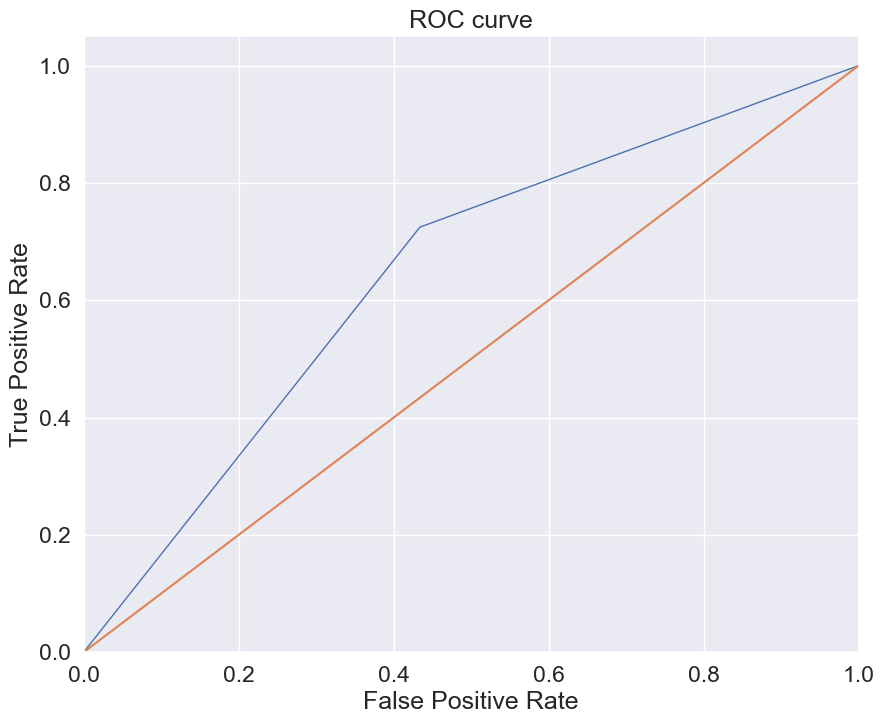

In [353]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), pos_label=1)
lw = 1
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [36]:
report_cat_team_not_balanced = classification_report((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), target_names=['0', '1'])
print(report_cat_team_not_balanced)

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       189
           1       0.68      0.72      0.70       236

    accuracy                           0.65       425
   macro avg       0.65      0.65      0.65       425
weighted avg       0.65      0.65      0.65       425



In [94]:
report_xgb_team = classification_report((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), target_names=['0', '1'])
print(report_xgb_team)

              precision    recall  f1-score   support

           0       0.51      0.54      0.53       162
           1       0.71      0.68      0.69       263

    accuracy                           0.63       425
   macro avg       0.61      0.61      0.61       425
weighted avg       0.63      0.63      0.63       425



In [78]:
report_rnd_team_not_balanced = classification_report((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), target_names=['0', '1'])
print(report_rnd_team_not_balanced)

              precision    recall  f1-score   support

           0       0.60      0.55      0.57       187
           1       0.67      0.71      0.69       238

    accuracy                           0.64       425
   macro avg       0.63      0.63      0.63       425
weighted avg       0.64      0.64      0.64       425



In [89]:
report_xgb = classification_report(y_test,best.predict(X_test), target_names=['0', '1'])
print(report_xgb)

              precision    recall  f1-score   support

           0       0.60      0.45      0.52       106
           1       0.69      0.80      0.74       162

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [417]:
report_cat_team_not_balanced_with_2_feat = classification_report((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), target_names=['0', '1'])
print(report_cat_team_not_balanced_with_2_feat)

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       191
           1       0.64      0.70      0.67       234

    accuracy                           0.62       425
   macro avg       0.62      0.61      0.61       425
weighted avg       0.62      0.62      0.62       425



In [420]:
report_cat_team_not_balanced_with_1_feat = classification_report((list(itertools.chain.from_iterable(final_label))),(list(itertools.chain.from_iterable(testers))), target_names=['0', '1'])
print(report_cat_team_not_balanced_with_1_feat)

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       182
           1       0.67      0.70      0.68       243

    accuracy                           0.63       425
   macro avg       0.62      0.62      0.62       425
weighted avg       0.63      0.63      0.63       425



In [402]:
df.team_1_won

1    590
0    303
Name: team_1_won, dtype: int64

In [429]:
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])<0),'team_1_won'].value_counts()

0    186
1    119
Name: team_1_won, dtype: int64

In [430]:
df.loc[((df['rank-points_team_1'] - df['rank-points_team_2'])>0),'team_1_won'].value_counts()

1    397
0    176
Name: team_1_won, dtype: int64

In [434]:
(397+186)/(176+397+186+119)

0.664009111617312

In [432]:
186/(186+119)

0.6098360655737705

In [49]:
def custom_loss(y_true, y_pred, odds_1, odds_2):
    
    
    # Calculate the weighted average loss
    weighted_loss = -(odds_1*y_true - 1)*np.max(0,odds_1*y_pred - 1) + (odds_2*(y_true-1) - 1)*np.max(0,odds_2*(1-y_pred) - 1)
    # Define the first derivative of the loss function
    d_weighted_loss = -(odds_1*y_true - 1)*np.where(odds_1*y_pred - 1 > 0, odds_1, 0) + (odds_2*(y_true - 1) - 1)*np.where(odds_2*(1 - y_pred) - 1 > 0, -odds_2, 0)
    
    # Define the second derivative of the loss function
    dd_weighted_loss = -(odds_1*y_true - 1)*np.where(odds_1*y_pred - 1 > 0, 0, 0) + (odds_2*(y_true - 1) - 1)*np.where(odds_2*(1 - y_pred) - 1 > 0, 0, 0)
    
    return np.mean(weighted_loss), d_weighted_loss, dd_weighted_loss
    

In [50]:
model = CatBoostClassifier(loss_function=custom_loss, iterations=1000, learning_rate=0.1,eval_metric='Logloss')

In [51]:
model.fit(X_train,y_train)

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/python-package/catboost/helpers.cpp:44: Traceback (most recent call last):
  File "_catboost.pyx", line 1410, in _catboost._ObjectiveCalcDersRange
AttributeError: 'function' object has no attribute 'calc_ders_range'


In [277]:
weightsdasd =np.array([odds_team_1.values,odds_team_2.values]).T

In [278]:
np.concatenate(weightsdasd[:,0],weightsdasd[:,1])

TypeError: only integer scalar arrays can be converted to a scalar index

In [279]:
weightsdasd

array([[0.39112271, 0.60887729],
       [0.71696377, 0.28303623],
       [0.78577121, 0.21422879],
       ...,
       [0.88533854, 0.11466146],
       [0.70955794, 0.29044206],
       [0.9480948 , 0.0519052 ]])

In [89]:
odds_team_1.values

array([0.39112271, 0.71696377, 0.78577121, 0.87070245, 0.71286354,
       0.21832069, 0.60983508, 0.53914975, 0.61936526, 0.5797842 ,
       0.49698234, 0.61365767, 0.60887729, 0.96953658, 0.17061531,
       0.45087   , 0.58565433, 0.47788467, 0.54514218, 0.78577121,
       0.61079201, 0.46585268, 0.88533854, 0.56303445, 0.62504006,
       0.65013521, 0.57389142, 0.89924245, 0.57389142, 0.34712418,
       0.69950775, 0.40364781, 0.54813361, 0.06970725, 0.53214436,
       0.61461116, 0.61936526, 0.91032344, 0.4202158 , 0.44788325,
       0.53614917, 0.51206844, 0.38348452, 0.2266725 , 0.31767375,
       0.4909479 , 0.65104986, 0.70455766, 0.55807878, 0.57782238,
       0.70706405, 0.72344987, 0.6021497 , 0.30559104, 0.61936526,
       0.47688083, 0.53214436, 0.64000228, 0.55907087, 0.53514839,
       0.5788036 , 0.17696989, 0.51005763, 0.65287582, 0.54913   ,
       0.64000228, 0.45186639, 0.35537572, 0.78441347, 0.58663037,
       0.92924181, 0.83108599, 0.4869263 , 0.52713259, 0.93865

In [314]:
def custom_loss(y_true, y_pred, odds_1, odds_2):
    # Calculate the weighted average loss
    
    weighted_loss = -(odds_1*y_true - 1)*np.maximum(0,odds_1*y_pred - 1) + (odds_2*(y_true-1) - 1)*np.maximum(0,odds_2*(1-y_pred) - 1)
    # Define the first derivative of the loss function
    d_weighted_loss = -(odds_1*y_true - 1)*np.where(odds_1*y_pred - 1 > 0, odds_1, 0) + (odds_2*(y_true - 1) - 1)*np.where(odds_2*(1 - y_pred) - 1 > 0, -odds_2, 0)
    # Define the second derivative of the loss function
    dd_weighted_loss = -(odds_1*y_true - 1)*np.where(odds_1*y_pred - 1 > 0, -odds_1**2, 0) + (odds_2*(y_true - 1) - 1)*np.where(odds_2*(1 - y_pred) - 1 > 0, -odds_2**2, 0)
    
    return np.mean(weighted_loss), d_weighted_loss, dd_weighted_loss

class CustomLossFunction(object):
    def calc_ders_range(self, approxes, targets, weights):
        y_pred = approxes[0]
        y_true = targets
        odds_1 = weights[:,0]
        odds_2 = weights[:,1]
        
        loss, grad, hess = custom_loss(y_true, y_pred, odds_1, odds_2)
        return grad, hess
    
model = CatBoostClassifier( iterations=1000, learning_rate=0.1, eval_metric='Accuracy')
model.fit(X_train, y_train,sample_weight=weights)

0:	learn: 0.6492138	total: 1.82ms	remaining: 1.82s
1:	learn: 0.6870789	total: 3.82ms	remaining: 1.91s
2:	learn: 0.6863768	total: 5.46ms	remaining: 1.81s
3:	learn: 0.6977777	total: 7.05ms	remaining: 1.75s
4:	learn: 0.7041340	total: 8.64ms	remaining: 1.72s
5:	learn: 0.7007843	total: 10.1ms	remaining: 1.68s
6:	learn: 0.6958627	total: 11.9ms	remaining: 1.69s
7:	learn: 0.7046609	total: 13.6ms	remaining: 1.68s
8:	learn: 0.7029956	total: 15.8ms	remaining: 1.74s
9:	learn: 0.7068684	total: 17.4ms	remaining: 1.73s
10:	learn: 0.7117836	total: 19ms	remaining: 1.71s
11:	learn: 0.7167707	total: 20.7ms	remaining: 1.7s
12:	learn: 0.7181101	total: 22.3ms	remaining: 1.69s
13:	learn: 0.7173480	total: 23.4ms	remaining: 1.65s
14:	learn: 0.7238008	total: 24.9ms	remaining: 1.64s
15:	learn: 0.7223863	total: 26.5ms	remaining: 1.63s
16:	learn: 0.7176216	total: 28.3ms	remaining: 1.63s
17:	learn: 0.7226968	total: 29.9ms	remaining: 1.63s
18:	learn: 0.7356694	total: 31.5ms	remaining: 1.63s
19:	learn: 0.7445469	tota

306:	learn: 0.9539988	total: 401ms	remaining: 906ms
307:	learn: 0.9539988	total: 403ms	remaining: 905ms
308:	learn: 0.9539988	total: 404ms	remaining: 904ms
309:	learn: 0.9539988	total: 405ms	remaining: 902ms
310:	learn: 0.9539988	total: 407ms	remaining: 901ms
311:	learn: 0.9539988	total: 408ms	remaining: 899ms
312:	learn: 0.9539988	total: 409ms	remaining: 898ms
313:	learn: 0.9539988	total: 410ms	remaining: 897ms
314:	learn: 0.9539988	total: 412ms	remaining: 895ms
315:	learn: 0.9539988	total: 413ms	remaining: 894ms
316:	learn: 0.9539988	total: 414ms	remaining: 893ms
317:	learn: 0.9539988	total: 416ms	remaining: 892ms
318:	learn: 0.9539988	total: 417ms	remaining: 890ms
319:	learn: 0.9539988	total: 418ms	remaining: 889ms
320:	learn: 0.9539988	total: 420ms	remaining: 888ms
321:	learn: 0.9539988	total: 421ms	remaining: 887ms
322:	learn: 0.9539988	total: 423ms	remaining: 886ms
323:	learn: 0.9539988	total: 424ms	remaining: 885ms
324:	learn: 0.9549910	total: 425ms	remaining: 883ms
325:	learn: 

468:	learn: 0.9580445	total: 597ms	remaining: 676ms
469:	learn: 0.9580445	total: 598ms	remaining: 675ms
470:	learn: 0.9580445	total: 600ms	remaining: 673ms
471:	learn: 0.9580445	total: 601ms	remaining: 672ms
472:	learn: 0.9580445	total: 602ms	remaining: 671ms
473:	learn: 0.9580445	total: 604ms	remaining: 670ms
474:	learn: 0.9580445	total: 605ms	remaining: 668ms
475:	learn: 0.9580445	total: 606ms	remaining: 667ms
476:	learn: 0.9590169	total: 607ms	remaining: 666ms
477:	learn: 0.9590169	total: 609ms	remaining: 665ms
478:	learn: 0.9590169	total: 610ms	remaining: 664ms
479:	learn: 0.9590169	total: 611ms	remaining: 662ms
480:	learn: 0.9590169	total: 613ms	remaining: 661ms
481:	learn: 0.9590169	total: 614ms	remaining: 660ms
482:	learn: 0.9590169	total: 615ms	remaining: 659ms
483:	learn: 0.9590169	total: 616ms	remaining: 657ms
484:	learn: 0.9590169	total: 618ms	remaining: 656ms
485:	learn: 0.9590169	total: 619ms	remaining: 654ms
486:	learn: 0.9590169	total: 620ms	remaining: 653ms
487:	learn: 

632:	learn: 0.9608941	total: 794ms	remaining: 460ms
633:	learn: 0.9608941	total: 795ms	remaining: 459ms
634:	learn: 0.9608941	total: 797ms	remaining: 458ms
635:	learn: 0.9608941	total: 798ms	remaining: 457ms
636:	learn: 0.9608941	total: 799ms	remaining: 455ms
637:	learn: 0.9608941	total: 800ms	remaining: 454ms
638:	learn: 0.9608941	total: 802ms	remaining: 453ms
639:	learn: 0.9608941	total: 803ms	remaining: 452ms
640:	learn: 0.9608941	total: 804ms	remaining: 451ms
641:	learn: 0.9621321	total: 806ms	remaining: 449ms
642:	learn: 0.9621321	total: 807ms	remaining: 448ms
643:	learn: 0.9621321	total: 808ms	remaining: 447ms
644:	learn: 0.9621321	total: 810ms	remaining: 446ms
645:	learn: 0.9621321	total: 811ms	remaining: 444ms
646:	learn: 0.9621321	total: 812ms	remaining: 443ms
647:	learn: 0.9621321	total: 814ms	remaining: 442ms
648:	learn: 0.9621321	total: 815ms	remaining: 441ms
649:	learn: 0.9621321	total: 816ms	remaining: 439ms
650:	learn: 0.9621321	total: 817ms	remaining: 438ms
651:	learn: 

794:	learn: 0.9657997	total: 990ms	remaining: 255ms
795:	learn: 0.9657997	total: 992ms	remaining: 254ms
796:	learn: 0.9657997	total: 993ms	remaining: 253ms
797:	learn: 0.9657997	total: 994ms	remaining: 252ms
798:	learn: 0.9657997	total: 996ms	remaining: 250ms
799:	learn: 0.9657997	total: 997ms	remaining: 249ms
800:	learn: 0.9657997	total: 998ms	remaining: 248ms
801:	learn: 0.9657997	total: 999ms	remaining: 247ms
802:	learn: 0.9657997	total: 1s	remaining: 245ms
803:	learn: 0.9657997	total: 1s	remaining: 244ms
804:	learn: 0.9657997	total: 1s	remaining: 243ms
805:	learn: 0.9657997	total: 1s	remaining: 242ms
806:	learn: 0.9657997	total: 1.01s	remaining: 241ms
807:	learn: 0.9657997	total: 1.01s	remaining: 239ms
808:	learn: 0.9657997	total: 1.01s	remaining: 238ms
809:	learn: 0.9657997	total: 1.01s	remaining: 237ms
810:	learn: 0.9657997	total: 1.01s	remaining: 236ms
811:	learn: 0.9657997	total: 1.01s	remaining: 235ms
812:	learn: 0.9657997	total: 1.01s	remaining: 234ms
813:	learn: 0.9657997	to

958:	learn: 0.9668655	total: 1.19s	remaining: 50.8ms
959:	learn: 0.9668655	total: 1.19s	remaining: 49.5ms
960:	learn: 0.9668655	total: 1.19s	remaining: 48.3ms
961:	learn: 0.9668655	total: 1.19s	remaining: 47ms
962:	learn: 0.9668655	total: 1.19s	remaining: 45.8ms
963:	learn: 0.9668655	total: 1.19s	remaining: 44.6ms
964:	learn: 0.9668655	total: 1.19s	remaining: 43.3ms
965:	learn: 0.9668655	total: 1.2s	remaining: 42.1ms
966:	learn: 0.9668655	total: 1.2s	remaining: 40.9ms
967:	learn: 0.9668655	total: 1.2s	remaining: 39.6ms
968:	learn: 0.9668655	total: 1.2s	remaining: 38.4ms
969:	learn: 0.9668655	total: 1.2s	remaining: 37.2ms
970:	learn: 0.9668655	total: 1.2s	remaining: 35.9ms
971:	learn: 0.9668655	total: 1.2s	remaining: 34.7ms
972:	learn: 0.9668655	total: 1.21s	remaining: 33.5ms
973:	learn: 0.9668655	total: 1.21s	remaining: 32.2ms
974:	learn: 0.9668655	total: 1.21s	remaining: 31ms
975:	learn: 0.9668655	total: 1.21s	remaining: 29.8ms
976:	learn: 0.9668655	total: 1.21s	remaining: 28.5ms
977:

In [241]:
custom_loss(1, 0.6,0.8707024459461868 )

0.0

In [257]:
weights[0:6]

array([[1.55674239, 0.64236704],
       [0.39477062, 2.53311658],
       [0.27263507, 3.66790669],
       [0.14849798, 6.73409835],
       [0.40279303, 2.4826646 ],
       [3.58041797, 0.279297  ]])

In [282]:
weights =np.array([prob_team_2.values/prob_team_1.values,prob_team_1.values/prob_team_2.values]).T

In [284]:
([prob_team_2.values/prob_team_1.value,prob_team_1.values/prob_team_2.values])

AttributeError: 'Series' object has no attribute 'value'

In [334]:
(prob_team_2.values/prob_team_1.values)[0:5]

array([1.55674239, 0.39477062, 0.27263507, 0.14849798, 0.40279303])

In [335]:
(prob_team_1.values/prob_team_2.values)[0:5]

array([0.64236704, 2.53311658, 3.66790669, 6.73409835, 2.4826646 ])

In [249]:
weights = []
prob_team_1 = 1 / (1 + np.power(5, (X_train['rank-points_team_2'] - X_train['rank-points_team_1']) / 400))
prob_team_2 = 1 / (1 + np.power(5, (X_train['rank-points_team_1'] - X_train['rank-points_team_2']) / 400))
weights = prob_team_2.values/prob_team_1.values

def custom_loss(y_true, y_pred, weight):
    # Separate the odds for each team
    odds_team_1 = weight
    
    
    # Calculate the weighted average loss
    weighted_loss = -(odds_team_1*y_true - 1)*np.maximum(0,odds_team_1*y_pred - 1) + ((1-odds_team_1)*(y_true-1) - 1)*np.maximum(0,(1-odds_team_1)*(1-y_pred) - 1)
    
    # Define the first derivative of the loss function
    d_weighted_loss = -(odds_team_1*y_true - 1)*np.where(odds_team_1*y_pred - 1 > 0, odds_team_1, 0) + ((1-odds_team_1)*(y_true - 1) - 1)*np.where((1-odds_team_1)*(1 - y_pred) - 1 > 0, -odds_team_1, 0)
    
    # Define the second derivative of the loss function
    dd_weighted_loss = -(odds_team_1*y_true - 1)*np.where(odds_team_1*y_pred - 1 > 0, -odds_team_1**2, 0) + ((1-odds_team_1)*(y_true - 1) - 1)*np.where((1-odds_team_1)*(1 - y_pred) - 1 > 0, -odds_team_1**2, 0)
    
    return d_weighted_loss, dd_weighted_loss
class CustomLossFunction(object):
    def calc_ders_range(self, approxes, targets, weights):
        
        result = []
        

        if weights is not None:
            der1,der2 = custom_loss(targets, approxes, weight)


            
            
        result.append((der1, der2))
        return result
        result = []
        for index in range(len(targets)):
            
            
            der1,der2 = custom_loss(targets[index], approxes[index], weight[index])
            

            
            result.append((der1, der2))
        print(approxes[0])
        return result
model = CatBoostClassifier( iterations=3000, loss_function=CustomLossFunction(),learning_rate=0.1, eval_metric='Logloss')
model.fit(X_train, y_train, sample_weight=weight)

TypeError: only size-1 arrays can be converted to Python scalars

Exception ignored in: '_catboost._ObjectiveCalcDersRange'
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py", line 1759, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
TypeError: only size-1 arrays can be converted to Python scalars


CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/algo/tensor_search_helpers.cpp:549: Too few sampling units (subsample=0.8, bootstrap_type=MVS): please increase sampling rate or disable sampling

In [110]:
some_report = classification_report(best_some.predict(X_test),y_test)
print(some_report)

              precision    recall  f1-score   support

           0       0.58      0.32      0.41       193
           1       0.19      0.41      0.26        75

    accuracy                           0.35       268
   macro avg       0.39      0.37      0.34       268
weighted avg       0.47      0.35      0.37       268



In [129]:
prob_team_1[:6]/prob_team_2[:6]

711    0.642367
52     2.533117
476    3.667907
124    6.734098
661    2.482665
378    0.279297
dtype: float64

In [94]:
prob_test_team_1 = 1 / (1 + np.power(5, (X_test['rank-points_team_2'] - X_test['rank-points_team_1']) / 400))
prob_test_team_2 = 1 / (1 + np.power(5, (X_test['rank-points_team_1'] - X_test['rank-points_team_2']) / 400))
weights_test=np.array([1/(prob_test_team_1*(1.05)),1/(prob_test_team_2*(1.05))]).T

In [69]:
estimated_gains(best.predict(X_test),y_reindexed,weights_test[:,0],weights_test[:,1])

0.0026149345400008988

In [100]:
y_reindexed = y_test.reset_index(drop=True)

In [101]:
y_reindexed

0      0
1      1
2      0
3      1
4      0
      ..
263    1
264    0
265    1
266    1
267    1
Name: team_1_won, Length: 268, dtype: int64

In [204]:
prob_test_team_2

497    0.579784
649    0.712864
278    0.047172
31     0.345303
255    0.561054
         ...   
263    0.529138
720    0.309017
716    0.315063
855    0.504024
64     0.081797
Length: 268, dtype: float64

In [207]:
prob_test_team_1

497    0.420216
649    0.287136
278    0.952828
31     0.654697
255    0.438946
         ...   
263    0.470862
720    0.690983
716    0.684937
855    0.495976
64     0.918203
Length: 268, dtype: float64

In [102]:
estimated_gains(best_some.predict(X_test),y_reindexed,weights_test[:,0],weights_test[:,1])

0.31278406828134675

In [58]:
def estimated_gains(y_pred,y_true,odds_1,odds_2):
    gains = 0
    for index in range(len(y_true)):
        if y_pred[index] == y_true[index] : 
            
            if y_pred[index] == 0 : 
                gains += odds_2[index] -1
            else:
                gains += odds_1[index] -1 
        else: 
            gains -=1
    return gains/len(y_true)

In [142]:
weights_test[0,1]

0.7247796636776954

In [15]:
def custom_eval_metric(pred_labels, true_labels, odds):
    
    
    
    # Calculate the estimated gains if you were to bet on the teams that the algorithm chose
    gains = 0
    for i in range(len(true_labels)):
        if pred_labels[i] == true_labels[i]:
            if pred_labels[i] == 0:
                gains += (odds[i,1] -1)
                
            else:
                gains += (odds[i,0] -1)
                
        else:
            gains -= 1
            
    return gains/len(true_labels) 

In [103]:
custom_eval_metric(best_some.predict(X_test),y_reindexed,weights_test)

0.31278406828134675

In [59]:
odds_team_1 = 1 / (1 + np.power(5, (X_train['rank-points_team_2'] - X_train['rank-points_team_1']) / 400))
odds_team_2 = 1 / (1 + np.power(5, (X_train['rank-points_team_1'] - X_train['rank-points_team_2']) / 400))

In [180]:
class LoglossMetric(object):
   

    def evaluate(self, approxes, target, weight):
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])

        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            e = np.exp(approx[i])
            p = e / (1 + e)
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += -w * (target[i] * np.log(p) + (1 - target[i]) * np.log(1 - p))

        return error_sum, weight_sum

In [172]:

model1 = CatBoostClassifier(iterations=10, loss_function='Logloss', eval_metric='Logloss',
                            learning_rate=0.03, bootstrap_type='Bayesian', boost_from_average=False,
                            leaf_estimation_iterations=1, leaf_estimation_method='Gradient')
model1.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.6920338	test: 0.6923715	best: 0.6923715 (0)	total: 2.5ms	remaining: 22.5ms
1:	learn: 0.6910674	test: 0.6915599	best: 0.6915599 (1)	total: 3.48ms	remaining: 13.9ms
2:	learn: 0.6900276	test: 0.6907284	best: 0.6907284 (2)	total: 4.33ms	remaining: 10.1ms
3:	learn: 0.6893391	test: 0.6899698	best: 0.6899698 (3)	total: 4.71ms	remaining: 7.07ms
4:	learn: 0.6881573	test: 0.6890984	best: 0.6890984 (4)	total: 5.5ms	remaining: 5.5ms
5:	learn: 0.6871190	test: 0.6882628	best: 0.6882628 (5)	total: 6.37ms	remaining: 4.24ms
6:	learn: 0.6861001	test: 0.6875212	best: 0.6875212 (6)	total: 7.21ms	remaining: 3.09ms
7:	learn: 0.6851275	test: 0.6868150	best: 0.6868150 (7)	total: 7.99ms	remaining: 2ms
8:	learn: 0.6840910	test: 0.6860893	best: 0.6860893 (8)	total: 8.83ms	remaining: 980us
9:	learn: 0.6831244	test: 0.6853813	best: 0.6853813 (9)	total: 9.64ms	remaining: 0us

bestTest = 0.6853813038
bestIteration = 9



In [17]:
weights

NameError: name 'weights' is not defined

In [376]:
class LoglossObjective(object):
    def calc_ders_range(self, approxes, targets, weights):
        assert len(approxes) == len(targets)
        if weights is not None:
            assert len(weights) == len(approxes)
        
        result = []
        for index in range(len(targets)):
            e = np.exp(approxes[index])
            p = e / (1 + e)
            odds_1 = weights
            odds_2 = 1/weights
            if weights is not None:
                weighted_loss = -(odds_1[index]*targets[index] - 1)*np.maximum(0,odds_1[index]*p - 1) + ((odds_2[index])*targets[index] - 1)*np.maximum(0,(odds_2[index])*(1-p) - 1)
                der1 = -odds_1[index]*targets[index]*np.maximum(0,odds_1[index]*p - 1) -odds_2[index]*targets[index]*np.maximum(0,(odds_2[index])*(1-p) - 1)
                der2 = -odds_1[index]*targets[index]*odds_1[index]*np.maximum(0,odds_1[index]*p - 1) +odds_2[index]*targets[index]*odds_2[index]*np.maximum(0,(odds_2[index])*(1-p) - 1)

            
                

            result.append((weighted_loss, der2))
        return result
model1 = CatBoostClassifier(iterations=10, loss_function=LoglossObjective(), eval_metric='Logloss',
                            learning_rate=0.03, bootstrap_type='Bayesian', boost_from_average=False,
                            leaf_estimation_iterations=1, leaf_estimation_method='Gradient')
model1.fit(X_train, y_train, eval_set=(X_test, y_test),sample_weight= weights)

0:	learn: 0.6887754	test: 0.6878556	best: 0.6878556 (0)	total: 312ms	remaining: 2.81s
1:	learn: 0.6864212	test: 0.6857214	best: 0.6857214 (1)	total: 314ms	remaining: 1.25s
2:	learn: 0.6852154	test: 0.6850300	best: 0.6850300 (2)	total: 315ms	remaining: 735ms
3:	learn: 0.6841714	test: 0.6831802	best: 0.6831802 (3)	total: 316ms	remaining: 474ms
4:	learn: 0.6828615	test: 0.6834291	best: 0.6831802 (3)	total: 318ms	remaining: 318ms
5:	learn: 0.6816039	test: 0.6831980	best: 0.6831802 (3)	total: 319ms	remaining: 213ms
6:	learn: 0.6826159	test: 0.6829457	best: 0.6829457 (6)	total: 320ms	remaining: 137ms
7:	learn: 0.6846459	test: 0.6829813	best: 0.6829457 (6)	total: 321ms	remaining: 80.3ms
8:	learn: 0.6860567	test: 0.6824294	best: 0.6824294 (8)	total: 323ms	remaining: 35.8ms
9:	learn: 0.6851574	test: 0.6835271	best: 0.6824294 (8)	total: 324ms	remaining: 0us

bestTest = 0.6824294291
bestIteration = 8

Shrink model to first 9 iterations.


In [91]:
prob_team_1 = 1 / (1 + np.power(5, (X_train['rank-points_team_2'] - X_train['rank-points_team_1']) / 400))
prob_team_2 = 1 / (1 + np.power(5, (X_train['rank-points_team_1'] - X_train['rank-points_team_2']) / 400))
weights_2_ar=np.array([prob_team_2.values/prob_team_1.values,prob_team_1.values/prob_team_2.values]).T
def focal_loss(alpha, gamma):
    def custom_loss(y_pred, y_true):
        a,g = alpha, gamma
        def fl(x,t):
            p = 1/(1+np.exp(-x))
            return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
            
        partial_fl = lambda x: fl(x, y_true)
        grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
        hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
        return grad, hess
    return custom_loss

somexgb = XGBClassifier(random_state=0,objective=focal_loss(alpha=weights_2_ar[:,0], gamma=weights_2_ar[:,1]),eval_metric = 'logloss',n_jobs=-1)

In [92]:
someclf = GridSearchCV(estimator=somexgb, 
                   param_grid=params,
                    
                   verbose=1,n_jobs=-1)
    
    
    
    
someclf.fit(X_train,y_train)
print(someclf.best_params_)
best_some = someclf.best_estimator_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}


In [18]:
weights_2_ar

array([[ 1.55674239,  0.64236704],
       [ 0.39477062,  2.53311658],
       [ 0.27263507,  3.66790669],
       ...,
       [ 0.12951143,  7.72132629],
       [ 0.40932818,  2.44302748],
       [ 0.05474685, 18.26589084]])

In [15]:
mean_absolute_error(best_some.predict(X_test),y_test)

0.6529850746268657

In [384]:
weights_2_ar[:,0]

array([1.55674239e+00, 3.94770619e-01, 2.72635071e-01, 1.48497980e-01,
       4.02793031e-01, 3.58041797e+00, 6.39787608e-01, 8.54772270e-01,
       6.14556156e-01, 7.24779664e-01, 1.01214393e+00, 6.29573042e-01,
       6.42367040e-01, 3.14206012e-02, 4.86113889e+00, 1.21793420e+00,
       7.07491863e-01, 1.09255510e+00, 8.34383821e-01, 2.72635071e-01,
       6.37218534e-01, 1.14660135e+00, 1.29511429e-01, 7.76090244e-01,
       5.99897461e-01, 5.38141579e-01, 7.42489898e-01, 1.12047145e-01,
       7.42489898e-01, 1.88081347e+00, 4.29576730e-01, 1.47740725e+00,
       8.24372697e-01, 1.33457107e+01, 8.79189312e-01, 6.27044985e-01,
       6.14556156e-01, 9.85106521e-02, 1.37972966e+00, 1.23272471e+00,
       8.65152565e-01, 9.52863957e-01, 1.60766720e+00, 3.41165124e+00,
       2.14788365e+00, 1.03687601e+00, 5.35980665e-01, 4.19330254e-01,
       7.91861721e-01, 7.30635633e-01, 4.14299036e-01, 3.82265780e-01,
       6.60716609e-01, 2.27234727e+00, 6.14556156e-01, 1.09695996e+00,
      

In [242]:
df.groupby('team1').team_1_rating.rolling(5).mean().reset_index().head(20)

team1  level_1  team_1_rating
0   00NATION       62            NaN
1   00NATION      279            NaN
2   00NATION      313            NaN
3   00NATION      372            NaN
4   00NATION      387       1.147333
5   00NATION      397       1.215333
6   00NATION      401       1.145333
7       1WIN      134            NaN
8       1WIN      420            NaN
9       1WIN      533            NaN
10      1WIN      698            NaN
11     1shot      858            NaN
12        9z       58            NaN
13        9z       69            NaN
14        9z      264            NaN
15        9z      280            NaN
16        9z      286       1.139333
17        9z      290       1.179333
18        9z      291       1.229333
19        9z      329       1.265000

In [253]:
df[df.team1.isin(orgs) | df.team2.isin(orgs)]

index  team1score  team2score  team1score_t_on_map_1  \
0        0           2           1                    6.0   
1        1           2           1                    6.0   
2        2           2           1                    7.0   
3        3           0           2                    5.0   
4        4           2           1                    6.0   
..     ...         ...         ...                    ...   
888    895           1           2                    3.0   
889    896           2           1                    7.0   
890    897           0           1                    5.0   
891    898           0           1                    8.0   
892    899           2           1                    5.0   

     team1score_ct_on_map_1  team2score_t_on_map_1  team2score_ct_on_map_1  \
0                       0.0                    7.0                     9.0   
1                      10.0                    5.0                     5.0   
2                       7.0                    8.0                     8.0   
3                       3.0                    6.0                    10.0   
4                       5.0                    7.0                     9.0   
..                      ...                    ...                     ...   
888                    13.0                    2.0                     7.0   
889                     1.0                    8.0                     8.0   
890                    10.0                    5.0                    10.0   
891                     5.0                   10.0                     6.0   
892                     6.0                    9.0                     7.0   

     team1score_t_on_map_2  team1score_ct_on_map_2  team2score_t_on_map_2  \
0                      5.0                    10.0                    5.0   
1                      6.0                     8.0                    7.0   
2                     10.0                     6.0                    5.0   
3                      9.0                     5.0                   10.0   
4                      6.0                    10.0                    5.0   
..                     ...                     ...                    ...   
888                    6.0                     9.0                    6.0   
889                    8.0                     8.0                    7.0   
890                    0.0                     0.0                    0.0   
891                    0.0                     0.0                    0.0   
892                    8.0                     8.0                    4.0   

     ...  team_rating_diff  team_1_clutches  team_clutches_diff  team_1_fb  \
0    ...          0.040000         2.000000            1.000000  14.666667   
1    ...          0.340000         2.000000            1.000000  15.666667   
2    ...          0.163333         2.000000            0.000000  13.333333   
3    ...         -0.140000         2.000000           -1.500000  13.000000   
4    ...          0.083333         1.000000            0.000000  14.000000   
..   ...               ...              ...                 ...        ...   
888  ...          0.020000         1.666667            0.333333  15.000000   
889  ...          0.070000         1.333333            0.000000  14.333333   
890  ...         -0.230000         1.000000           -1.000000  21.000000   
891  ...         -0.080000         2.000000            0.000000  12.000000   
892  ...          0.143333         1.333333            0.666667  14.666667   

     team_fb_diff        team1          team2  team_2_rating  \
0        3.000000       Heroic          FURIA       1.020000   
1        5.333333    Outsiders           MOUZ       0.850000   
2       -0.333333        FURIA  Natus Vincere       0.976667   
3       -1.000000       Spirit         Heroic       1.125000   
4        1.333333         MOUZ         Cloud9       1.003333   
..            ...          ...            ...            ...   
888      1.333333       S

In [43]:
orgs = (df.team1.value_counts()+df.team2.value_counts()).sort_values(ascending=False).head(30).reset_index()['index']

In [44]:
first = df[df.team1.isin(orgs)].groupby(df.team1)[['team_2_rating','team_1_rating']+ df.loc[:, df.columns.str.startswith('rank')].columns.tolist()].rolling(1).mean().reset_index()

In [95]:
df[df.team2.isin(orgs)].groupby([df.team2])[['team_2_rating','team_1_rating']+ df.loc[:, df.columns.str.startswith('rank')].columns.tolist()].rolling(1).mean().reset_index()

team2  level_1  team_2_rating  team_1_rating  rank_team_2  \
0       9z       39       0.955000          1.110         23.0   
1       9z       47       0.815000          1.305         23.0   
2       9z       53       1.190000          0.880         23.0   
3       9z       85       0.785000          1.315         40.0   
4       9z      274       1.215000          0.865         20.0   
..     ...      ...            ...            ...          ...   
614  forZe      858       1.265000          0.840         20.0   
615  forZe      859       1.160000          0.910         20.0   
616  forZe      875       1.063333          1.020         19.0   
617  forZe      877       1.355000          0.700         19.0   
618  forZe      884       1.235000          0.860         19.0   

     rank-points_team_2  rank_team_1  rank-points_team_1  rank_points_diff  
0                 117.0         16.0               232.0             115.0  
1                 117.0         14.0               271.0             154.0  
2                 117.0         22.0               129.0              12.0  
3                  40.0         15.0               183.0             143.0  
4                  83.0         40.0                40.0             -43.0  
..                  ...          ...                 ...               ...  
614                89.0         40.0                40.0             -49.0  
615                89.0         40.0                40.0             -49.0  
616                56.0         22.0                50.0              -6.0  
617                56.0         25.0                47.0              -9.0  
618                56.0         11.0               147.0              91.0  

[619 rows x 9 columns]

In [45]:

second = df[df.team2.isin(orgs)].groupby([df.team2])[['team_2_rating','team_1_rating']+ df.loc[:, df.columns.str.startswith('rank')].columns.tolist()].rolling(1).mean().reset_index()
second = second.rename(columns={"team2": "team1"})
second = second.rename(columns={"team_2_rating": "team_1_rating","team_1_rating":"team_2_rating","rank_team_2":"rank_team_1","rank_team_1":"rank_team_2","rank-points_team_1":"rank-points_team_2","rank-points_team_2":"rank-points_team_1"})

In [99]:
pd.concat([first,second]).sort_values('level_1')

team1  level_1  team_2_rating  team_1_rating  rank_team_2  \
356     Heroic        0       1.020000       1.060000          8.0   
195      FURIA        0       1.060000       1.020000         10.0   
599  Outsiders        1       0.850000       1.190000          7.0   
353       MOUZ        1       1.190000       0.850000          6.0   
253      FURIA        2       0.976667       1.140000          4.0   
..         ...      ...            ...            ...          ...   
451         OG      890       0.940000       1.170000         28.0   
275       HEET      891       1.000000       1.080000         12.0   
597         OG      891       1.080000       1.000000         18.0   
598         OG      892       0.976667       1.120000         40.0   
515     Spirit      892       1.120000       0.976667         12.0   

     rank-points_team_2  rank_team_1  rank-points_team_1  rank_points_diff  
356               465.0         10.0               446.0             -19.0  
195               446.0          8.0               465.0             -19.0  
599               475.0          6.0               484.0               9.0  
353               484.0          7.0               475.0               9.0  
253               653.0          8.0               465.0            -188.0  
..                  ...          ...                 ...               ...  
451                44.0         12.0               138.0             -94.0  
275               138.0         18.0                59.0              79.0  
597                59.0         12.0               138.0              79.0  
598                40.0         12.0               138.0              98.0  
515               138.0         40.0                40.0              98.0  

[1376 rows x 9 columns]

In [46]:
twiced = pd.concat([first,second]).sort_values('level_1')

In [101]:
twiced.groupby('team1')

team1  level_1  team_2_rating  team_1_rating  rank_team_2  \
356     Heroic        0       1.020000       1.060000          8.0   
195      FURIA        0       1.060000       1.020000         10.0   
599  Outsiders        1       0.850000       1.190000          7.0   
353       MOUZ        1       1.190000       0.850000          6.0   
253      FURIA        2       0.976667       1.140000          4.0   
..         ...      ...            ...            ...          ...   
451         OG      890       0.940000       1.170000         28.0   
275       HEET      891       1.000000       1.080000         12.0   
597         OG      891       1.080000       1.000000         18.0   
598         OG      892       0.976667       1.120000         40.0   
515     Spirit      892       1.120000       0.976667         12.0   

     rank-points_team_2  rank_team_1  rank-points_team_1  rank_points_diff  
356               465.0         10.0               446.0             -19.0  
195               446.0          8.0               465.0             -19.0  
599               475.0          6.0               484.0               9.0  
353               484.0          7.0               475.0               9.0  
253               653.0          8.0               465.0            -188.0  
..                  ...          ...                 ...               ...  
451                44.0         12.0               138.0             -94.0  
275               138.0         18.0                59.0              79.0  
597                59.0         12.0               138.0              79.0  
598                40.0         12.0               138.0              98.0  
515               138.0         40.0                40.0              98.0  

[1376 rows x 9 columns]

In [424]:
second = second.rename(columns={"team_2_rating": "team_1_rating","team_1_rating":"team_2_rating","rank_team_2":"rank_team_1","rank-points_team_1":"rank-points_team_2","rank-points_team_2":"rank-points_team_1"})

team1  level_1  team_2_rating  team_1_rating  rank_team_2  \
0       9z       58       1.000000       1.060000         20.0   
1       9z       69       1.220000       0.870000         40.0   
2       9z      264       1.076667       1.016667         40.0   
3       9z      280       0.655000       1.470000         40.0   
4       9z      286       0.780000       1.280000         40.0   
..     ...      ...            ...            ...          ...   
752  forZe      594       0.820000       1.330000         28.0   
753  forZe      667       1.225000       0.855000          1.0   
754  forZe      763       0.855000       1.210000         40.0   
755  forZe      862       1.096667       1.006667         23.0   
756  forZe      869       0.450000       1.630000         40.0   

     rank-points_team_2  rank_team_1  rank-points_team_1  rank_points_diff  
0                 144.0         23.0               117.0             -27.0  
1                  40.0         40.0                40.0               0.0  
2                  40.0         20.0                83.0              43.0  
3                  40.0         20.0                83.0              43.0  
4                  40.0         20.0                83.0              43.0  
..                  ...          ...                 ...               ...  
752                79.0         26.0                84.0               5.0  
753               898.0         23.0                82.0            -816.0  
754                40.0         20.0                89.0              49.0  
755                60.0         20.0                89.0              29.0  
756                40.0         20.0                89.0              49.0  

[757 rows x 9 columns]

In [434]:
second.rename(columns={'team_1_rating' : 'team_2_rating'},inplace=True)

In [161]:
twiced.sort_values(['team1','index'])['mean_3_rating'] = twiced.groupby('team1').team_1_rating.rolling(3,closed='left',min_periods=1).mean().reset_index(level=0,drop=True)

KeyError: 'index'

In [213]:
das = twiced.groupby('team1').team_1_rating.rolling(3,closed='left',min_periods=1).mean().reset_index(level=0)

In [173]:
twiced.sort_values('team1').reset_index().groupby('team1').team_1_rating.rolling(3,closed='left',min_periods=1).mean().reset_index()

team1  level_1  team_1_rating
0        9z        0            NaN
1        9z        1       0.795000
2        9z        2       1.027500
3        9z        3       0.980000
4        9z        4       1.126667
...     ...      ...            ...
1371  forZe     1371       1.084444
1372  forZe     1372       1.121111
1373  forZe     1373       1.222222
1374  forZe     1374       1.090556
1375  forZe     1375       1.041667

[1376 rows x 3 columns]

In [185]:
twiced_sort['mean_3_rating1'] =  twiced.sort_values('team1').reset_index().groupby('team1').team_1_rating.rolling(3,closed='left',min_periods=1).mean().reset_index()['team_1_rating']
twiced_sort['mean_3_rating2'] =  twiced.sort_values('team1').reset_index().groupby('team1').team_2_rating.rolling(3,closed='left',min_periods=1).mean().reset_index()['team_2_rating']

In [189]:
twiced_sort[twiced_sort['team1'] == 'Heroic'].head()

team1  level_1  team_2_rating  team_1_rating  rank_team_2  \
389  Heroic      735          0.740          1.380         40.0   
388  Heroic      733          1.290          0.795          1.0   
361  Heroic      135          0.610          1.430         40.0   
390  Heroic      737          0.815          1.245         40.0   
362  Heroic      140          1.050          0.960         12.0   

     rank-points_team_2  rank_team_1  rank-points_team_1  rank_points_diff  \
389                40.0          5.0               548.0             508.0   
388               898.0          5.0               548.0            -350.0   
361                40.0         10.0               279.0             239.0   
390                40.0          5.0               548.0             508.0   
362               244.0         10.0               279.0              35.0   

     mean_3_rating  mean_3_rating1  mean_3_rating2  
389       1.020556        1.020556        1.050556  
388       1.173889        1.173889        0.893889  
361       1.225000        1.225000        0.868333  
390       1.078889        1.078889        0.983889  
362       1.151667        1.151667        0.955000

In [201]:
twiced.sort_values('team1').reset_index().groupby('team1').team_1_rating.rolling(3,closed='left',min_periods=1).mean().reset_index()

team1  level_1  team_1_rating
0        9z        0            NaN
1        9z        1       0.795000
2        9z        2       1.027500
3        9z        3       0.980000
4        9z        4       1.126667
...     ...      ...            ...
1371  forZe     1371       1.084444
1372  forZe     1372       1.121111
1373  forZe     1373       1.222222
1374  forZe     1374       1.090556
1375  forZe     1375       1.041667

[1376 rows x 3 columns]

In [197]:
twiced_sort.sort_values(['team1','level_1']).head(20)

team1  level_1  team_2_rating  team_1_rating  rank_team_2  \
0     9z       39       1.110000       0.955000         16.0   
1     9z       47       1.305000       0.815000         14.0   
2     9z       53       0.880000       1.190000         22.0   
0     9z       58       1.000000       1.060000         20.0   
1     9z       69       1.220000       0.870000         40.0   
3     9z       85       1.315000       0.785000         15.0   
2     9z      264       1.076667       1.016667         40.0   
4     9z      274       0.865000       1.215000         40.0   
3     9z      280       0.655000       1.470000         40.0   
4     9z      286       0.780000       1.280000         40.0   
5     9z      287       0.920000       1.143333         40.0   
5     9z      290       0.780000       1.260000         40.0   
6     9z      291       1.020000       1.120000         40.0   
7     9z      329       0.885000       1.195000         40.0   
8     9z      330       0.670000       1.425000         40.0   
6     9z      331       0.920000       1.180000         40.0   
9     9z      332       0.970000       1.180000         40.0   
7     9z      412       0.946667       1.056667          4.0   
10    9z      415       0.890000       1.180000          5.0   
8     9z      430       0.900000       1.235000          5.0   

    rank-points_team_2  rank_team_1  rank-points_team_1  rank_points_diff  \
0                232.0         23.0               117.0             115.0   
1                271.0         23.0               117.0             154.0   
2                129.0         23.0               117.0              12.0   
0                144.0         23.0               117.0             -27.0   
1                 40.0         40.0                40.0               0.0   
3                183.0         40.0                40.0             143.0   
2                 40.0         20.0                83.0              43.0   
4                 40.0         20.0                83.0             -43.0   
3                 40.0         20.0                83.0              43.0   
4                 40.0         20.0                83.0              43.0   
5                 40.0         20.0                83.0             -43.0   
5                 40.0         20.0                83.0              43.0   
6                 40.0         20.0                83.0              43.0   
7                 40.0         20.0                83.0              43.0   
8                 40.0         20.0                83.0              43.0   
6                 40.0         20.0                83.0             -43.0   
9                 40.0         20.0                83.0              43.0   
7                599.0         28.0                57.0             542.0   
10               450.0         28.0                57.0            -393.0   
8                450.0         28.0                57.0             393.0   

    mean_3_rating  mean_3_rating1  mean_3_rating2  
0             NaN             NaN             NaN  
1        0.795000        0.795000        1.335000  
2        1.027500        1.027500        1.057500  
0             NaN             NaN             NaN  
1        0.795000        0.795000        1.335000  
3        0.980000        0.980000        1.100000  
2        1.027500        1.027500        1.057500  
4        1.126667        1.126667        0.955000  
3        0.980000        0.980000        1.100000  
4        1.126667        1.126667        0.955000  
5        1.020000        1.020000        1.086667  
5        1.020000        1.020000        1.086667  
6        1.215000        1.215000        0.910000  
7        1.201667        1.201667        0.905000  
8        1.285000        1.285000        0.806667  
6        1.215000        1.215000        0.910000  
9        1.176111        1.176111        0.895000  
7        1.201667        1.201667        0.905000  
10       1.096111        1.096111        0.970000  


In [129]:
merged_df = teamas['ENCE']

for team in teamas.values():
    merged_df = pd.concat([merged_df,team])

In [322]:
columns_for_pca = merged_df[['team_1_wins_in_3','team_1_wins_in_5','team_1_wins_in_10','mean_3_rating','mean_5_rating','mean_10_rating']]
pca = PCA(n_components=2)
pca.fit(columns_for_pca)
pca_data = pca.transform(columns_for_pca)

X_pca_df = pd.DataFrame(pca_data, columns=['pc1', 'pc2'])

In [323]:
merged_df[['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2']].reset_index()

index  rank_team_2  rank_team_1  rank-points_team_1  rank-points_team_2
0         8         11.0          7.0               475.0               306.0
1        11          1.0         11.0               306.0               780.0
2        20         16.0         11.0               306.0               232.0
3        25         17.0         11.0               306.0               218.0
4        31         11.0          8.0               465.0               306.0
...     ...          ...          ...                 ...                 ...
1445    822         19.0         21.0                83.0                99.0
1446    827         20.0         21.0                83.0                89.0
1447    855         21.0         22.0                79.0                83.0
1448    856         21.0         15.0               131.0                83.0
1449    891         18.0         12.0               138.0                59.0

[1450 rows x 5 columns]

In [324]:
X_pca_df = pd.concat([X_pca_df, merged_df[['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2']].reset_index(drop=True)],axis=1)

In [331]:
columns_for_pca = merged_df[['team_1_wins_in_3','team_1_wins_in_5','team_1_wins_in_10','mean_3_rating','mean_5_rating','mean_10_rating']]
pca = PCA(n_components=2)
pca.fit(columns_for_pca)
pca_data = pca.transform(columns_for_pca)

X_pca_df = pd.DataFrame(pca_data, columns=['pc1', 'pc2'])
X_pca_df = pd.concat([X_pca_df, merged_df[['rank_team_2','rank_team_1','rank-points_team_1','rank-points_team_2']].reset_index(drop=True)],axis=1)
X_merged,X_merged_test,y_merged,y_merged_test = train_test_split(X_pca_df,merged_df.team_1_won,test_size = 0.3,random_state=0)

prob_merged_1 = 1 / (1 + np.power(5, (X_merged['rank-points_team_2'] - X_merged['rank-points_team_1']) / 400))
prob_merged_2 = 1 / (1 + np.power(5, (X_merged['rank-points_team_1'] - X_merged['rank-points_team_2']) / 400))
weights_merged=np.array([prob_merged_2.values/prob_merged_1.values,prob_merged_1.values/prob_merged_2.values]).T
statsxgb = XGBClassifier(random_state=0,objective=focal_loss(alpha=weights_merged[:,0], gamma=weights_merged[:,1]),eval_metric = 'logloss',n_jobs=-1)
statsclf = GridSearchCV(estimator=statsxgb, 
                   param_grid=params,
                    
                   verbose=1,n_jobs=-1)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_merged)
X_test_scaled = ss.transform(X_merged_test)    
  


    
statsclf.fit(X_train_scaled,y_merged)
print(someclf.best_params_)
best_stats = statsclf.best_estimator_

prob_merged_test_1 = 1 / (1 + np.power(5, (X_merged_test['rank-points_team_2'] - X_merged_test['rank-points_team_1']) / 400))
prob_merged_test_2 = 1 / (1 + np.power(5, (X_merged_test['rank-points_team_1'] - X_merged_test['rank-points_team_2']) / 400))
weights_merged_test=np.array([prob_merged_test_2.values/prob_merged_test_1.values,prob_merged_test_1.values/prob_merged_test_2.values]).T

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'colsample_bytree': 0.3, 'eta': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5}


In [329]:
pcaed2_feat_not_scaled = estimated_gains(best_stats.predict(X_merged_test),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [332]:
pcaed2_feat_scaled = estimated_gains(best_stats.predict(X_test_scaled),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [333]:
pcaed2_feat_not_scaled,pcaed2_feat_scaled

(0.16419282075754454, 0.16419282075754454)

In [279]:
zero_feat_scaled_pca_4 = estimated_gains(best_stats.predict(X_test_pca),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [281]:
zero_feat_not_scaled_pca_4 = estimated_gains(best_stats.predict(X_test_pca),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [286]:
zero_feat_not_scaled = estimated_gains(best_stats.predict(X_test_scaled),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [289]:
zero_feat_scaled = estimated_gains(best_stats.predict(X_merged_test),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [290]:
zero_feat_not_scaled_pca_4,zero_feat_scaled_pca_4,zero_feat_not_scaled,zero_feat_scaled

(0.10404626222128995,
 0.1534462999636104,
 0.16407302281501207,
 -0.13545626678821082)

In [292]:
two_feat_not_scaled_pca_4 = estimated_gains(best_stats.predict(X_test_pca),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [298]:
two_feat_scaled_pca_4 = estimated_gains(best_stats.predict(X_test_pca),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [302]:
two_feat_not_scaled = estimated_gains(best_stats.predict(X_merged_test),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [304]:
two_feat_scaled=estimated_gains(best_stats.predict(X_test_scaled),y_merged_test.reset_index(drop=True),weights_merged_test[:,0],weights_merged_test[:,1])

In [305]:
two_feat_not_scaled_pca_4,two_feat_scaled_pca_4,two_feat_not_scaled,two_feat_scaled

(0.053209270215831585,
 0.11430406990894955,
 0.13630593077174968,
 -0.13545626678821082)

In [261]:
X_train_scaled[:,4:]X_test_pca

array([[-0.92706851, -0.83624361, -0.75336555, -0.92383456, -0.93254044,
        -1.08751869],
       [-0.29569157, -0.83624361,  0.10629272,  0.12359209, -0.9665335 ,
        -1.12868237],
       [-1.34320332, -1.98325343, -2.47268209, -3.01868785, -1.57500932,
        -1.86551224],
       ...,
       [ 0.09652744, -0.83624361, -1.03991831, -1.27297678,  0.13030931,
         0.19953237],
       [ 1.46451082,  1.45777603,  0.96595099,  1.17101873,  0.48836956,
        -0.16133589],
       [-2.04632764,  0.31076621,  0.10629272,  0.12359209, -1.03791894,
        -1.86345406]])

<AxesSubplot:xlabel='mean_5_rating', ylabel='team_1_wins_in_5'>

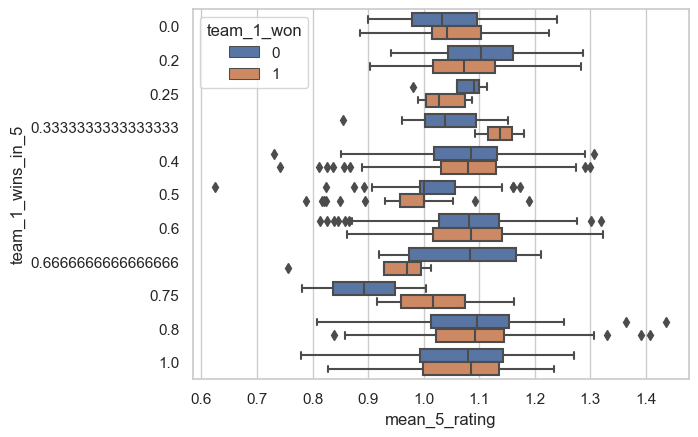

In [224]:
sns.boxplot(x=merged_df.mean_5_rating,y = merged_df.team_1_wins_in_5.astype('category'),hue=merged_df.team_1_won)

<AxesSubplot:xlabel='mean_3_rating', ylabel='mean_10_rating'>

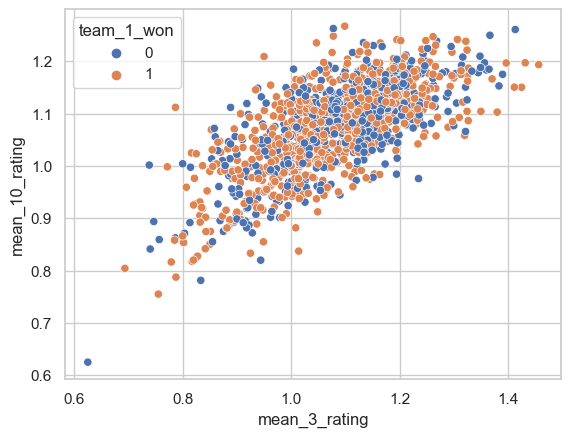

In [226]:
sns.scatterplot(x = merged_df.mean_3_rating,y=merged_df.mean_10_rating,hue=merged_df.team_1_won)

In [ ]:
PCA